# East African News Classification

## Business Understanding

### Business Overview

> The "East African News Classification" dataset presents an opportunity for news organizations in the region to automate and improve the accuracy of news categorization. Analyzing the dataset enables identification of emerging trends and provides valuable insights into East African news.


### Business Problem

* News outlets have been grappling with the time-consuming and error-prone manual process of categorizing news articles from East African nations. This inefficient approach hinders their ability to track media streams, understand cultural influences on press reporting, and provide tailored insights. 
* By implementing a machine learning text classification model, the news outlet can automate and improve the accuracy of categorization, enabling them to efficiently track information flows, identify emerging trends, and gain valuable insights into how culture shapes press reporting in the region. 
* This investment in a robust text classification model would streamline operations, ensure consistency, and enhance their reporting capabilities, ultimately allowing them to better serve their audience and remain competitive.


## Data Understanding

* For this project, we analysed an East African News Classification dataset which has 23268 rows 3 columns.
* The three columns are {text}, {label} and {category}
* We chose this Dataset because it offers critical insights into media streams across East Africa, allowing for tailored insights related to racial tensions and social shifts.




## Objectives

### General Objectives

### Specific Objectives

### Success Metrics

## Data Preparation

## Modeling

## Evaluation

## Deployment

## Importing Necessary Libraries

In [1]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
import nltk
import re

<ipython-input-1-ebe1e04e7f9e>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\githi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('data/train_v0.2.csv')
df.head()

text    label
0   Bodi ya Utalii Tanzania (TTB) imesema, itafan...   uchumi
1   PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...  kitaifa
2  Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...   uchumi
3   TIMU ya taifa ya Tanzania, Serengeti Boys jan...  michezo
4   Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...  kitaifa

In [ ]:
profile = ProfileReport(df)


In [ ]:
profile.to_widgets()

# Data Cleaning

## Missing Values

In [3]:
# Function to check for missing values
def check_missing_values(data):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Missing values found:")
        print(missing_values)
    else:
        print("No missing values found.")

# Check for
check_missing_values(df)

Missing values found:
text     1
label    0
dtype: int64


In [4]:
# Drop row with missing value
df.dropna(axis=0, inplace=True)

# Confirm missing rows dropped
check_missing_values(df)

No missing values found.


## Duplicate Values

In [5]:
# Function to check for duplicates
def check_duplicates(df):
    duplicates = df.duplicated()
    if duplicates.any():
        print("Duplicate rows found:")
        print(df[duplicates])
    else:
        print("No duplicate rows found.")

check_duplicates(df)

No duplicate rows found.


In [6]:
# Transform text to lowercase
df["text"] = df["text"].str.lower()
df.head()

text    label
0   bodi ya utalii tanzania (ttb) imesema, itafan...   uchumi
1   pendo fundisha-mbeya rais dk. john magufuri, ...  kitaifa
2  mwandishi wetu -singida benki ya nmb imetoa ms...   uchumi
3   timu ya taifa ya tanzania, serengeti boys jan...  michezo
4   na agatha charles – dar es salaam aliyekuwa k...  kitaifa

kitaifa      10155
michezo       5970
burudani      2185
kimataifa     1858
uchumi        1259
afya           779
Name: label, dtype: int64

## Tokenization

In [8]:
# Clean the text data by removing special characters, digits, and converting to lowercase
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.lower())


In [9]:
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))
df

text    label  \
0       bodi ya utalii tanzania (ttb) imesema, itafan...   uchumi   
1       pendo fundisha-mbeya rais dk. john magufuri, ...  kitaifa   
2      mwandishi wetu -singida benki ya nmb imetoa ms...   uchumi   
3       timu ya taifa ya tanzania, serengeti boys jan...  michezo   
4       na agatha charles – dar es salaam aliyekuwa k...  kitaifa   
...                                                  ...      ...   
22202   alitoa pongezi hizo alipozindua rasmi hatua y...   uchumi   
22203   na nora damian-dar es salaam  tekla (si jina ...  kitaifa   
22204   mkuu wa mkoa wa njombe, dk rehema nchimbi wak...   uchumi   
22205   mabingwa wa ligi kuu soka tanzania bara, simb...  michezo   
22206   wiki iliyopita, nilianza makala haya yanayole...  kitaifa   

                                            cleaned_text  \
0       bodi ya utalii tanzania  ttb  imesema  itafan...   
1       pendo fundisha mbeya rais dk  john magufuri  ...   
2      mwandishi wetu  singida benki ya nmb imetoa ms...   
3       timu ya taifa ya tanzania  serengeti boys jan...   
4       na agatha charles   dar es salaam aliyekuwa k...   
...                                                  ...   
22202   alitoa pongezi hizo alipozindua rasmi hatua y...   
22203   na nora damian dar es salaam  tekla  si jina ...   
22204   mkuu wa mkoa wa njombe  dk rehema nchimbi wak...   
22205   mabingwa wa ligi kuu soka tanzania bara  simb...   
22206   wiki iliyopita  nilianza makala haya yanayole...   

                                          tokenized_text  
0      [bodi, ya, utalii, tanzania, ttb, imesema, ita...  
1      [pendo, fundisha, mbeya, rais, dk, john, maguf...  
2      [mwandishi, wetu, singida, benki, ya, nmb, ime...  
3      [timu, ya, taifa, ya, tanzania, serengeti, boy...  
4      [na, agatha, charles, dar, es, salaam, aliyeku...  
...                                                  ...  
22202  [alitoa, pongezi, hizo, alipozindua, rasmi, ha...  
22203  [na, nora, damian, dar, es, salaam, tekla, si,...  
22204  [mkuu, wa, mkoa, wa, njombe, dk, rehema, nchim...  
22205  [mabingwa, wa, ligi, kuu, soka, tanzania, bara...  
22206  [wiki, iliyopita, nilianza, makala, haya, yana...  

[22206 rows x 4 columns]

## Exploratory Data Analysis: Frequency Distributions

In [10]:
from nltk.probability import FreqDist
# Calculate word frequencies
freq_dist = FreqDist(df["tokenized_text"].explode())

# Print the most common words and their frequencies
for word, frequency in freq_dist.most_common():
    print(f"{word}: {frequency}")

ya: 370009
na: 364535
wa: 277651
kwa: 166821
katika: 88770
za: 75626
ni: 73930
alisema: 73534
la: 62594
kuwa: 56398
hiyo: 52003
cha: 39292
kwenye: 31597
mwaka: 29388
huo: 27358
baada: 25438
kama: 24969
serikali: 24341
hivyo: 22386
ili: 22354
lakini: 21928
yake: 21446
hilo: 21383
wakati: 20783
wake: 20761
nchini: 20488
vya: 20472
pia: 18865
sasa: 18450
tanzania: 18195
mkuu: 17968
watu: 17357
timu: 17344
nchi: 17122
rais: 17041
kutoka: 16974
huyo: 16783
hayo: 16260
huu: 15674
kazi: 15565
zaidi: 15464
kwamba: 15392
dar: 15059
pamoja: 14794
jana: 14767
es: 14740
salaam: 14655
kutokana: 13743
ambao: 13477
kufanya: 13378
hizo: 13006
hadi: 13003
ambayo: 12657
taifa: 12420
mchezo: 12208
hao: 12150
moja: 11978
huku: 11676
fedha: 11646
sh: 11599
waziri: 11533
wananchi: 11520
amesema: 11459
mbalimbali: 11443
kila: 11373
hata: 11199
dk: 11005
nafasi: 10994
ambaye: 10792
siku: 10784
hatua: 10779
wao: 10710
mara: 10476
miaka: 10425
taarifa: 10271
kubwa: 10182
yao: 10053
hii: 9755
kati: 9720
sababu: 

vibaya: 1155
mitano: 1152
zilizopo: 1151
ndipo: 1151
ushindani: 1148
lugha: 1145
heshima: 1142
wingi: 1141
sifa: 1141
jitihada: 1135
dini: 1135
kutangaza: 1133
huenda: 1132
nzima: 1131
masoko: 1131
takribani: 1128
mauaji: 1127
majeruhi: 1126
jukumu: 1125
mikakati: 1122
joseph: 1122
korosho: 1121
ally: 1118
tuna: 1117
furaha: 1116
iringa: 1115
madarakani: 1114
kuanzisha: 1114
inaweza: 1113
madhara: 1112
baina: 1110
kukutana: 1108
sambamba: 1108
usimamizi: 1107
burundi: 1107
utamaduni: 1106
takukuru: 1105
tawala: 1104
madrid: 1102
akaunti: 1102
msaidizi: 1099
mtwara: 1096
iliyotolewa: 1092
huyu: 1089
hofu: 1087
mkakati: 1086
mzee: 1086
rasilimali: 1085
malalamiko: 1084
kuendeleza: 1084
majengo: 1083
upatikanaji: 1082
mfuko: 1081
kulingana: 1076
imesema: 1074
paul: 1074
kuzalisha: 1067
makuu: 1067
kufuata: 1060
jioni: 1059
askofu: 1056
kulinda: 1055
ufaransa: 1054
jkt: 1046
mtibwa: 1045
mbio: 1044
atakuwa: 1043
wakala: 1042
mfupi: 1040
rahisi: 1034
mbinu: 1031
vyote: 1030
ukaguzi: 1029
ki

jinai: 552
mbegu: 552
michael: 551
anatakiwa: 551
inatarajia: 550
shahidi: 548
alikiri: 547
ombi: 547
uelewa: 547
shtaka: 547
alipata: 547
union: 546
c: 546
kupigwa: 546
sina: 545
alianza: 544
tafiti: 544
mwandamizi: 543
mno: 543
kuvunja: 543
ukusanyaji: 542
kuifanya: 542
utetezi: 542
kimya: 542
kidemokrasia: 542
ununuzi: 542
majaribio: 541
mwakilishi: 541
kukagua: 541
uhamisho: 540
patrick: 540
matunda: 539
william: 539
mganga: 539
maziwa: 539
mhandisi: 539
kilomita: 538
shamba: 537
mussa: 537
ukosefu: 535
pemba: 534
bahari: 532
anadaiwa: 531
pato: 531
kusambaza: 531
mtihani: 530
mauzo: 529
sc: 529
hispania: 529
alifafanua: 528
watetezi: 528
akiwemo: 527
wanatarajia: 526
kutetea: 525
lowassa: 525
ipasavyo: 525
kujali: 524
madereva: 524
kukubali: 524
maduka: 524
miili: 523
kamili: 522
huwezi: 522
ada: 522
usafi: 522
kubaki: 522
joto: 521
unguja: 521
eac: 520
bocco: 520
ujauzito: 520
makali: 520
akiba: 519
mwananchi: 519
lango: 519
vigezo: 518
ukarabati: 518
raundi: 517
mbadala: 517
vye

kitakuwa: 286
omary: 286
olimpiki: 286
mguu: 286
africa: 286
kariakoo: 286
nasa: 286
ilipata: 286
inaelezwa: 285
wamejipanga: 285
kashfa: 285
walifanikiwa: 285
zinazotolewa: 285
chuki: 285
yalisemwa: 285
veronica: 285
wanariadha: 285
mafuriko: 285
leicester: 284
waathirika: 284
jay: 284
wazalishaji: 284
ushambuliaji: 284
manji: 284
amina: 284
imetolewa: 283
villa: 283
kuathiri: 283
kuvaa: 283
kusambaa: 283
aliendelea: 283
alikamatwa: 283
tunajua: 283
wakidai: 283
kessy: 283
zozote: 283
kona: 283
jwtz: 282
group: 282
kiislamu: 282
hasunga: 282
jiwe: 282
mlima: 282
msongamano: 281
kumfanya: 281
bendi: 281
mfungaji: 281
mshikamano: 280
kujiridhisha: 280
walezi: 280
huruma: 280
mitaji: 280
pa: 280
tutaendelea: 279
club: 279
malighafi: 279
japokuwa: 279
kilele: 279
shambulio: 279
mgambo: 279
kukataa: 279
aliweka: 279
ndalichako: 279
kuamkia: 279
kisiwa: 279
ufuatiliaji: 278
rose: 278
somalia: 278
malezi: 278
jopo: 278
itaanza: 278
tbs: 278
kifupi: 278
washirika: 277
presha: 277
wcb: 277
mad

umaskini: 192
kupigania: 192
alikutana: 192
dilunga: 192
nafaka: 192
pichani: 192
ajibu: 192
yohana: 192
makipa: 191
kuwalipa: 191
zinatakiwa: 191
nasema: 191
nemc: 191
mkemia: 191
alipotembelea: 191
vilivyo: 191
wahudumu: 191
may: 191
gati: 191
aliondoka: 190
vipande: 190
taswira: 190
mbwa: 190
kuwatoa: 190
kijazi: 190
nkasi: 190
miamba: 190
vicent: 190
hatarishi: 190
kutakatisha: 189
kuanguka: 189
kutumiwa: 189
mtakatifu: 189
mwanangu: 189
mavunde: 189
anaonekana: 189
dangote: 189
q: 189
anaeleza: 189
kumuua: 189
super: 189
fupi: 188
solskjaer: 188
bani: 188
wachanga: 188
daily: 188
mombasa: 188
wanapokuwa: 188
kigwangalla: 188
kubadilishana: 188
mtaani: 188
inayoshiriki: 188
kujikita: 187
kuifundisha: 187
mashaka: 187
huweza: 187
kiarabu: 187
kigaidi: 187
lilifungwa: 187
aliipongeza: 187
kumalizia: 187
mollel: 187
wanadai: 187
mnangagwa: 187
waliweza: 186
kimara: 186
mpwapwa: 186
kulalamika: 186
kujionea: 186
hayupo: 186
masikitiko: 186
posta: 186
amana: 186
michache: 185
kutumikia:

amefunga: 146
aliifungia: 145
kanisani: 145
ikitoa: 145
mbiu: 145
sharif: 145
haijawahi: 145
stadi: 145
niseme: 145
kiusalama: 145
mahasimu: 145
kilichokuwa: 145
swala: 145
alipofanya: 145
jnia: 145
kuiongoza: 145
kwaajili: 145
imebainika: 145
ifanye: 145
anatoa: 145
kugharamia: 145
itakayofanyika: 145
ngome: 145
aliuawa: 145
mionzi: 145
boti: 145
samwel: 144
abdi: 144
kuwaona: 144
mtoa: 144
zilitolewa: 144
isack: 144
kinachotakiwa: 144
mteule: 144
young: 144
co: 144
kusahau: 144
msukumo: 144
imeshindwa: 144
akitangaza: 144
ramani: 144
majukwaa: 144
sintofahamu: 144
utekaji: 144
mateso: 144
ukeketaji: 144
kuyafanyia: 144
matiko: 144
iliendelea: 143
hujuma: 143
kiufundi: 143
matundu: 143
ulitolewa: 143
kurusha: 143
nyamagana: 143
imetokana: 143
mhasibu: 143
kuichapa: 143
imetenga: 143
waliofika: 143
wanakuja: 143
shime: 143
kushawishi: 143
wapiganaji: 143
godwin: 143
park: 143
kusumbuliwa: 143
babati: 143
kuvunjika: 143
vumbi: 143
nakumbuka: 143
tegemeo: 143
abubakar: 143
wanaotoka: 142

biden: 119
air: 118
kukwamisha: 118
zitaendelea: 118
kuiga: 118
spurs: 118
kupokewa: 118
imewataka: 118
ilifanyika: 118
thailand: 118
linatarajiwa: 118
aliyopewa: 118
inamaanisha: 118
majiji: 118
nzito: 118
saccos: 118
sahara: 118
zambi: 118
uchezaji: 118
ilielezwa: 118
mr: 118
kuikabili: 118
verde: 118
vinaweza: 118
kitovu: 118
beach: 118
kukifanya: 118
angani: 118
kuridhia: 118
unaonyesha: 118
jong: 118
mondi: 118
aliwaeleza: 118
alfred: 118
mtoano: 118
kupigiwa: 118
kibingwa: 118
stella: 118
nitoe: 117
mwonekano: 117
kunakuwa: 117
waasisi: 117
waandamizi: 117
kumuuza: 117
watford: 117
pendekezo: 117
maswa: 117
mlimani: 117
jamani: 117
mustapha: 117
utaendelea: 117
ukerewe: 117
amepokea: 117
kingono: 117
kupachika: 117
ameteuliwa: 117
gumu: 117
lisilo: 117
shaba: 117
kuhusishwa: 117
wakitoka: 117
bombardier: 117
kongwa: 117
janabi: 117
ajax: 117
wameonekana: 117
hindi: 117
handeni: 117
f: 117
kidole: 117
tshabalala: 116
kuwaelimisha: 116
ametaka: 116
watatumia: 116
wanaomba: 116
uzio

waliotajwa: 95
kuaga: 95
wayne: 95
bridge: 95
hong: 94
madhumuni: 94
alijipatia: 94
wakitokea: 94
anatambua: 94
majitaka: 94
ura: 94
muvi: 94
kuwapiga: 94
umepungua: 94
kujikimu: 94
kuvaana: 94
free: 94
kilicho: 94
ukiacha: 94
khalifa: 94
mchumba: 94
kuwasaka: 94
derick: 94
kanali: 94
mafisadi: 94
utatuzi: 94
imefika: 94
wanajangwani: 94
kuchoka: 94
karantini: 94
seti: 94
akiamini: 94
mkasa: 94
kutumbuiza: 94
kuyafanya: 94
unaonekana: 94
kusindika: 94
bohari: 94
tunategemea: 94
lukuki: 94
uagizaji: 94
eliya: 94
litaendelea: 94
kuvunjwa: 94
alishukuru: 94
kuwavutia: 94
kuwadhibiti: 94
aliyataja: 94
kcca: 94
anya: 94
kufundishia: 94
sir: 94
unaofanyika: 94
floyd: 94
goal: 93
kuiunga: 93
wanahisa: 93
unaona: 93
hashim: 93
kwingineko: 93
alipoanza: 93
stori: 93
dharau: 93
daud: 93
elfu: 93
wanaoendelea: 93
nafahamu: 93
anakipiga: 93
nimefurahi: 93
malkia: 93
kutozwa: 93
akitoka: 93
ilitakiwa: 93
imetoka: 93
du: 93
waliofaulu: 93
kulea: 93
aziza: 93
mbonea: 93
iliyopigwa: 93
kumhoji: 93
edw

virutubisho: 74
upana: 74
show: 74
unyang: 74
itashinda: 74
wakaanza: 74
kutengua: 74
tumejiandaa: 74
kuwaingiza: 74
malaika: 74
alidaiwa: 74
kisera: 74
mia: 74
wanaangalia: 74
bobi: 74
kamishina: 74
muroto: 74
waombolezaji: 74
utahusisha: 74
maharage: 74
wameomba: 74
kushangilia: 74
wakipewa: 74
barack: 74
alirudi: 74
walieleza: 74
ajiunge: 74
aliyemaliza: 74
annan: 74
machafu: 74
waone: 74
icc: 74
mashimo: 74
taswa: 74
akiweka: 74
salehe: 74
rombo: 74
zinedine: 74
upatu: 74
monica: 74
ttb: 73
mabati: 73
alimpa: 73
inasikitisha: 73
vilivyowekwa: 73
anatafuta: 73
lamine: 73
stewart: 73
imekubali: 73
walibaini: 73
kumfukuza: 73
marejeo: 73
saikolojia: 73
utoroshaji: 73
alivyofanya: 73
kutafsiri: 73
kutambulika: 73
yanahitaji: 73
linatarajia: 73
kiangazi: 73
yussuf: 73
haitoshi: 73
ulipigwa: 73
kutengenezwa: 73
zilisema: 73
utawezesha: 73
entebbe: 73
lilifanyika: 73
tujue: 73
inakusudia: 73
limetolewa: 73
umefanya: 73
ikabidi: 73
kitwanga: 73
kupikia: 73
kutimuliwa: 73
kumuondoa: 73
kutu

hat: 63
mkenda: 63
lusinde: 63
mndeme: 63
kusomesha: 63
anayekipiga: 63
wafungaji: 63
mabovu: 63
hutokana: 63
haupo: 63
ranchi: 63
wananufaika: 63
masele: 63
mgosi: 63
musyoka: 63
top: 63
mnara: 63
amiri: 63
iraq: 63
osha: 63
kisekta: 63
vilio: 63
uwaziri: 63
wavu: 63
tib: 63
viingilio: 63
kuzitoa: 63
bosco: 63
uyui: 63
makamishna: 63
songosongo: 63
gugai: 63
alighushi: 62
mwajiriwa: 62
jack: 62
ilipewa: 62
wametangaza: 62
inatosha: 62
mutungi: 62
inayojulikana: 62
kuwazidi: 62
ifanyike: 62
kidonda: 62
miwani: 62
tuangalie: 62
imetumia: 62
kuwatetea: 62
kinachodaiwa: 62
wajiandae: 62
rodriguez: 62
gsm: 62
damas: 62
imefuzu: 62
mbabe: 62
utapata: 62
kunyimwa: 62
nafurahi: 62
inaamini: 62
vijavyo: 62
napata: 62
kujifanya: 62
kukinoa: 62
yanayohusiana: 62
kutotoa: 62
ilivyopangwa: 62
kususia: 62
hushindwa: 62
hawapendi: 62
croatia: 62
alisimama: 62
vibarua: 62
kujifungulia: 62
ngoja: 62
stamina: 62
alafu: 62
ifakara: 62
midomo: 62
aliwasihi: 62
alipohojiwa: 62
museru: 62
limetangaza: 62
m

hupatikana: 53
hapendi: 53
mchawi: 53
nawashauri: 53
iweje: 53
kumng: 53
ziwani: 53
iliyocheza: 53
bondi: 53
vinavyotakiwa: 53
makutupora: 53
stop: 53
amejipanga: 53
michakato: 53
wakifuatiwa: 53
kutikisa: 53
kaa: 53
wakija: 53
muongo: 53
anamshukuru: 53
kubaka: 53
olivier: 53
aliyeshinda: 53
dos: 53
mwanae: 53
ashindwe: 53
walizaliwa: 53
labour: 53
kikristo: 53
alishawahi: 53
inajengwa: 53
yusufu: 53
kupatwa: 53
wakihitaji: 53
kuwaongoza: 53
aliishauri: 53
water: 53
bidvest: 53
elisante: 53
wasipate: 53
maishani: 53
washirikiane: 53
chebukati: 53
rwizile: 53
mzumbe: 53
vitunguu: 53
sungura: 53
mtaala: 53
tunda: 53
jaribu: 53
amepandishwa: 53
nyaya: 53
unaotolewa: 53
inaweka: 53
benjamini: 53
fizi: 53
sanare: 53
hasimu: 53
itafanikiwa: 53
undp: 53
nimr: 53
kulizungumzia: 53
mabibo: 53
vitambaa: 53
mafia: 53
upi: 53
walijeruhiwa: 53
imewekeza: 53
mafua: 53
amon: 53
kiluvya: 53
mugisha: 53
mkwassa: 53
mnataka: 53
kiluwa: 53
magu: 53
zantel: 53
chokaa: 53
wahifadhi: 53
elia: 52
aliyeongoz

wanajenga: 44
inaitwa: 44
kumetokana: 44
yanatokea: 44
kumtangaza: 44
alifukuzwa: 44
stanley: 44
anahisi: 44
hataweza: 44
wma: 44
rutuba: 44
waliungana: 44
akawataka: 44
mzimbabwe: 44
imesisitiza: 44
kuwachagua: 44
aliyeshika: 44
adhimu: 44
linawashikilia: 44
mmojawapo: 44
amali: 44
kikabila: 44
mrundi: 44
tulionao: 44
juba: 44
wakijiandaa: 44
jumaa: 44
majumba: 44
anakosa: 44
kumchunguza: 44
itakua: 44
alipotangaza: 44
kane: 44
philippe: 44
uda: 44
halikubaliki: 44
bakhresa: 44
bethsheba: 44
kitamaduni: 44
dani: 44
doha: 44
amewasili: 44
amuzi: 44
kishwa: 44
goba: 44
kiuhalisia: 44
gidabuday: 44
mkweli: 44
wamelala: 44
iliahirishwa: 44
irak: 44
metro: 44
mwembamba: 44
alilazwa: 44
boris: 44
kimeongezeka: 44
heritier: 44
carlos: 44
watakaoshiriki: 44
anaunga: 44
mlandege: 44
kuifuta: 44
kuwafungulia: 44
mwantika: 44
swahili: 44
kiweze: 44
wakishika: 44
alioufanya: 44
itaongezeka: 44
kujichukulia: 44
italeta: 44
luizio: 44
wakielekea: 44
ringo: 44
wataondoka: 44
ililazimika: 44
kunasa: 

serge: 40
ataingia: 40
alirudishwa: 40
mizinga: 40
lille: 40
amefichua: 40
alitamani: 40
rahma: 40
adabu: 40
kujikomboa: 40
miujiza: 40
kuwafungia: 40
amewapa: 40
kelly: 40
mzalishaji: 40
unaotarajia: 40
watoke: 40
kigongo: 40
lungu: 40
wajerumani: 40
tai: 40
aya: 40
nikawaambia: 40
mafupi: 40
odunga: 40
taylor: 40
nawe: 40
kufyatua: 40
kupaka: 40
mubarak: 40
kinatakiwa: 40
fury: 40
mjerumani: 40
onda: 40
comey: 40
sbl: 40
feri: 40
iliyotengenezwa: 40
kunyonya: 40
mcgregor: 40
shadary: 40
kuzingatiwa: 39
amewatoa: 39
kumshirikisha: 39
kutopewa: 39
kinachorushwa: 39
levo: 39
mtakuwa: 39
mfupa: 39
vinapaswa: 39
kuumiza: 39
kitima: 39
shamra: 39
hulka: 39
rungu: 39
utandawazi: 39
inashinda: 39
sonso: 39
ciara: 39
mweupe: 39
ugali: 39
boksi: 39
bakita: 39
wanaosafiri: 39
amehusishwa: 39
kyaruzi: 39
lililomshinda: 39
ameishukuru: 39
tumefika: 39
bil: 39
kukaribisha: 39
msando: 39
inayotarajia: 39
wanapinga: 39
sha: 39
kinahitaji: 39
imepeleka: 39
wanazungumza: 39
ningeweza: 39
likawa: 39
ku

july: 34
shia: 34
anazo: 34
zilizotajwa: 34
unaongeza: 34
tuungane: 34
ulikuja: 34
walidhani: 34
quality: 34
kiondo: 34
clifford: 34
kutelekezwa: 34
machachari: 34
shukuru: 34
minyoo: 34
kugongwa: 34
utagundua: 34
amenukuliwa: 34
walipoanza: 34
kuwahifadhi: 34
aliyetumia: 34
maputo: 34
wakia: 34
hatufanyi: 34
inamshikilia: 34
atapambana: 34
aman: 34
anaungana: 34
alioupata: 34
fitina: 34
yaliyosababishwa: 34
ilipeleka: 34
watulie: 34
imepunguza: 34
mpenda: 34
tulipofika: 34
alipopewa: 34
akiandika: 34
unyenyekevu: 34
kugeuza: 34
mmea: 34
lilifika: 34
zitakazopatikana: 34
nitatoa: 34
wanashauriwa: 34
inayowazunguka: 34
vitega: 34
zinazomilikiwa: 34
linadaiwa: 34
gwambina: 34
yalilenga: 34
wakaona: 34
kukitumia: 34
aliwaahidi: 34
anahitajika: 34
mhanga: 34
olengurumwa: 34
kiutamaduni: 34
kuelekezwa: 34
zikionesha: 34
anapanga: 34
tulikwenda: 34
zinaingia: 34
namanyere: 34
yanatoka: 34
wakimaliza: 34
latra: 34
akikiri: 34
wanaokiuka: 34
kulegeza: 34
wamewahi: 34
iliwekwa: 34
kutambulishwa

wembley: 31
kubashiri: 31
yaliongezeka: 31
mkosoaji: 31
elibariki: 31
ametamba: 31
unagharimu: 31
walishauri: 31
tutakutana: 31
tillerson: 31
kikohozi: 31
unyonyeshaji: 31
vilainishi: 31
wajinga: 31
kutofuata: 31
kuwasababishia: 31
alifikia: 31
yalifanywa: 31
rhino: 31
vi: 31
aliyetajwa: 31
tuzungumze: 31
alihudhuria: 31
kifikra: 31
waamini: 31
magic: 31
ikisisitiza: 31
anaelewa: 31
makakala: 31
chukua: 31
kulifikisha: 31
kuifuata: 31
zilikamilika: 31
make: 31
zinazostahili: 31
elektroniki: 31
kuwaonesha: 31
kuongozea: 31
aliisawazishia: 31
makabiliano: 31
suti: 31
shabab: 31
aliisaidia: 31
tcc: 31
wakaniambia: 31
hanang: 31
machame: 31
washabiki: 31
kv: 31
ntomoka: 31
kuiachia: 31
kusuka: 31
vibao: 31
alisaidia: 31
mererani: 31
wanaeleza: 31
liliwasiliana: 31
inayochapisha: 31
kimkataba: 31
umezingatia: 31
besiktas: 31
kuuweka: 31
tumemaliza: 31
chegeni: 31
chandika: 31
richmond: 31
waliifunga: 31
bss: 31
waliachana: 31
masyenene: 31
magodoro: 31
matiang: 31
ukipata: 31
hpv: 31
rugema

fattah: 27
itachukuliwa: 27
kuadhibiwa: 27
waswahili: 27
getrude: 27
lijalo: 27
sielewi: 27
kuteketea: 27
walirudi: 27
alipoona: 27
inafanikiwa: 27
kuwaalika: 27
tag: 27
nawahakikishia: 27
mwezeshaji: 27
zimetengenezwa: 27
imejizatiti: 27
akifanyiwa: 27
ameridhia: 27
tusker: 27
naipenda: 27
aliyetokea: 27
iliyojitokeza: 27
ije: 27
wafikishwe: 27
alipoondoka: 27
mikate: 27
imelazimika: 27
watakaopata: 27
kapunga: 27
patel: 27
binda: 27
ngalema: 27
ombeni: 27
alipomaliza: 27
kikiwamo: 27
ilivyofanya: 27
masatu: 27
nilimwambia: 27
inayofikia: 27
ba: 27
oc: 27
kumechangia: 27
zinazokusanywa: 27
halmashuari: 27
modi: 27
kimeendelea: 27
wafula: 27
mie: 27
great: 27
kuwanusuru: 27
yakiongezeka: 27
kukusaidia: 27
wakisafiri: 27
chege: 27
tumefikia: 27
utasafirishwa: 27
kuliandama: 27
marseille: 27
yanatoa: 27
wanapotaka: 27
stanford: 27
february: 27
curry: 27
kumwandikia: 27
bradley: 27
matuta: 27
anaitumikia: 27
uhodari: 27
itaongozwa: 27
uokozi: 27
tukaanza: 27
kuwatenganisha: 27
missenyi: 2

waliiba: 25
kuandikishwa: 25
iliyoshinda: 25
itashirikisha: 25
serious: 25
talent: 25
jiulize: 25
hatoweza: 25
wamempongeza: 25
iliwafanya: 25
sisters: 25
inapobidi: 25
umemalizika: 25
hakusita: 25
alifungwa: 25
niondoke: 25
vinatumika: 25
kijinai: 25
inaondoa: 25
kushindikana: 25
akipelekwa: 25
watapelekwa: 25
wamewataka: 25
ita: 25
thornton: 25
umebadilika: 25
yes: 25
atakubali: 25
chipsi: 25
wanaoanza: 25
limeweka: 25
kubakiza: 25
kuwaelekeza: 25
kuufanyia: 25
ameanzisha: 25
zinazosambaa: 25
nakupongeza: 25
alikula: 25
hajulikani: 25
uliotangazwa: 25
wanashtakiwa: 25
wataangalia: 25
zimetajwa: 25
tucheze: 25
wanaopewa: 25
iliyorekodiwa: 25
uchina: 25
kitaasisi: 25
alinipigia: 25
limeweza: 25
kifaru: 25
amejifungua: 25
walisafiri: 25
vijiti: 25
amejinyonga: 25
waliyokubaliana: 25
itakayotoa: 25
wameitwa: 25
universal: 25
gloria: 25
ji: 25
aliwasisitiza: 25
ohio: 25
uoga: 25
zinazotozwa: 25
zimechangia: 25
zinatofautiana: 25
iliyobakia: 25
vimetolewa: 25
kuniamini: 25
kufurahi: 25
kup

peskov: 23
umeingia: 23
unaoendeshwa: 23
supersport: 23
walisababisha: 23
respicious: 23
ulimfanya: 23
aliuambia: 23
waliostaafu: 23
kimepungua: 23
yona: 23
wakaenda: 23
aron: 23
unaweka: 23
sadick: 23
mpwa: 23
mashauzi: 23
education: 23
arodia: 23
anahofia: 23
uliokuwapo: 23
kuganda: 23
renatha: 23
ameondolewa: 23
lingard: 23
wanakamatwa: 23
kuuziana: 23
wanalinda: 23
minerals: 23
haipati: 23
kuwashikilia: 23
alilaani: 23
kumuonesha: 23
ilikuwaje: 23
kizamani: 23
tafuta: 23
tunazungumza: 23
location: 23
kuwateka: 23
wametembelea: 23
kisena: 23
iahirishwe: 23
anahojiwa: 23
huwafanya: 23
litajwe: 23
mboni: 23
nimefarijika: 23
inarudi: 23
kuibwa: 23
wanaoingiza: 23
itatekeleza: 23
kujielekeza: 23
kinazalisha: 23
amekosea: 23
unaotumiwa: 23
unaongezeka: 23
mkoloni: 23
yalipangwa: 23
station: 23
ghadhabu: 23
akiiwakilisha: 23
waliosababisha: 23
kusogezwa: 23
omollo: 23
georgia: 23
anaruhusiwa: 23
kutorudia: 23
if: 23
inazo: 23
inakiuka: 23
hajatoa: 23
shehia: 23
kuwamaliza: 23
waliokaa: 23

miquissone: 22
kuifufua: 22
kujiongeza: 22
hatujafanya: 22
nyumbu: 22
kiduchu: 22
desabre: 22
ishinde: 22
ntalima: 22
zinaongoza: 22
zilizochapishwa: 22
kilifanya: 22
bikira: 22
yatakwenda: 22
kuaminiana: 22
itagharimu: 22
mgeta: 22
tunawataka: 22
clemence: 22
itapita: 22
asipewe: 22
fidelis: 22
kaunda: 22
madaba: 22
fanti: 22
tunawahimiza: 22
umejengwa: 22
wanatetea: 22
zinazoendana: 22
helkopta: 22
mwinjuma: 22
kifusi: 22
wanajitokeza: 22
kurejeshewa: 22
mzabuni: 22
tower: 22
mnigeria: 22
amemshirikisha: 22
kuadimika: 22
zilifungwa: 22
wanamaji: 22
zamaradi: 22
mathayo: 22
kumzungumzia: 22
muhaji: 22
wemasepetu: 22
wakaingia: 22
refa: 22
maimuna: 22
waomba: 22
yanayochangia: 22
rubella: 22
ikoje: 22
linahusu: 22
yanayowahusu: 22
kukiweka: 22
anayetoa: 22
watapita: 22
wanayoipata: 22
swedi: 22
zimesimama: 22
sharapova: 22
wanaojaribu: 22
yaliyokuwepo: 22
malema: 22
imeziba: 22
mateo: 22
mtizamo: 22
cdu: 22
wameguswa: 22
kuihujumu: 22
akiagiza: 22
anaifahamu: 22
tarangire: 22
wachumi: 

alizopewa: 20
anachofanya: 20
amenusurika: 20
atapoteza: 20
linalojulikana: 20
kutawezesha: 20
anayehitaji: 20
anajihusisha: 20
neiva: 20
walibaki: 20
luleka: 20
mwakajoka: 20
munde: 20
chagua: 20
alisababisha: 20
mponzi: 20
kweka: 20
kamusi: 20
hawazingatii: 20
paketi: 20
vimetokea: 20
aliachana: 20
inayopendekezwa: 20
chilongani: 20
alipeleka: 20
cell: 20
kangwa: 20
rwezaura: 20
stara: 20
uvujaji: 20
abdelaziz: 20
dufu: 20
wafalme: 20
haijafika: 20
council: 20
kikula: 20
ventilator: 20
atafika: 20
zitakazowasaidia: 20
niliendelea: 20
walipotoka: 20
imebarikiwa: 20
inavyoendelea: 20
kujazwa: 20
chozi: 20
linalojumuisha: 20
dripu: 20
walipanda: 20
saranga: 20
wameshatoa: 20
koti: 20
vilivyoainishwa: 20
brt: 20
graca: 20
kunapokuwa: 20
wanaishia: 20
alipochukua: 20
anayetakiwa: 20
iliyoonyesha: 20
ndondo: 20
ununuaji: 20
haziendani: 20
ilivyoainishwa: 20
ngaka: 20
billnass: 20
lianze: 20
kumuapisha: 20
anatafutwa: 20
behewa: 20
mahonda: 20
imeipa: 20
purukushani: 20
akitumikia: 20
mrufa

husna: 18
waliandaa: 18
kumhusu: 18
kuachishwa: 18
iso: 18
burhan: 18
subscription: 18
required: 18
tairone: 18
iliposhinda: 18
halikuweza: 18
walioachwa: 18
kinazidi: 18
naombeni: 18
akimshukuru: 18
tandari: 18
kilipata: 18
watakamilisha: 18
zinapewa: 18
dare: 18
waliofungwa: 18
tulitakiwa: 18
linaloongoza: 18
anti: 18
nimesikitishwa: 18
kuwakataa: 18
snoop: 18
kusheherekea: 18
side: 18
ufi: 18
uliweza: 18
tujitahidi: 18
mola: 18
nikajua: 18
kulitambua: 18
mwelekezi: 18
kuchimbwa: 18
ernesto: 18
valverde: 18
belle: 18
aachwe: 18
ilisimama: 18
yalibadilika: 18
uliifanya: 18
vinavyotokea: 18
leodegar: 18
aliyodai: 18
maveterani: 18
inawezesha: 18
myanmar: 18
unaodaiwa: 18
gaucho: 18
uzingatiaji: 18
ukishindwa: 18
yatabaki: 18
haitoi: 18
tafakari: 18
uzuiaji: 18
ulioasisiwa: 18
mwaisabula: 18
wasaliti: 18
utajadili: 18
tunamshikilia: 18
ukongwe: 18
asimilia: 18
kuliacha: 18
karaha: 18
akihofia: 18
makalio: 18
unakaribia: 18
wanaambiwa: 18
buti: 18
hague: 18
itamaliza: 18
miungu: 18
zinac

ameshafariki: 17
hamida: 17
ameapa: 17
wamemwomba: 17
itatangaza: 17
akikimbia: 17
zinatosha: 17
kuwatangaza: 17
kutembeza: 17
inapocheza: 17
vichakani: 17
haijakaa: 17
itekeleze: 17
zilizoelekezwa: 17
wawindaji: 17
akilalamikia: 17
tsc: 17
hopkins: 17
ukae: 17
wafanikiwe: 17
kiendelee: 17
suza: 17
waungane: 17
jadid: 17
kikaoni: 17
ihemi: 17
majukwaani: 17
kuiamini: 17
kinachozalishwa: 17
harmo: 17
yanatarajia: 17
frisch: 17
imejikuta: 17
alivaa: 17
yamewafanya: 17
kilichojengwa: 17
watapiga: 17
ungefanyika: 17
kumwangusha: 17
anajitahidi: 17
rice: 17
yataongeza: 17
kuagizwa: 17
alihusishwa: 17
wanaibuka: 17
halmshauri: 17
alivyoagiza: 17
walimwambia: 17
tulisema: 17
amejitolea: 17
wataleta: 17
rwegasira: 17
alijitambulisha: 17
kuliomba: 17
hajaonekana: 17
tuligundua: 17
thbub: 17
mwandambo: 17
push: 17
misenyi: 17
sipora: 17
chaurembo: 17
wameshafariki: 17
iliyoendeshwa: 17
ziyech: 17
tuwasaidie: 17
wakubaliane: 17
kuwakata: 17
kutarajiwa: 17
walitofautiana: 17
agost: 17
shishi: 17
i

linalowafanya: 16
liliuzwa: 16
mwaisela: 16
mtakumbuka: 16
inaathiri: 16
impe: 16
ntilie: 16
television: 16
tutashindwa: 16
limeelezwa: 16
ustahimilivu: 16
pope: 16
wakisaka: 16
kuutambua: 16
hoza: 16
mori: 16
leticia: 16
makani: 16
kimaslahi: 16
angelo: 16
republic: 16
kisiri: 16
aliita: 16
caribbean: 16
ipoteze: 16
unaashiria: 16
kuazimia: 16
imeporomoka: 16
alimwelezea: 16
fuso: 16
tutamkumbuka: 16
jihadi: 16
heung: 16
mkomazi: 16
kumjumuisha: 16
kukemewa: 16
watakubaliana: 16
sperius: 16
wamejaa: 16
hujawahi: 16
helen: 16
kudhuru: 16
waamue: 16
dmdp: 16
mother: 16
wanaokusudia: 16
kuliendeleza: 16
ansaf: 16
usiopingika: 16
anakunywa: 16
limewahi: 16
kutengenezewa: 16
anayopewa: 16
wanakubaliana: 16
inawaniwa: 16
ulichangia: 16
chameleone: 16
aki: 16
kikifanya: 16
vinaleta: 16
yalikuja: 16
walimchukua: 16
nimpongeze: 16
pevu: 16
magofu: 16
sungusungu: 16
kidoti: 16
wameshangazwa: 16
inapungua: 16
yatawezesha: 16
uwekwe: 16
aliyeifungia: 16
fuoni: 16
villarreal: 16
ignas: 16
mwansasu

hama: 15
ikapata: 15
iligundulika: 15
vimejengwa: 15
watakua: 15
sijaridhika: 15
aliyewasilisha: 15
majivu: 15
watafungua: 15
solutions: 15
kinachomfanya: 15
ondoka: 15
makata: 15
niliumia: 15
wanajifunza: 15
itakuwepo: 15
wanachelewa: 15
imetekelezwa: 15
kukacha: 15
kujifurahisha: 15
hushiriki: 15
borg: 15
ismailia: 15
tumempoteza: 15
president: 15
aliifanya: 15
kuiunganisha: 15
imemwachia: 15
nyari: 15
yaliyoonekana: 15
besigye: 15
alipofikishwa: 15
yaliyompa: 15
flow: 15
kushona: 15
haukuweza: 15
kutokaa: 15
ikashuka: 15
zilizotoka: 15
imethibitika: 15
haitambui: 15
alimwandikia: 15
hekalu: 15
elsewedy: 15
eastern: 15
tulifungwa: 15
inshallah: 15
bee: 15
its: 15
hawajathibitisha: 15
haipatikani: 15
mboneko: 15
kusiwepo: 15
korofi: 15
made: 15
kolimba: 15
ilisainiwa: 15
misana: 15
watakaofika: 15
hawaishi: 15
isizidi: 15
utachangia: 15
kuwakwamua: 15
ametenda: 15
ikisaka: 15
jenister: 15
jukata: 15
matoleo: 15
alipokamatwa: 15
linachangiwa: 15
zinazoletwa: 15
kuwaingizia: 15
kj: 15
w

kiwilaya: 14
wame: 14
leornad: 14
andres: 14
alizipongeza: 14
tunafanyaje: 14
itenge: 14
nilifanikiwa: 14
aeshi: 14
ikikabiliwa: 14
muunganisho: 14
wanaoshindwa: 14
zilipewa: 14
wait: 14
anazitaja: 14
iliambulia: 14
hemedi: 14
kidau: 14
hidaya: 14
kutawasaidia: 14
hairidhishi: 14
walioanzisha: 14
cyrus: 14
lililodakwa: 14
kikuyu: 14
per: 14
kujilaumu: 14
kamwele: 14
akihudumu: 14
hakuonesha: 14
vimeendelea: 14
anasikia: 14
waliuza: 14
mabwana: 14
herve: 14
anakumbukwa: 14
mehdi: 14
hadji: 14
manyanga: 14
ameshawahi: 14
imeridhika: 14
akiwakilishwa: 14
tunalihifadhi: 14
wikendi: 14
wakiwataka: 14
hatujajua: 14
vilivyothibitishwa: 14
anisaidie: 14
walimwomba: 14
nikajiuliza: 14
itamke: 14
buffon: 14
lukas: 14
upper: 14
tunavyojua: 14
kuyaaga: 14
aliyeomba: 14
ria: 14
dijitali: 14
yaliyoendelea: 14
lemar: 14
ameruhusiwa: 14
wapunguze: 14
kutoingia: 14
uchakachuaji: 14
waungwana: 14
mashule: 14
kutafanyika: 14
kijiolojia: 14
imempoteza: 14
kuenda: 14
wasafitv: 14
mademu: 14
kang: 14
alimuh

kilichoongozwa: 14
kuwavunja: 14
itokee: 14
ori: 14
nilitarajia: 14
waliokolewa: 14
uchachu: 14
yikpe: 14
pets: 14
itakapotoa: 14
kuponda: 14
kumilikishwa: 14
thabane: 14
abwao: 14
makori: 14
kurekodiwa: 14
linalotumia: 14
ulilazimika: 14
sozigwa: 14
inayoelekeza: 14
mnyepe: 14
mrashani: 14
majoho: 14
ukifuatilia: 14
kumtishia: 14
chikichi: 14
majosho: 14
mudhihir: 14
barnier: 14
ikram: 14
mafik: 14
msobe: 14
iliondoa: 13
kiomboi: 13
najib: 13
machali: 13
gogo: 13
litokee: 13
alichokitaja: 13
monreal: 13
anapigania: 13
yaliopo: 13
msiogope: 13
flames: 13
usiende: 13
kumkumbusha: 13
mlacha: 13
alijifunza: 13
wanapendekeza: 13
ondoa: 13
mnasema: 13
haiti: 13
nimeweka: 13
kilisababisha: 13
kutorudi: 13
usiseme: 13
yakizidi: 13
maimane: 13
ameibua: 13
uliowahi: 13
walisajiliwa: 13
mkeo: 13
hery: 13
kubambikiwa: 13
wanateseka: 13
tunamwomba: 13
yameibuka: 13
ulivunjika: 13
meupe: 13
humpa: 13
inayoridhisha: 13
kufungasha: 13
kinachotengeneza: 13
anayotumia: 13
yanayotumiwa: 13
analo: 13
kuu

unaokwenda: 13
mariano: 13
saddam: 13
akipitia: 13
imesambaa: 13
nabil: 13
shabiby: 13
wanatangaza: 13
akijulikana: 13
mtemelwa: 13
vimeanzishwa: 13
aliowahi: 13
malakia: 13
amekasirishwa: 13
wafikirie: 13
aapishwe: 13
kulisema: 13
akihudhuria: 13
nikitoka: 13
inawakilishwa: 13
imeanguka: 13
haziruhusu: 13
zilizotinga: 13
idarous: 13
zikionekana: 13
walimshambulia: 13
iruhusu: 13
maini: 13
kinampa: 13
zilizopitwa: 13
inajihusisha: 13
inafurahisha: 13
aurier: 13
vwawa: 13
umekusanya: 13
associates: 13
kilichozinduliwa: 13
kumuhudumia: 13
book: 13
kipalestina: 13
chaungu: 13
itaundwa: 13
kinyondo: 13
wanashangaa: 13
hood: 13
kuikimbia: 13
kumthibitisha: 13
mbongo: 13
nguka: 13
kahangwa: 13
watawasilisha: 13
chaji: 13
inaharibu: 13
douglas: 13
ukaendelea: 13
tumeunda: 13
hiddink: 13
ungando: 13
watakapoanza: 13
akaagiza: 13
akikanusha: 13
amdt: 13
itajadiliwa: 13
yaliyomfanya: 13
mchapishaji: 13
namungofc: 13
shivji: 13
isimame: 13
ikijivunia: 13
vichwani: 13
watakaopatikana: 13
qorro: 13

tamongsco: 12
fora: 12
utapokea: 12
hawajaamua: 12
estadio: 12
wamehimizwa: 12
akimnadi: 12
unaandaliwa: 12
uelimishaji: 12
buyuni: 12
itashindikana: 12
binslum: 12
th: 12
tumeshaanza: 12
gavu: 12
matern: 12
adolph: 12
uharifu: 12
gn: 12
limeona: 12
tunawaombea: 12
ulijaa: 12
natumai: 12
inayoenda: 12
alipangua: 12
lilipachikwa: 12
mchakamchaka: 12
wapange: 12
funza: 12
haijui: 12
wameagizwa: 12
hawajaenda: 12
cover: 12
yanayotekelezwa: 12
kinakuja: 12
tweve: 12
tupewe: 12
itaangalia: 12
walikimbizwa: 12
kuwadhuru: 12
utafikiri: 12
badiliko: 12
lilipaa: 12
alivuliwa: 12
panapotokea: 12
nkrumah: 12
aids: 12
mpatanishi: 12
gezaulole: 12
choroko: 12
ilizozipata: 12
zitatumiwa: 12
tulivyoona: 12
aliyependa: 12
watayafanyia: 12
kubagua: 12
aliyekutwa: 12
walituhumiwa: 12
kortini: 12
acb: 12
mtindio: 12
huenezwa: 12
utategemea: 12
motema: 12
wafukuzwe: 12
hudumu: 12
vimesema: 12
kuto: 12
ilizonazo: 12
yakijirudia: 12
ametambua: 12
colosseum: 12
kitakachocheza: 12
atajaribu: 12
kuuimarisha: 1

ulamaa: 12
gaga: 12
kiev: 12
petersburg: 12
itachuana: 12
sitini: 12
yanapata: 12
unalipa: 12
nililazimika: 12
tml: 12
vimeonesha: 12
tunawaona: 12
wataachiwa: 12
mkambarani: 12
halmashari: 12
hawawajibiki: 12
monko: 12
mkulo: 12
walimuomba: 12
waliotolewa: 12
aliingiza: 12
alawi: 12
iliyoshuka: 12
ola: 12
billion: 12
leyna: 12
tutahitaji: 12
yussuph: 12
limeibuka: 12
isiyotarajiwa: 12
itajazwa: 12
chambua: 12
utawahusu: 12
kapuulya: 12
kumwondolea: 12
ataisaidia: 12
ninawataka: 12
wanaojulikana: 12
semeni: 12
tunalaani: 12
matokea: 12
waliokua: 12
waliotekeleza: 12
jamana: 12
watazindua: 12
alirudia: 12
wakusanya: 12
itangaze: 12
magamba: 12
wamehifadhiwa: 12
duke: 12
bukaba: 12
waombe: 12
arfa: 12
unatazamiwa: 12
liliandaliwa: 12
aliyeacha: 12
states: 12
mbambali: 12
waliouonyesha: 12
auwsa: 12
zilizoathiriwa: 12
vitakavyowawezesha: 12
amewasamehe: 12
wanaoleta: 12
ajulikanaye: 12
lane: 12
nasoro: 12
silvanus: 12
watakaojihusisha: 12
akawaomba: 12
mlote: 12
zinazolalamikiwa: 12
chama

ineos: 11
nimejaribu: 11
ratcliffe: 11
anashinda: 11
gulam: 11
nicolaus: 11
salula: 11
kihesa: 11
amezoea: 11
wazungumza: 11
watamkumbuka: 11
mitizamo: 11
mkwara: 11
kimejaa: 11
atakayethubutu: 11
escape: 11
iliyowezesha: 11
utakaojitokeza: 11
haijathibitishwa: 11
zikifika: 11
zikipotea: 11
kujazia: 11
massay: 11
popo: 11
remmy: 11
iliyomo: 11
kukitokea: 11
atapelekwa: 11
iliibiwa: 11
haijapatikana: 11
wametengwa: 11
itangazwe: 11
zimebeba: 11
kutufikisha: 11
wanaowahudumia: 11
uwongo: 11
sisemi: 11
ulifanikiwa: 11
dcp: 11
waliohamishwa: 11
kuwaandama: 11
kuyasimamia: 11
watawajibika: 11
anakiamini: 11
ananufaika: 11
mshike: 11
uono: 11
imetazamwa: 11
yaliyolengwa: 11
kilimahewa: 11
awasilishe: 11
kristu: 11
kumtuma: 11
inarudisha: 11
hawajakata: 11
mikeka: 11
anawaniwa: 11
kufanyike: 11
kuzirekebisha: 11
wanaozungumza: 11
sitawaangusha: 11
zinazotegemea: 11
linawapa: 11
kuishangaza: 11
mkumbuke: 11
pasua: 11
tujiridhishe: 11
urudi: 11
zisizosajiliwa: 11
kumbana: 11
nilishuhudia: 11
wa

wama: 11
alibadilisha: 11
yanayozungumzwa: 11
im: 11
kuyasafirisha: 11
hakudumu: 11
shavu: 11
manfred: 11
karamba: 11
swagaswaga: 11
itaungana: 11
waliotuma: 11
vullu: 11
linalosimamia: 11
kuzingirwa: 11
kupambania: 11
active: 11
zinatozwa: 11
msese: 11
unapopata: 11
casemiro: 11
naiz: 11
wamefutiwa: 11
kuwaamuru: 11
hazijaanza: 11
mnasubiri: 11
zaa: 11
odegaard: 11
gnabry: 11
jazeera: 11
diamonds: 11
zimeenda: 11
inawahusu: 11
tunayoyafanya: 11
bucheyeki: 11
zilizozalishwa: 11
hass: 11
gang: 11
kistaa: 11
hawatashiriki: 11
hdif: 11
amedumu: 11
alando: 11
tuende: 11
tutamfikisha: 11
iliwataja: 11
miungano: 11
wanaopiga: 11
watakaokamatwa: 11
wildaf: 11
alioutuma: 11
zilizonufaika: 11
milinga: 11
wakazingatia: 11
zilizorekodiwa: 11
yalipoanza: 11
fasil: 11
drones: 11
iboreshe: 11
subscribe: 11
mnyukano: 11
watakaokutwa: 11
own: 11
rondo: 11
wanauziwa: 11
kuwasema: 11
mzio: 11
walitakatisha: 11
gombe: 11
walisafirishwa: 11
rabia: 11
linalofuata: 11
ismaila: 11
kujionyesha: 11
dfid: 11
vy

maofisi: 10
linalokwenda: 10
matumzi: 10
atakayeongoza: 10
obiang: 10
nguema: 10
platnamz: 10
mrama: 10
waweza: 10
kuviweka: 10
ilifahamika: 10
ameruhusu: 10
lililohudhuriwa: 10
amerithi: 10
mchongo: 10
kikaangoni: 10
kinachozidi: 10
coe: 10
atajitahidi: 10
aliwatumia: 10
flyover: 10
amemuhakikishia: 10
info: 10
tell: 10
imewakamata: 10
nikabaki: 10
nimesimama: 10
alitumwa: 10
nilipelekwa: 10
nikakuta: 10
lilizua: 10
akiifanya: 10
inasikika: 10
nikaja: 10
nimekosa: 10
anaingiza: 10
wakakubali: 10
inawezekanaje: 10
kadinali: 10
mnayoifanya: 10
zikisababisha: 10
aliibiwa: 10
alishtuka: 10
franklin: 10
nsimbe: 10
laporta: 10
ifahamu: 10
rowland: 10
kuzibadili: 10
unazungumzia: 10
kutikisika: 10
wasumbufu: 10
kombinesheni: 10
mapesa: 10
wafaulu: 10
wamefundishwa: 10
kumkomoa: 10
tzs: 10
unaothibitisha: 10
xin: 10
imesikia: 10
kilichokusanywa: 10
utusaidie: 10
kaloleni: 10
kuhamasika: 10
vitatolewa: 10
wamekosoa: 10
yamefunguliwa: 10
kuipuuza: 10
amechukizwa: 10
imekuwapo: 10
wanaiba: 10
tu

paliwalla: 10
vinaonyesha: 10
written: 10
imewafikia: 10
linafahamika: 10
imepokewa: 10
havard: 10
sweet: 10
kinategemea: 10
muitaliano: 10
hakumbuki: 10
kutupiana: 10
haijawekwa: 10
shoko: 10
projekta: 10
imeharibu: 10
kumrushia: 10
ametamka: 10
walizotoa: 10
umeibua: 10
kuwatoroka: 10
zilizotaifishwa: 10
litafanyiwa: 10
nsanzurwimo: 10
kiforodha: 10
wanaelezwa: 10
anayedai: 10
wenzio: 10
mpishi: 10
mwenyenzi: 10
wasibughudhiwe: 10
nuda: 10
blind: 10
orleans: 10
mangaka: 10
mtalaamu: 10
kashililah: 10
abassi: 10
inayoishi: 10
walipofikia: 10
website: 10
vishale: 10
upili: 10
wakiibuka: 10
abdullahi: 10
akijishughulisha: 10
yalishuhudiwa: 10
kupumulia: 10
nisaidie: 10
kumalizwa: 10
aligeuka: 10
linalohusika: 10
wanaunganisha: 10
kente: 10
undava: 10
beek: 10
sessegnon: 10
wakiaga: 10
viwavijeshi: 10
kinamilikiwa: 10
kuyasikiliza: 10
iyumbu: 10
kimejiandaa: 10
maxcom: 10
mhazini: 10
adrien: 10
rabiot: 10
qatari: 10
maryam: 10
warren: 10
lilichangia: 10
senior: 10
unaibu: 10
inafunga: 10

wakitamani: 9
wanauliza: 9
huonesha: 9
haungi: 9
owenya: 9
tutamkosa: 9
bukene: 9
eabc: 9
ndola: 9
ilistahili: 9
ilivyoagizwa: 9
inamuonesha: 9
wametamba: 9
walivuna: 9
kuagana: 9
mtaendelea: 9
kcbl: 9
itahamia: 9
apigiwe: 9
ulitawaliwa: 9
aliyepotea: 9
imepakana: 9
akasajiliwa: 9
imewasajili: 9
fdc: 9
mahimbo: 9
kutaabika: 9
tumewaona: 9
aliiona: 9
humbe: 9
ilithibitishwa: 9
walikumbwa: 9
ziliongezeka: 9
uliotarajiwa: 9
kutoeleweka: 9
kuiinua: 9
wanafuzu: 9
mwaya: 9
ukichanganya: 9
uliotiwa: 9
ataitumikia: 9
halfan: 9
iliyoleta: 9
iliyoweza: 9
wanavyopata: 9
zinapatiwa: 9
alitupa: 9
akakutana: 9
itatuwezesha: 9
zije: 9
alifuatilia: 9
mambi: 9
ulizuka: 9
gun: 9
zilizoidhinishwa: 9
aliyesimamishwa: 9
anazunguka: 9
eva: 9
tuliamini: 9
wanapoamua: 9
ngamlagosi: 9
vitumbua: 9
ilishatoa: 9
zilizosaidia: 9
linafanana: 9
kizimkazi: 9
itakayofuata: 9
buenos: 9
aires: 9
tulikosea: 9
wakijiuliza: 9
walihakikisha: 9
wakaachana: 9
hawafikirii: 9
haueleweki: 9
wakimiminika: 9
walikumbana: 9
wakiamb

sirilius: 9
tumeshafanya: 9
limedai: 9
atakayejihusisha: 9
alimwahidi: 9
ilipofanya: 9
forever: 9
kilichoitishwa: 9
nzowa: 9
waliyofunga: 9
willibrod: 9
costco: 9
upadri: 9
halifai: 9
kutoamini: 9
ndaitwah: 9
itakayoongoza: 9
msanifu: 9
kutotii: 9
ameuambia: 9
kumpiku: 9
watakapokamilisha: 9
wanaosikiliza: 9
kinyunyu: 9
vilivyofanyika: 9
unapotokea: 9
tunayofanya: 9
tukija: 9
walioolewa: 9
ameahirisha: 9
nkuhi: 9
shirazi: 9
iliitwa: 9
wakivaa: 9
viondolewe: 9
ikizidiwa: 9
winter: 9
ampigie: 9
wakimuuliza: 9
yasiyojulikana: 9
kilichozungumzwa: 9
uwasilishwaji: 9
nawajua: 9
vinatokana: 9
ikiitwa: 9
buyungu: 9
mubofu: 9
uliazimia: 9
extra: 9
waliitoa: 9
ann: 9
kumrudishia: 9
unatishia: 9
umepiga: 9
muhudumu: 9
iendeshwe: 9
umeripoti: 9
kutoenda: 9
strong: 9
iligundua: 9
aliyoanza: 9
waliingiwa: 9
wataiwakilisha: 9
aliwaongoza: 9
lokina: 9
kumlaza: 9
washikiliwe: 9
ilijiuliza: 9
maboga: 9
usitumie: 9
kalisa: 9
tumeshapokea: 9
aliunganisha: 9
anapitia: 9
pera: 9
ajizi: 9
iheshimiwe: 9
penns

lieberman: 9
mapili: 9
yatafanya: 9
kalugendo: 9
shamika: 9
atakayekuja: 9
sackur: 9
jullu: 9
utega: 9
taalib: 9
standardaero: 9
disick: 9
mkindo: 9
radhia: 9
gulio: 9
otamendi: 9
misoji: 9
mmekuja: 9
tupac: 9
waititu: 9
cobalt: 9
siuyu: 9
malunkwi: 9
unamsaidia: 9
zitaifishwe: 9
qambrani: 9
kafr: 9
nabl: 9
kadenge: 9
nyalusi: 9
mcf: 9
choupette: 9
zellah: 9
mek: 9
hindusthan: 9
raiymek: 9
kuzipunguza: 8
mwenzenu: 8
kumesababishwa: 8
msongazila: 8
kusikilizana: 8
wanazostahili: 8
ameitisha: 8
kalvin: 8
limeimarisha: 8
yamechangiwa: 8
cambridge: 8
ahudhurie: 8
inaanzisha: 8
jah: 8
shamsi: 8
utakaowafanya: 8
kuafikia: 8
unaomwezesha: 8
maunganisho: 8
tunawahitaji: 8
anavyoendelea: 8
tafu: 8
wakimuomba: 8
yamezungumzwa: 8
hawalipwi: 8
wanalifanyia: 8
safety: 8
tumeungana: 8
kilema: 8
nimechagua: 8
mtambani: 8
walipora: 8
yaliyopokelewa: 8
growth: 8
plate: 8
kuuacha: 8
itimie: 8
mulenga: 8
kukumbatiana: 8
zinahatarisha: 8
yaliyobainishwa: 8
linalotaka: 8
linalozidi: 8
lililoua: 8
ubishani:

mdodoro: 8
tunayaona: 8
iliyokaa: 8
likikabiliwa: 8
cgp: 8
machano: 8
aluminium: 8
mlundwa: 8
kaseba: 8
tunamuombea: 8
atakataa: 8
makabrasha: 8
unawezekana: 8
hupima: 8
hawatasita: 8
nitajua: 8
ameyapata: 8
waliopigania: 8
kubanguliwa: 8
papai: 8
mchicha: 8
tunakuombea: 8
hailemariam: 8
vipingamizi: 8
usafirishwaji: 8
waliambulia: 8
ukipanda: 8
kitakachotoa: 8
wakiutumia: 8
akichezesha: 8
uzingativu: 8
kudhalilika: 8
alivyotarajia: 8
anayoitumia: 8
hajaweza: 8
mungiki: 8
wanayofanyiwa: 8
marefa: 8
atuepushe: 8
sale: 8
wameishukuru: 8
udhibitisho: 8
hyera: 8
kuwalalamikia: 8
rugonzibwa: 8
tunatimiza: 8
kumlazimu: 8
kusababishiwa: 8
wanawasaidia: 8
unagundua: 8
zimezingirwa: 8
mwipopo: 8
ikihakikisha: 8
uliochezeshwa: 8
wamejiondoa: 8
tree: 8
dairies: 8
alirudisha: 8
litawezesha: 8
karedia: 8
afikirie: 8
zi: 8
utazikutanisha: 8
visivyozidi: 8
wahudumiwe: 8
kuyafuata: 8
wanaowaongoza: 8
hupaswa: 8
iliangalie: 8
alilolifunga: 8
alizochukua: 8
aunde: 8
zinazoleta: 8
ilichokiita: 8
imran: 8

kitawasaidia: 8
research: 8
soft: 8
vinaongezeka: 8
mwasa: 8
waongee: 8
wameshikilia: 8
zikipanda: 8
ukipinga: 8
katoke: 8
kiaina: 8
alilopata: 8
imewabeba: 8
ninatambua: 8
mtunga: 8
chalanga: 8
imezipata: 8
tunakubali: 8
litatumia: 8
liliwasili: 8
viganjani: 8
husafiri: 8
report: 8
zinazomtaka: 8
wanaijua: 8
tulipokutana: 8
vilivyoruhusiwa: 8
uliobakia: 8
wanaochelewesha: 8
itiryo: 8
kuwafunza: 8
mihangaiko: 8
sie: 8
touch: 8
tirdo: 8
chikoti: 8
yanakidhi: 8
natamka: 8
ziwafikie: 8
hazijafika: 8
mittal: 8
linamalizika: 8
inatimiza: 8
waking: 8
another: 8
kubanda: 8
ulitiwa: 8
unaofuatia: 8
walizuiliwa: 8
masikhara: 8
hoyce: 8
lihaya: 8
urejeshwe: 8
siriwa: 8
margareth: 8
kinabo: 8
litazinduliwa: 8
kutakuwapo: 8
vikitumika: 8
kinachokuja: 8
mstaarabu: 8
ametupa: 8
meeting: 8
material: 8
halikupatikana: 8
zilikabidhiwa: 8
twfa: 8
wameishauri: 8
kadamnasi: 8
wanalia: 8
sitoki: 8
agano: 8
alipotangazwa: 8
amesomea: 8
zutah: 8
vilivyoshiriki: 8
zitapigwa: 8
kuwachoma: 8
vilabuni: 8
kusanyi

utajikita: 8
zinjanthropus: 8
altobelli: 8
alyssa: 8
pandu: 8
izzy: 8
clair: 8
maingizo: 8
mauno: 8
linadhihirisha: 8
zppp: 8
makohozi: 8
lifunguliwe: 8
likud: 8
bundara: 8
walisherehekea: 8
mikosz: 8
kasaka: 8
mwambene: 8
murage: 8
tansort: 8
haitawavumilia: 8
language: 8
hypertension: 8
nyagah: 8
wataonyesha: 8
musuguri: 8
magiri: 8
mnacho: 8
unarudisha: 8
manumbu: 8
karimu: 8
mandelblit: 8
noelia: 8
nameless: 8
matala: 8
luhahula: 8
ovulesheni: 8
aliyetangulia: 8
lily: 8
lusahunga: 8
abiraterone: 8
kenna: 8
gachuma: 8
kilichoundwa: 8
masood: 8
limeandaa: 8
inaadhimishwa: 8
knauf: 8
itumba: 8
kalisi: 8
uroa: 8
mobisol: 8
sannda: 8
wanachokipata: 8
ebenezer: 8
evra: 8
tumukunde: 8
atlasi: 8
texpol: 8
shabu: 8
utawa: 8
akate: 8
mobutu: 8
callin: 8
nguyami: 8
perwaiz: 8
ufahulu: 8
pages: 8
lampald: 8
kangelo: 8
jumeme: 8
vishkwambi: 8
kazeri: 8
kulisikia: 7
hajahamia: 7
mavika: 7
amelitumikia: 7
yaliyozungumzwa: 7
alikozaliwa: 7
ulianzisha: 7
obote: 7
mikuki: 7
imeambia: 7
bony: 7
kuipo

kumtengeneza: 7
moment: 7
mick: 7
akiwasihi: 7
ilimsaidia: 7
tutakamilisha: 7
hayakwenda: 7
tunarejea: 7
itakapokwenda: 7
waliojumuishwa: 7
kujiaminisha: 7
atapanga: 7
atakatwa: 7
umesisitiza: 7
amemuua: 7
walimokuwa: 7
kuyawezesha: 7
hale: 7
yapite: 7
kujipigia: 7
alimfanya: 7
aking: 7
tutalipa: 7
cng: 7
taxify: 7
uchongaji: 7
android: 7
niyungeko: 7
zilikwama: 7
somanda: 7
iliibwa: 7
wakaungana: 7
malagila: 7
hakuzingatia: 7
kuporomosha: 7
zinazokuwa: 7
wataukosa: 7
shabaan: 7
godlove: 7
wanaosomea: 7
blasius: 7
kutaniana: 7
ningetamani: 7
alikosekana: 7
yaliyowapa: 7
andati: 7
kinadai: 7
mipangilio: 7
zinazowania: 7
inakuletea: 7
hamimu: 7
abdull: 7
wanaozingatia: 7
ikaongeza: 7
kuvipokea: 7
johanesburg: 7
ukimtoa: 7
kuzificha: 7
kujirekodi: 7
umekutana: 7
idete: 7
short: 7
kukihujumu: 7
ingekuwaje: 7
zinaondolewa: 7
aiandikie: 7
regional: 7
huuza: 7
kimeajiri: 7
ninachokifanya: 7
miswaki: 7
maturubai: 7
kuvichukua: 7
maandazi: 7
wajitoe: 7
gucci: 7
zikishiriki: 7
wanaovuka: 7
wajuz

ulikabidhiwa: 7
ia: 7
lilidai: 7
amebainika: 7
mturi: 7
ikisimamia: 7
wazir: 7
kuendelee: 7
kuwaiga: 7
kishetani: 7
iuzwe: 7
yaingie: 7
aliyejizolea: 7
wakimlalamikia: 7
tutawaletea: 7
kuzisafirisha: 7
christensen: 7
wanawakilisha: 7
kukuletea: 7
mtuwasa: 7
yapungue: 7
umeongoza: 7
zitatengenezwa: 7
rubada: 7
anapotokea: 7
kimazoea: 7
wanaiibia: 7
wameieleza: 7
shekh: 7
aliogopa: 7
jifunzeni: 7
nimeeleza: 7
limeacha: 7
washtakiwe: 7
tukitoa: 7
walipangiwa: 7
rami: 7
yaliyopendekezwa: 7
imeishia: 7
tatoo: 7
wanazielekeza: 7
ulioshuhudiwa: 7
itakayowapa: 7
zilitangazwa: 7
itakayomwezesha: 7
wamejishindia: 7
aliwapiga: 7
kilichokwenda: 7
usagaji: 7
utaokoa: 7
sijaja: 7
yanaeleza: 7
haijafanyika: 7
wanaolazwa: 7
associated: 7
chunguzi: 7
pawasa: 7
wladimir: 7
yaliyopimwa: 7
bunazi: 7
ilitumwa: 7
kutwaliwa: 7
anuwai: 7
unachoweza: 7
ameviambia: 7
wakijibu: 7
viera: 7
shimiwi: 7
zaka: 7
zizingatie: 7
ulta: 7
katie: 7
mabirika: 7
kupatanisha: 7
inabakia: 7
mariki: 7
haitabiriki: 7
mwashuiya: 

pereira: 7
chuku: 7
en: 7
pr: 7
hydrochloride: 7
mabrouk: 7
aurelio: 7
vinavyotambulika: 7
hawakua: 7
wareno: 7
kuiteka: 7
nikukumbushe: 7
hazijapata: 7
ikapatikana: 7
kitunguu: 7
kinguti: 7
orchestra: 7
kitime: 7
tun: 7
khanfir: 7
niiombe: 7
roja: 7
apoel: 7
akabadili: 7
imeshakamilisha: 7
uashi: 7
wamemchagua: 7
ndelwa: 7
msaka: 7
apingwe: 7
umekata: 7
hatutawaangusha: 7
daniele: 7
anateseka: 7
federica: 7
kuondokea: 7
limezungumza: 7
waliagizwa: 7
zinasemaje: 7
mzaa: 7
lililotekelezwa: 7
wanaburuza: 7
kayanga: 7
wanalaani: 7
ekolojia: 7
tawja: 7
wamedhulumiwa: 7
yowe: 7
nikafika: 7
pablo: 7
mumba: 7
inamwezesha: 7
nilichonacho: 7
ukafanye: 7
anavyotumia: 7
yalichukuliwa: 7
myovela: 7
umepigwa: 7
dodo: 7
inayosuasua: 7
yaliyobakia: 7
temboni: 7
avelina: 7
hatukutarajia: 7
zimemalizika: 7
dublin: 7
yaliyoonyesha: 7
yamenifanya: 7
sikika: 7
wadeni: 7
alisikitika: 7
kikoa: 7
linashikiliwa: 7
linasisitiza: 7
kuwarejeshea: 7
haijacheza: 7
abdiel: 7
atakayefanikisha: 7
kumnyamazisha: 7
zin

imeipatia: 6
waliwapeleka: 6
kutochangia: 6
mbulumbulu: 6
tanica: 6
wanaomtetea: 6
waliotenganishwa: 6
petronila: 6
imeshushwa: 6
haikutimia: 6
leyland: 6
ashok: 6
lililogongana: 6
atawahi: 6
yanayochochea: 6
mbashara: 6
kubonyeza: 6
ukipungua: 6
kuipakia: 6
imelala: 6
aliyesafiri: 6
kinachoundwa: 6
hawajaonekana: 6
kinawilo: 6
yanahusishwa: 6
amechinjwa: 6
haa: 6
wanaotelekeza: 6
itumbi: 6
msalie: 6
inatafakari: 6
kutengemaa: 6
wanachokisema: 6
student: 6
kutofuatwa: 6
wakihakikisha: 6
onen: 6
haijatangaza: 6
aliyethibitisha: 6
remy: 6
kuchorwa: 6
walifuta: 6
zinazomiliki: 6
ameihakikishia: 6
guarantee: 6
haikuwekwa: 6
naruhito: 6
hupiga: 6
wamelipokea: 6
hazijatoka: 6
aliipokea: 6
aomba: 6
linashirikiana: 6
mangariba: 6
atalipia: 6
wazimu: 6
ameongezwa: 6
mjuavyo: 6
anaoutoa: 6
tunamkaribisha: 6
cyber: 6
crime: 6
redondo: 6
happines: 6
alichokiona: 6
atamfanyia: 6
utalala: 6
aliyempeleka: 6
nisaidiwe: 6
alipoitwa: 6
anaofanyiwa: 6
mkandala: 6
iwekewe: 6
mberesero: 6
stephens: 6
unahe

aliyonunua: 6
arufani: 6
iliyoambatanishwa: 6
su: 6
vilishindwa: 6
theonest: 6
mwenziwe: 6
zimeanzishwa: 6
kimefika: 6
kaleman: 6
baduel: 6
ilitekelezwa: 6
akiungwa: 6
umekwishaanza: 6
olaniyan: 6
amoo: 6
kupotoshwa: 6
kilipofika: 6
zilizoelezwa: 6
utakapoisha: 6
atashtakiwa: 6
mwamnyeto: 6
watafutiwe: 6
likikumbwa: 6
kiza: 6
iliagwa: 6
wanawasimamia: 6
kiharamu: 6
uidhinishaji: 6
irekebishwe: 6
kukopi: 6
afueni: 6
imejaliwa: 6
wapunguziwe: 6
kumtapeli: 6
lililotinga: 6
akiwaasa: 6
ulipanda: 6
aca: 6
uchangishaji: 6
iligeuka: 6
iarc: 6
vinasababishwa: 6
cyclotron: 6
kumtoka: 6
aliwaamuru: 6
kibailojia: 6
tutaanzisha: 6
tulivyonavyo: 6
wakorea: 6
kutumiana: 6
kuondolea: 6
miraba: 6
kendrick: 6
sako: 6
mwanahiba: 6
lilikubaliwa: 6
rodney: 6
aliyemtaka: 6
amigo: 6
ulimaji: 6
walisimamia: 6
butterfly: 6
zinazoukabili: 6
wanaoteuliwa: 6
akifuata: 6
ukome: 6
waliokamata: 6
imeongozwa: 6
mwilapwa: 6
kuwatuma: 6
dhabiti: 6
kwengineko: 6
ulioletwa: 6
alilalama: 6
imempatia: 6
shepolopolo: 6
don

ajitafakari: 6
itaruhusiwa: 6
kujitapa: 6
ostazi: 6
wanafanana: 6
kishamba: 6
mtingwa: 6
ihunyo: 6
aliambatanisha: 6
kumsaliti: 6
mianzini: 6
wanavyoishi: 6
kutachangia: 6
vilivyoboreshwa: 6
kitahudumia: 6
amekimbizwa: 6
nibadilishe: 6
tunalima: 6
niishi: 6
kwangwaru: 6
natron: 6
uttar: 6
inahofiwa: 6
walioambatana: 6
waliwatisha: 6
walioahidi: 6
kufananisha: 6
alisemaalisema: 6
ziliondolewa: 6
kuidhinishiwa: 6
itawasiliana: 6
vinavyopaswa: 6
yanachangiwa: 6
chechefu: 6
kujiheshimu: 6
ht: 6
simbanamungo: 6
vilivyowasilishwa: 6
kilifika: 6
kimebeba: 6
bett: 6
umezidisha: 6
haziingii: 6
akizingumza: 6
linalolenga: 6
oyemba: 6
taaifa: 6
linapitisha: 6
itawaongezea: 6
hawamiliki: 6
kuzikamilisha: 6
akapaisha: 6
wanajagwani: 6
asipokuwepo: 6
nimehamia: 6
linaniumiza: 6
kuwarekebisha: 6
combination: 6
isitoe: 6
mbadilike: 6
unaotawala: 6
wanavutana: 6
zibaki: 6
kiushuru: 6
vimeathiri: 6
imezuka: 6
lobulu: 6
nawatoa: 6
fluminense: 6
anayowapa: 6
walipania: 6
atawatumia: 6
zimeongezwa: 6
jangi

limesombwa: 6
ilipangiwa: 6
zitatakiwa: 6
tutawaondoa: 6
machanga: 6
sheet: 6
vinavyokwenda: 6
waibuke: 6
kinawanyima: 6
kujipanua: 6
gbt: 6
khumalo: 6
zinampa: 6
imeletwa: 6
waste: 6
jordi: 6
bertrand: 6
kulikomboa: 6
mlionao: 6
maramoja: 6
aliwika: 6
linaanzia: 6
kilicholenga: 6
any: 6
svr: 6
usahihishaji: 6
tunaowahudumia: 6
oxide: 6
kingwangalla: 6
bioanuai: 6
wasilipe: 6
kuwakwepa: 6
ulifutwa: 6
umezusha: 6
lipitishe: 6
wameikimbia: 6
husafirisha: 6
vimekithiri: 6
seattle: 6
ninakuomba: 6
wanaothamini: 6
tulivyokubaliana: 6
zitakapopatikana: 6
mtongani: 6
wanaojidunga: 6
ritchie: 6
mapajani: 6
asiseme: 6
assa: 6
tunachangia: 6
wanayoitaka: 6
anamuombea: 6
umezaa: 6
twalad: 6
uchepushaji: 6
kunengua: 6
inashindikana: 6
wanandugu: 6
kuitenga: 6
akiangukia: 6
stiglers: 6
iliyorejea: 6
msellem: 6
amechimba: 6
murangi: 6
makalvati: 6
ipole: 6
magaoni: 6
dindila: 6
kwashemshi: 6
alisombwa: 6
mfuto: 6
hamed: 6
hawajaajiriwa: 6
itatozwa: 6
ataelekezwa: 6
tupeni: 6
lna: 6
turbo: 6
nishindw

mamisi: 6
watainiwa: 6
nagulo: 6
luhengo: 6
mfumukeko: 6
gregorio: 6
kavaa: 6
hawafurahishwi: 6
kuwagundua: 6
vikawa: 6
wanahujumu: 6
linapatiwa: 6
ntakamulenga: 6
sutthi: 6
isifungwe: 6
nipigie: 6
mselia: 6
nyamghokya: 6
yametengenezwa: 6
vitanufaika: 6
ndadaye: 6
osiah: 6
mwasota: 6
zayn: 6
namahema: 6
imamoglu: 6
tanzeela: 6
sindh: 6
gitega: 6
drum: 6
jhumun: 6
ipuli: 6
choka: 6
wanavyodhaniwa: 6
kitaketi: 6
vanny: 6
ninayoiona: 6
akijifungua: 6
yongo: 6
linamgusa: 6
malula: 6
westgate: 6
nadler: 6
thakur: 6
wanaomfahamu: 6
casto: 6
pambalu: 6
cookwithwema: 6
kimji: 6
mclaren: 6
itawalipa: 6
msenyele: 6
kujiunganishia: 6
ayoro: 6
kufusha: 6
ilipoanzisha: 6
mkwanjika: 6
mafikiri: 6
kaupunda: 6
wani: 6
expedia: 6
njenga: 6
kabando: 6
mkumbi: 6
cheptoo: 6
agoa: 6
moruwasa: 6
bgml: 6
mgata: 6
milvik: 6
lloris: 6
vajiralongkorn: 6
matare: 6
nandembo: 6
zisizolipiwa: 6
rieti: 6
fact: 6
mawona: 6
chokoleti: 6
mhapuly: 6
tafsida: 6
njoolay: 6
datavision: 6
raqqa: 6
shanta: 6
mibuni: 6
coict

kaika: 5
vickery: 5
nikizungumza: 5
wamempata: 5
kilichotengwa: 5
alizifanya: 5
inamfikia: 5
kumuambia: 5
tutaongea: 5
kipili: 5
kilichoamuliwa: 5
gadner: 5
vibes: 5
nys: 5
niliyoyafanya: 5
kuikwamua: 5
yanayosambazwa: 5
utafute: 5
mwahako: 5
akimpigia: 5
tahariri: 5
unayofanya: 5
zitafikia: 5
vitegauchumi: 5
watakula: 5
zimechangwa: 5
nayasema: 5
kinafundisha: 5
nimempongeza: 5
maryprisca: 5
mstakabali: 5
mbindi: 5
akiutaka: 5
ataachana: 5
unapozungumza: 5
akatakiwa: 5
usijali: 5
hupendi: 5
kumwelewesha: 5
tuliyocheza: 5
hawatokuwa: 5
kuchakachua: 5
halitavumiliwa: 5
walikidhi: 5
twiter: 5
atakayopata: 5
likidai: 5
lilisisitiza: 5
waliokubali: 5
kutojishughulisha: 5
sylivia: 5
inayothibitisha: 5
watakapoamua: 5
iliyogunduliwa: 5
haijatangazwa: 5
ameanika: 5
unawakutanisha: 5
zinatimiza: 5
alisisistiza: 5
gadi: 5
mche: 5
aliyeambukizwa: 5
vinavyosambaa: 5
maelefu: 5
yope: 5
walishtushwa: 5
nilipatwa: 5
jermain: 5
ninashindwa: 5
kumfikiria: 5
yameibua: 5
kumb: 5
pwc: 5
zimeenea: 5
tukia

nikaacha: 5
brighter: 5
sm: 5
itabakia: 5
ingetosha: 5
integrated: 5
rupia: 5
ikalazimika: 5
zilizovunwa: 5
unakamilisha: 5
designer: 5
uliosomwa: 5
limetusikitisha: 5
kassiano: 5
olatomi: 5
liliiongezea: 5
agiri: 5
alizoziita: 5
kukujulisha: 5
zinazopangwa: 5
wakishangazwa: 5
kumwagika: 5
uibuaji: 5
kits: 5
wanaozidi: 5
haijathibitisha: 5
ameshangaza: 5
zinazowasaidia: 5
yanayoifanya: 5
kilipungua: 5
tunahitajika: 5
ukapoteza: 5
kulemewa: 5
wanahamasishwa: 5
walizifunga: 5
inayowaathiri: 5
vinavyoenda: 5
unavyosaidia: 5
unaolingana: 5
hazi: 5
estrogen: 5
bombay: 5
yalimpa: 5
febuari: 5
yamekarabatiwa: 5
alinyimwa: 5
lilisaidia: 5
akilengwa: 5
zimerudishwa: 5
punjab: 5
akikatiza: 5
anaongozana: 5
mirundi: 5
kindoa: 5
kafuru: 5
wakashirikiana: 5
zipa: 5
waliitumia: 5
atatamani: 5
wanajitolea: 5
sung: 5
tcd: 5
runway: 5
ilazo: 5
akimtolea: 5
kinaongeza: 5
ukipoteza: 5
kagimbo: 5
tenera: 5
anaotarajia: 5
wakiupata: 5
fina: 5
towo: 5
mpuguso: 5
kutoingiza: 5
kuniteua: 5
chiligati: 5
wanaah

malls: 5
vilivyopangwa: 5
anayovaa: 5
lubega: 5
asigombee: 5
alizodai: 5
ikiwapatia: 5
kitaweka: 5
unapojengwa: 5
amedanganya: 5
waliyopangiwa: 5
yanakusudia: 5
lumala: 5
aolewe: 5
naisinyai: 5
yaliyompata: 5
kuzozana: 5
wakiitwa: 5
isiyoeleweka: 5
itolewayo: 5
atakayeshiriki: 5
luciana: 5
ilula: 5
iliyofadhiliwa: 5
kumsababisha: 5
iliwapeleka: 5
tukigundua: 5
pamui: 5
kwaza: 5
kimefanywa: 5
huyatumia: 5
cesc: 5
vilitangaza: 5
utaambatana: 5
wacuba: 5
zitapepea: 5
zikitarajia: 5
permit: 5
border: 5
punch: 5
malaya: 5
utamsikia: 5
anayekupenda: 5
wanajidanganya: 5
akiripotiwa: 5
itafaa: 5
kulihusisha: 5
malekana: 5
mbaruk: 5
tupeane: 5
amehudhuria: 5
mifungo: 5
mnategemea: 5
spider: 5
wamewapatia: 5
naifundisha: 5
neti: 5
wakawahi: 5
wau: 5
ulongoni: 5
ikiombea: 5
camillius: 5
ufurahie: 5
sinkala: 5
inayomwezesha: 5
akitambua: 5
uzidi: 5
halid: 5
zikidaiwa: 5
akipaisha: 5
uliochongwa: 5
wanavutia: 5
rulz: 5
vidume: 5
kuhesabika: 5
vinavyolalamikiwa: 5
utawakutanisha: 5
atatafuta: 5
conr

download: 5
wameugua: 5
amuoe: 5
tanashadona: 5
wayafanyie: 5
zitataifishwa: 5
xenophobia: 5
uchuuzi: 5
intelligence: 5
mafahali: 5
zikizalishwa: 5
cardiograph: 5
kitakua: 5
kilitua: 5
wakaguliwe: 5
stories: 5
schools: 5
romney: 5
ongara: 5
vimezalisha: 5
yamekuwepo: 5
gogopoa: 5
ataangaliwa: 5
tukiomba: 5
tumeiona: 5
nurdini: 5
kilichokuwapo: 5
kilimarondo: 5
inaendelezwa: 5
ilikoanzia: 5
tadhari: 5
atajiweka: 5
ilenge: 5
aliyezidi: 5
dae: 5
arifal: 5
kununu: 5
walijifungua: 5
creek: 5
energies: 5
wanyamaze: 5
wafe: 5
wasikie: 5
waliyotakiwa: 5
aliutangazia: 5
mrina: 5
hand: 5
ah: 5
ginnery: 5
inahesabika: 5
walishakutana: 5
ijitahidi: 5
alimsaliti: 5
niliseme: 5
vitapatiwa: 5
wanafuatiliwa: 5
afanikishe: 5
imehudhuriwa: 5
sikioni: 5
tulimchukua: 5
alimtambua: 5
utarejea: 5
murthy: 5
allience: 5
imewapongeza: 5
wametenganishwa: 5
alias: 5
imefurahi: 5
kubabaika: 5
anapofikia: 5
fisiolojia: 5
korongoni: 5
minadani: 5
waeleza: 5
satarani: 5
cholesterol: 5
huziba: 5
nitatafuta: 5
akoth: 

limezingatiwa: 5
umeipandisha: 5
umerudisha: 5
kumpekua: 5
zimeripoti: 5
limelalamikiwa: 5
linatishia: 5
husambaa: 5
wakitumbukia: 5
nitakupa: 5
kudansi: 5
atamudu: 5
hukutwa: 5
wakusanyaji: 5
yasiyopangwa: 5
nitapeleka: 5
ganja: 5
ameshuka: 5
tukaachana: 5
walioibuliwa: 5
ngapa: 5
mhita: 5
zilizowafanya: 5
inatetea: 5
nikauliza: 5
aqual: 5
fungeni: 5
vyakutosha: 5
iliyotawala: 5
pasuwa: 5
milovan: 5
sisya: 5
anathibitisha: 5
fares: 5
yanajengwa: 5
tunaimba: 5
kinyumba: 5
nilivyosikia: 5
unajifunza: 5
kitakachotoka: 5
wakimbiza: 5
ukistaajabu: 5
nca: 5
wahusike: 5
kilaza: 5
female: 5
eddy: 5
wanapowaona: 5
wanaiga: 5
akakamatwa: 5
cleophace: 5
mrara: 5
amechomwa: 5
yaliiwezesha: 5
wakasahau: 5
yanayodai: 5
unaomhusu: 5
kuzikamata: 5
kun: 5
signed: 5
lovers: 5
ferwafa: 5
butura: 5
alipingana: 5
weggoro: 5
ikitupwa: 5
zitalindwa: 5
mpumalanga: 5
tgts: 5
kcee: 5
mwaimu: 5
kuwalamba: 5
wanaoamua: 5
kuhusianisha: 5
inayounga: 5
imetumbukia: 5
yameboreshwa: 5
alipinduliwa: 5
deep: 5
kick: 5


malong: 5
bugana: 5
inayochezwa: 5
imefungia: 5
litapambwa: 5
zikimaliza: 5
chrisc: 5
waliojimilikisha: 5
zikatumika: 5
yanategemewa: 5
kiting: 5
ushirkiano: 5
kanuti: 5
wanaridha: 5
hamburg: 5
kidoa: 5
subash: 5
rihana: 5
gentil: 5
mwakababu: 5
rawah: 5
ggr: 5
dozen: 5
mayomboni: 5
katonge: 5
telele: 5
wew: 5
kapewa: 5
alilikubali: 5
ikiwapo: 5
mpumbavu: 5
nino: 5
ajitathmini: 5
nitahitaji: 5
mrija: 5
imewekezwa: 5
rhumba: 5
exavery: 5
walivunjika: 5
inazozifanya: 5
lugalla: 5
tauhida: 5
kutowaruhusu: 5
sioux: 5
aliikosa: 5
unasomeka: 5
gwoloto: 5
broker: 5
kukuweka: 5
zinaanzia: 5
miembamba: 5
cheupe: 5
kurutubisha: 5
unalima: 5
msham: 5
akiyataja: 5
ameposti: 5
liliondoka: 5
naishauri: 5
investigation: 5
wadanganyifu: 5
uzingatiwe: 5
hate: 5
theater: 5
backbone: 5
yalirushwa: 5
zilizobeba: 5
utasema: 5
yakijaa: 5
iliunganishwa: 5
wanashughulikiwa: 5
zilikosa: 5
kuwakatia: 5
wanapopatikana: 5
itakayofungua: 5
alipangwa: 5
iwapatie: 5
irekebishe: 5
batiki: 5
kujidhihirisha: 5
walimpim

isichukuliwe: 4
halifanyi: 4
zilikaa: 4
mheluka: 4
ukimsikia: 4
duh: 4
magnet: 4
ikimtumia: 4
kililidokeza: 4
baravuga: 4
imeshatolewa: 4
hawasikilizwi: 4
tunawasikiliza: 4
compact: 4
lilipomuuliza: 4
ludacris: 4
wap: 4
tumeelekeza: 4
huliwa: 4
umeshamiri: 4
malinganisho: 4
inakabidhi: 4
waliojichukulia: 4
mabondo: 4
alipoitembelea: 4
wakibadilisha: 4
yakielezwa: 4
uandikaji: 4
tua: 4
wakilitumia: 4
rusha: 4
anapoamua: 4
kinachozungumzwa: 4
carragher: 4
inamalizia: 4
gothomis: 4
revocutus: 4
mtesigwa: 4
mfikwa: 4
aliingiliwa: 4
wabakie: 4
linatafutiwa: 4
msagati: 4
wanausalama: 4
likitekeleza: 4
akatueleza: 4
matias: 4
kuzitimiza: 4
wasinunue: 4
zitakazosambazwa: 4
akimtoa: 4
ngata: 4
hazijafikiwa: 4
zimewasilishwa: 4
anayemwakilisha: 4
hushauri: 4
anayodai: 4
walizoonesha: 4
hatogombea: 4
shadari: 4
wasilisha: 4
zawa: 4
lissa: 4
wachoyo: 4
eleza: 4
kumgeuza: 4
ulichonacho: 4
waliowakosea: 4
kujipenda: 4
kisirani: 4
mofaya: 4
watajishindia: 4
foliki: 4
vinawasaidia: 4
obiri: 4
brigid: 

alizopiga: 4
nikumbuke: 4
angepoteza: 4
hayajafikia: 4
tawfique: 4
anwari: 4
harriet: 4
kinzudi: 4
alimwingilia: 4
atamkabidhi: 4
limeshiriki: 4
ukapigwa: 4
ingewasaidia: 4
sinoni: 4
umekusudia: 4
uswahili: 4
ikivaana: 4
turuki: 4
inawagusa: 4
zitakazoainishwa: 4
ar: 4
urungu: 4
zitakazogombewa: 4
linafungwa: 4
itazifanya: 4
yameshuhudia: 4
niyikiza: 4
imeorodheshwa: 4
bogota: 4
farc: 4
yanatishia: 4
kilifest: 4
unapokaribia: 4
anayekiuka: 4
zingefanya: 4
machakato: 4
inakadiliwa: 4
vilivyodumu: 4
wakisumbuka: 4
basin: 4
tunazozifanya: 4
nashuka: 4
watanionaje: 4
liliazimia: 4
mataulo: 4
unavyotekelezwa: 4
unapotea: 4
saunders: 4
kutoanza: 4
yanajaribu: 4
kuyawekea: 4
panapostahili: 4
matandazo: 4
samadi: 4
sbs: 4
taslim: 4
hayanihusu: 4
zombie: 4
hatafanikiwa: 4
yungali: 4
shecky: 4
carvalhal: 4
hakipendezi: 4
mmesikia: 4
mra: 4
yanayoruhusu: 4
kujazana: 4
nyamboge: 4
akapita: 4
kaolewa: 4
akafungwa: 4
iliketi: 4
inadhibitiwa: 4
aliyewabwaga: 4
upende: 4
gemma: 4
alimkataa: 4
kilichow

inayopeleka: 4
limpopo: 4
alitabiriwa: 4
asichoke: 4
atakayeshughulikia: 4
amewapandisha: 4
inazochukua: 4
kijiri: 4
mgungila: 4
kwariko: 4
tunarajia: 4
hufukuzwa: 4
hayakufanyika: 4
upasuji: 4
yanakataza: 4
mdede: 4
vinapotoka: 4
likishirikisha: 4
wakiendeleza: 4
aliaume: 4
loita: 4
seliani: 4
litafikiwa: 4
thakkar: 4
valentines: 4
wanamuomba: 4
zinaunga: 4
isiyokwisha: 4
elfadhil: 4
lulanga: 4
zania: 4
maru: 4
atazifanyia: 4
fbf: 4
waniha: 4
kinafika: 4
anapolala: 4
kaenda: 4
waliwasha: 4
wakaachiwa: 4
wanawekewa: 4
dyansobela: 4
cloudsfm: 4
inamuhusu: 4
nimezingatia: 4
wanaojiandaa: 4
kutokueleweka: 4
aliyeoa: 4
tumewaeleza: 4
amefilisika: 4
kuzibika: 4
tunaujua: 4
sira: 4
tunabadilishana: 4
limevunja: 4
ukapewa: 4
watamtumia: 4
hawajamalizana: 4
ilanfia: 4
kaacha: 4
nimestaafu: 4
nitastaafu: 4
wataingiza: 4
analogi: 4
sitasita: 4
hawakosekani: 4
notre: 4
dame: 4
straton: 4
malangali: 4
chunga: 4
mubusi: 4
wakatangaza: 4
yaliyosikika: 4
ulisimamishwa: 4
kulishika: 4
kulisukuma: 4
ru

kilipiga: 4
waliowika: 4
kardashia: 4
upotoshwaji: 4
hovyohovyo: 4
ameathiriwa: 4
haliendi: 4
liliungua: 4
awaambie: 4
ilishapita: 4
imewaandikia: 4
apartments: 4
yanayosambaa: 4
hakuwasilisha: 4
mtonya: 4
ingechukua: 4
wangetamani: 4
zinazowahifadhi: 4
kichochea: 4
mneney: 4
inaamuru: 4
ae: 4
hawaendelei: 4
nikirejea: 4
watapigiwa: 4
anamuuzia: 4
aliyerudi: 4
utaishi: 4
kuvikarabati: 4
mivumoni: 4
linajitokeza: 4
wekezeni: 4
anakotibiwa: 4
ngwilizi: 4
alhadi: 4
tunamuenzi: 4
aliyoagiza: 4
kimeliambia: 4
wasingependa: 4
ukimsikiliza: 4
muondoe: 4
uanaume: 4
wanashambulia: 4
likiingizwa: 4
zinazolingana: 4
walizopiga: 4
reactions: 4
kagerasugar: 4
mkotya: 4
inayotekelezeka: 4
spice: 4
usiweze: 4
kuweko: 4
usiotia: 4
itaanzishwa: 4
itaelezea: 4
yamefana: 4
unajipanga: 4
anamtuhumu: 4
akauawa: 4
kuwapokonya: 4
alifia: 4
utokaji: 4
wajaluo: 4
ukibadilika: 4
mpawa: 4
kilichofanyiwa: 4
mregi: 4
pruitt: 4
newton: 4
waliupata: 4
wheeler: 4
haujaonekana: 4
alipoifungia: 4
upambane: 4
hatuchukui

muslimu: 4
nikalala: 4
mhesa: 4
itakayoruhusiwa: 4
yarudi: 4
wenzagu: 4
atahusika: 4
hujaza: 4
tshitshimbi: 4
awaonyeshe: 4
chuachua: 4
kufungika: 4
nakuta: 4
rhodium: 4
ilichunguza: 4
yamefungua: 4
aliyeugua: 4
muhangwa: 4
akimwekea: 4
kampa: 4
inamhukumu: 4
kuboreshaji: 4
kilao: 4
zinazopinga: 4
gen: 4
imewaondoa: 4
sekilojo: 4
kushiba: 4
katrina: 4
anayetumika: 4
utosini: 4
lunyamila: 4
kulizidisha: 4
koko: 4
rtd: 4
memorial: 4
chocolate: 4
kulielekeza: 4
aliloweka: 4
wanaolalamikiwa: 4
wanaiangalia: 4
yanayofuata: 4
rk: 4
kujishaua: 4
bentley: 4
ziangalie: 4
walifunguliwa: 4
wamemsaidia: 4
cotu: 4
kuzihimiza: 4
alikusanya: 4
haujafahamika: 4
cleopatra: 4
upele: 4
kutokewa: 4
ameifanyia: 4
linalosubiriwa: 4
kujisifu: 4
kessi: 4
mwigumbi: 4
ibadakuli: 4
asiporidhika: 4
akiwawakilisha: 4
valand: 4
anachodai: 4
mawaka: 4
radha: 4
chikungunya: 4
haijaingia: 4
diagnosis: 4
tutapiga: 4
miyamba: 4
itabadili: 4
hazipati: 4
olorien: 4
tulizungumzia: 4
tutazungumzia: 4
umekoma: 4
kiutekelezaj

ububu: 4
iliilazimu: 4
umeota: 4
ziliposambaa: 4
amewavua: 4
impangie: 4
tupange: 4
kukifungia: 4
kikisubiriwa: 4
walikabiliwa: 4
hawakubahatika: 4
yatatokana: 4
ndembo: 4
wameita: 4
gawiwo: 4
lililopokelewa: 4
kutoondolewa: 4
tutabadilisha: 4
tunalimega: 4
kunadaiwa: 4
anglikan: 4
kilipoanzishwa: 4
zimepokewa: 4
tunavua: 4
unaporudi: 4
ndoano: 4
ilimwamuru: 4
alizolipa: 4
kilichowahusisha: 4
naishia: 4
left: 4
wanaliona: 4
anty: 4
hazitafikiwa: 4
masululi: 4
kida: 4
kajiru: 4
yanayotukabili: 4
iliyoyapata: 4
wametanda: 4
imeangushwa: 4
ukimtazama: 4
kutekekeza: 4
utakaohudumia: 4
wasiharibu: 4
aussem: 4
itaiwakilisha: 4
wametahadharishwa: 4
wanaouzwa: 4
wanavua: 4
haitofautiani: 4
amemuachia: 4
governance: 4
nrgi: 4
yamebaini: 4
ikitumbukia: 4
ugala: 4
mbuke: 4
kujiongoza: 4
kulitawala: 4
tuliyoizoea: 4
tyn: 4
tunayotoa: 4
wakiwahudumia: 4
imemshutumu: 4
kuvushwa: 4
ulimtaka: 4
wamemtaja: 4
anayesaidia: 4
nadai: 4
walizoandika: 4
paparazi: 4
kujipeleka: 4
tukimbie: 4
anayempa: 4
muoga

yanawafikia: 4
ipsum: 4
wilberforce: 4
waijenge: 4
tuwaeleze: 4
uanasheria: 4
kuntu: 4
kiharakati: 4
flame: 4
orgenes: 4
kumuozesha: 4
nilialikwa: 4
jando: 4
kumtembeza: 4
huogopa: 4
kungwi: 4
linapofanyika: 4
watahamishiwa: 4
inahitimisha: 4
bikini: 4
gatsby: 4
walirudiana: 4
fafanua: 4
ikirudi: 4
kue: 4
mafahari: 4
ameangushwa: 4
num: 4
alihadharisha: 4
atumiwe: 4
dalai: 4
kuidakia: 4
kitakachopatikana: 4
naijua: 4
ninavyo: 4
hirji: 4
temple: 4
crispr: 4
transplant: 4
unmc: 4
walipotafutwa: 4
virudishwe: 4
kuzimaliza: 4
ukishinda: 4
kasukuwere: 4
tsvangirai: 4
yakisemwa: 4
kulitengeneza: 4
wakamatwa: 4
linawasaka: 4
kutengamaa: 4
utachukuliwa: 4
kisereni: 4
wakipungua: 4
mpakala: 4
inabadili: 4
ipu: 4
itachukuwa: 4
suu: 4
kitandi: 4
limekithiri: 4
inayoshikilia: 4
kimeahidi: 4
mnozya: 4
hawajapanda: 4
jaramba: 4
uliokusanyika: 4
wakiapa: 4
akafikia: 4
maupay: 4
firpo: 4
kilusu: 4
meliyo: 4
waliyoyataka: 4
ikitabiriwa: 4
ulifuatiwa: 4
alijaaliwa: 4
akimtazama: 4
tumemfanyia: 4
kuyaepu

aridhie: 4
giorgio: 4
tunayohitaji: 4
blogger: 4
walibadili: 4
tusamehe: 4
akalee: 4
waliokosekana: 4
yaliyowalenga: 4
unajiri: 4
gatwick: 4
makondeko: 4
kukumba: 4
ondimba: 4
kilichoripotiwa: 4
inapostahili: 4
zioneshe: 4
iwawezeshe: 4
akiita: 4
utazaa: 4
imeruhusiwa: 4
yatokayo: 4
lifike: 4
fungia: 4
zilisainiwa: 4
hamjaanza: 4
litatangazwa: 4
ameshikwa: 4
uajemi: 4
zimetiliana: 4
privacy: 4
kulture: 4
wamepaza: 4
bangwe: 4
mkorogo: 4
audi: 4
ilidakwa: 4
muamini: 4
linawakutanisha: 4
niliyoyaona: 4
ukigawa: 4
alimchukulia: 4
walimvua: 4
kunidhalilisha: 4
wananipiga: 4
imekosewa: 4
wamejifungua: 4
atanyang: 4
kuwasambaza: 4
zilitajwa: 4
mwanakikundi: 4
gallus: 4
wanamfahamu: 4
aliyejifunga: 4
yamevunjwa: 4
kulivamia: 4
yakimwagika: 4
zaki: 4
hossam: 4
unamsikia: 4
nawaeleza: 4
walioficha: 4
zinazoigusa: 4
wakimlaumu: 4
wanakipiga: 4
kupasuliwa: 4
psi: 4
zimeadimika: 4
iliachwa: 4
mzena: 4
aliiboresha: 4
akastaafu: 4
zitakazonunuliwa: 4
halipi: 4
mwanyemba: 4
vimejaa: 4
tulizaliwa: 4
w

kimewasilisha: 4
benefits: 4
watakapoivaa: 4
wakaniuliza: 4
leyla: 4
inayovunwa: 4
ninalotaka: 4
mazuna: 4
wanachanganywa: 4
matiagi: 4
imekatisha: 4
kielektoniki: 4
kutoheshimiana: 4
kutotenda: 4
starr: 4
litawawezesha: 4
kilaka: 4
haitambuliki: 4
lugora: 4
iliyowaleta: 4
inavyoendesha: 4
kadunda: 4
yalipokelewa: 4
naftali: 4
unaoneshwa: 4
colabo: 4
tukifikia: 4
atarudia: 4
helsb: 4
linalojitegemea: 4
yaliyotembelewa: 4
tunazopata: 4
anafundishwa: 4
mechezo: 4
meali: 4
ametupilia: 4
bowen: 4
hayafahamiki: 4
kumzalisha: 4
anapendekeza: 4
mutasingwa: 4
wanachagua: 4
kunyanyapaa: 4
itamiliki: 4
wasipopata: 4
yaliripoti: 4
itakapokwisha: 4
inayochunguza: 4
amejishindia: 4
waliiona: 4
kingdom: 4
nicola: 4
anayepatiwa: 4
wamehudumiwa: 4
kuupanga: 4
ilipokonywa: 4
haijaeleza: 4
zimepitiwa: 4
kiambaza: 4
anaheshimiwa: 4
amekasirika: 4
isivuje: 4
njopeka: 4
umekanusha: 4
alipopimwa: 4
haikushuka: 4
mae: 4
yanaimarika: 4
ninaonekana: 4
mwanasha: 4
sachore: 4
ims: 4
gibraltar: 4
zimeainisha: 4
i

lilimkera: 4
gusii: 4
watakaomsaidia: 4
nyamira: 4
kalenjin: 4
mohamud: 4
vikiamua: 4
atafaa: 4
watajisajili: 4
itawale: 4
wbaf: 4
ilinisaidia: 4
ibrozama: 4
amezishauri: 4
nitawasilisha: 4
iliowasajili: 4
wakagundua: 4
mandeleo: 4
mpangile: 4
zitakapokuja: 4
mwakatuma: 4
anachopata: 4
rakgas: 4
lemutuz: 4
kuanikiza: 4
thegreatgatsby: 4
panakuwa: 4
zimezuiliwa: 4
abulwafa: 4
kuwapekua: 4
waliagiza: 4
wasipangiwe: 4
ilikabiliwa: 4
waliofadhiliwa: 4
iliyoiva: 4
panapofaa: 4
uliangalia: 4
kuvute: 4
inamzuia: 4
vituka: 4
hitimana: 4
saguti: 4
wakiondolewa: 4
hpss: 4
kirumira: 4
kutunyang: 4
imeutumia: 4
hawakukubaliana: 4
ikiweza: 4
tunaongozwa: 4
unashiriki: 4
tumejadiliana: 4
goreti: 4
mwenyeheri: 4
uroho: 4
kulizindua: 4
kumtajia: 4
mwakitalu: 4
kwakutumia: 4
uongozini: 4
swinson: 4
rmb: 4
kutofikisha: 4
wanakaimu: 4
wameyasema: 4
anapobeba: 4
jaramogi: 4
aliwafungia: 4
alimtukana: 4
dfi: 4
kufeni: 4
kujipendekeza: 4
someni: 4
itafanyikia: 4
faruku: 4
ahsanteni: 4
moshiro: 4
itaendela: 

chafuzi: 4
sanganer: 4
anahudumu: 4
lukobe: 4
tpawu: 4
wakongomani: 4
sese: 4
lukule: 4
mteti: 4
kanduru: 4
durbin: 4
walimtilia: 4
washitiri: 4
pharco: 4
koscienly: 4
aliielezea: 4
kitawa: 4
gfr: 4
kujishirikisha: 4
suthida: 4
heavens: 4
simbine: 4
manchice: 4
tomo: 4
zacarious: 4
phila: 4
maradaja: 4
ngimba: 4
muha: 4
gacs: 4
correa: 4
bone: 4
marrow: 4
gctc: 4
dhabihu: 4
zozibini: 4
tergat: 4
dhamir: 4
nyantakyi: 4
iliponunuliwa: 4
aceh: 4
carteret: 4
azealia: 4
kwelea: 4
kaberuka: 4
sumba: 4
lukenge: 4
likiliwike: 4
unlocks: 4
enemy: 4
stockmann: 4
unavyotarajia: 4
solari: 4
alijifungulia: 4
nyts: 4
brai: 4
bahat: 4
sekretariat: 4
ngt: 4
cristian: 4
mgusu: 4
kasuka: 4
tuliobaki: 4
ukiumwa: 4
zikisambazwa: 4
zinazomdhalilisha: 4
berrettini: 4
hailiwi: 4
hinju: 4
wamehangaika: 4
cena: 4
kamando: 4
dapchi: 4
justinian: 4
bukakata: 4
respect: 4
wng: 4
mwijagu: 4
betin: 4
munganga: 4
mpalahingwe: 4
blakali: 4
kifoo: 4
caddy: 4
feltman: 4
pinera: 4
fathima: 4
tancaid: 4
aris: 4
mahakaman

anavyomfahamu: 3
hatumfahamu: 3
tukashangaa: 3
akishughulika: 3
auone: 3
analifuatilia: 3
camacho: 3
targett: 3
anasalia: 3
kututangaza: 3
oyuke: 3
hume: 3
akapona: 3
operasheni: 3
atasafirishwa: 3
kinaacha: 3
wasiohesabika: 3
umeitaja: 3
ongozeko: 3
kutokaribiana: 3
wasiokua: 3
nyagali: 3
limeshafungua: 3
wamtafute: 3
inalichukulia: 3
tutabaini: 3
magitaa: 3
drafti: 3
caw: 3
bumbuwazi: 3
aliwaingiza: 3
akiilenga: 3
nazisikia: 3
namfananisha: 3
dead: 3
haleluya: 3
ngaluma: 3
wakitumbuiza: 3
kububujikwa: 3
havifundishi: 3
chikawe: 3
alimkana: 3
asitimize: 3
tahfif: 3
wamekwishaanza: 3
nikamtafuta: 3
anazungumziaje: 3
yafafanua: 3
aliutangaza: 3
hawataguswa: 3
wasioguswa: 3
walibebwa: 3
yalitupwa: 3
sakieti: 3
khaday: 3
jala: 3
yaliyotupwa: 3
kuyarudisha: 3
layvin: 3
kurzawa: 3
luca: 3
ikamnunua: 3
athletico: 3
guimaraes: 3
kunyatiwa: 3
rondon: 3
ilimtaja: 3
milian: 3
limewafukuza: 3
isuto: 3
mgana: 3
kichura: 3
magana: 3
zililiwa: 3
ameshahukumiwa: 3
akihamia: 3
mutebi: 3
yamehusishwa: 

nitakubali: 3
imekaribisha: 3
delian: 3
duniania: 3
tukiwapa: 3
fariki: 3
ndazi: 3
gurdian: 3
rejesha: 3
hakujaripotiwa: 3
watakipata: 3
aliokuja: 3
kellyanne: 3
priebus: 3
tpp: 3
yametayarishwa: 3
wamesogeza: 3
hitajio: 3
zimesogezwa: 3
sakasaka: 3
ametinga: 3
umetuweka: 3
wakimuhitaji: 3
tusameheane: 3
walioshuka: 3
mahagi: 3
iliibamiza: 3
alimuonyesha: 3
hozza: 3
ilisambaza: 3
kufukuta: 3
havijakidhi: 3
vimekidhi: 3
lubricants: 3
vilichukuliwa: 3
diseli: 3
vitaenda: 3
ilichokuwa: 3
makusanyao: 3
imekusanywa: 3
niliwaahidi: 3
nilipogundua: 3
tunashambuliwa: 3
nimezungukwa: 3
soketi: 3
kuniokoa: 3
walituomba: 3
alinihakikishia: 3
kutuokoa: 3
kuniua: 3
nililifanya: 3
waliniuliza: 3
walitueleza: 3
nilichojifunza: 3
niva: 3
haiwahusu: 3
kirumi: 3
walijiwekea: 3
zimekosekana: 3
zilisimamishwa: 3
fransisca: 3
imewaathiri: 3
zikipitia: 3
hatufikii: 3
simion: 3
eprdf: 3
uliipa: 3
unaelea: 3
zimesitisha: 3
zimechelewa: 3
walimdhibiti: 3
akimsukuma: 3
mbindimbi: 3
zilizoporwa: 3
vilivyopatikan

zimebakisha: 3
nakuanza: 3
anavyosisitiza: 3
sijaelewa: 3
limewaua: 3
nilipopigiwa: 3
wadumishe: 3
inayodai: 3
watasamehewa: 3
aongoza: 3
kufarakana: 3
tutakaporudi: 3
nilipokuwepo: 3
zakarie: 3
mwaisyula: 3
grujic: 3
asiyemjua: 3
wanamuelewa: 3
akabadilika: 3
kupandishiwa: 3
kijapan: 3
kutohifadhiwa: 3
usimamzi: 3
kusadia: 3
petteri: 3
wajijengee: 3
nitakapomaliza: 3
vitakavyosindika: 3
aliyeruka: 3
kuumalizia: 3
zinazomwezesha: 3
nisimuone: 3
watakapokuja: 3
kunikabidhi: 3
nimewafukuza: 3
mlitakiwa: 3
postamasta: 3
utavutia: 3
waliyoyaona: 3
hakutendewa: 3
dogodogo: 3
kushonea: 3
vitamwezesha: 3
akiishukuru: 3
ulembo: 3
akiwaangalia: 3
iwapunguzie: 3
inayosomwa: 3
dark: 3
waliwasomea: 3
walisimika: 3
swedish: 3
lilizidisha: 3
baresi: 3
ametimkia: 3
dong: 3
nitasubiri: 3
nyabihanga: 3
fredick: 3
nyamwanda: 3
marekan: 3
tump: 3
pialali: 3
nitampiga: 3
litasindikizwa: 3
dimoso: 3
ufundishwaji: 3
wanabaini: 3
edenvale: 3
anthonia: 3
alijinyakulia: 3
mnagombana: 3
wakakague: 3
hawawatembe

azamfc: 3
mlibwende: 3
ambassador: 3
bonnie: 3
alimua: 3
kilichowapata: 3
ikiyumba: 3
iliingiwa: 3
waliyosaini: 3
mkaanza: 3
linawaweka: 3
khomaz: 3
kuirekebisha: 3
mahotelini: 3
vinavyokadiriwa: 3
vinategemewa: 3
ism: 3
makumira: 3
bariki: 3
viwanya: 3
umekataa: 3
utaeleza: 3
watan: 3
makingi: 3
utarudisha: 3
yamepitwa: 3
zitapangwa: 3
berkane: 3
esae: 3
fosa: 3
kurwa: 3
amewaliza: 3
akielimisha: 3
walioudhuria: 3
nikafanyiwa: 3
kukiwakilisha: 3
umewakasirisha: 3
mitafaruku: 3
inayosumbua: 3
sipaswi: 3
usipuuze: 3
anazokutana: 3
aliyekomaa: 3
yanapoanza: 3
dhalimu: 3
nama: 3
iliwakilisha: 3
pilli: 3
likipatikana: 3
utakaojumuisha: 3
wakiheshimu: 3
walisikitishwa: 3
zikitakiwa: 3
weza: 3
wananihitaji: 3
ludogorets: 3
moenchengladbach: 3
hayumo: 3
wamechambua: 3
hauwapi: 3
unawawezesha: 3
nawahamasisha: 3
lubala: 3
wanahamishia: 3
geneza: 3
osinbajo: 3
akizuiliwa: 3
ulikoma: 3
yaliyochochewa: 3
kumtafuna: 3
zilihusu: 3
halikufanywa: 3
waliafiki: 3
tiifu: 3
inakimbizana: 3
tukiupata: 3
k

watakaothibitika: 3
ikuu: 3
alikiwa: 3
walipunjwa: 3
wamejikusanya: 3
kalinda: 3
asizae: 3
yaligonga: 3
wanawachezaji: 3
anakosea: 3
hawakuonesha: 3
wanaojiona: 3
kukudhalilisha: 3
tukiyafanya: 3
imewashitaki: 3
zikijaribu: 3
uliripoti: 3
uchinjaji: 3
walimhoji: 3
wakaa: 3
lutanjuka: 3
ec: 3
eia: 3
wakakosekana: 3
wanaotambuliwa: 3
zinakuwepo: 3
riyadhi: 3
carlton: 3
isitegemee: 3
isiyokamilika: 3
ikiletwa: 3
wakipepetana: 3
anavyoanza: 3
limeongoza: 3
kimikoa: 3
zilipanga: 3
waliugua: 3
utakaosambazwa: 3
aingize: 3
unaotutaka: 3
tunahakiki: 3
mulpeter: 3
tunaitoa: 3
notice: 3
wharfage: 3
waliishauri: 3
ueledi: 3
halitambuliwi: 3
arguero: 3
kumzonga: 3
hawakwepi: 3
silvery: 3
alivyopewa: 3
kitazinduliwa: 3
iftari: 3
zinagharimu: 3
waliorejeshwa: 3
wanatia: 3
tujirekebishe: 3
wanayoipanga: 3
husisitiza: 3
itakosekana: 3
usiamini: 3
kupikiwa: 3
analifanya: 3
liangalieni: 3
litapitisha: 3
labiofam: 3
lilidokezwa: 3
wamebebwa: 3
kuchechemea: 3
anatetemeka: 3
wanatilia: 3
alilizungumzia: 3


mwasi: 3
wakuja: 3
unawaona: 3
haribu: 3
gudluck: 3
panzi: 3
tunamkumbuka: 3
lancaster: 3
lilizimwa: 3
wanahewa: 3
tusiiache: 3
tutasambaza: 3
zitatosha: 3
idea: 3
bookshop: 3
mndewa: 3
ameuanza: 3
iliyozuiwa: 3
linachanganya: 3
kuuandaa: 3
kitachokuwa: 3
amewatumbua: 3
zilizohusu: 3
inaitumia: 3
watajionea: 3
mwakangale: 3
walisalia: 3
allison: 3
tunapotakiwa: 3
kanfir: 3
wanarudishwa: 3
wametahadharisha: 3
hawajapandishwa: 3
kullaya: 3
vibweka: 3
kuaminishwa: 3
linapunguza: 3
dinah: 3
wazike: 3
kumwonya: 3
semguruka: 3
kimewekeza: 3
tumelima: 3
mchimbe: 3
mille: 3
collines: 3
yaliyoweza: 3
ilipochukuliwa: 3
iliitisha: 3
inakaimiwa: 3
zilifuzu: 3
mhoja: 3
kamana: 3
lusesa: 3
kusaida: 3
litakalogusa: 3
critical: 3
ingebidi: 3
feva: 3
anaokoa: 3
tumejiweka: 3
walipomtembelea: 3
mkunya: 3
iguguno: 3
wasso: 3
itinje: 3
tangamano: 3
inayomhitaji: 3
kilichochukua: 3
liwasilishwe: 3
cheshire: 3
kumnyatia: 3
ukinukia: 3
rummenigge: 3
wamejisalimisha: 3
watawachukulia: 3
zeman: 3
sokomoko: 3
n

kutoomba: 3
wanapangisha: 3
utaitwa: 3
nizungumzie: 3
abdulrahaman: 3
vitaondolewa: 3
vinavyolingana: 3
mathius: 3
hustawi: 3
pinkerton: 3
haujaonesha: 3
watakapolipwa: 3
amejiua: 3
ahisi: 3
wanapofiwa: 3
matungulu: 3
uenyeviti: 3
lilipokaa: 3
inamtaja: 3
attitude: 3
imejaza: 3
wakamrudisha: 3
alivyoonyesha: 3
wakimwaga: 3
masike: 3
saka: 3
unazungumzwa: 3
wasiovaa: 3
litachunguza: 3
lilivyoshughulikia: 3
clark: 3
walijichanganya: 3
wanalipiwa: 3
kui: 3
umasi: 3
kuon: 3
zilitumia: 3
saintfiet: 3
kumwagia: 3
athletes: 3
alifuzu: 3
wilhard: 3
kujaribiwa: 3
inayoihusu: 3
ninaipongeza: 3
haikudumu: 3
ukitegemewa: 3
ground: 3
ukamishna: 3
unathamani: 3
kumtandika: 3
kutokemeza: 3
akiwatambulisha: 3
hakiwahusu: 3
alisma: 3
sumsung: 3
wataipokea: 3
kuogopesha: 3
osunyai: 3
kigendi: 3
keikei: 3
hutafakari: 3
alivyokua: 3
anamlea: 3
aliyeiwakilisha: 3
ikiivaa: 3
tundaman: 3
kuueneza: 3
anayetamani: 3
tunaamni: 3
haitapenda: 3
magadisoda: 3
kitini: 3
aliwafutia: 3
ilifuatilia: 3
wanajiajiri: 3
a

vimekaza: 3
kupindishwa: 3
kulipinga: 3
ilizaliwa: 3
kikitawala: 3
zimetumiwa: 3
kabala: 3
hawakufurahishwa: 3
perfomance: 3
tracklist: 3
madrama: 3
maskendo: 3
chaneza: 3
ladwa: 3
obas: 3
adhaminiwe: 3
iligawanywa: 3
wanaowanyanyasa: 3
palesa: 3
ambye: 3
jsds: 3
kilangala: 3
kasamba: 3
wameliambia: 3
tulioufanya: 3
aliyehama: 3
kujikunja: 3
akitapika: 3
kumwanzishia: 3
tukampeleka: 3
itasafirishwa: 3
iliyobebwa: 3
wamezifanya: 3
notorious: 3
analawitiwa: 3
inampango: 3
likokola: 3
mnakula: 3
ilichomwa: 3
thirdway: 3
mtafuata: 3
mungano: 3
hataruhusu: 3
itafufua: 3
hatutambui: 3
akawapa: 3
akiwekeza: 3
limeshakamilika: 3
mwanayanga: 3
fanywa: 3
asikae: 3
iliyotaifishwa: 3
zisizotimia: 3
tunaacha: 3
walichimba: 3
demb: 3
walihamishia: 3
rubin: 3
mapendo: 3
madeira: 3
kinawataka: 3
afanyavyo: 3
yakitoroshwa: 3
waliyokabidhiwa: 3
anaendeleaje: 3
tujaze: 3
zijazwe: 3
kusulubiwa: 3
ustadh: 3
tunawafunga: 3
senge: 3
nyangusi: 3
havijasajiliwa: 3
zikiliwa: 3
ilisifiwa: 3
ilipotea: 3
kuliyumbi

zilizowahusisha: 3
mrudikano: 3
umejitahidi: 3
iliongezewa: 3
kipatacho: 3
limehitimishwa: 3
hawajahakiki: 3
zitafungiwa: 3
wasibaki: 3
lilivyopangwa: 3
lilikofanyika: 3
orutu: 3
seronera: 3
bahir: 3
kukolea: 3
akidaka: 3
wakawatumikie: 3
mbalula: 3
lekota: 3
limekuwapo: 3
alidiriki: 3
wamuweke: 3
ulipokea: 3
ichelewe: 3
itapotea: 3
murhandziwa: 3
mgullo: 3
kauawa: 3
ilibanika: 3
linatuumiza: 3
litaahirishwa: 3
xiii: 3
xv: 3
yatakayohakikisha: 3
zinazopendekezwa: 3
ijadiliwe: 3
democtratic: 3
kusombea: 3
carli: 3
nils: 3
hospiatali: 3
linauwezo: 3
tunajaza: 3
ageyo: 3
mawinguni: 3
nikitangaza: 3
already: 3
nikimbie: 3
boyfriend: 3
nalivua: 3
hardrock: 3
aljazeera: 3
kuchanwa: 3
kuwaudhi: 3
zheng: 3
pika: 3
zikipewa: 3
wanayoingiza: 3
tutamalizana: 3
anaowafahamu: 3
vilianzishwa: 3
vinafungwa: 3
utapenda: 3
wabainike: 3
tumwachie: 3
atanufaika: 3
kuinadi: 3
iga: 3
kinachohudumia: 3
umerejesha: 3
vinapewa: 3
inawahamasisha: 3
srg: 3
zitasafirishwa: 3
makurupora: 3
amegundulika: 3
yakizun

ilikidhi: 3
vikishindwa: 3
itakayowabana: 3
anahama: 3
intrahealth: 3
wachangamke: 3
watakaopenda: 3
kitakachopambana: 3
unazungumza: 3
mkomavu: 3
kistaraabu: 3
usimwambie: 3
mabeo: 3
carvajal: 3
kimmich: 3
lisikilizwe: 3
waliitekeleza: 3
sedo: 3
muungaji: 3
haikuwafurahisha: 3
wanasafisha: 3
massage: 3
sergeant: 3
kinachosimamiwa: 3
tumuache: 3
inautambua: 3
utaboreshwa: 3
spac: 3
dawg: 3
vimerejeshwa: 3
waliolalamikia: 3
zilipingwa: 3
alizielekeza: 3
kuazishwa: 3
afrin: 3
harerimana: 3
zinazochuana: 3
lililowakutanisha: 3
mmevaa: 3
kudunda: 3
shwahiba: 3
chibwana: 3
elidaima: 3
yanataifishwa: 3
anaiachia: 3
sambo: 3
watajiandaa: 3
bachelet: 3
likishuhudia: 3
kimewashangaza: 3
gender: 3
ikitazamiwa: 3
lililoikumba: 3
equality: 3
zimeyumba: 3
ahya: 3
waliotamba: 3
alisifika: 3
anahamishwa: 3
ufahamike: 3
haitoweza: 3
badea: 3
kumgongea: 3
walikabiliana: 3
wanaponda: 3
bowie: 3
alisherehekea: 3
lilifana: 3
aliigiza: 3
wanayoyaongoza: 3
vinaenea: 3
haviingii: 3
amoth: 3
ainebyoona: 3
yal

zinazotishia: 3
officialsingidaunitedfc: 3
iwezeshwe: 3
aitumie: 3
wakihamishwa: 3
mkifanya: 3
aliwapumzisha: 3
unaibiwa: 3
kumshurutisha: 3
utajikuta: 3
inamfaa: 3
kudekeza: 3
ips: 3
teamtalk: 3
eadb: 3
tgdc: 3
alichokipata: 3
alinishinda: 3
meshark: 3
alizokumbana: 3
wasiuawe: 3
stamil: 3
vikijirudia: 3
lisijitokeze: 3
kutotaja: 3
shekau: 3
atakapomwambia: 3
kiaskofu: 3
akiwafundisha: 3
tutakapofika: 3
ilitoweka: 3
tunawatoa: 3
yattani: 3
litaongezwa: 3
aliwatambulisha: 3
gotze: 3
amemkosea: 3
nahda: 3
waliofuatana: 3
kuzinufaisha: 3
yameanzisha: 3
inazidai: 3
aliyempenda: 3
imesikilizwa: 3
kimbuga: 3
wamejiuliza: 3
garde: 3
miambani: 3
mweda: 3
wasandawe: 3
ameichukua: 3
umeonya: 3
tutasikiliza: 3
kujipandisha: 3
disk: 3
uc: 3
watatia: 3
dondosha: 3
nichangie: 3
unarudiwa: 3
akakimbilia: 3
anaufanyia: 3
aenezaye: 3
tunavyokwenda: 3
yalipatiwa: 3
nyangoto: 3
nyamhongolo: 3
waliofikiwa: 3
inayowatia: 3
tomato: 3
tulifanyie: 3
uletwaji: 3
wei: 3
yanayoshika: 3
wakatisha: 3
lililoharibi

isma: 3
wachezai: 3
santy: 3
ngom: 3
spal: 3
goztepe: 3
valenciennes: 3
thioub: 3
nimes: 3
wanachoma: 3
charawe: 3
ninamtakia: 3
far: 3
ulivyonavyo: 3
kure: 3
hawatambuliki: 3
hamtakuwa: 3
anayojua: 3
ikilinda: 3
msagali: 3
ikiidai: 3
mwanamvekha: 3
kibanzanga: 3
ilishindana: 3
kochchikade: 3
tigers: 3
wakihitimisha: 3
kisaikolijia: 3
itakapofungwa: 3
yalichezwa: 3
wanjera: 3
toshelezi: 3
wamekunywa: 3
tumebadilika: 3
babirye: 3
awatumie: 3
winger: 3
doncaster: 3
wanamnyemelea: 3
kuminyana: 3
ikisuasua: 3
tunaifunga: 3
everest: 3
fzd: 3
dnm: 3
iliyomuondoa: 3
amewashutumu: 3
ufungwaji: 3
stellenbosch: 3
kitatangazwa: 3
continental: 3
evelyne: 3
hirizi: 3
ongo: 3
getafe: 3
utiririshaji: 3
zikinunua: 3
yanayoulizwa: 3
csj: 3
obado: 3
kinjekitile: 3
wawakumbuke: 3
vinyang: 3
upara: 3
mtaribu: 3
wasumbuliwe: 3
wanajutia: 3
ahamishiwe: 3
kisaliti: 3
akiwashirikisha: 3
mzimba: 3
amefanywa: 3
waliwashukuru: 3
tukifunga: 3
alesia: 3
nkonde: 3
mvela: 3
wavune: 3
nikaachana: 3
nikaishi: 3
huchor

itawaunga: 3
isifutwe: 3
watafutiwa: 3
kitakachotolewa: 3
lilipokutana: 3
naasi: 3
kulisimamisha: 3
ikishughulikiwa: 3
yasingekuwepo: 3
officialalikiba: 3
sussan: 3
kubadilikabadilika: 3
murutunguru: 3
rural: 3
ukasimama: 3
kamahuru: 3
himidi: 3
atembelea: 3
gardiner: 3
podcast: 3
elizaberth: 3
khairat: 3
analalamikia: 3
yaliyojumuisha: 3
msipofanya: 3
hosiana: 3
kuwasitiri: 3
ussu: 3
wanauwezekano: 3
wanaochimba: 3
yanatiririka: 3
bandua: 3
dula: 3
mayom: 3
kuyeyushwa: 3
kassum: 3
alnoor: 3
sap: 3
ifumuliwe: 3
naongelea: 3
miayo: 3
kasimama: 3
tunazaliwa: 3
kujisikiliza: 3
tusio: 3
waniambie: 3
unanisaidia: 3
miroslav: 3
klose: 3
uterus: 3
fluid: 3
walipotolewa: 3
droni: 3
wanashukiwa: 3
kumchakaza: 3
ephraem: 3
utaendelezwa: 3
linki: 3
kishoa: 3
nimeambatana: 3
sospether: 3
machampioni: 3
atatafutiwa: 3
tunaipinga: 3
anapoolewa: 3
wanashirikishwa: 3
munu: 3
unalikumbuka: 3
tx: 3
nyingie: 3
waliowania: 3
wasiyemjua: 3
imeshasajili: 3
akichukuliwa: 3
walipowaona: 3
unawashirikisha: 3
q

kujirudishia: 3
zimekiukwa: 3
aelekeze: 3
imehudumia: 3
vilivyokuwapo: 3
ckd: 3
dazani: 3
movet: 3
igurusi: 3
umedaiwa: 3
fihavango: 3
ilembula: 3
christom: 3
pads: 3
gunzi: 3
itakapoamua: 3
hashindwi: 3
cafonline: 3
zimegunduliwa: 3
usman: 3
kuchwa: 3
wamesikitika: 3
kimtaifa: 3
caledonia: 3
utake: 3
wanaozusha: 3
ajina: 3
mgonya: 3
haturudii: 3
akiamuru: 3
orientation: 3
kilianzisha: 3
tutawachukua: 3
watakaoisaidia: 3
kilichoahidiwa: 3
relwe: 3
alilielekeza: 3
kuyarasimisha: 3
distilleries: 3
ncp: 3
vinavyotambuliwa: 3
kinatufanya: 3
halikutakiwa: 3
siwajibu: 3
anayepima: 3
hawakuhitimu: 3
tawabu: 3
zinazopokewa: 3
gec: 3
salvado: 3
aliwatangaza: 3
wamehakikisha: 3
anawahi: 3
bas: 3
analohitaji: 3
ikapitishwa: 3
makanjanja: 3
ushikiano: 3
aliyedhani: 3
kasiki: 3
luo: 3
inawasubiri: 3
kuupuuza: 3
yanalimwa: 3
yanayostawi: 3
victorina: 3
kinachozungumzia: 3
anayelima: 3
aikael: 3
laswai: 3
churkin: 3
mtopa: 3
liliwataka: 3
mujuni: 3
mchora: 3
awaache: 3
yaliyobinafsishwa: 3
javid: 3
l

segolame: 3
gaolaolwe: 3
masole: 3
pindu: 3
iwezalo: 3
wwe: 3
ngicho: 3
watamtangaza: 3
pawassa: 3
ilipoichapa: 3
inayosaka: 3
bunambiyu: 3
haiwajibiki: 3
sangisangi: 3
doo: 3
anayesajiliwa: 3
kitakachoshughulikia: 3
zinapangiwa: 3
alimkataza: 3
nimegombea: 3
tubert: 3
usevya: 3
iliyong: 3
kuatamia: 3
perch: 3
kinaanzia: 3
collina: 3
kimejificha: 3
kinachomfaa: 3
wataikumbuka: 3
alipowaambia: 3
walimkosa: 3
zinazokatisha: 3
swanzurimo: 3
aliyekinoa: 3
kasimu: 3
zikiwekeza: 3
wanapopiga: 3
sisimizi: 3
kuwafumbia: 3
wanayapeleka: 3
wameshushwa: 3
rura: 3
reunion: 3
dago: 3
roots: 3
buriba: 3
nyekundi: 3
ener: 3
aliyotwaa: 3
simsek: 3
zinawapenda: 3
tansoma: 3
najitoa: 3
imeiwezesha: 3
humburg: 3
iliyoje: 3
makeba: 3
wanawaona: 3
cbctc: 3
ligunga: 3
watakaofahamu: 3
hulia: 3
nahamasisha: 3
nifikirie: 3
kitajumuisha: 3
uondolewe: 3
vimeshamiri: 3
kiliungana: 3
akisahau: 3
wakiyakimbia: 3
kimepotea: 3
ilishaamuru: 3
kumkia: 3
yanayowawezesha: 3
hawajafungiwa: 3
ilivyoagiza: 3
tulyanje: 3
sa

sankwa: 3
litapatikana: 3
cseries: 3
lithium: 3
shikai: 3
zamadamu: 3
britain: 3
sire: 3
hasham: 3
nel: 3
pistorious: 3
kuviandaa: 3
namongo: 3
imetanabaisha: 3
uzumbukuku: 3
samarra: 3
zilizochanganywa: 3
ukwa: 3
aniletee: 3
itamuuza: 3
inayozidisha: 3
wakapanda: 3
siendi: 3
tumemshauri: 3
azoee: 3
close: 3
mwaituka: 3
bwenini: 3
kamusata: 3
wakajadili: 3
waliozidi: 3
ilipopitishwa: 3
nyakua: 3
alivyoambiwa: 3
wasikwamishe: 3
corinna: 3
visiki: 3
yanatunzwa: 3
spana: 3
anawatafuta: 3
kunichoma: 3
encyclopedia: 3
manaa: 3
ilingane: 3
cessna: 3
defang: 3
sijazoea: 3
kilifichwa: 3
tummanye: 3
unaiweka: 3
kujiumiza: 3
akamkuta: 3
ninakimbia: 3
cpv: 3
epafra: 3
atfgm: 3
manek: 3
ferreira: 3
aliyoyasimamia: 3
umegombana: 3
wakiwapatia: 3
isiyopimwa: 3
zinamtegemea: 3
kwakila: 3
zinaishije: 3
nyenginepia: 3
jeee: 3
ushajiuliza: 3
anaefurahishwa: 3
haishindwi: 3
mgeukie: 3
anaefurahia: 3
nanini: 3
tunakujali: 3
inamtosha: 3
hajaambukizwa: 3
hadid: 3
leonida: 3
hawajamuona: 3
onzima: 3
kitacho

korosha: 2
hawakuleta: 2
watawashughulikia: 2
limeshawahi: 2
mwanamtindo: 2
najipendekeza: 2
sikufa: 2
amenipatia: 2
akanizuia: 2
ananikumbusha: 2
anavyotambua: 2
najiambia: 2
watabibu: 2
ikiwawezesha: 2
wakishukuru: 2
mazongela: 2
walioburudisha: 2
vitawezesha: 2
zijadiliwe: 2
kisimamie: 2
tutalijadili: 2
itazitolea: 2
haikufuatiliwa: 2
zikipotelea: 2
linawajumuisha: 2
zitakazofunguliwa: 2
kutomteua: 2
kumchangamkia: 2
yakabadili: 2
yakaleta: 2
zimebakiza: 2
mazungumzao: 2
madaia: 2
accacia: 2
itakaporekebisha: 2
lilichochewa: 2
wakichelewachelewa: 2
tukaigawana: 2
hawalipo: 2
mkachimbe: 2
tutagawana: 2
tunashindwaje: 2
wakachimbe: 2
kuchuliwa: 2
waliopendekeza: 2
ulinda: 2
asiyekata: 2
ninayemfahamu: 2
nilipomfuatilia: 2
nilijiridhisha: 2
kupoa: 2
natazama: 2
anajisifu: 2
bishanga: 2
ameingizwa: 2
inamuona: 2
walitambiana: 2
niliizoea: 2
umelipuka: 2
unaojidhihirisha: 2
kwamishi: 2
nimeielekeza: 2
isimamia: 2
aliowashirikisha: 2
ilishatoka: 2
wanajipitisha: 2
akawaonya: 2
ikatoweka: 

aruba: 2
pitbull: 2
mohombimusic: 2
jeon: 2
tuerny: 2
shit: 2
taaisisi: 2
likipiga: 2
alichomoka: 2
chakuvutia: 2
unaotanguliwa: 2
vitapitia: 2
baloon: 2
grigor: 2
wakulaumu: 2
kajiungeni: 2
soini: 2
tumeshapewa: 2
emairete: 2
ituangalie: 2
kayai: 2
itatekelezeka: 2
mlime: 2
atakayesaidiwa: 2
nakatungulu: 2
walijaliwa: 2
walichofikia: 2
alishitushwa: 2
alipowataka: 2
nilikabiliana: 2
hujasoma: 2
unaowaamini: 2
hakitokei: 2
hautatatuliwa: 2
yakiendelezwa: 2
ashirikishwe: 2
walizoendelea: 2
mosiathaga: 2
mosiatihaga: 2
inakitaka: 2
maanfalizi: 2
walace: 2
sikuweka: 2
ulipigiwa: 2
mlienda: 2
hukuweza: 2
hakusogeza: 2
hukuona: 2
sikukuta: 2
akaendesha: 2
anaziwakilisha: 2
umemfikia: 2
tunaowahitaji: 2
iliyopiganwa: 2
aliyekatisha: 2
namayuni: 2
wakaamka: 2
wakamwaga: 2
watatuelewa: 2
kidume: 2
utakaocheza: 2
kimemwagwa: 2
macalester: 2
veto: 2
yakishirikiana: 2
mdg: 2
iliyomjumuisha: 2
aliyenusuru: 2
inapeperusha: 2
rebbeca: 2
nitamkosa: 2
imekifutia: 2
zisichukuliwe: 2
kulipukiwa: 2
likup

vikiendelezwa: 2
chunguza: 2
mtengenezee: 2
mueleze: 2
bayisenge: 2
anaowalenga: 2
wamezifunga: 2
huwakutanisha: 2
kimeimarisha: 2
akiachia: 2
kimea: 2
hawakufahamu: 2
wametabiri: 2
zilizotawanyika: 2
machimu: 2
khalif: 2
wakitawanya: 2
wakimpokea: 2
atukuzwe: 2
hatushutumu: 2
tunaihurumia: 2
tampiness: 2
passed: 2
involved: 2
known: 2
gombak: 2
sincere: 2
sleague: 2
playmaker: 2
deeply: 2
scored: 2
goals: 2
loved: 2
difficult: 2
ilibuni: 2
wakitilia: 2
zimeshapunguzwa: 2
mkikosa: 2
taba: 2
sengo: 2
wanapoongezeka: 2
umetaka: 2
kuwachana: 2
ninapotazama: 2
utawale: 2
mtelezo: 2
anapozingua: 2
mwimba: 2
nakukumbusha: 2
akijizolea: 2
aliowapata: 2
wamemuacha: 2
havitumii: 2
kukizuia: 2
yatakayoingia: 2
tusichukue: 2
wameisha: 2
zilizoratibiwa: 2
lililokubaliwa: 2
kulilaani: 2
akateswa: 2
oromia: 2
wangesalia: 2
tujifanye: 2
linalalamikiwa: 2
kitafuta: 2
aliisubiri: 2
alijivua: 2
niliporejea: 2
nililijulisha: 2
malangoni: 2
huinua: 2
alijulisha: 2
kulikumbusha: 2
tutaishinda: 2
watakaosim

kuvishambulia: 2
wakwama: 2
walipomkamata: 2
kuimilikisha: 2
eliachim: 2
mwambalaswa: 2
litakalozalisha: 2
inayoiumiza: 2
yalipofikia: 2
wamelipeleka: 2
watawaeleza: 2
iombe: 2
inachuja: 2
ipuuze: 2
mlivyofanya: 2
yalimkera: 2
anaua: 2
umesukumwa: 2
kikiwataka: 2
kitaielekeza: 2
anayetafakari: 2
anawashirikisha: 2
tunamwamini: 2
masri: 2
freetown: 2
ujumuishi: 2
yalivyoelezwa: 2
costastine: 2
kambore: 2
anakotokea: 2
atakumbuka: 2
emmanueli: 2
kimemgusa: 2
kuusapoti: 2
nimeingiza: 2
nilipostaafu: 2
vinakamilika: 2
walioamriwa: 2
hawakuwapeleka: 2
yanavyotaka: 2
isivyohalali: 2
madhira: 2
kalushi: 2
wanazoweka: 2
aliutengeneza: 2
yatakayotangazwa: 2
wamemuweka: 2
inawafuata: 2
tr: 2
inamlazimisha: 2
yanawekewa: 2
isiyohusiana: 2
kumuandikisha: 2
mnalinda: 2
zilizofanikisha: 2
hawatabadilika: 2
tunayempenda: 2
limemtaka: 2
yameshafanywa: 2
atapelekewa: 2
kitahakikisha: 2
imegawiwa: 2
kimesheheni: 2
eurosport: 2
watalazimishwa: 2
corabao: 2
dons: 2
asiyestahili: 2
leao: 2
baily: 2
arenal:

linarudi: 2
ulitengenezwa: 2
manecky: 2
hawasajiliwa: 2
wakwamishaji: 2
wamefyatua: 2
piramidi: 2
haidumu: 2
selling: 2
wfdsa: 2
wanapofanyia: 2
vinagombea: 2
bharatiya: 2
janata: 2
bjp: 2
vinavyopigania: 2
yamehuishwa: 2
linavyotaka: 2
gizo: 2
yatekeleze: 2
hawaioni: 2
alizotaja: 2
kuiza: 2
aliyewakabidhi: 2
mliyoyatoa: 2
yanatekelezeka: 2
kinasindika: 2
ijumba: 2
aliwamwagia: 2
kuyaonesha: 2
zifikirie: 2
mtambula: 2
maduwa: 2
miakati: 2
hawakufua: 2
umafia: 2
ameshakabidhiwa: 2
analilia: 2
niliopewa: 2
sijasaini: 2
waliigomea: 2
aliyefanikisha: 2
sims: 2
vilivyokua: 2
enendeni: 2
mkaihubiri: 2
mwenyekitu: 2
kinzasa: 2
sijakaa: 2
linawakumba: 2
anaouona: 2
imedhoofika: 2
msocha: 2
imewaokoa: 2
wakiwapitisha: 2
walirubuniwa: 2
limegawanywa: 2
kirie: 2
itakavyotumika: 2
watakaotafuna: 2
imetumikaje: 2
niliyewahi: 2
hatulioni: 2
uwii: 2
uliyofanya: 2
uendapo: 2
utaiacha: 2
iliifungwa: 2
msiwalaumu: 2
lizzy: 2
aliinusuru: 2
ikivurugwa: 2
tukacheza: 2
upelelelezi: 2
hazitafi: 2
hawakumudu:

kitakachotozwa: 2
ikashusha: 2
nicanor: 2
ikitanua: 2
neos: 2
wataileta: 2
lupepo: 2
lenox: 2
watakaowasajili: 2
watamruhusu: 2
aliyoyahitaji: 2
ahsa: 2
linakopita: 2
linapopita: 2
watakaojipenyeza: 2
lililotwaliwa: 2
tiffen: 2
masupastaa: 2
iamamberlulu: 2
potea: 2
kanyagaa: 2
watakaoitumikia: 2
herietier: 2
jagwani: 2
zinatukabili: 2
anajihisi: 2
wanayoyaamini: 2
haijakumbwa: 2
akashika: 2
haijatoka: 2
wanaochapa: 2
akimwachia: 2
lililotendwa: 2
ulijiridhisha: 2
zinavyowataka: 2
haikulenga: 2
asifanywe: 2
yakimnukuu: 2
msifuate: 2
walivyofyatua: 2
zingewapata: 2
kakatishwa: 2
ametuletea: 2
tumearifiwa: 2
tulipendekeza: 2
waliwatafuta: 2
iliwapatia: 2
erasmi: 2
ipuuzwe: 2
imejazwa: 2
misanju: 2
iimarike: 2
alioushika: 2
tobago: 2
cristina: 2
kujisafi: 2
wavenezuela: 2
aifuate: 2
reverse: 2
itampasa: 2
wameshirikishwa: 2
waliyopaswa: 2
ulioonyesha: 2
umelazimika: 2
lililomsibu: 2
iliyotendeka: 2
mgunya: 2
huanzishwa: 2
ameusuta: 2
zimeegemea: 2
hatabadili: 2
ikirudisha: 2
namsubiri: 2


wakijengewa: 2
itazifanyia: 2
waliwajengea: 2
zilizosaidiwa: 2
wajasirimalia: 2
amtuhumu: 2
anakohudhuria: 2
sikumwelewa: 2
anachonganisha: 2
inazungumziwa: 2
zinazosemwa: 2
ninastahili: 2
nilivyotakiwa: 2
amepumzishwa: 2
sijaweza: 2
suspended: 2
simamishwa: 2
tunaowachagua: 2
tunawakilisha: 2
anasimamishwa: 2
anayeliwakilisha: 2
kingefanya: 2
zinazosubiriwa: 2
zimeshapewa: 2
zitakapokamilisha: 2
tararibu: 2
murkowski: 2
mcconnel: 2
mcconell: 2
utakaoruhusiwa: 2
hawajanunua: 2
matambalale: 2
limemnukuu: 2
magret: 2
waliwatia: 2
kukitupa: 2
kishirikiana: 2
hawataridhishwa: 2
kumyumbisha: 2
walimwamini: 2
vilivyotoka: 2
tyosela: 2
unashughulika: 2
marta: 2
kubrand: 2
zinazoongea: 2
vitachochea: 2
zinanisumbua: 2
kuliipa: 2
hassa: 2
amenieleza: 2
wamewafuata: 2
hawaingii: 2
viwanywaji: 2
alivyosikia: 2
mwalugilo: 2
mkoyogole: 2
tulizotengeneza: 2
maraj: 2
stefani: 2
germanotta: 2
yanayowaingizia: 2
yakionyesha: 2
anarap: 2
iliyopigiwa: 2
hukataa: 2
mkumbwa: 2
nitamshinda: 2
akipokewa: 2
k

kabiashara: 2
tutaogopana: 2
wayachukulie: 2
wakitishwa: 2
kch: 2
ikaanguka: 2
kurya: 2
ulithibitika: 2
madareva: 2
niwadanganye: 2
ameifundisha: 2
ekaterina: 2
karaglanova: 2
hajaisawazishia: 2
wanaotapika: 2
hatununui: 2
upnade: 2
zinaendeleza: 2
kinasikitika: 2
waomboleza: 2
akiwahitaji: 2
itarekebisha: 2
chakuka: 2
korokoroni: 2
mulroney: 2
aznar: 2
baird: 2
cisneros: 2
yalipiga: 2
zimilikiwe: 2
faidia: 2
husimamia: 2
imesimamiwa: 2
ameitendea: 2
smelters: 2
zimekwepa: 2
yatakapolipa: 2
yaliyopitia: 2
hautafutwi: 2
wakawapa: 2
yanayoshawishi: 2
luten: 2
nakwamba: 2
wananafasi: 2
wanakikosi: 2
imefufuliwa: 2
mchape: 2
waleteeni: 2
uliosusiwa: 2
akilipigania: 2
upand: 2
tunachokiangalia: 2
abdelmadjid: 2
walikosolewa: 2
gaid: 2
bensalah: 2
kuwafukuzwa: 2
louisa: 2
siondoki: 2
atakapomalizana: 2
haitatimia: 2
nilichokuwepo: 2
anawadai: 2
chitale: 2
inadharauliwa: 2
aliposoma: 2
wanayohusishwa: 2
iliwachunguza: 2
aliniandaa: 2
alinielewa: 2
aliyoniachia: 2
kitaimarika: 2
wamesharudi: 2

mwf: 2
wangeona: 2
wangeweka: 2
chameta: 2
lyda: 2
lubida: 2
tissue: 2
kugandishwa: 2
yanavyozalishwa: 2
ovaries: 2
reproduction: 2
evelyn: 2
telfer: 2
iliyohitajika: 2
genetic: 2
kinawekwa: 2
polar: 2
lavery: 2
surani: 2
zitakazosimamia: 2
watanyooka: 2
hawatapita: 2
tuuane: 2
waokoke: 2
vela: 2
etheridge: 2
kitakachoumana: 2
dmx: 2
rehab: 2
wanaoripoti: 2
yaliyopitwa: 2
watuelewe: 2
wanatulazimisha: 2
tuwafunge: 2
unapobaka: 2
tutakupeleka: 2
msiniulize: 2
zoram: 2
wamemuelewa: 2
hawajaipata: 2
pentavalent: 2
yakihitajika: 2
hayazuiliki: 2
umeingizwa: 2
tunayoiona: 2
tudhibiti: 2
wanaharibiwa: 2
mwakizega: 2
yameezuliwa: 2
tutaahirisha: 2
likihoji: 2
apona: 2
watengwa: 2
mkatoe: 2
wasinyanyapaliwe: 2
alihisiwa: 2
nitashiriki: 2
naliomba: 2
wanatapika: 2
wanamng: 2
yamevutia: 2
liliiamsha: 2
linakusogezea: 2
walivyoumia: 2
umefariki: 2
niliyoizoea: 2
kafariki: 2
yamekatishwa: 2
iliyomwagika: 2
kufundishana: 2
anazimudu: 2
wanapotangaza: 2
kinawakaribisha: 2
akitahadharisha: 2
tunachoo

ukifuka: 2
imeitambua: 2
kukikosa: 2
hugawiwa: 2
wanajirekebisha: 2
banyambala: 2
lwasye: 2
hatuwaogopi: 2
litawafikia: 2
mtaondoka: 2
tulioweka: 2
coyo: 2
jnl: 2
tunasitisha: 2
khorram: 2
linarushwa: 2
kuvirejesha: 2
zilizotia: 2
amewafunda: 2
zinawakumbusha: 2
zikasababisha: 2
iliyoamuliwa: 2
chavda: 2
aliwasikiliza: 2
akibaini: 2
wapaswa: 2
miunganiko: 2
mkutukufu: 2
elfitri: 2
walipisha: 2
yalipoibuka: 2
alivyokusudia: 2
lakhdar: 2
hajasikika: 2
wanaodhibiti: 2
kilichompindua: 2
akilifanyia: 2
deputy: 2
haitafuatwa: 2
tutawaadabisha: 2
aliniangusha: 2
yusto: 2
ngunyi: 2
kuviunganisha: 2
aliwahifadhi: 2
kuhamaisha: 2
oyeee: 2
wanalipana: 2
tumeidhinisha: 2
tunaupenda: 2
kainama: 2
wakaendeleza: 2
haitowavumilia: 2
wanadiplomaisa: 2
wanakataliwa: 2
awaachie: 2
josefu: 2
kutafutana: 2
hatumpi: 2
kitagawiwa: 2
nitamfuata: 2
hup: 2
kuvigundua: 2
pcr: 2
vinafuatiliwa: 2
havijaonyesha: 2
iliosalia: 2
haviwaathiri: 2
ethanol: 2
peroxide: 2
hypochlorite: 2
sarscov: 2
hazijachapishwa: 2
vili

kayunga: 2
hawakumuunga: 2
aliyenifanya: 2
usiniulize: 2
weee: 2
kuvumulia: 2
kumuasili: 2
nyawa: 2
shishani: 2
solela: 2
sagata: 2
aliwalaghai: 2
theory: 2
saya: 2
aliwahukumu: 2
walihimizana: 2
hawatajihusisha: 2
vishindwe: 2
machicha: 2
aliowaimba: 2
geza: 2
nchni: 2
kanya: 2
matu: 2
kumcheka: 2
wamuongezee: 2
aliyejaaliwa: 2
hajatupa: 2
nimeelewaka: 2
kinasimamiwa: 2
makan: 2
palipoonyesha: 2
kimochi: 2
shishikaye: 2
aliyegoma: 2
wakajidai: 2
kuniongeza: 2
akahojiwe: 2
ikatajwa: 2
hayatapatikana: 2
wakiotesha: 2
kutuchelewesha: 2
wataheshimu: 2
mutangana: 2
kuchukuliwe: 2
hvyo: 2
mabdiliko: 2
unatatua: 2
jero: 2
likiwashikilia: 2
kutokutajwa: 2
tunahofia: 2
thimotheo: 2
loiting: 2
hawajapinga: 2
ikiziendesha: 2
yameambatanishwa: 2
wasinufaike: 2
halijaridhia: 2
limemaliza: 2
zababu: 2
chubi: 2
kongogo: 2
zaitun: 2
anapomuangalia: 2
anapooneshwa: 2
kinena: 2
yameungana: 2
kutotengenezwa: 2
alichunguzwa: 2
asijisikie: 2
aliyokulia: 2
tuliwagundua: 2
nilichowaagiza: 2
wamejidhatiti: 2

yatawajengea: 2
kuzivumilia: 2
yamewafungua: 2
sikuwapa: 2
waepuka: 2
longoi: 2
kilumba: 2
unapogusa: 2
harminize: 2
chitohori: 2
amjibu: 2
ukimuudhi: 2
vimba: 2
kukwamishi: 2
utatambuliwa: 2
wasinyanyaswe: 2
kukoseshwa: 2
shirikizo: 2
ametulinda: 2
ilizitaja: 2
hawatarajiwi: 2
kuwahakiki: 2
chonya: 2
mhonda: 2
mamire: 2
petsas: 2
anavyoelekezwa: 2
ilielezea: 2
akarejesha: 2
gus: 2
aliwezalo: 2
liliharibiwa: 2
dhalili: 2
kuarifu: 2
watakaofariki: 2
yaliyoenea: 2
matezo: 2
imeliambia: 2
vimesimamisha: 2
ikitua: 2
tunavyowaambia: 2
melivita: 2
yaliwakutanisha: 2
liwumba: 2
godliving: 2
wamenipiga: 2
mangebay: 2
colabus: 2
kibwe: 2
nguluma: 2
walichuana: 2
elabe: 2
anatabiriwa: 2
champs: 2
cazeneuve: 2
kitakachozuia: 2
matthias: 2
mbanano: 2
wanayowapata: 2
usiyoyajua: 2
lililotendeka: 2
tulinyang: 2
hatujitoshelezi: 2
hugharamia: 2
litakalokidhi: 2
lililoratibiwa: 2
majaketi: 2
edouardo: 2
angeleta: 2
kuyachota: 2
sindika: 2
dokolo: 2
yamechochewa: 2
angewasili: 2
ninawashangaa: 2
nitaku

anakotoa: 2
hakuvuta: 2
auziwe: 2
traitone: 2
watawezaje: 2
kutojifunza: 2
anapoaga: 2
mahalali: 2
ameteswa: 2
anayekufa: 2
iliyotarajia: 2
kiingie: 2
inayobadilika: 2
mabarabarani: 2
kahitwa: 2
bishaija: 2
ishemoi: 2
wananyonya: 2
alivikumbusha: 2
anazoimba: 2
kumdunda: 2
rasto: 2
ninachokwenda: 2
awachagulie: 2
kikitoka: 2
muisrael: 2
linapotea: 2
yanavyosisitiza: 2
dealer: 2
alipojiingiza: 2
amelidhalilisha: 2
kutawanywa: 2
kutoitwa: 2
akanusha: 2
kumgomea: 2
atasababisha: 2
fiziolojia: 2
wasioolewa: 2
magoigoi: 2
linapoishia: 2
itanuliwe: 2
zitakazoathiriwa: 2
halikutarajiwa: 2
kuwaosha: 2
waliwarushia: 2
lilifuatia: 2
yuanchao: 2
hawajamtaja: 2
wwlc: 2
zikajulikana: 2
wasikatisshwe: 2
ukimshambulia: 2
namwonea: 2
utageuka: 2
kumchokoza: 2
alizishinda: 2
haumizwi: 2
yanayokusanywa: 2
zitatuwezesha: 2
kilichangiwa: 2
wanaandikwa: 2
kuwatosha: 2
wanaojipanga: 2
wakiionya: 2
tumeyashuhudia: 2
volkano: 2
veins: 2
mmeguko: 2
dimensional: 2
uwezekane: 2
litangazwe: 2
unaharibiwa: 2
nilil

ulitambulika: 2
eloi: 2
inatukatisha: 2
nimeshashiriki: 2
wayafanye: 2
wanapotokea: 2
wasiachwe: 2
tumewaacha: 2
alichokusudia: 2
wakialikwa: 2
inagundua: 2
yonhap: 2
amezikumbusha: 2
utawarudisha: 2
achimtole: 2
anamwagilia: 2
alipofahamu: 2
haukukubaliwa: 2
paddy: 2
hulling: 2
kphc: 2
kiliendeshwa: 2
wakikiendesha: 2
kukipoteza: 2
tuliwaza: 2
kiendeshwe: 2
uliwalazimu: 2
serubibi: 2
makendo: 2
itakayotusaidia: 2
kimegeuka: 2
kigodi: 2
kuzina: 2
wangonjwa: 2
zikiigharimu: 2
wakiwafanyia: 2
haijazidi: 2
itaikaribia: 2
kuvijenga: 2
unaowaona: 2
rafic: 2
mtatusaidia: 2
wakituunga: 2
tunaisubiri: 2
tuifunge: 2
sehenu: 2
mivurugiko: 2
tutapima: 2
tibakemia: 2
wametambiana: 2
lalaina: 2
nomenjanahary: 2
ameyaeleza: 2
wanderes: 2
wakiwawezesha: 2
wakaahirisha: 2
aapishwa: 2
tunakukumbuka: 2
ovation: 2
mpigieni: 2
mmesimama: 2
waliommisi: 2
anasindikizwa: 2
alivyomaliza: 2
wamkumbuke: 2
zinakiukwa: 2
aliowakuza: 2
zingeliwa: 2
moke: 2
kutuwekea: 2
ilifute: 2
mulwambo: 2
castus: 2
vinapingwa: 

vimekwenda: 2
ilizingirwa: 2
ilifunikwa: 2
mgila: 2
titu: 2
palitokea: 2
hajashtushwa: 2
amemlenga: 2
hiyio: 2
jitunze: 2
ninakuhitaji: 2
unanihitaji: 2
missing: 2
yourselves: 2
healthy: 2
therealbm: 2
wasipochukua: 2
itaharibu: 2
msiwapeleke: 2
utafukuliwa: 2
kimekiacha: 2
kikihaha: 2
uliochochea: 2
kodivaa: 2
hatukushirikishwa: 2
alipoelezea: 2
utaajiri: 2
alichowaelekeza: 2
linajadiliwa: 2
zinaz: 2
mnaandika: 2
kilenge: 2
yatatozwa: 2
wanayoyakagua: 2
vitasimamishwa: 2
atasainishwa: 2
atakapokataa: 2
watakaotozwa: 2
vimejitokeza: 2
isifanikiwe: 2
hizohizo: 2
zilivyojipanga: 2
iamue: 2
kushadidisha: 2
georgieva: 2
utakapofanikiwa: 2
yanayoinukia: 2
imerikodi: 2
imeilaumu: 2
busabala: 2
alitumbukizwa: 2
waliogeuza: 2
imewaumiza: 2
watarejesha: 2
isiyoruhusu: 2
haijazuiwa: 2
wanavifanya: 2
inasemekena: 2
aliyemuingiza: 2
anayechezesha: 2
tenant: 2
aliamuliwa: 2
hawajarudiana: 2
nitawafundisha: 2
walimsaka: 2
aliyeipandisha: 2
wataliangalia: 2
alipoamuagiza: 2
walizopitia: 2
zziwa: 2
ha

wamba: 2
chibebe: 2
unachochewa: 2
yakijaribu: 2
atomic: 2
mngetengeneza: 2
mngeweza: 2
yanapakia: 2
linalozidisha: 2
limeingiwa: 2
inamuondolea: 2
tunahusisha: 2
kutushangilia: 2
kutowatetea: 2
wamenielewa: 2
anyongwe: 2
litapoteza: 2
hakuchelewa: 2
wameingilia: 2
mnasafisha: 2
kuimbiwa: 2
tunayapeleka: 2
tukileta: 2
yanawaumiza: 2
wamenishangaza: 2
nchunda: 2
invasion: 2
ufuska: 2
wakishaingia: 2
anaiba: 2
zimchukulie: 2
atumike: 2
ataigiza: 2
aliobaini: 2
wanaobamba: 2
wanamtaja: 2
inaharibika: 2
sivai: 2
iliniumiza: 2
walichotaka: 2
itapokewa: 2
filomeno: 2
zinazotufanya: 2
wanaojitoa: 2
tukibuni: 2
aliinyoosha: 2
alirekebisha: 2
ukagonga: 2
kuchanganyana: 2
coasta: 2
iliilaza: 2
kimechagua: 2
zinaondokana: 2
kumwokota: 2
yakiamua: 2
yanajikita: 2
lushika: 2
tumewaletea: 2
kutojiunga: 2
equtial: 2
alivyovuliwa: 2
walimwibia: 2
ngulelo: 2
hakufunga: 2
asipotoa: 2
nikaangalie: 2
iliyojizatiti: 2
responsibility: 2
ulipotolewa: 2
linalopigiwa: 2
zinakimbia: 2
hudanganya: 2
hujidanganya

kigari: 2
ziagize: 2
huwasilisha: 2
iwafutie: 2
kailembo: 2
ukiondolewa: 2
mtambao: 2
mwote: 2
wakisugua: 2
kuzifi: 2
uhusishe: 2
wakikimbizwa: 2
hawe: 2
hazitafanya: 2
linavitaka: 2
principles: 2
wanaomwakilisha: 2
watauawa: 2
hualikwa: 2
kinachomshangaza: 2
kilichonishangaza: 2
nikigeuka: 2
wananifuatilia: 2
niliwajibu: 2
mnanifahamu: 2
wakamsaidia: 2
kuniteka: 2
atawaona: 2
asitembee: 2
walizichukua: 2
mabuga: 2
aliifikia: 2
analisikia: 2
waliwaweka: 2
kyoma: 2
mfangavu: 2
mafurushi: 2
walipoangalia: 2
wasafirishe: 2
tunasababisha: 2
tunajiridhisha: 2
wanawaumiza: 2
wanapouza: 2
aliyewaonesha: 2
aliwapeleka: 2
wanachouza: 2
watawaadhibu: 2
wanainyima: 2
kulitafuta: 2
kutujulisha: 2
umoya: 2
maambulizi: 2
inasimamisha: 2
kuyaandikia: 2
hawakusababisha: 2
kuirudia: 2
shamo: 2
manirambona: 2
iliiteka: 2
wakabadili: 2
kishua: 2
staarabu: 2
kuushiriki: 2
kinabadilika: 2
wakiota: 2
wanapofuatwa: 2
ikikisiwa: 2
ameushutumu: 2
imezidisha: 2
nimekerwa: 2
atamwagiza: 2
soumeylou: 2
boubeye: 2

itagawiwa: 2
unaohatarisha: 2
exit: 2
mfutakamba: 2
wanaoharibika: 2
wanaharibika: 2
hulelewa: 2
aliyoyazoea: 2
tuwaepushe: 2
zitakazotekelezwa: 2
aliuwa: 2
kutazuka: 2
ntahodi: 2
hauchukui: 2
kampani: 2
nimejiuzulu: 2
ikaripotiwa: 2
kilichopitisha: 2
wametumiwa: 2
tuliteuliwa: 2
akachangia: 2
tutafuzu: 2
anayeungwa: 2
wanapotimiza: 2
kumpakiza: 2
alikilalamikia: 2
haifanya: 2
atashika: 2
mororgoro: 2
ninajituma: 2
kinya: 2
nganyiro: 2
bentancur: 2
amepuzilia: 2
kulengwa: 2
yafanya: 2
ghari: 2
amemhoji: 2
kipapa: 2
kslyak: 2
kibandani: 2
sangabuye: 2
ikidhamini: 2
niliyoyakusudia: 2
zitakazoguswa: 2
ilivyojizatiti: 2
tunakujuza: 2
tafrisi: 2
nilivyokwambia: 2
dgpr: 2
kikieleza: 2
aliashiria: 2
wametishiwa: 2
ninapoishi: 2
rommy: 2
tulilazimishwa: 2
utamchagua: 2
odele: 2
isivyojali: 2
bukwe: 2
zitakazogawanywa: 2
kutusikia: 2
wakawekeza: 2
zinawaweka: 2
unatumiaje: 2
yanafananishwa: 2
matumuzi: 2
unaishije: 2
unajisogeza: 2
ukakata: 2
ikiishinda: 2
msosa: 2
mwanjisi: 2
itaziwekea: 2
ku

ikidhibiti: 2
kuyamalizia: 2
kutotiliwa: 2
spices: 2
ukitiliwa: 2
tuutafute: 2
wameyabaini: 2
matha: 2
hayakuzoeleka: 2
hujua: 2
anavyoviuza: 2
vikivaliwa: 2
iliyoshonwa: 2
kukifurahia: 2
mbachao: 2
unapitishwa: 2
usambe: 2
anavyoguswa: 2
kindija: 2
kinahusiana: 2
kinachohusishwa: 2
ikitangulia: 2
linaimarika: 2
tungeshindwa: 2
inafunika: 2
waliotendewa: 2
malonja: 2
kanyenye: 2
machele: 2
upokonyaji: 2
inavyopotoshwa: 2
utazungumzia: 2
kukurupushwa: 2
fekon: 2
fisher: 2
unazibana: 2
inazipata: 2
zinapenda: 2
ikitambulisha: 2
kagwa: 2
tunaonesha: 2
kumzimia: 2
nipeleke: 2
sikutakii: 2
yakikushinda: 2
lzm: 2
ntarudi: 2
lilizungukwa: 2
asakwa: 2
waliyovaa: 2
apangwe: 2
hawajawaona: 2
ukiigharimu: 2
kupafomu: 2
vvip: 2
kilichopendekezwa: 2
mliyoyafanya: 2
wanasamehewa: 2
kuzianika: 2
zikimuonesha: 2
havijatangaza: 2
umwe: 2
rianga: 2
zimekwishaeleza: 2
ilizozikusanya: 2
unaotekeleza: 2
kuufichua: 2
halijawafahamu: 2
ilioneka: 2
walitengeza: 2
hawajalipiwa: 2
colours: 2
aliloumia: 2
tunamc

shume: 2
uhuisho: 2
ukifa: 2
anaiyeshi: 2
vinavyomtambulisha: 2
chaves: 2
ikawatia: 2
iliyosogezwa: 2
kuzungukana: 2
nilivyobainisha: 2
haufahamiki: 2
hawazalishi: 2
kurina: 2
wanauendeleza: 2
nine: 2
beverley: 2
kelso: 2
braithwaite: 2
judge: 2
zilitungwa: 2
urastafarian: 2
aliyeelezwa: 2
exodus: 2
manley: 2
babylon: 2
waahirishe: 2
ilizokusanya: 2
jijimi: 2
itabatilisha: 2
asisafiri: 2
anaoudai: 2
kilichorekebishwa: 2
kananga: 2
wataahirisha: 2
aliporuhusu: 2
atuga: 2
keyboard: 2
umewaleta: 2
itamuacha: 2
onetouch: 2
anakopeshwa: 2
mpachikaji: 2
fowadi: 2
nilichagua: 2
kilichopigania: 2
inapigiwa: 2
ikampiga: 2
wataliweka: 2
yakitengenezwa: 2
mkito: 2
mwanasanaa: 2
wasiohitaji: 2
lip: 2
ingeondoa: 2
aliyojifunga: 2
inaniunganisha: 2
kutuingizia: 2
akinababa: 2
zinauwezo: 2
asean: 2
zinaiweka: 2
zinadhihirisha: 2
alizokaa: 2
phillipo: 2
keprin: 2
alioune: 2
chienjele: 2
ninapokutana: 2
wanaokuzwa: 2
yakinunuliwa: 2
muandike: 2
kutaharakisha: 2
litakalouzwa: 2
hawajaandikishwa: 2
hazih

aidoo: 2
acquah: 2
moreto: 2
aves: 2
kuchezasha: 2
katala: 2
mwakinyiko: 2
jarmann: 2
vilimnukuu: 2
mpinzania: 2
wakimfahamu: 2
nimeshakuja: 2
ukiwahi: 2
tutamtaka: 2
alivyoruhusu: 2
kinaheshimu: 2
tulimsaidia: 2
tukamsaidia: 2
tukachanga: 2
sikukaa: 2
hawatudai: 2
kutusua: 2
aliojifungua: 2
mwanamashairi: 2
amrishipuri: 2
aliyechapisha: 2
mganyizi: 2
kutomwona: 2
eusebia: 2
ilimrejesha: 2
kilichomaliza: 2
imewarudisha: 2
ankunda: 2
walioichezea: 2
kishindi: 2
rushunju: 2
mysa: 2
volleyball: 2
ukibadili: 2
kunapelekea: 2
yanawakwamisha: 2
wanawahujumu: 2
kuwachafulia: 2
ufaao: 2
atadiriki: 2
malonga: 2
mrekebishaji: 2
utashindikana: 2
nilijiwekea: 2
kibuyu: 2
katinde: 2
alikalia: 2
alipolitembelea: 2
mapangoni: 2
mnatengeneza: 2
utakaomwezesha: 2
naapishwa: 2
alilopanga: 2
lawson: 2
hatalazimika: 2
gendarmerie: 2
ustahimili: 2
ultimate: 2
othniel: 2
metta: 2
mpokee: 2
hengya: 2
mikwara: 2
anaonekane: 2
anapoonekana: 2
kulibaini: 2
zilizoghushiwa: 2
ach: 2
karakata: 2
earphone: 2
alizus

hazikaguliwi: 2
mwanyilu: 2
walimshuhudia: 2
lorkeers: 2
ucd: 2
akimtag: 2
itanoga: 2
imevutwa: 2
dimitar: 2
berbatov: 2
wakatii: 2
grupu: 2
twilumba: 2
imezipita: 2
wanamlaumu: 2
kutokuwapa: 2
watakazochangia: 2
likijitegemea: 2
zimetegwa: 2
ushahuidi: 2
katri: 2
walianzishiwa: 2
zekeng: 2
pamojka: 2
litaazimia: 2
maimbo: 2
kimejadili: 2
amekifunga: 2
yaliyasema: 2
wanawafichua: 2
karabani: 2
naiangalia: 2
nahama: 2
nakamilisha: 2
haivutii: 2
kutopitwa: 2
wanawachukulia: 2
inayoihusisha: 2
imeshajipambanua: 2
kutemana: 2
hajamtaja: 2
giraffe: 2
ezden: 2
mbwiga: 2
mchopanga: 2
mchops: 2
luqman: 2
abou: 2
zilihamishiwa: 2
amesusia: 2
iliyowataja: 2
alivyotoweka: 2
wakakiri: 2
hajarudisha: 2
tupia: 2
kudhofisha: 2
donnie: 2
sunny: 2
linganisha: 2
jiulizeni: 2
mkorea: 2
nimeeleweka: 2
ikitusaidia: 2
mwengelo: 2
anayokabiliwa: 2
nuttall: 2
hazijaiva: 2
akiwaanzisha: 2
ameshafanyia: 2
unamsumbua: 2
vikapewa: 2
whc: 2
glaser: 2
mitema: 2
likilindwa: 2
walipomsaini: 2
vimefungua: 2
lisikilize

atakayeteleza: 2
ikaishinda: 2
beingaidancharlie: 2
tuajua: 2
kinachowataka: 2
kuzioanisha: 2
alijimilikisha: 2
mwandishiwetu: 2
tunatambuakuwamazungumzohayayamekwishaanzanayanashirikishawajumbekutokaupandewakampuniyabarricknaserikaliya: 2
wakatihuuambapomazungumzohayoyakiwayanaendelea: 2
inaendeleakuendeshashughulizakehukutukiendeleakushirikiananawadaunawafanyakaziwetukwaukaribuzaidi: 2
ukikusanya: 2
unapomaliza: 2
emekea: 2
tunataniana: 2
hawajai: 2
nitumbuize: 2
hanifahamu: 2
uzinduliwe: 2
tuliwaeleza: 2
tukaleta: 2
haijapeleka: 2
walipofuatilia: 2
inayovuja: 2
wachukua: 2
aliipangua: 2
hazikucheza: 2
yatapangwa: 2
hatutajua: 2
pangwa: 2
wanapelekewa: 2
lililojiwekea: 2
mel: 2
yakubali: 2
waheeda: 2
mkonole: 2
atick: 2
abdulkareem: 2
zilizozungumziwa: 2
ikihudhuriwa: 2
tozzy: 2
aliyesisitiza: 2
weyesa: 2
atango: 2
kasengele: 2
tesfagiorgis: 2
protest: 2
itaivusha: 2
ikipelekwa: 2
linapongeza: 2
imewakopesha: 2
kutakwamisha: 2
utakelezaji: 2
zinaitegemea: 2
tuliza: 2
ukubaliane: 2
wa

walilitwaa: 2
hse: 2
inamanisha: 2
wapaka: 2
wasatani: 2
taalumu: 2
walioiwezesha: 2
elbasha: 2
mwandin: 2
zinazopima: 2
nadani: 2
kuwatetemesha: 2
ulimaliza: 2
gaed: 2
analolipenda: 2
likimnukuu: 2
clapper: 2
hakuziweka: 2
roch: 2
kabore: 2
hupuuza: 2
niwafahamishe: 2
wamewaandaa: 2
itakayohamasisha: 2
modichai: 2
kuturahisishia: 2
imeadhibiwa: 2
tiafa: 2
wanaloishi: 2
ukisogea: 2
imeshaleta: 2
wameshaenda: 2
kumeguka: 2
yaliyolipuka: 2
zitakazowezeshwa: 2
hatuongei: 2
kugongewa: 2
kasma: 2
chalya: 2
mwandelile: 2
tutaiomba: 2
poz: 2
sasi: 2
anavua: 2
lugwisha: 2
imezagaa: 2
iliyowajumuisha: 2
wamewasababishia: 2
itajichimbia: 2
kimali: 2
wasimuue: 2
watujulishe: 2
nisingetii: 2
wamemfikisha: 2
walimuokota: 2
asingepoteza: 2
tunavumilia: 2
watakapokabidhiwa: 2
zinakusudiwa: 2
nitawanyoosha: 2
upanuliwe: 2
machungio: 2
rwegire: 2
nawabu: 2
kishiwa: 2
tindo: 2
ukipandishwa: 2
winchi: 2
wakibadilishwa: 2
magreda: 2
wanavyochimba: 2
nayompa: 2
nxesi: 2
gwede: 2
ulisimamisha: 2
yanadai: 2


mangungu: 2
ilishasema: 2
kinachosisitizwa: 2
inayopigwa: 2
ukamkosa: 2
ameshawaandaa: 2
kibichwa: 2
haeleweki: 2
wakiwaeleza: 2
vinavyotegemewa: 2
alikadhalika: 2
alfan: 2
aidi: 2
unge: 2
kinachoangazia: 2
akiua: 2
fuller: 2
landrigan: 2
horton: 2
horizon: 2
yameshika: 2
wanachezwa: 2
likokona: 2
michiga: 2
nangomba: 2
dambaya: 2
wanatuuzia: 2
wanajificha: 2
ukibahatika: 2
mamombi: 2
wakiombaomba: 2
vitaendeshwa: 2
maluda: 2
ikaharibika: 2
walilalamikiwa: 2
jidawi: 2
umesahau: 2
nyabili: 2
anaidharau: 2
akimwahidi: 2
anawafunga: 2
mfenesini: 2
nasssor: 2
zisiishie: 2
watazunguka: 2
wakikutanisha: 2
hawaitumii: 2
tacceo: 2
mafwenga: 2
vilivyopendekezwa: 2
kuiuliza: 2
kumuharibia: 2
haifanywi: 2
kisimame: 2
tulipeana: 2
wameelimishwa: 2
vikwanzo: 2
wametuibia: 2
wakanikubalia: 2
watakaoumia: 2
unakifanya: 2
watatambua: 2
kinadumu: 2
tulijitoa: 2
yakaonekana: 2
kinachoelekeza: 2
yatakayohitajika: 2
hasemi: 2
mzugaji: 2
hatobadilika: 2
muwalipe: 2
mkusanye: 2
niwalipe: 2
watakaopeleka: 2


spiridonov: 2
ninategemea: 2
aniweke: 2
utakatwa: 2
ulamavu: 2
likatumia: 2
kufululiza: 2
changawa: 2
alimrubuni: 2
nikala: 2
ngudikana: 2
muzinga: 2
zinatiririka: 2
kagua: 2
usipige: 2
hawajajiandaa: 2
tuliyojadili: 2
nimeshaanza: 2
waliokihujumu: 2
kinuke: 2
zikishuhudiwa: 2
ukwavila: 2
hamuwaamini: 2
haihusishi: 2
alikotokea: 2
likichomoza: 2
zikisikika: 2
uwanjan: 2
wakiwapokea: 2
tukikatiza: 2
kilichotia: 2
oldonyo: 2
tukikaribia: 2
walivyoshinda: 2
destruction: 2
kinachoikabili: 2
wanaofungua: 2
watakapokubaliana: 2
zitakazoshughulikia: 2
nikivaa: 2
linajali: 2
wanaosomesha: 2
imeshakwenda: 2
alizoziachia: 2
walimuachia: 2
walimzika: 2
haikuwatendea: 2
inaadhibiwa: 2
ikalipeleka: 2
linawafundisha: 2
angekua: 2
godwill: 2
alichoshinda: 2
yatakayowapatia: 2
itakayowashawishi: 2
munyes: 2
shebesh: 2
aro: 2
kindiki: 2
wadokozi: 2
faris: 2
hakijaridhishwa: 2
yha: 2
camilo: 2
unaotengeneza: 2
tambuka: 2
inavyofaa: 2
akiirudia: 2
ameelemewa: 2
limetaja: 2
zimekabiliwa: 2
tapo: 2
tuwalet

tuichukue: 2
inamrahisishia: 2
result: 2
yamepokea: 2
nguzu: 2
frolent: 2
kuwesha: 2
zitaelekeza: 2
ikizitaka: 2
haikukusanywa: 2
aliiacha: 2
mafuniko: 2
zikaingizwa: 2
kuoanishwa: 2
whatsap: 2
tunatandika: 2
waliowapoteza: 2
burani: 2
wanateleza: 2
kulitokomeza: 2
tunapopataka: 2
linaloandika: 2
ccr: 2
tunawaamini: 2
zilizoingiza: 2
yalipoingia: 2
atakayetimiza: 2
mabayo: 2
hanstone: 2
muzki: 2
iokote: 2
boomplaymusicke: 2
iliwanufaisha: 2
marison: 2
valleta: 2
caruana: 2
kuchapishia: 2
machapicho: 2
wakishutumiwa: 2
wamezuru: 2
haujamaliza: 2
unajipa: 2
kuhanikiza: 2
mweledi: 2
mnyange: 2
tunaouona: 2
wakaishiwa: 2
kuhanikizwa: 2
zikitimia: 2
kutekekeleza: 2
watavutiwa: 2
tutajitajidi: 2
kulipora: 2
wametuhumiwa: 2
uliadhimisha: 2
hatoshiriki: 2
hataona: 2
ashike: 2
kitaunganisha: 2
vitakomeshwa: 2
ateuliwa: 2
ameitambulisha: 2
iwaandikie: 2
uchechi: 2
akigundulika: 2
huwashauri: 2
wanazeeka: 2
halmasauri: 2
ninachojiuliza: 2
mjitathmini: 2
lilongeli: 2
likijadiliwa: 2
nnaji: 2
mavin

wasiharibiwe: 2
minene: 2
vimewasili: 2
anaporuhusiwa: 2
amelichukua: 2
waliojipangia: 2
wataiondoa: 2
yakazidi: 2
tutazingatia: 2
akiuambia: 2
kitapinga: 2
kasuguti: 2
kurizika: 2
achukuwe: 2
sialai: 2
bollore: 2
alimgonga: 2
wanamsaidiaje: 2
alimtomasa: 2
matako: 2
halikuonwa: 2
aliliripoti: 2
yanayostahamili: 2
wameshapanda: 2
haiwapi: 2
msijisikie: 2
nakocha: 2
fwele: 2
tuliingiwa: 2
barisan: 2
bnc: 2
wanajiweka: 2
limechukuliwa: 2
awang: 2
watapandisha: 2
chak: 2
yameshamiri: 2
akiwapo: 2
badawi: 2
function: 2
mabalozo: 2
kuikanda: 2
jitahida: 2
hazitafanyika: 2
yametaka: 2
limewavutia: 2
alichodaiwa: 2
jehanamu: 2
wataichangamkia: 2
tumekufikia: 2
usidhani: 2
akathibitisha: 2
jin: 2
limedhaminiwa: 2
wamenifanyia: 2
litachangiwa: 2
hazitalipa: 2
abdulsallam: 2
msosi: 2
palipotokea: 2
maba: 2
sambayamoto: 2
kayandabira: 2
ikikidhi: 2
ikamkosa: 2
tutapa: 2
savara: 2
kinapigwa: 2
ulikilenga: 2
avuke: 2
ilimvua: 2
bilashaka: 2
itakuhukumu: 2
wakurdi: 2
wameamini: 2
kutodai: 2
walilopa

umeridhia: 2
rothna: 2
zilikoma: 2
itula: 2
pdm: 2
mchenry: 2
venaani: 2
yatakapokwisha: 2
wakijisaidia: 2
atatufaa: 2
zitapokea: 2
kapambana: 2
imemfi: 2
alizoomba: 2
kadeghe: 2
zilizofaidika: 2
nilikuwapo: 2
kaliuwo: 2
limbula: 2
hatujafurahishwa: 2
ulemevu: 2
dce: 2
ukihitaji: 2
haijaondolewa: 2
itasogezwa: 2
kubanisha: 2
amewatema: 2
kinachosababishwa: 2
upigiwe: 2
ikidhoofisha: 2
iliyosimamia: 2
wakafuate: 2
yanayoporomoka: 2
yakididimia: 2
yakifungiwa: 2
atalielewa: 2
nitaliwasilisha: 2
nikaliwakilishe: 2
wakizisema: 2
walikihama: 2
unaovuma: 2
abreu: 2
kinawajibika: 2
wanashutumu: 2
likishuka: 2
hashemzadeh: 2
proactive: 2
kutojichukulia: 2
intwari: 2
rwagasore: 2
ameshinikizwa: 2
viriba: 2
wasiyatumie: 2
wanasimamishwa: 2
kumisongo: 2
kashaijo: 2
wamshauri: 2
haichezewi: 2
inayoliwa: 2
kilichoing: 2
yakasaidia: 2
hawajakumbwa: 2
vinaangalia: 2
kilibadili: 2
wakivusha: 2
yamepandisha: 2
pasquino: 2
alichopita: 2
alizozidishiwa: 2
halituhusu: 2
sekelaga: 2
mwaijebele: 2
kujizua: 

litazingatiwa: 2
imechapishwa: 2
mjuba: 2
waongeaji: 2
kabifu: 2
zohan: 2
arachuga: 2
hustler: 2
magical: 2
wakazinguana: 2
likaisha: 2
manati: 2
crowd: 2
specifically: 2
akakazia: 2
ninachopenda: 2
kulichochea: 2
ticha: 2
comedian: 2
wakajiuliza: 2
airtime: 2
fierce: 2
bensofar: 2
underrated: 2
kinatupa: 2
atakayekopa: 2
aliyekopa: 2
pasu: 2
manzano: 2
kinachonogesha: 2
kisago: 2
kimejizolea: 2
yaliyopandwa: 2
haziwaki: 2
elichilia: 2
wameshalifanyia: 2
kuzuizini: 2
nilinyang: 2
naachiwa: 2
zimehamishwa: 2
anaoshirikiana: 2
revival: 2
walijiokoa: 2
yameiongezea: 2
limeendesha: 2
utiwaji: 2
wanaopuuza: 2
summons: 2
wanaoonea: 2
anagoma: 2
udartplc: 2
wakipitisha: 2
alipovamia: 2
majimatitu: 2
tukusaidie: 2
hatukuelewi: 2
yaliyobandikwa: 2
utamwona: 2
kuko: 2
kutajana: 2
tumelijibu: 2
hazijafikisha: 2
beverly: 2
hakikwenda: 2
mvimwa: 2
tumeketi: 2
nuovo: 2
kepa: 2
arrizabalaga: 2
wameshawekewa: 2
anayesubiri: 2
wanaibua: 2
hagai: 2
zilizoteketea: 2
zimeteketea: 2
hatarisha: 2
akiwaponda

ajuae: 2
sanitation: 2
kujitawaza: 2
wananawa: 2
ndandala: 2
kuziombea: 2
anashtushwa: 2
yatahudhuriwa: 2
mpilu: 2
mchazaji: 2
reportedly: 2
says: 2
aliloliunda: 2
tutashawishi: 2
goodson: 2
walizokumbana: 2
kuwaandika: 2
tumegeuzwa: 2
kubimbi: 2
ctscan: 2
ipende: 2
waliwafikisha: 2
nilifungua: 2
linaloitaka: 2
zeeland: 2
zikitawaliwa: 2
niliopata: 2
hakiwanufaishi: 2
novage: 2
kuchepushwa: 2
kuseti: 2
creme: 2
ikitupia: 2
yaliyoorodheshwa: 2
waighur: 2
imeivunja: 2
ukiwajumuisha: 2
inatokomezwa: 2
ikatusaidia: 2
milioi: 2
yaliyomwagika: 2
wakavuka: 2
waliliiba: 2
millar: 2
foyth: 2
soucek: 2
uwapendao: 2
ameelekea: 2
octopizzo: 2
asikuambie: 2
cccc: 2
viongezwe: 2
declaration: 2
hawatajua: 2
hazinunui: 2
uliloamua: 2
inayotoza: 2
siishi: 2
wakivitumia: 2
yamfikie: 2
atayachukua: 2
zinazokatwa: 2
lebel: 2
kumenya: 2
kuihangaikia: 2
cakir: 2
mazungunzo: 2
kusikiza: 2
coton: 2
vilivyojumuishwa: 2
ivuruge: 2
kulifuata: 2
wasiwasilishe: 2
alisusa: 2
amefoji: 2
vitendeakazi: 2
yaliyomtokea:

hayakuja: 2
anayoiwania: 2
akinitaka: 2
ananipeleka: 2
alichokula: 2
amefichwa: 2
analipongeza: 2
haiwatendei: 2
uhudumiaji: 2
yaondoke: 2
kaseko: 2
alimgeukia: 2
tuliyooneshwa: 2
amemtafutia: 2
fiona: 2
wamegeukia: 2
iliyopangiwa: 2
zilijitahidi: 2
akizifundisha: 2
wayemen: 2
kunilaumu: 2
tumewaachia: 2
limekonga: 2
tulishakuwa: 2
kujiangalia: 2
nsemulwa: 2
tzamburakis: 2
intanenti: 2
conveyor: 2
livunje: 2
yasitumike: 2
uchelewe: 2
ulishachunguzwa: 2
uw: 2
kuitenganisha: 2
haiwaki: 2
ridgecrest: 2
kemmy: 2
yametendwa: 2
pyl: 2
lauttasaari: 2
kujiudhulu: 2
wakakwama: 2
vilivyositishwa: 2
jw: 2
marriot: 2
essex: 2
hockey: 2
zitakazotangazwa: 2
tuzifanye: 2
zilizobahatika: 2
alipokitembelea: 2
amekipa: 2
huchinja: 2
niliyojiwekea: 2
brig: 2
hajihusishi: 2
huzitoa: 2
kwahani: 2
ziliahidi: 2
fusra: 2
waliotimkia: 2
kuanzishiwa: 2
wanaojijua: 2
umenikataa: 2
zikasambaa: 2
tizi: 2
kafungwa: 2
tutasogeza: 2
lilivutia: 2
uondoshwaji: 2
nitamuambia: 2
inawaelimisha: 2
vinavyotarajia: 2
utazuia

wanakulia: 2
walibangaiza: 2
itakayomfunza: 2
yamemkwaza: 2
alizomelewa: 2
kulidaiwa: 2
ilipoandikisha: 2
roka: 2
mnachukua: 2
kuangalua: 2
hazipelekwi: 2
wazanaki: 2
opa: 2
linalotazamwa: 2
sukulu: 2
pietermaritzburg: 2
utawasilisha: 2
palikua: 2
kilichohusu: 2
ikianzisha: 2
alimteka: 2
kakeneno: 2
kututetea: 2
wamehifadhi: 2
mush: 2
iliishikilia: 2
lukinga: 2
rue: 2
huwaweka: 2
kimahusiano: 2
kavalambi: 2
erj: 2
mkuvasa: 2
utatanishi: 2
aruka: 2
mletewe: 2
imemshtaki: 2
limeionya: 2
anatumwa: 2
zikifuatia: 2
iliyochacha: 2
haikuhifadhiwa: 2
imechacha: 2
wakimlea: 2
lagerfeld: 2
mastercarddebit: 2
tusikilize: 2
expensive: 2
nihuka: 2
haijavunja: 2
wanaufaika: 2
piko: 2
anailinda: 2
ikiamriwa: 2
amzungumzia: 2
iliwapokea: 2
alimzaa: 2
tunapokumbuka: 2
augusto: 2
anavyokwenda: 2
hamonize: 2
zinazoelezwa: 2
wanapokezana: 2
mgandini: 2
kitogo: 2
anausubiri: 2
sprian: 2
tulijipangia: 2
liamuliwe: 2
sinienga: 2
lihifadhiwe: 2
chomboko: 2
kuuponya: 2
richmavoko: 2
katikwa: 2
anasababu: 2
ric

simmon: 2
janine: 2
ilimwita: 2
itatugharimu: 2
inayowaweka: 2
msimbu: 2
strangers: 2
kichini: 2
ninapomuona: 2
watakaopimwa: 2
yalioathirika: 2
akiwasha: 2
kutusukuma: 2
yabomolewe: 2
wabomoe: 2
chalido: 2
akola: 2
dalizi: 2
wakikuta: 2
inayomtambua: 2
tutapumzika: 2
imemkosoa: 2
wafasi: 2
hasnain: 2
wamefichua: 2
kumuendeleza: 2
mginya: 2
tengoz: 2
success: 2
kuwabadili: 2
echesa: 2
umesifiwa: 2
tehreek: 2
masih: 2
hakufichua: 2
hajatoroka: 2
walirushia: 2
hakuongea: 2
nagelsmann: 2
kutomsajili: 2
atakayepaswa: 2
zinagharamiwa: 2
wamelitekeleza: 2
wakashuka: 2
evergrande: 2
walichoweza: 2
malingo: 2
inaturudisha: 2
hawakuelewa: 2
kerwa: 2
vinavyoajiri: 2
koivu: 2
utafaidika: 2
anamjibu: 2
haujengwi: 2
uzae: 2
ililichukua: 2
unaokusudia: 2
yaliyoigharimu: 2
ghoulam: 2
medjani: 2
taider: 2
saphir: 2
belkarou: 2
belfodil: 2
shilogile: 2
hukosi: 2
ziweke: 2
vvf: 2
zinawakumba: 2
hawatafikia: 2
marburg: 2
kakulu: 2
unazungumziwa: 2
wasimfuatilie: 2
atajali: 2
yakuendesha: 2
inayozungukwa:

naylor: 2
wakieneza: 2
mkadiriaji: 2
niione: 2
wameshahudumiwa: 2
kulirekebisha: 2
utakaoshinda: 2
loger: 2
diga: 2
wakioneshana: 2
timbolo: 2
liliposombwa: 2
shukeni: 2
kuyathamini: 2
vinavyorusha: 2
grass: 2
yaliyofanikiwa: 2
kamphius: 2
unless: 2
besancon: 2
magutu: 2
inapopaa: 2
vinavyowawezesha: 2
zinazoondoka: 2
naissam: 2
unawiana: 2
linamweka: 2
hanekom: 2
mwanamawasiliano: 2
unamulika: 2
mwakandege: 2
mkwaruzano: 2
tumkatae: 2
ndan: 2
tatzo: 2
nswanzurwimo: 2
agnesi: 2
jenny: 2
ninaamua: 2
inayowayumbisha: 2
kitawakutanisha: 2
nyarwambo: 2
hitila: 2
nikiolewa: 2
aura: 2
wakiibiwa: 2
tshibal: 2
ningempa: 2
zilirejea: 2
azamyanga: 2
leaguetable: 2
msimamowaligi: 2
humsukuma: 2
mjanaeli: 2
paliga: 2
alimvamia: 2
msadizi: 2
ftf: 2
tunapendwa: 2
aifikie: 2
atatangulia: 2
ninaporudi: 2
kerman: 2
wakalima: 2
wanabadilishwa: 2
wamemwachia: 2
hatukusaidiwa: 2
kupaniki: 2
tumesahihisha: 2
uea: 2
kuwaongozea: 2
sumai: 2
parpia: 2
campsite: 2
watalifanyia: 2
akzungumza: 2
zitanunua: 2
kil

iliyoapwa: 2
zikusanywe: 2
walivyosomea: 2
linahimiza: 2
wayapate: 2
tvsk: 2
mpal: 2
groves: 2
fidelito: 2
dalia: 2
soto: 2
valle: 2
aliyoandikiwa: 2
wakiaminiwa: 2
mkosefu: 2
najiskia: 2
swalazima: 2
kutuchukulia: 2
tukajisalimisha: 2
tukasota: 2
zisambaza: 2
nahizo: 2
mmewangu: 2
davil: 2
vidolen: 2
tattoos: 2
atamimi: 2
ukijalibu: 2
utafauti: 2
zinapotelea: 2
tayar: 2
wanayarudia: 2
atupo: 2
ombiletu: 2
anaeusika: 2
tunayoyapitia: 2
kwakipindi: 2
ujoa: 2
washauriwa: 2
wataiwezesha: 2
kuwango: 2
ldp: 2
umetufikisha: 2
kentan: 2
mulamwah: 2
utaomba: 2
endasago: 2
iliyowakwamisha: 2
zitapambwa: 2
itakayokua: 2
wakiyapigia: 2
wanamaslahi: 2
clause: 2
mlirudisha: 2
alichokosa: 2
fy: 2
zinazopeperusha: 2
haumpi: 2
iliyomnukuu: 2
likurufusi: 2
namwandikia: 2
hakufikiki: 2
syrian: 2
mosul: 2
sadaam: 2
utapumzishwa: 2
kutoshikana: 2
waligeuza: 2
kmtc: 2
visingekuwepo: 2
mtambulo: 2
tulibeba: 2
naghejwa: 2
lirudi: 2
mareakani: 2
biometrica: 2
infosys: 2
mahumbi: 2
methodist: 2
alijichoma: 2
p

iliyotonesha: 1
imeshayasau: 1
inayofukuta: 1
ikikumbusha: 1
hayajasahaulika: 1
waasilia: 1
kilichoanzisha: 1
nnamndi: 1
kinachobainishwa: 1
kikonyo: 1
iliyorindima: 1
lililipojitangazia: 1
waefik: 1
waibibio: 1
waanang: 1
waejang: 1
waeket: 1
waibeno: 1
waijaw: 1
lililojitenga: 1
iliyolaaniwa: 1
msababishie: 1
biafara: 1
iliyokaliwa: 1
nun: 1
anayesimuliwa: 1
unaoligubika: 1
kinachoigusa: 1
zinazokandamizwa: 1
yalishutumiwa: 1
kuligawanya: 1
lizame: 1
unaodhihirisha: 1
yaliyogawa: 1
yanazua: 1
alipotetea: 1
anapopaita: 1
wanachofanyiwa: 1
waliyokimbilia: 1
kuwastawisha: 1
amesty: 1
ziliiunga: 1
gowon: 1
vilivyoongozwa: 1
chukwuemeka: 1
odumegwu: 1
ojukwu: 1
kungeamsha: 1
yanayoishia: 1
iliyopigana: 1
ujayo: 1
itakayoendesha: 1
salaammtendaji: 1
sikutakiwa: 1
nisamehewe: 1
clusive: 1
kukushambilia: 1
nimepungua: 1
nimeshawazoea: 1
nilinenepa: 1
nasemwa: 1
ukiwajibu: 1
ukwimwi: 1
yanauma: 1
nikapendeza: 1
nipundue: 1
asimdharau: 1
atahukumu: 1
alimtii: 1
asinidharau: 1
haibipu: 1
lisiml

akanisachi: 1
kuchukula: 1
nilielekea: 1
zikipakia: 1
wakataharuki: 1
lilipofunguliwa: 1
aipige: 1
kakwenda: 1
wanatofautishwa: 1
youngsan: 1
yanashindikana: 1
inapokamilika: 1
imenifundisha: 1
najielewa: 1
nikiitwa: 1
kumaliga: 1
futuhi: 1
nimepania: 1
lilivyoshuka: 1
wanaotafiti: 1
walishiwasilisha: 1
tusiibiwe: 1
ituwezeshe: 1
utasajili: 1
wakishapewa: 1
wasiohitajika: 1
tumeyakubali: 1
waliopotosha: 1
zinavyoshughulikiwa: 1
lilivyoandikwa: 1
yakinukuu: 1
skifs: 1
waliozidisha: 1
hawatakumbana: 1
zitakazowekewa: 1
aipongeza: 1
amewatakama: 1
wanaulinda: 1
mmetutoa: 1
hauwapendi: 1
kuifung: 1
ahiyo: 1
kututakia: 1
kitakachoipa: 1
tukashinde: 1
mkapigane: 1
snopp: 1
linalowabili: 1
tutakudhibiti: 1
wanavyodhibiti: 1
iliyowashitaki: 1
zitakapowasilishwa: 1
pambaja: 1
kufiria: 1
huutekenya: 1
umechangamka: 1
oxytocinm: 1
dopamine: 1
kuichangamsha: 1
linapunguka: 1
hubusu: 1
hubusiana: 1
anayebusiwa: 1
kuijalia: 1
mallassy: 1
mallonga: 1
ikahimiza: 1
tuliopona: 1
tuliyopatiwa: 1
lilinisa

hayakupaswa: 1
zinamlenga: 1
alessandro: 1
bastoni: 1
gazetta: 1
brazao: 1
tottenhama: 1
sharpe: 1
betdaq: 1
hakupatiwa: 1
linaloandaa: 1
limewataja: 1
weina: 1
isangati: 1
ziliwasababishia: 1
limewachukulia: 1
afuzu: 1
kuilitumikia: 1
pwanim: 1
aliuficha: 1
hosipitali: 1
akiwahudumia: 1
tulivyotoka: 1
yamenifi: 1
layeyuka: 1
amuangukia: 1
asiyoitarajia: 1
hakulikuta: 1
nywa: 1
anii: 1
yazuka: 1
kumkwida: 1
zilitamalaki: 1
usinisumbue: 1
usiniguse: 1
aliyemfuata: 1
unazizima: 1
lilipoitwa: 1
waliyaondoa: 1
mzambile: 1
chekeli: 1
redy: 1
madua: 1
anapojihisi: 1
wanavyotangamana: 1
algorithms: 1
inayowiana: 1
zikiipendelea: 1
kunusia: 1
imewasisimua: 1
hutiwa: 1
ugeshaji: 1
ejijipay: 1
kenswitch: 1
haijaenea: 1
unaokuwezesha: 1
iliyosagwa: 1
chapisha: 1
isiyotumia: 1
itaongezea: 1
verizon: 1
ilibanwa: 1
maksimovic: 1
wamorocco: 1
hakijaruhusu: 1
kaliningrad: 1
ingemalizika: 1
milad: 1
tunusia: 1
otabek: 1
shukurov: 1
yalizima: 1
anawaadhiri: 1
wakachapwa: 1
ikimuweka: 1
itakapowakabili: 

iliiadhibu: 1
muhilu: 1
anayekamata: 1
wakatakata: 1
zikagawana: 1
watajeni: 1
itakutwa: 1
bahiroad: 1
tunakimbia: 1
aurudishe: 1
tunaendekeza: 1
usharobaro: 1
atakayeugua: 1
anasambaa: 1
litatolewaje: 1
kinachotangulia: 1
hawakuhusishwa: 1
monero: 1
mwaikeke: 1
ilomba: 1
mirisho: 1
kitembi: 1
walilifanya: 1
wamekezaji: 1
mkauze: 1
cliord: 1
asiwaambie: 1
ninamshangaa: 1
mwingamile: 1
kengie: 1
aliyoipiga: 1
tik: 1
lililomuibua: 1
imeinamisha: 1
mchakachaka: 1
kuibutua: 1
waliinyima: 1
wamepishana: 1
iteleze: 1
kumpumulia: 1
tunamhakikishia: 1
krisimas: 1
usalili: 1
awakutanisha: 1
aliyoipandisha: 1
itaatoka: 1
tetemaremix: 1
arvani: 1
exec: 1
africancleopatra: 1
wcbwasafi: 1
powerhouse: 1
hausofafro: 1
swahilination: 1
fromafricatotheworld: 1
mohombi: 1
drooooop: 1
itttttt: 1
regular: 1
cuty: 1
naitaji: 1
kumamam: 1
fabrizio: 1
allay: 1
kameboy: 1
diamondplatenumz: 1
tuvunjevunjeee: 1
tuite: 1
shekie: 1
waaat: 1
nyambele: 1
fortnatus: 1
tulichokosea: 1
fourtnatus: 1
imeshaidhinisha: 1

yanaliendekeza: 1
waathirka: 1
jalalani: 1
ngomeni: 1
litazunguka: 1
madridi: 1
classical: 1
alivyojijengea: 1
kilichowakosha: 1
yanaanga: 1
zia: 1
waliojijengea: 1
kasejaukitaja: 1
anadaka: 1
aliidakia: 1
wanaulazimisha: 1
inachokifikiria: 1
anakinukisha: 1
mkudemkude: 1
hatakosekana: 1
okwini: 1
kagerebora: 1
usimchezeshe: 1
wasikuelewe: 1
geraldine: 1
uligarimu: 1
ingenunua: 1
zilizokolewa: 1
inayogombolewa: 1
iligombolewa: 1
wanavyojiangusha: 1
anajiangusha: 1
kinajuta: 1
kilimuita: 1
iliopeperushwa: 1
tulimuita: 1
haiwahakikishii: 1
inawaandaa: 1
mfamle: 1
chilala: 1
francie: 1
watanaotarajiwa: 1
reported: 1
akaniona: 1
akanidaka: 1
nikapewe: 1
nisahau: 1
akanikamata: 1
msobemsobe: 1
sikuzipata: 1
mudosa: 1
washangaze: 1
kusaliti: 1
waliojinyima: 1
nimewashawishi: 1
hum: 1
niwaache: 1
litanishawishi: 1
wasihojiwe: 1
kinahusbiri: 1
kilichoondoa: 1
kinamkumbatia: 1
wakutuzuia: 1
utatimiza: 1
yanasafishwa: 1
tunaposafiri: 1
wanfe: 1
ofisin: 1
kutatuliwaje: 1
jombe: 1
vibuyu: 1
chiriz

imehakiki: 1
aliponzungumza: 1
sektratieti: 1
tulishughulikia: 1
tumehojiana: 1
tunalolifuatilia: 1
yanayoisafirisha: 1
mwananjelwa: 1
kianga: 1
vimemzidia: 1
kunalazimisha: 1
iliyonufaika: 1
tunazosambaza: 1
mtaikomboa: 1
mtuongezee: 1
emelda: 1
kisosi: 1
nyasenga: 1
akiwahikikishia: 1
tutazitunza: 1
kompyta: 1
msitie: 1
kitakachobainisha: 1
wakiolewa: 1
zinazomkandamiza: 1
nimeshamwandikia: 1
watautwaa: 1
nitakachokipanga: 1
kutokushuka: 1
tutawapitia: 1
atatuwekea: 1
alizoposti: 1
yakiua: 1
zilizpostiwa: 1
alizidediketi: 1
yanamtatiza: 1
walidondosha: 1
alizijibu: 1
pangusa: 1
yanavyonitatiza: 1
hayahappynewmonth: 1
akamamuuliza: 1
mliopokea: 1
mkajiona: 1
mmeyapatia: 1
kunaendeleaje: 1
linakofanyika: 1
wamewarushia: 1
wanaumeeeeeeeeeee: 1
lilisikika: 1
bilauli: 1
jambogroup: 1
precisionairtz: 1
uhuruhospital: 1
str: 1
primetime: 1
babakasema: 1
saiziyako: 1
levelsbaby: 1
tukaujazeuwanjawauhuru: 1
msiwatupie: 1
amejinunulia: 1
anakoendesha: 1
mmeniletea: 1
nimejizawadia: 1
naongeza:

akamuaga: 1
sistuki: 1
wasishitushwe: 1
akaiacha: 1
kunamaana: 1
angepinga: 1
kinachojibu: 1
tukapitiliza: 1
kitadhoofika: 1
watakaomfuata: 1
mmejuaje: 1
mnanusa: 1
kukitukama: 1
lililoingilia: 1
lilichoona: 1
muganbe: 1
alipozunguzia: 1
tunamhudumia: 1
inagharimia: 1
byebesa: 1
negia: 1
mauto: 1
nambogo: 1
tunachangishana: 1
supposed: 1
ingetakuwa: 1
mliweke: 1
hayajui: 1
nikamfukuza: 1
uliyesomeshwa: 1
stupid: 1
answer: 1
limefyatua: 1
kulidhitibi: 1
ilimleta: 1
obren: 1
kimezipa: 1
ikisotea: 1
watakaorudisha: 1
gimase: 1
tunakumbana: 1
inazinduka: 1
mgum: 1
kilirushwa: 1
inayowashirikisha: 1
tutaalika: 1
kitarushwa: 1
basiliana: 1
sambali: 1
watembelea: 1
abinego: 1
ndikumwe: 1
yaliyokarabatiwa: 1
yukos: 1
haikusimamisha: 1
mwaigonela: 1
mpangilo: 1
vv: 1
eleuther: 1
kutokutumika: 1
audifasy: 1
kistamina: 1
hawatatunukiwa: 1
zitapotea: 1
itatushangaa: 1
iliyolifikia: 1
amekesha: 1
vitampenda: 1
mwenziye: 1
amzoee: 1
wajisike: 1
aliokatwa: 1
akiyatumia: 1
aliounesha: 1
niliyoyangojea

kalhaye: 1
kinamalizia: 1
linalofuatia: 1
wameutumia: 1
mekelle: 1
tukayocheza: 1
atasikitishwa: 1
akashawishiwa: 1
amewauliza: 1
sikujiuliza: 1
diario: 1
wanaistahili: 1
alichozingatia: 1
kitaarifa: 1
hakumueleza: 1
anasainishwa: 1
asipoyafikia: 1
anabadili: 1
akamshibisha: 1
waathiri: 1
toshelevu: 1
lililotufikisha: 1
kuchongewa: 1
walicholifanyia: 1
masual: 1
ikashauri: 1
kaawajili: 1
vitawanufaisha: 1
wanatutumuka: 1
tunaombea: 1
litakaloambana: 1
itakayomtambulisha: 1
seleshi: 1
itatuzalishia: 1
litakalotumiwa: 1
uwemajo: 1
unavyotunza: 1
wakiwasoma: 1
tunawasoma: 1
zikawagharimu: 1
zitatugharimu: 1
utakaowabaini: 1
hawatateuliwa: 1
uachama: 1
hawatanusurika: 1
shekifu: 1
egina: 1
kimezingatia: 1
ahn: 1
tutawapunguzia: 1
ilongezeka: 1
yalisukuma: 1
mnepo: 1
tukabiliane: 1
mbadiliko: 1
kibindamu: 1
christos: 1
haiijali: 1
tumelaaniwa: 1
tunageuza: 1
vibua: 1
tumetupiwa: 1
lobster: 1
iliyovua: 1
tunafuta: 1
haijavuliwa: 1
zinavua: 1
kiwizi: 1
wavua: 1
tunalindiwa: 1
kimaitafa: 1
ika

hajawatumia: 1
sijawatumia: 1
atawashangaza: 1
unaodumisha: 1
lilizaliwa: 1
wanavyoandamwa: 1
hawakumtaja: 1
anavyowafanya: 1
hututumia: 1
alipozifungua: 1
junet: 1
wakihangaishwa: 1
unaombea: 1
zisitumwe: 1
tunalokumbana: 1
tumehangaishwa: 1
kaptuya: 1
wanatongozwa: 1
tunatongozwa: 1
litakaloshindikana: 1
imeshamalizana: 1
lamile: 1
utakaomalizika: 1
kbz: 1
rukindo: 1
unavyowaka: 1
inatufundisha: 1
tumeandaliwa: 1
alimtegemea: 1
itamuenzi: 1
cecylia: 1
amemlelea: 1
zinaozendelea: 1
isipotee: 1
wanasheia: 1
aliyeshtaki: 1
vinavyosajili: 1
vinavyosajiliwa: 1
nicha: 1
malizeni: 1
wadigital: 1
mitaara: 1
kuajiliwa: 1
waajirike: 1
kutokujuwa: 1
hayajifichi: 1
huzifanyia: 1
eni: 1
repsol: 1
conoco: 1
ukien: 1
vati: 1
yakijitolea: 1
waliyoyapa: 1
uhambila: 1
mashono: 1
minigo: 1
ryaghati: 1
zitakazopatika: 1
races: 1
watakayechuana: 1
michipuo: 1
ulikohifadhiwa: 1
slogan: 1
amepakiwa: 1
alipowaandalia: 1
hudumza: 1
fosun: 1
inannua: 1
zikaruhusiwa: 1
kuihimili: 1
linawakatisha: 1
ukiutupia: 

placide: 1
rwabuhihi: 1
buregeya: 1
mutsinzi: 1
niyigena: 1
nkubana: 1
runanira: 1
bonane: 1
valeur: 1
nduwayo: 1
borde: 1
cyitegetse: 1
sadjati: 1
byunvuhore: 1
usinishike: 1
atakayoiita: 1
antoneosoul: 1
nakuwezeshwa: 1
linajitoa: 1
kashindani: 1
umwadia: 1
yaliokamilika: 1
mapemamwezi: 1
vimezuiliwa: 1
linavyowakwamisha: 1
ikiwalipia: 1
ikitulipia: 1
joaquin: 1
yannis: 1
kuunyoosha: 1
nitambo: 1
sportsxtra: 1
nimeshajiridhisha: 1
mpwawa: 1
ziteketee: 1
zilivyodhibiti: 1
zisitoweke: 1
alinialika: 1
ulishatembelea: 1
alinipokelea: 1
tukala: 1
ananisindikiza: 1
kasulumbayi: 1
akanikumbatia: 1
nimsalimie: 1
wamenizunguka: 1
wakasisitiza: 1
nikaridhia: 1
nikapanda: 1
aliponiona: 1
akanisalimia: 1
nashukuruni: 1
kutekana: 1
ninavyoasalimiana: 1
alizushiwa: 1
waliomhoji: 1
yanazungumza: 1
ningeunga: 1
ikajifia: 1
itajifia: 1
kilichonipeleka: 1
aliwapitia: 1
inalizingatia: 1
tumelisisitiza: 1
germanwings: 1
haijatengeneza: 1
tunavyokaa: 1
tunaiboresha: 1
tunaibomoa: 1
yanazokwenda: 1
kuzite

insipekta: 1
hodson: 1
akimuonyesha: 1
ameifunika: 1
anakaguliwa: 1
akaihifadhi: 1
akafuate: 1
akatunze: 1
haijaahirishwa: 1
galax: 1
kilelepori: 1
niliunganishwa: 1
nimezitambua: 1
mredi: 1
itakapopangiwa: 1
blidge: 1
fest: 1
walilobaini: 1
nikiwasubiri: 1
wanaozitumikia: 1
nitawaunganisha: 1
mafuja: 1
magosela: 1
wawasisitize: 1
aliwezi: 1
telesphor: 1
nilielezea: 1
wawadhalilishe: 1
kumvuruga: 1
kumchomekea: 1
yaliyomwibua: 1
yangemweka: 1
kinaeleweka: 1
asingeshindwa: 1
alinitania: 1
uliomuimarisha: 1
likafikishwa: 1
apindishe: 1
ajinufaishe: 1
asidhani: 1
wanamfadhili: 1
unaowanyolea: 1
utakunyoa: 1
johnmaduhu: 1
wanafungika: 1
inapotazamwa: 1
khalmadro: 1
einxer: 1
mwangozaji: 1
joowzey: 1
chidima: 1
amemshirikisa: 1
nisimamishwe: 1
ahalalishwe: 1
akampangia: 1
utamalizwa: 1
atawaacha: 1
nimepatishwa: 1
hajapitishwa: 1
halijawakilishwa: 1
inayowakosoa: 1
kuwazindua: 1
kuyanyamazisha: 1
zisitimize: 1
waliyoyapeleka: 1
ilikwishasajiliwa: 1
yanavyofanyika: 1
hawatalivumilia: 1
hayaj

sahgal: 1
iliyobobea: 1
litakaloziunganisha: 1
zinagharimiwa: 1
vyenzo: 1
vinavyowapatia: 1
limejivunia: 1
walioslimu: 1
linaangaaliwa: 1
unawarahisishia: 1
harakat: 1
hsm: 1
imeshazama: 1
linapigania: 1
linabebeshwa: 1
wanajipatia: 1
linaangaliwa: 1
linalowawakilisha: 1
linateketezwa: 1
lililopanga: 1
litayajumuisha: 1
aiman: 1
zawahiri: 1
yanayojitambulisha: 1
aqim: 1
wakiiua: 1
katikauwanja: 1
aetihad: 1
walivyonijibu: 1
tutakaposema: 1
yawaacha: 1
zilizowaacha: 1
aliyezitungua: 1
zilizolipa: 1
mapro: 1
zikisajili: 1
zimelamba: 1
wametambiania: 1
vyocheza: 1
tutarusha: 1
utadhihirika: 1
atawaaminisha: 1
wanachokutana: 1
atakavyokwenda: 1
walikokaa: 1
kanolo: 1
kuuaw: 1
vinasabana: 1
alishazoeana: 1
nitakapoingia: 1
niwakati: 1
ameshaifungia: 1
nauguliwa: 1
natukanwa: 1
amenichoka: 1
haimuhusu: 1
kunikadhi: 1
yaliyonifika: 1
mwakisopole: 1
akiminya: 1
alivyoamuriwa: 1
wakimshawishi: 1
kutonilipa: 1
navumiliwa: 1
kifaranga: 1
kilichoondokewa: 1
neboya: 1
amewatipia: 1
kumsogolea: 1
ak

kiutimamu: 1
wanalichunguza: 1
upasuajai: 1
viungolakini: 1
iliyowataarifu: 1
amekwishapelekwa: 1
limetushukuru: 1
yatajaa: 1
wameagwa: 1
uagaji: 1
lililousafirisha: 1
yaliyomaliza: 1
hayatasahaulika: 1
aagwa: 1
yazungumzwe: 1
umilele: 1
ulivyoishi: 1
yatakayoakisi: 1
aliutekeleza: 1
tunapomsindikiza: 1
tuyatende: 1
jumamosialiyekuwa: 1
deusch: 1
velle: 1
wanaowatelekeza: 1
wanaowakataa: 1
simoya: 1
watakufanya: 1
ushangae: 1
itakuwachukua: 1
afuatae: 1
atakayeijenga: 1
uliokwishapingwa: 1
wamekwishaupiga: 1
tutautafakari: 1
likinuia: 1
alitazamia: 1
ungeshinda: 1
unaowaheshimu: 1
wanakuzungumza: 1
zisizowapendeza: 1
ukiaminiwa: 1
usiyependa: 1
unapofahamika: 1
wanawaonaje: 1
wanawatazama: 1
yanavyoonwa: 1
tunajifahamu: 1
wanavyotufahamu: 1
hatujifahamu: 1
alivyoachwa: 1
hatuufahamu: 1
ninapofokeana: 1
anakubadilikia: 1
kukugeuzia: 1
apandwe: 1
ajikute: 1
kinamshushia: 1
tunapozitazama: 1
tunajipendelea: 1
tunapojua: 1
unawashangaa: 1
wanaokushauri: 1
upunguze: 1
anailalamikia: 1
zisiz

kikiwekezwa: 1
kiasa: 1
wataaalumu: 1
wamekumbatiana: 1
kisamehewe: 1
zisilipe: 1
mlioonyesha: 1
tukalizungumza: 1
halijachukua: 1
aliyejawa: 1
anayetufuata: 1
maelo: 1
klambo: 1
tunawachezaji: 1
niliowatangaza: 1
wasiochaguliwa: 1
wasijisikie: 1
wataipatia: 1
nitaziba: 1
inavyowaleta: 1
wasijisumbue: 1
wanawatimua: 1
waelekezi: 1
wangama: 1
ngwila: 1
nyoro: 1
kiharu: 1
nishajihusisha: 1
mugonyi: 1
alipoandamana: 1
ataangazia: 1
tumwangalie: 1
haandikwi: 1
felt: 1
mangwair: 1
spuare: 1
mnang: 1
mnaachwa: 1
dhiyo: 1
mus: 1
alilikaribia: 1
opioid: 1
ajifunge: 1
kuzipoteza: 1
hautambuliwi: 1
liliwawezesha: 1
zilizowatoa: 1
zantex: 1
waishtaki: 1
tulielewana: 1
tuligawanyika: 1
akijirudi: 1
ikishaungwa: 1
wanawachapa: 1
alirushwa: 1
kidebe: 1
tumtume: 1
tuzame: 1
tukamsapoti: 1
tukakimbia: 1
hatukumwona: 1
visabishi: 1
amesa: 1
kupitoa: 1
haufuatwi: 1
kuvipunguzia: 1
mkako: 1
viongzoi: 1
winfrid: 1
nante: 1
kumtegea: 1
rongier: 1
waldemar: 1
zikiniambia: 1
nitaitwa: 1
vilivyoagizwa: 1
vina

kuwajalia: 1
waisaidiae: 1
onika: 1
giselle: 1
joanne: 1
mtaiga: 1
wanaotangazwa: 1
yanawaongezea: 1
mnhattan: 1
hujichetua: 1
muigeni: 1
zinazobana: 1
wamepandwa: 1
mnayoionyesha: 1
mtawafikia: 1
mkawazidi: 1
farian: 1
kisunda: 1
mmkazi: 1
marlon: 1
masubo: 1
mgomela: 1
njusi: 1
janetg: 1
watawakatia: 1
changamwe: 1
akikabana: 1
ninamtaka: 1
hajawafanyia: 1
zimechochewa: 1
yakimkumba: 1
anavyoandamwa: 1
akaghushi: 1
yanayomwandama: 1
wamhurumie: 1
hajawatumikia: 1
huonei: 1
usiitarajie: 1
kishetana: 1
amejipata: 1
cult: 1
anachosisitia: 1
hupumbaza: 1
kulitoroka: 1
walighadhabishwa: 1
badass: 1
aniite: 1
iamkimanimbugua: 1
karura: 1
alitoroke: 1
repentance: 1
kulianika: 1
wakizihariri: 1
olympakos: 1
uongozin: 1
hatujachagua: 1
itajulika: 1
atakayeendana: 1
yaliadhimishwa: 1
mnaz: 1
likienzi: 1
msamama: 1
alizotaka: 1
uliowashuhudia: 1
nikimsamehe: 1
alichomlipa: 1
alichoendelea: 1
wanis: 1
rayson: 1
walivyowezeshwa: 1
anayotoka: 1
hautaridhiwa: 1
kutoridhiwa: 1
kutowateua: 1
mkauu: 1

alijitengenezea: 1
alipolikaribia: 1
aliwaongezea: 1
wetudodoma: 1
yanayojaribu: 1
mshutuko: 1
msekeni: 1
unaostawi: 1
huwaingiza: 1
kimichano: 1
kiuchanaji: 1
kukustaajabisha: 1
waliopachikwa: 1
kitingishike: 1
tamara: 1
anayenifuatia: 1
nikasainiwa: 1
chaliz: 1
pwaa: 1
tunafananishwa: 1
magwea: 1
alinivutia: 1
analitazama: 1
akakushobokea: 1
kukuingilia: 1
besiness: 1
hawajaachia: 1
vikuto: 1
utaisidia: 1
teketi: 1
ukutumika: 1
anaunganishwa: 1
zitaifikia: 1
huki: 1
ikiafikia: 1
nakubaliano: 1
udani: 1
yatajieleza: 1
nikufuatilia: 1
niliyatoa: 1
yakipuuzwa: 1
kujaduku: 1
vitakavyoshirikiana: 1
lililoutangaza: 1
mkugurenzi: 1
walizohujumu: 1
zinazoyakabili: 1
sheia: 1
kumrusu: 1
marquinho: 1
alichokionekana: 1
ulidhihirisha: 1
anadeni: 1
uharisia: 1
aambiliki: 1
joorabchian: 1
giuliano: 1
bertolucci: 1
abramovic: 1
nchengladbach: 1
anamuangalia: 1
konte: 1
zilizimikia: 1
yanafafanua: 1
vikaporomoka: 1
atakachopata: 1
kinachompata: 1
zinazimika: 1
shotikati: 1
utatoboa: 1
nyasulu: 1
al

kuvitafuna: 1
nilivyofuatilia: 1
kilichotambulishwa: 1
kumtizama: 1
tuipende: 1
walitambulisha: 1
kwakoa: 1
waeindanganya: 1
tumeitilisha: 1
haumwonei: 1
halmasahuri: 1
haijakatiza: 1
couto: 1
coritiba: 1
globoesporte: 1
alijisahau: 1
calleri: 1
njani: 1
nikaadhibiwa: 1
pigwa: 1
nimeikosea: 1
wasioaminika: 1
tunaukosa: 1
tunachota: 1
wanaoingizwa: 1
walitokaje: 1
wanajadiliwa: 1
nikigusa: 1
ufungwa: 1
waliobambikiziwa: 1
hakulitenda: 1
haziku: 1
mpezi: 1
zambazo: 1
aliamtakia: 1
resting: 1
millao: 1
aliuandikia: 1
umebariki: 1
kumtakiwa: 1
sylvaine: 1
nkasori: 1
waiandikie: 1
isiwakute: 1
kimeshabatilishwa: 1
inaendeshea: 1
voyage: 1
optimization: 1
wakiduwaa: 1
kanyinda: 1
aabdallah: 1
issuna: 1
ikaungi: 1
wanafungasha: 1
anta: 1
vimewaathiri: 1
lijian: 1
lilizuka: 1
atakaposhauriana: 1
kikilindwa: 1
chepkong: 1
mapandekezo: 1
yataje: 1
abili: 1
mwongozi: 1
kutozidishwa: 1
mwanginde: 1
ameagwa: 1
yanapokusanywa: 1
timori: 1
alikofikia: 1
mahuti: 1
zakharia: 1
shemtoe: 1
mpenkoni: 1
wa

zilizotilia: 1
afrikia: 1
zikipendelewa: 1
chikupe: 1
yalitambuliwa: 1
kiigizo: 1
wasa: 1
nazar: 1
baab: 1
mlindikano: 1
kiuka: 1
aliyemuweka: 1
ondokewa: 1
nikwamba: 1
nikwa: 1
yotee: 1
usiondoke: 1
tutatowa: 1
usipaniki: 1
yasiyotembea: 1
linaidai: 1
tutaita: 1
yanakuwapo: 1
tutakaoingia: 1
liliwatia: 1
vilivyowashtua: 1
kinachopambana: 1
maleck: 1
singe: 1
kudokezwa: 1
wamesweka: 1
kumbagua: 1
hawatozwi: 1
sephuma: 1
arielle: 1
selomor: 1
nwafor: 1
yatakayoazimiwa: 1
unaaumiza: 1
yakipitishwa: 1
anaasema: 1
tutamweleza: 1
alisemawanahabari: 1
kuyawasilishwa: 1
razia: 1
mwawanga: 1
kuhusiska: 1
canisium: 1
maliga: 1
halitakubaliana: 1
atakayechafua: 1
wanavyovitilia: 1
jky: 1
haitoshiriki: 1
dne: 1
huchoma: 1
likaniangukia: 1
linatukutanisha: 1
rim: 1
zipasuke: 1
yakishindana: 1
hawakuifikia: 1
fabrique: 1
mwigae: 1
griezman: 1
mafanilio: 1
ujeruamni: 1
hazijazuiwa: 1
ilimetangaza: 1
kitamtokea: 1
naichukua: 1
walichokikosa: 1
watatupandisha: 1
mhasishaji: 1
koridoni: 1
walipolifungu

kinachoshuka: 1
hatuchukuliwi: 1
wanapoolewa: 1
akimzimia: 1
wakiwanyanyapaa: 1
hatujajitambua: 1
aoshe: 1
apike: 1
afue: 1
zikisambaratika: 1
wakishachukua: 1
wanazoambiwa: 1
watatengana: 1
watalikiwa: 1
zitakazotufikisha: 1
niwewe: 1
ukuanza: 1
kumtangulizia: 1
lililishia: 1
mfasiri: 1
nartey: 1
elinyesi: 1
umefahamika: 1
limewaleta: 1
zimechapishwa: 1
imekwishaandaa: 1
wanamfanya: 1
hakuimbiwa: 1
inapepea: 1
moratta: 1
wakiupoteza: 1
mmemteua: 1
watusindikize: 1
niliigawa: 1
wanazoisababishia: 1
tusicheleweshane: 1
yananiudhi: 1
yananiboa: 1
mnawacheleweshea: 1
zisamehewe: 1
hiroyuki: 1
umegharamiwa: 1
vikajengwa: 1
matakataka: 1
ilililenga: 1
veila: 1
maukiri: 1
retal: 1
atamuwahisha: 1
wanawawahisha: 1
yakachemshwa: 1
halimtishi: 1
hawaiog: 1
opi: 1
haujaruhusu: 1
wakuvutia: 1
ameitupia: 1
papatupatu: 1
npcc: 1
yameshafanyiwa: 1
zilizodhuru: 1
ukimfuatilia: 1
kinawasaidia: 1
walikotuangusha: 1
zinazofahamiana: 1
wanazozitengeza: 1
kuzufu: 1
hatochagua: 1
yustine: 1
robarti: 1
yust

havitakidhi: 1
walichokabidhiwa: 1
uliyoanzishwa: 1
ikiwanasa: 1
manununi: 1
kimedaiwa: 1
lililolipiwa: 1
nimebariki: 1
kusikokulikana: 1
watafunaji: 1
wameandamano: 1
comic: 1
kfunguliwa: 1
utatokomezwa: 1
alikohifadhiwa: 1
akiombewa: 1
wanaoutangaza: 1
kilimwagiza: 1
annastacia: 1
sitapatikana: 1
nikudanganye: 1
confidential: 1
kuongeleshwa: 1
ukiajiandaa: 1
tusikie: 1
kinachezwa: 1
mikoomba: 1
muhangila: 1
akateseka: 1
wakaokoka: 1
mumchukue: 1
ameombewa: 1
atakazotoka: 1
kuwabariki: 1
nakaza: 1
shacks: 1
tmeke: 1
mwangarume: 1
unaozalisha: 1
zikilihusisha: 1
supervisor: 1
utajiwajibisha: 1
pakaya: 1
mtamakaya: 1
alipolitoa: 1
kimeridhishwa: 1
kimesisitiza: 1
atakayeuchezea: 1
zinazoyataka: 1
unawabana: 1
tunachowaomba: 1
watakaouchezea: 1
faudh: 1
akirejeshwa: 1
nyezi: 1
randrianarivelo: 1
ravonirina: 1
muadhamu: 1
uliwaunganisha: 1
kutobanwa: 1
kutosheka: 1
wemefikia: 1
ghera: 1
wanaoshikamana: 1
kutawakali: 1
kuyategemea: 1
kuenezwa: 1
zinanazokaliwa: 1
ikaribie: 1
inayohitajia: 

wanachotegemea: 1
mzeejua: 1
kapwepa: 1
penz: 1
maalufu: 1
wangeoana: 1
asiyekumbuka: 1
hatam: 1
kubadirisha: 1
lifunga: 1
fahamiana: 1
tunayoambiwa: 1
walishawai: 1
lifikia: 1
kibopa: 1
lilinusuliwa: 1
kumsaida: 1
akalikacha: 1
majuuu: 1
alijdhatiti: 1
kumoa: 1
penzizlilishamili: 1
ziliaenea: 1
wawilia: 1
wahsatafuta: 1
kamzalia: 1
kibuti: 1
kuadanganywa: 1
waliomuonesha: 1
mlionionesha: 1
nitazomewa: 1
kimalize: 1
zisiporwe: 1
wawapokee: 1
wawaeleze: 1
vinaepukwa: 1
haivumii: 1
wanalofanyia: 1
vilivyoshusha: 1
amezigawa: 1
akiikana: 1
mnachosema: 1
aliwanusuru: 1
walipotosha: 1
lilithibitishiwa: 1
amekwishafika: 1
siingii: 1
lisingetokea: 1
hazijasoma: 1
flight: 1
alichoahidi: 1
alipomjibu: 1
nimtafute: 1
gat: 1
alituonesha: 1
ilitokeaje: 1
brayant: 1
oscarbryant: 1
aliyeainishwa: 1
waongozwe: 1
humweka: 1
nesilwa: 1
tukajiandikisha: 1
hayasomi: 1
alimmtaka: 1
wanalitekeleza: 1
muwafikie: 1
wanalipisha: 1
ninavyopenda: 1
kuvipenda: 1
nivipate: 1
nivipendavyo: 1
nilipumzika: 1
zingewa

hawajawatendea: 1
zitawale: 1
waliposhtakiwa: 1
hudddah: 1
kitaokoa: 1
kidofo: 1
sirengo: 1
elineema: 1
unaepukika: 1
wakishajua: 1
kufanaya: 1
selimudu: 1
wasizozielewa: 1
sigari: 1
zinagaa: 1
farquharson: 1
mamkuli: 1
wpenzi: 1
walikozuru: 1
wakapotosha: 1
yanajiunga: 1
yatavyofanya: 1
waanchi: 1
mtajiunga: 1
wqote: 1
nesha: 1
tunaziada: 1
vitapeleewa: 1
mmepeleka: 1
umetia: 1
zikichimbiwa: 1
hawaaminiwi: 1
tuzizungumze: 1
unapowekewa: 1
unalazimishwa: 1
kukopeswa: 1
lirekebishwe: 1
hayalipiki: 1
mianjani: 1
wanakushukuru: 1
waliyopangwa: 1
watakapomenyana: 1
akikilinganisha: 1
ilipeperushwa: 1
ilipotimia: 1
walighadhabika: 1
walichokitaja: 1
chwara: 1
released: 1
talented: 1
practise: 1
bitter: 1
judgemental: 1
unhappy: 1
behavior: 1
example: 1
behave: 1
dissapoints: 1
contributed: 1
mostly: 1
pics: 1
loading: 1
donthate: 1
lovealwayswins: 1
platimumz: 1
hubidi: 1
godfirst: 1
mengne: 1
heh: 1
ufala: 1
aliwaaibisha: 1
huchukiana: 1
nakuchana: 1
hasife: 1
aliyechukuwa: 1
kilcline: 1
z

atakaosafiri: 1
zimechangisha: 1
carlin: 1
apostos: 1
mahaha: 1
sheratoni: 1
akiificha: 1
wasipomtumia: 1
matono: 1
tibikunda: 1
anamtawala: 1
ameufuata: 1
wanaa: 1
anayoshirikiana: 1
zaunga: 1
zinawaunga: 1
nakubalika: 1
kujibangua: 1
watukubali: 1
ukinangwa: 1
sitishwi: 1
haijafa: 1
anamdekeza: 1
ananidekeza: 1
nijivunie: 1
mrida: 1
chandi: 1
marinya: 1
likitishia: 1
kuchangamkiwa: 1
inalolimiliki: 1
emireti: 1
tarkish: 1
precisioner: 1
inayondesha: 1
ngayeyo: 1
olosiana: 1
ngulana: 1
kisaidia: 1
zitaisaidia: 1
niliichezea: 1
anayoichezea: 1
kongsvinger: 1
ametuomba: 1
hatutawabadilisha: 1
shikanda: 1
akimpita: 1
zilikutakana: 1
manjonjo: 1
akron: 1
podoloff: 1
msululizo: 1
ujasili: 1
kyrie: 1
shampert: 1
wajilikuta: 1
celtics: 1
mashandano: 1
brwon: 1
ulimsimamisha: 1
kimtokee: 1
atakachoelekezwa: 1
alijifuza: 1
anatengenezwa: 1
unalotaka: 1
utakapoliwasilisha: 1
msabe: 1
unamrejeshea: 1
kilichokomaa: 1
unakupotezea: 1
ninamwahidi: 1
nitakitumikia: 1
wamenipokea: 1
kuulekea: 1
lizin

mitatatu: 1
yaliyokea: 1
wasimamishe: 1
kendelea: 1
mwamri: 1
zikahakikisha: 1
zinawapanga: 1
muwapange: 1
ilishaahidi: 1
itawashika: 1
kitatuea: 1
zitakazodumu: 1
unavyoambukiza: 1
chinamwezi: 1
vimegunduliwa: 1
vimefanywa: 1
vilivyobainika: 1
zinazojaribiwa: 1
kinachochukua: 1
ural: 1
zilingane: 1
utawawakia: 1
solczy: 1
ski: 1
alikadhiwa: 1
mahabuzu: 1
imewatema: 1
tafazwa: 1
kumeshtua: 1
mwasipili: 1
vana: 1
aliyesitishiwa: 1
tuwatii: 1
shalaldeh: 1
yukihiro: 1
takeya: 1
liyu: 1
garshasbi: 1
kuzitetea: 1
zinazowekewa: 1
dalo: 1
pasipatikane: 1
ajiraza: 1
kusokotea: 1
byrne: 1
lutoja: 1
amehuhumiwa: 1
nimepimwa: 1
namnyere: 1
wanapotingwa: 1
marehenu: 1
amejitundika: 1
kumvika: 1
yanayowapunguzia: 1
kimeelekea: 1
tulipoelekeza: 1
wanayoyayajutia: 1
iliwasonenesha: 1
zinahamia: 1
ajirini: 1
nimeitisha: 1
ukilishika: 1
unamomonyoka: 1
wanunuapo: 1
yakawapelekea: 1
kilimletea: 1
achukiwe: 1
liliniletea: 1
nikanyweshwa: 1
alimanusura: 1
ukimtanguliza: 1
akihutubua: 1
kibonda: 1
mkipanda

micromics: 1
inayochipukia: 1
linalowapatia: 1
uwekezahji: 1
zikibainishwa: 1
mkoamwaka: 1
tangan: 1
dativa: 1
suppliment: 1
nzaro: 1
edtion: 1
kiteja: 1
asst: 1
chiwamba: 1
yika: 1
natawala: 1
iliugawa: 1
eneomkoa: 1
utawalamwaka: 1
mrava: 1
vitomgozi: 1
hewakwa: 1
kaskazi: 1
mpigamiti: 1
lukuledi: 1
watukwa: 1
makabilamkoa: 1
uchumiuchumi: 1
ardhimahitaji: 1
vimeshapimwa: 1
makazimahitaji: 1
uwekezajimkoa: 1
mwanalindi: 1
kilimolindi: 1
kilimomwanzoni: 1
vilisimama: 1
dadp: 1
limas: 1
haijatumiwa: 1
uvuvimkoa: 1
mifugosekta: 1
misitumkoa: 1
imeshahifadhiwa: 1
plywood: 1
zisizojengwa: 1
utaliikatika: 1
unaothaminiwa: 1
wamwera: 1
mchilima: 1
linahifadhia: 1
walburg: 1
ntene: 1
alilopatikana: 1
mnyangara: 1
namapwiya: 1
mipingo: 1
tendeguru: 1
mikukuyumbu: 1
spiess: 1
mchimae: 1
nanungu: 1
makonjiganga: 1
yellowstone: 1
battouta: 1
wasiopatikana: 1
madiniuchunguzi: 1
tomaline: 1
samafi: 1
ukiathiriwa: 1
gesihadi: 1
vishachimbwa: 1
vimevumbuliwa: 1
tcf: 1
kimegunduliwa: 1
lcha: 1
iligun

yakiuhusisha: 1
harmonze: 1
haukufua: 1
walikinukisha: 1
achomoa: 1
kutotumbuiza: 1
kilichovuta: 1
yatusua: 1
ushuwani: 1
watash: 1
ameen: 1
kuutokea: 1
aliikamilishia: 1
waifungie: 1
uon: 1
tsha: 1
balal: 1
chanogo: 1
aliyemshirikisha: 1
ilimwonesha: 1
kihorogota: 1
usolanga: 1
imewafuata: 1
walivyovipatia: 1
uvivi: 1
yanayosindikwa: 1
tunawakosea: 1
linalowasibu: 1
doricas: 1
niliwachapa: 1
hazijengwi: 1
chemka: 1
mbatakero: 1
wanautamaduni: 1
tunawalipia: 1
itambadilisha: 1
kupungezwa: 1
kumuhamasisha: 1
wanayotenda: 1
kutowakaripia: 1
walivyolitoa: 1
wamlalamikie: 1
tumewaunganishia: 1
waliombali: 1
utataja: 1
hawamfollow: 1
diamind: 1
aliyemba: 1
amemsaliti: 1
tzhata: 1
ucomment: 1
hatokujibu: 1
tzoya: 1
cmagufuli: 1
simbaaaa: 1
bhn: 1
huyuu: 1
mrkingoneakampongeze: 1
hatokaa: 1
nobocka: 1
kukuchekea: 1
aktoa: 1
maamuz: 1
yakustajabsha: 1
ulzoahdiwa: 1
ztakutokea: 1
tumesmama: 1
tukisubili: 1
tumekfanya: 1
mkbwa: 1
magnifico: 1
shubakenge: 1
proffevans: 1
tzkijana: 1
tzakuna: 1
ud

awapiganie: 1
atahadharisha: 1
barnabasi: 1
imaadhimisho: 1
kinabadili: 1
wanachokifundisha: 1
ikiwakatisha: 1
akijishusha: 1
assembless: 1
soloam: 1
kuisheherekea: 1
mbaliezi: 1
aminaery: 1
mwakiboke: 1
unatenda: 1
mikanjuni: 1
warehema: 1
groysman: 1
haikupiga: 1
hatoliheshimu: 1
ameiamuru: 1
zinazowakilishwa: 1
npes: 1
prsp: 1
tunayafikiria: 1
yanayocheza: 1
kuignore: 1
ameprove: 1
multtalent: 1
kushowcase: 1
akaquit: 1
scandals: 1
amefocus: 1
kujbrand: 1
atashaini: 1
umeshiona: 1
vie: 1
atairelease: 1
bwanna: 1
atatoboa: 1
makolabo: 1
yashaaanza: 1
hh: 1
pozey: 1
redsan: 1
hapoagi: 1
thuwaiba: 1
edington: 1
thermoscana: 1
swakala: 1
vitasawaidia: 1
kadelege: 1
kuziishi: 1
kitakachopata: 1
yakayowasaidia: 1
nimeshafahamu: 1
kitakachopigania: 1
natanzania: 1
hawatokata: 1
umarufu: 1
chandulal: 1
walji: 1
aliyeula: 1
alifanyaa: 1
wasiwasamehe: 1
anayeogopa: 1
asiyejitambua: 1
anadharaulika: 1
ukiishia: 1
aambukizwe: 1
kwakuweza: 1
kufkiria: 1
kuyaogopa: 1
amekashifiwa: 1
huwapotosha: 

akiyaratibu: 1
wakiwakumbatia: 1
tunaliambia: 1
amedhibitiwa: 1
lilipochukua: 1
akitazamwa: 1
mabyuku: 1
tafara: 1
amemjulisha: 1
waliokuambia: 1
halijajadiliwa: 1
zisizothibitisha: 1
zhuwawo: 1
manicaland: 1
chimene: 1
mavetarani: 1
ilivyoidhinishwa: 1
zanla: 1
chimurenga: 1
suruhu: 1
kunakojengwa: 1
vinawategemea: 1
mkitunze: 1
uhadilifu: 1
imekiagiza: 1
watadahili: 1
nziyemana: 1
owera: 1
kodime: 1
zilikatika: 1
utashushwa: 1
alivyotuheshimu: 1
yataishi: 1
kitapiga: 1
wamemsifia: 1
ntuzu: 1
mrudikanao: 1
buehrmann: 1
asiyezingatia: 1
akiwaua: 1
atawafufua: 1
delmenhorst: 1
tusilete: 1
kisiingiliwe: 1
aliwahesabu: 1
itakayowasafirisha: 1
kassongo: 1
elichadis: 1
kuvujika: 1
dmq: 1
dfr: 1
kwanzam: 1
kiungi: 1
atumani: 1
tumejiadaa: 1
tuwafurahishe: 1
boccco: 1
vikitoza: 1
lingato: 1
sixbert: 1
zinazozolewa: 1
aliwasumbua: 1
kupara: 1
mpampika: 1
kyala: 1
avutia: 1
crowley: 1
jalalzai: 1
wajikongoja: 1
zeina: 1
inaogofya: 1
wajuu: 1
wajed: 1
katrin: 1
jakobsdottir: 1
brnabic: 1
saara: 

hunitoi: 1
ganii: 1
ningetaja: 1
yasihudhuriwe: 1
watakaowanyima: 1
kilalakidewa: 1
kapenea: 1
matesi: 1
chambili: 1
inaposhindikana: 1
kikiishi: 1
anainunua: 1
itaporomoka: 1
watajiuliza: 1
bakry: 1
babiker: 1
hivyohavijateketezwa: 1
tunamuamuru: 1
iliteketezwa: 1
yalififisha: 1
akafungashiwa: 1
tulilokubaliana: 1
wamkubaliana: 1
marbugy: 1
ikiwachelewesha: 1
huyp: 1
huonwa: 1
msogeze: 1
hayauhusishi: 1
thermotherapy: 1
akapaoteza: 1
kushauria: 1
unadharau: 1
linavimba: 1
wanaooana: 1
teny: 1
akatutembelea: 1
atakapotuarifu: 1
iliyopia: 1
yokr: 1
kukinufaisha: 1
imazitaja: 1
zilihusika: 1
ninasafiri: 1
nilaumiwe: 1
hazikudukuliwa: 1
amslahi: 1
kuiporomosha: 1
demoicrat: 1
hakijashindwa: 1
watatoga: 1
tulaze: 1
wasipigwe: 1
dorkas: 1
babayi: 1
gidamushoto: 1
murisha: 1
haijanywa: 1
belela: 1
uliwakuta: 1
kutokufuatwa: 1
zizingatia: 1
uliosawa: 1
hawajaielewa: 1
wameazimiaa: 1
zisitangaze: 1
sikizo: 1
halawa: 1
kilichohifadhiwa: 1
waliezua: 1
mwalu: 1
wameezua: 1
tunaing: 1
mauris: 1
ba

kukutaja: 1
msikste: 1
wakoni: 1
unaozikabili: 1
kkuingia: 1
wameshaandikisha: 1
andikishwa: 1
madarasm: 1
mjasiria: 1
yanatuletea: 1
ikikukutanisha: 1
inakukutanisha: 1
aunda: 1
msuwamwili: 1
inajullikana: 1
kalumbende: 1
nitautazama: 1
watazimalizia: 1
unaoiandama: 1
wanatembeza: 1
hynes: 1
nampenja: 1
bitrina: 1
adnani: 1
sirima: 1
makome: 1
dambel: 1
kusumo: 1
ukivutia: 1
wauchague: 1
ukaunga: 1
aliowashika: 1
aliowapandisha: 1
umewanasa: 1
aliwashitaki: 1
hatapatikana: 1
haijaiona: 1
hatopendekeza: 1
kiaisa: 1
ziansema: 1
alau: 1
zimefichika: 1
zitazungumzia: 1
esrom: 1
sakawa: 1
alipokwamisha: 1
kulizamisha: 1
wamechochewa: 1
niliwaandaa: 1
nilizowapa: 1
tumemzidi: 1
tunauwiano: 1
anabakiwa: 1
ikizoeleka: 1
awq: 1
wanaamaanisha: 1
ubc: 1
wangesubiri: 1
uliangazia: 1
yaliashiria: 1
ukaashiria: 1
forrester: 1
atajiamulia: 1
gaudet: 1
watakapofikisha: 1
yanayomtambulisha: 1
kutoyaona: 1
kutozalishwa: 1
atastahimili: 1
husikia: 1
ikatinga: 1
yakei: 1
haujawashirikisha: 1
hayakumridhi

tutairatibu: 1
alisistizxa: 1
makatifu: 1
ikatufanya: 1
bariety: 1
zinapovunjika: 1
ped: 1
imezimika: 1
ilimtegemea: 1
alipoudhiwa: 1
nikikijua: 1
ukimkwaza: 1
fausia: 1
laureate: 1
aliponipa: 1
kuyaanza: 1
lililoubeba: 1
tukaonana: 1
ninapigiwa: 1
tulimshangaa: 1
aliyejishusha: 1
ngayahika: 1
wamebariki: 1
mofu: 1
kalengakelu: 1
masagati: 1
uchindile: 1
sobomana: 1
abdereheman: 1
mussad: 1
qulwi: 1
itawahamasisha: 1
ulipelekewa: 1
mnyanmar: 1
walizotaifisha: 1
umetanua: 1
haikatwi: 1
inayotaifishwa: 1
maarekani: 1
zinathamani: 1
waliokamatiwa: 1
amari: 1
mrete: 1
kango: 1
bereka: 1
mandu: 1
dominiko: 1
batisti: 1
inayooanza: 1
amepotelewa: 1
ikimwambia: 1
usifadhaishwe: 1
lingstone: 1
anayesemekana: 1
atazindukia: 1
akaichukia: 1
kujichukia: 1
hakuiona: 1
zikijenga: 1
strive: 1
econet: 1
cassava: 1
smartech: 1
walioporomoka: 1
hifadhii: 1
wangeharibu: 1
tusingeukuta: 1
wasituingilie: 1
batiho: 1
mwise: 1
ulioinufaisha: 1
kilikatwa: 1
kilichoamriwa: 1
vikitusumbua: 1
akitanguliza: 1
ya

poroleti: 1
lugushi: 1
kusiando: 1
taiyai: 1
nadhan: 1
yawilaya: 1
malejeo: 1
sredjovic: 1
keziron: 1
djamal: 1
ulivyoyoma: 1
lililomhusu: 1
vinakiri: 1
limeshamiri: 1
wawafaulishe: 1
kinachoisimamia: 1
waniandalie: 1
nitayapeleka: 1
tukahukumiwa: 1
unisikie: 1
ijihadhari: 1
muiguizaji: 1
amekan: 1
imehairishwa: 1
anawafuasi: 1
niliposoma: 1
kuyafuatisha: 1
hatufurahii: 1
nitakimbilia: 1
wamehudhiria: 1
uwasamehe: 1
walivyokuambia: 1
ukilikabili: 1
havitamtosha: 1
vitampwaya: 1
alivyobarikiwa: 1
wanakondoo: 1
sikjakuita: 1
nilinyanyuka: 1
inapikwa: 1
hatupigani: 1
yanayotii: 1
tulivua: 1
mbaimbali: 1
vitakavyobaki: 1
tutakaojenga: 1
nimewapambania: 1
mtengenewa: 1
mkapewa: 1
mkatengeneza: 1
mnalilia: 1
mmefulia: 1
kurgat: 1
hazijaangaziwa: 1
yakifichuka: 1
iliyatupilia: 1
molu: 1
kuwasabibishia: 1
atarekebishwa: 1
nilivyomchunguza: 1
ameshavusha: 1
tutamuuliza: 1
hayamwezshi: 1
walipoongea: 1
analazwa: 1
watamshauri: 1
alichezwa: 1
tukifundisha: 1
akatufungia: 1
haufanyika: 1
zilizokuf

nilieleze: 1
tulivyofanikiwa: 1
nchui: 1
wamewafungulia: 1
nyangarya: 1
mnagucha: 1
iliyobaini: 1
abula: 1
kzimesababisha: 1
vikisajiliwa: 1
mwanduhubanhu: 1
wamedhaminia: 1
ubatilisho: 1
ilizozibaini: 1
ardh: 1
imeibainika: 1
nagana: 1
afrisurb: 1
volibo: 1
wakuruka: 1
eduthi: 1
tumeikamilisha: 1
wafikiria: 1
tusipopambana: 1
waithaka: 1
longhorn: 1
kunatelea: 1
mulilege: 1
hpsfcfc: 1
kuhususiana: 1
meirad: 1
ilimfungulia: 1
vilipoingia: 1
ukiupata: 1
haukuachi: 1
yatakusababishia: 1
unaandikiwa: 1
utachukuliwaje: 1
mkere: 1
guen: 1
seol: 1
unyenyevu: 1
tukimpeleka: 1
mungani: 1
umishumita: 1
mwanzishi: 1
kuazisha: 1
katuachia: 1
asiyefungamana: 1
anawahofia: 1
hakishuki: 1
kimeshawishi: 1
niisaidie: 1
ikamalizwa: 1
wamesambaratika: 1
wakamtutukana: 1
anayechukia: 1
wataendea: 1
hatutofika: 1
ppopote: 1
siwatishi: 1
sitomvumilia: 1
kigawiwe: 1
unajiita: 1
mtaungua: 1
allocation: 1
wanavyojihusisha: 1
alijichukulia: 1
kumisimamisha: 1
aliimilikisha: 1
akimkimbia: 1
ananikimbia: 1
naang

cydney: 1
unaojadili: 1
itakavyosaidiana: 1
watakavyozisaidia: 1
wanatajirika: 1
zisisubiri: 1
tutajijengea: 1
mnaoshabikia: 1
mnahisi: 1
wanaoigiza: 1
yaliyodhihirika: 1
kilichoitikisa: 1
zinazokifu: 1
alinde: 1
anayoiakisi: 1
akilikana: 1
rukh: 1
anushka: 1
ranveer: 1
deepika: 1
padukone: 1
watam: 1
shree: 1
yanger: 1
ayyapan: 1
balu: 1
mahendra: 1
lamhe: 1
himmatwala: 1
booney: 1
janvhi: 1
kimeigubika: 1
ulitupatia: 1
iliyogubika: 1
inachuana: 1
kanny: 1
zimeishaonesha: 1
linalopanuka: 1
wanawasomesha: 1
mlitilie: 1
hayasumbui: 1
tumfuatilie: 1
ilishapata: 1
kocaeli: 1
utawaongeza: 1
kuipeperu: 1
mkayapime: 1
muyaondoe: 1
zimefedhiliwa: 1
unakopita: 1
samota: 1
dtt: 1
broadcast: 1
maleta: 1
beskitas: 1
imechunguza: 1
unafanyikia: 1
walaiyo: 1
tunawakaguzi: 1
matukula: 1
inakaguliwa: 1
simwiga: 1
itakayoifikia: 1
korolkova: 1
kisoviet: 1
iliipokonya: 1
tumepokwa: 1
tukatafute: 1
wataiunganisha: 1
iagwe: 1
kalamwia: 1
lakemana: 1
eresi: 1
uliserereka: 1
miriama: 1
iresi: 1
kupotolewa:

wananguruma: 1
wairarue: 1
augustini: 1
vikwamishe: 1
unaobuniwa: 1
amekopwa: 1
alizoita: 1
watakaposimama: 1
isiyodhulumiwa: 1
zitasikika: 1
ufahamishwe: 1
vinapingana: 1
mohambi: 1
tuliutawala: 1
hakuburuzwa: 1
tunapatana: 1
akikuchapa: 1
umshugulikie: 1
kilichomuibua: 1
lililokopwa: 1
yaliyokopwa: 1
waihakikishie: 1
isiyokobolewa: 1
kutonunuliwa: 1
limewakusanya: 1
linaendelezwa: 1
yatakayozidisha: 1
mitaimbo: 1
anayezidisha: 1
litatozwa: 1
waliojitenga: 1
kipropaganda: 1
kistadi: 1
zimejazwa: 1
maadhimiisho: 1
sheim: 1
kukimarisha: 1
vitivo: 1
kuondokaa: 1
vikokotoni: 1
litoa: 1
muslih: 1
developement: 1
zatep: 1
kinuni: 1
alivyompendelea: 1
nyamajeje: 1
ikiilipa: 1
ndeneingo: 1
alizipiga: 1
hakuchapisha: 1
wazifute: 1
kutokuchapisha: 1
wanaoinufaisha: 1
wameyazuia: 1
cloudsdigitalupdates: 1
kuvigeuza: 1
wakichangisha: 1
aliyokataza: 1
isiyoratibiwa: 1
anautetea: 1
mwamaso: 1
ameshamchunguza: 1
mwekyembe: 1
hanitishi: 1
akimmaliza: 1
boxrec: 1
supermiddle: 1
atakayechuana: 1
kabong

ikufikishe: 1
ndiomaana: 1
superwomen: 1
superwoman: 1
kudhibitiha: 1
colona: 1
vailus: 1
rocust: 1
ningangane: 1
angempachika: 1
creature: 1
bleeds: 1
underestimate: 1
multitasking: 1
creatures: 1
settle: 1
womens: 1
tuasa: 1
inayokujia: 1
lengio: 1
kijiifunze: 1
hemba: 1
amedhibitisha: 1
bendio: 1
mahango: 1
aikuwa: 1
mahepe: 1
juwata: 1
kizunga: 1
masiya: 1
keppy: 1
kiombile: 1
kyanga: 1
godjero: 1
aimala: 1
afrisongoma: 1
lovy: 1
longomba: 1
estah: 1
usitochonganishe: 1
ulioibwa: 1
lubua: 1
bennovills: 1
ndabni: 1
alijichanga: 1
ayke: 1
surviovors: 1
kutolaliwa: 1
nililotoa: 1
tathinimi: 1
kinachokata: 1
mazingizo: 1
yanayolindwa: 1
kwakifupi: 1
tulimwandikia: 1
ikimkumbusha: 1
naadhabu: 1
wamefahamiana: 1
sherry: 1
badaoui: 1
yalifunga: 1
sharraf: 1
hajamuamini: 1
alimwelewa: 1
hakitapendeza: 1
abughudhi: 1
wanavunjwa: 1
likaharibika: 1
kikapakwa: 1
likatekelezwa: 1
mkisimamia: 1
zinavyozalisha: 1
tafsfiri: 1
atakayeumia: 1
tutamtibu: 1
wanapanua: 1
aliyeiokoa: 1
guvin: 1
tchetech

uliozikumba: 1
unalioletw: 1
ilisisitizwa: 1
imeokana: 1
unaripoti: 1
agnelli: 1
bonucci: 1
kiliokolewa: 1
kobayashi: 1
shuzo: 1
miangalua: 1
jastin: 1
ccg: 1
walizipora: 1
inakipiga: 1
kuchezanao: 1
equtorial: 1
wakiyaadhimisha: 1
ictawards: 1
kimejikusanyia: 1
yamelisaidia: 1
lijinasue: 1
utapotelea: 1
kushindwakuzingatia: 1
isisite: 1
watakaotanguliza: 1
kuwakomaza: 1
hawamtangulizi: 1
umasiki: 1
watazania: 1
mkienenda: 1
amefufuka: 1
wanayoisherehekea: 1
wanaiendeleza: 1
tusisitize: 1
pengomwadhama: 1
wasiotenda: 1
yanayowarudisha: 1
namnambunge: 1
kaniomba: 1
umemwona: 1
nikamzuia: 1
yanamsibu: 1
wanamhubiri: 1
tunasamehe: 1
wakiagana: 1
uliyonipa: 1
ninafanyeje: 1
hawajaomba: 1
limejiridhisha: 1
hawajamwomba: 1
walivyomwomba: 1
walimgusa: 1
nika: 1
nikathibitisha: 1
hundred: 1
utusamehe: 1
ikasambaa: 1
pasipokutoa: 1
akilirudia: 1
asichelewe: 1
hajabadilika: 1
tulimshauri: 1
mlipuaji: 1
hazara: 1
vimependukia: 1
zabiullah: 1
lilitekeleza: 1
hibatullah: 1
akhundzada: 1
amezitolea:

yankee: 1
amtume: 1
watawatafuta: 1
kutuchezea: 1
aliyeuziwa: 1
kikabidhiwe: 1
zitakazobanguliwa: 1
alizinyooshea: 1
kihamie: 1
ninauelewa: 1
yamewaelimisha: 1
khaleef: 1
micco: 1
limemng: 1
kutowaridhisha: 1
wakisheria: 1
ingemuwezesha: 1
kumlaghai: 1
taraka: 1
nzumi: 1
kaeso: 1
linalowajengea: 1
ozem: 1
chapita: 1
nisimuadhibu: 1
wasipoonekana: 1
wamejifukuzisha: 1
vilivyopoka: 1
havikuwalipa: 1
havidaiwi: 1
zinazowazidi: 1
walivua: 1
linalongozwa: 1
nilishafunga: 1
ninawaeleza: 1
anasifa: 1
mnaosoma: 1
hamkuja: 1
mkidhani: 1
mlishindwa: 1
aliyowa: 1
pangia: 1
zinazowajenga: 1
analifafanulia: 1
hawakuendelea: 1
zingetimia: 1
mitihanialipotakiwa: 1
wanayohimiza: 1
kuangaliziana: 1
watafaulu: 1
kiusahihi: 1
wasipoelewa: 1
zinawatafuta: 1
umekwishatibuka: 1
wanaomcha: 1
wanavyomudu: 1
kutohitimu: 1
kutofaulu: 1
washuhudiabaadhi: 1
sikusoma: 1
qtkwa: 1
hutungwa: 1
tunawaonesha: 1
tukiwaonesha: 1
kimalengo: 1
wazitumikie: 1
kuzitumi: 1
sporsxtra: 1
wakimkopa: 1
wanirudishie: 1
wakiniazima

ninaumwa: 1
sishindwi: 1
ugudugu: 1
inayoelemea: 1
vitawafurahisha: 1
waliopitwa: 1
hrenell: 1
wataudhoofisha: 1
mliambatana: 1
tuliyoendesha: 1
inahuduma: 1
kimetishia: 1
anambra: 1
kaamsi: 1
wameshawalazimisha: 1
wakitendewa: 1
onitsha: 1
awka: 1
nnewi: 1
ekwulobia: 1
kamsi: 1
wawatambue: 1
atakayemsindikiza: 1
ingemgharimu: 1
nijulishwe: 1
ninayotembelea: 1
inamushikilia: 1
mhedi: 1
nchimika: 1
tuliyemkamata: 1
wakiwashangalia: 1
maadamano: 1
akilakiwa: 1
limetandikwa: 1
walikumbatiana: 1
tanzanka: 1
jengi: 1
imamarati: 1
hukumwelewa: 1
ukimchunguza: 1
alikukatalia: 1
kukukubalia: 1
anakuzungusha: 1
vitakusaidia: 1
utakijenga: 1
ametoswa: 1
havutii: 1
hukuchukulia: 1
utamtosa: 1
ameshaumizwa: 1
anapokuangalia: 1
inamwambia: 1
unyasi: 1
ukikugusa: 1
unashtuka: 1
utamtambuaje: 1
hujajua: 1
ukishaingia: 1
anakudharau: 1
anakuogopa: 1
kumtenda: 1
kukusikia: 1
unamzingua: 1
lox: 1
frenc: 1
winans: 1
pudence: 1
rubingisa: 1
kuligeukia: 1
ntagengerwa: 1
fanali: 1
mashambuliz: 1
mchezomzuri

hajatuambia: 1
inayowateua: 1
vimeshirikishwa: 1
hatujashiriki: 1
hatukuwashirikisha: 1
tumenyimwa: 1
haturuhisiwi: 1
unapowazuia: 1
watawapataje: 1
wakawatumia: 1
tunaliunga: 1
itakapopitishwa: 1
huhangaika: 1
margolis: 1
viiv: 1
rv: 1
crowell: 1
niliruhusu: 1
kalupale: 1
ahibu: 1
ukapanguliwa: 1
kupaji: 1
wamegongwa: 1
unatega: 1
inayokatiza: 1
ziwanase: 1
godwell: 1
ataki: 1
zimetupwa: 1
bombes: 1
dancer: 1
digadiga: 1
funky: 1
seckklito: 1
pantalakis: 1
wakiwapagawisha: 1
wakajiunge: 1
harubu: 1
sokone: 1
agharimie: 1
imeshazoa: 1
ameisikia: 1
zilizomtaka: 1
kutompongeza: 1
kunionya: 1
ilishafunga: 1
aliyewatumikia: 1
nimpokee: 1
tulishalifunga: 1
ufupikisiasa: 1
kuzibabe: 1
zaimbabwe: 1
perence: 1
shiri: 1
dokora: 1
parirenyatwa: 1
mohadi: 1
mavetereani: 1
zblwa: 1
sithembiso: 1
murwira: 1
mandiwanzira: 1
nyathi: 1
haijawashirikisha: 1
inayogombea: 1
iliyoucheza: 1
zikifuatana: 1
imewaengua: 1
aliyeunguliwa: 1
alizojaza: 1
aliyenguliwa: 1
analocheza: 1
umeudhuriwa: 1
unaliziaji: 1

zaglol: 1
grisha: 1
rates: 1
filler: 1
chiep: 1
politics: 1
asiokuwa: 1
halitapingana: 1
vrajilal: 1
wanaolizungumza: 1
wapuuzwe: 1
waliyoitunga: 1
hawaikumbuki: 1
asiwasumbue: 1
hatasimamia: 1
anavyokumbusha: 1
nimelithibitisha: 1
aliliokoa: 1
hazitamaliza: 1
mtaano: 1
zinazokutanisha: 1
isingekubali: 1
zisingecheza: 1
vimeumizana: 1
kikaweka: 1
msimamamo: 1
mmeuona: 1
wakiwaangusha: 1
lemoyan: 1
maassay: 1
zikichomoza: 1
dawau: 1
kuikomoa: 1
zikipeleka: 1
wakatetee: 1
wameikomoa: 1
ngaru: 1
anamringo: 1
ichaguwe: 1
tuliyoambiwa: 1
hawawakubali: 1
wakawakataa: 1
ilaumiwe: 1
nimekwazika: 1
zilinipelekea: 1
nilivyoandika: 1
ninalifuta: 1
wameionea: 1
ingepeleka: 1
shuele: 1
ilitotolewa: 1
zafa: 1
zubairiyya: 1
daarul: 1
utanganzaji: 1
jomu: 1
wamependelewa: 1
walivyoazimia: 1
mashango: 1
hawajajitoa: 1
kilishadai: 1
linalowashangaza: 1
tshababala: 1
mguuu: 1
likatoka: 1
alichonga: 1
zirintusa: 1
ilichachamaa: 1
aliing: 1
mwandui: 1
zingamasebo: 1
ilishinfa: 1
huchezwe: 1
ulihirishwa: 1


mnamuangusha: 1
msaliwa: 1
uokotaji: 1
ujusanyaji: 1
mikwambe: 1
ambapoyo: 1
beg: 1
kampunu: 1
mmefurahi: 1
lilipoubariki: 1
chokoma: 1
sizi: 1
othoro: 1
sandzak: 1
attia: 1
jskabylie: 1
yesli: 1
mouhamed: 1
ndoye: 1
reddouane: 1
kuwafanikisha: 1
swaum: 1
vishal: 1
pandia: 1
ikiwaasa: 1
asiyejihusisha: 1
wanapomweka: 1
kiziguto: 1
zifuatane: 1
kinajifunza: 1
tunaitumiaje: 1
bergamin: 1
anajisimamia: 1
sacramento: 1
tutafungiwa: 1
datkari: 1
itakavyotekelezwa: 1
wanaushutumu: 1
ikitiliwa: 1
sye: 1
kyun: 1
wemekufa: 1
chilungulu: 1
hakiwataja: 1
kumvizia: 1
yanayowaniwa: 1
sensor: 1
linalodhaniwa: 1
wamechonga: 1
laine: 1
kiwaibia: 1
aikitumia: 1
hajalitambua: 1
amemfungia: 1
vinamgharimu: 1
wachezji: 1
atamkazania: 1
lufilyo: 1
mbaka: 1
abudile: 1
opsaridium: 1
microlepis: 1
wakimpika: 1
hutapata: 1
ukatofautisha: 1
mbagale: 1
kingili: 1
kyungululu: 1
oreochromis: 1
nyasalapia: 1
lidole: 1
njulila: 1
ngolokolo: 1
nkholokolo: 1
synodontis: 1
njassae: 1
wanavyojulikana: 1
ngosyolo: 1
ngun

hatukumkuta: 1
tulielekezwa: 1
akamhoji: 1
amewahoji: 1
zimenyakuliwa: 1
zinaelewa: 1
tulikamatwa: 1
unlawful: 1
assembly: 1
arrested: 1
haikutupa: 1
remained: 1
nitakifanyia: 1
tutatii: 1
walivyotii: 1
halmashashauri: 1
zikihamasishwa: 1
kakopeni: 1
vinapunguza: 1
zimetambulika: 1
kiuwezekezaji: 1
tuchangia: 1
ameeeleza: 1
kutogongwa: 1
zitagongwa: 1
watakaporudisha: 1
lifepark: 1
msalilwa: 1
ukikubalika: 1
kunakusaidia: 1
skales: 1
ameurudia: 1
ninogeshe: 1
ziliwasaidia: 1
kuifuingia: 1
amemuongeza: 1
utakatumika: 1
waliotwa: 1
abdilaiye: 1
gecaga: 1
habida: 1
yaliyoliweka: 1
akimchambua: 1
aliipenya: 1
kalos: 1
kirenge: 1
wamethitishwa: 1
shibomana: 1
watakaoirudisha: 1
kikamilika: 1
ilimuulizia: 1
mshezaji: 1
frederico: 1
varandas: 1
wangelishinda: 1
krystian: 1
bielik: 1
ingelimsaini: 1
itawauza: 1
blaugranes: 1
vinajiandaa: 1
kelege: 1
multiprotocol: 1
labelling: 1
mpls: 1
likiuza: 1
anacholala: 1
mbiti: 1
havifurahishi: 1
anayebaki: 1
wanapojinyonga: 1
imemwingiza: 1
akosane: 1


amajibu: 1
barano: 1
anayompa: 1
vimezungumzia: 1
anawahisi: 1
alikwaruzana: 1
solczynski: 1
macmaster: 1
sergry: 1
likatarajiwa: 1
bazilio: 1
cereramics: 1
kuzinogesha: 1
akishindilia: 1
apendeza: 1
wakiuvaa: 1
mizumu: 1
crux: 1
ansata: 1
gld: 1
hutofautina: 1
kunyunyiziwa: 1
kimeachana: 1
wakijani: 1
kinavyojulikana: 1
haitakuja: 1
tunaopaswa: 1
kilichonipelekea: 1
zinatembea: 1
sandura: 1
inakauka: 1
hajuia: 1
inamchukulia: 1
kuunyima: 1
kisichotoa: 1
hakiandai: 1
ewanda: 1
lro: 1
bues: 1
ingawala: 1
yangum: 1
jumamozi: 1
nyamata: 1
nawili: 1
yamlifungwa: 1
mbaraga: 1
cgap: 1
mwembeki: 1
feruta: 1
grossi: 1
nyancha: 1
wakielewana: 1
atakayebaini: 1
kutachingia: 1
kitembe: 1
wanaoharibiwa: 1
utajkaopigwa: 1
simab: 1
tumejidhatiti: 1
litaifungua: 1
yakisemekana: 1
tunayaondoa: 1
kuichumi: 1
miundombu: 1
wanalipenda: 1
tukakapata: 1
ingetusaidia: 1
wamewazuia: 1
wasiziendeleze: 1
yaanii: 1
accommodate: 1
haujabanana: 1
inayokula: 1
mapochopocho: 1
kufufundisha: 1
ukizaliwa: 1
unanuka: 

oleipiri: 1
lorien: 1
senepa: 1
halijatulia: 1
wachochee: 1
nawao: 1
wanapotawanyika: 1
hasijapishana: 1
aliaeleza: 1
sontag: 1
scholz: 1
zitakazojikuta: 1
isifunge: 1
yanakaguliwa: 1
kupungza: 1
vyombovya: 1
ipyana: 1
kasumulo: 1
kiunahudumia: 1
kidemkrasia: 1
matikitiki: 1
tungule: 1
lilolosababisha: 1
huzijengea: 1
zikivunwa: 1
zilivunwa: 1
limezorotesha: 1
imezilazimu: 1
kuigomboa: 1
wameigeuza: 1
kuigombowa: 1
hayajakiuka: 1
ikayatambua: 1
alipopima: 1
ambukizwa: 1
minghui: 1
kushugulukia: 1
inavyomuenzi: 1
aliyachukia: 1
aliyasimamia: 1
aliyazingatia: 1
limeangamia: 1
aliyoyatamani: 1
wamendelea: 1
namnukuu: 1
pamejaa: 1
naikabidhi: 1
niletee: 1
haikufunguliwa: 1
wazidua: 1
kinaelekezwa: 1
gibri: 1
mwayodeo: 1
sunseed: 1
futuretanzania: 1
princely: 1
mstcdc: 1
kunapotekelezwa: 1
kkkv: 1
wakafikisha: 1
liliso: 1
naiwezesha: 1
mtopepo: 1
nimeshawishi: 1
ikatupatia: 1
nitakupwelepweta: 1
amemmwaga: 1
walivyoshindanishwa: 1
amewamwaga: 1
likishinda: 1
amoroso: 1
masusu: 1
electrifica

wakiwashuhudia: 1
asiwabague: 1
wanachapakazi: 1
najenga: 1
wanapondwa: 1
kusombolea: 1
umekauka: 1
likiwachoma: 1
vuneni: 1
mnaoujua: 1
uzaliwe: 1
hayajaonja: 1
herkin: 1
builder: 1
mlimtetea: 1
mwakasasa: 1
mzuma: 1
atasikika: 1
akirapu: 1
nitachana: 1
kurapu: 1
wanaochana: 1
wanaorapu: 1
emos: 1
asiyelipwa: 1
adhibitiwe: 1
gorelick: 1
erias: 1
mrm: 1
hautaondolewa: 1
magyezi: 1
atuhaire: 1
wanapekuliwa: 1
mbr: 1
imeshaondoa: 1
zinakwaza: 1
panawekwa: 1
mtwar: 1
tunaikabili: 1
kumetuongezea: 1
kuliripua: 1
hawakitekelezi: 1
hawaulaumu: 1
watasikilizana: 1
halitatuliki: 1
nilijiongeza: 1
niliyoenda: 1
aliowatuma: 1
imepinduliwa: 1
imeongezeaka: 1
macca: 1
aliyejituma: 1
alilifupisha: 1
aliyepandikiza: 1
aliyejitambua: 1
hakuchagua: 1
waliutangazia: 1
kwakemsemaji: 1
annik: 1
ikichezesha: 1
alivyorejea: 1
kumwibua: 1
waliibuliwa: 1
kikaleta: 1
lilitwa: 1
atashata: 1
yanasherehekewa: 1
inamkingia: 1
nothern: 1
moumou: 1
weslay: 1
mellie: 1
hayawakuwasaidia: 1
kuhuliwa: 1
utainufaisha: 1

kristinna: 1
natabasamu: 1
unakumbukwa: 1
bobbi: 1
ungekifanya: 1
tunakuenzi: 1
tunawasha: 1
pnemounia: 1
akipumulia: 1
likipokea: 1
wakisadia: 1
walisemalo: 1
cnbm: 1
akajisajili: 1
atafahamika: 1
nisilolijua: 1
nisishabikie: 1
koroboi: 1
usikidharau: 1
anamsemea: 1
litabadilisha: 1
mabumunda: 1
yalipoinyookea: 1
ungeiweka: 1
ilizosalia: 1
zivurunde: 1
yasipotokea: 1
kuzibakiza: 1
asiwaletee: 1
hasababishi: 1
yangedhibitika: 1
halitafumbia: 1
utakaokiuka: 1
linawatakia: 1
ikaimarishwa: 1
zitakavyochanga: 1
zinavyosababisha: 1
usiojitokeza: 1
aliutuma: 1
iliyoshirikishwa: 1
kusavishika: 1
makkassa: 1
tulizoweza: 1
zitatukumbuka: 1
inayowajibika: 1
uwajibaki: 1
udhibiri: 1
hazidokolewi: 1
isingejengwa: 1
tusijenga: 1
kunakosahili: 1
haipukiki: 1
trenoi: 1
mwkaani: 1
yakitibiwa: 1
ilikoelekezwa: 1
isifujwe: 1
halitofumbiwa: 1
waliofikishiwa: 1
ikiahidiwa: 1
charty: 1
walfare: 1
sibtain: 1
iliguswa: 1
tuliyokamilisha: 1
tutakabidhi: 1
umemkabidhi: 1
watumiwa: 1
sesabu: 1
alifafanulia: 1
b

kimeru: 1
utapatana: 1
anaposahau: 1
ukisalia: 1
humjua: 1
mwaweza: 1
anajipata: 1
atasisitiza: 1
haikufai: 1
amejifuga: 1
agali: 1
atakayemfaa: 1
ukisisitiza: 1
kuyakatiza: 1
humhudumii: 1
mlivyoptana: 1
anachojaribu: 1
zamanai: 1
inakusingizia: 1
usitambue: 1
ujanj: 1
mutinda: 1
tudumishe: 1
vimeiona: 1
knhrc: 1
zimeilaumu: 1
imeitambulisha: 1
matthysse: 1
kinywele: 1
unaotarjiwa: 1
wmbnnygh: 1
alituonyesha: 1
limelipuka: 1
niliingaia: 1
inashida: 1
ukivuka: 1
zimemiminika: 1
kufatiwa: 1
alimuelezeabryant: 1
greatest: 1
competitor: 1
beside: 1
vanessabryant: 1
mambamentality: 1
yaliwavutia: 1
alivyoshtushwa: 1
akijilipa: 1
ilivyothibitishwa: 1
zitakazoundwa: 1
watakaotangazwa: 1
vitakavyooneshwa: 1
upimimaji: 1
watoti: 1
mtoti: 1
watawauza: 1
ukiziba: 1
ukikadiria: 1
tuliwachunguza: 1
umehamasisha: 1
mfugali: 1
inazinyima: 1
wameshaondoa: 1
wakimtolea: 1
hawakataka: 1
anakionaje: 1
wafanyr: 1
tusipozingatia: 1
msababishi: 1
wanajiuza: 1
isamula: 1
amekimbiwa: 1
yaliyothirika: 1
ikivu

abashiri: 1
zinazoporomosha: 1
inavyoaminiwa: 1
hajajitosa: 1
anavyoliongoza: 1
alizozishika: 1
analisababishia: 1
yasiyokwisha: 1
yanayolichuria: 1
wanalolidhibiti: 1
kujisimika: 1
kuudhofisha: 1
zisizoisha: 1
wanaotoshana: 1
linajimithilisha: 1
sataranji: 1
akisogeza: 1
libadilishe: 1
umehuishwa: 1
isiyojiamini: 1
kubinya: 1
likigawanyika: 1
vikidhibitiwa: 1
inayodhamiria: 1
huichakata: 1
linalokosesha: 1
wakichuja: 1
kunasia: 1
chavua: 1
linalovaliwa: 1
linalowezesha: 1
wanaowafata: 1
ukopeshwaji: 1
wanamizinga: 1
sulei: 1
swalo: 1
mtuhumi: 1
akizimiliki: 1
kiny: 1
ndawa: 1
mashi: 1
itata: 1
tukikumbuka: 1
jamaika: 1
cedella: 1
norvall: 1
wakiusikiliza: 1
terror: 1
teenagers: 1
walilibadilisha: 1
wailing: 1
rudeboys: 1
walilikacha: 1
alijifunzaje: 1
stepney: 1
mwitikiaji: 1
kirastafari: 1
dreadrocks: 1
guvu: 1
seaga: 1
wakashikana: 1
kimeota: 1
ukucha: 1
akamshauri: 1
azalea: 1
watakapoipanga: 1
wafa: 1
kiutumikia: 1
bacow: 1
aliyemtunukia: 1
imemwelezea: 1
kutokuwaheshimu: 1
manyun

ukafundishwa: 1
anamzuia: 1
watawaelekeza: 1
umm: 1
anayehitataji: 1
kutahini: 1
atakalotakiwa: 1
akielewa: 1
mahalipa: 1
yakiidhinishwa: 1
zimechafuliwa: 1
unahofia: 1
zikazuka: 1
chibitoke: 1
angania: 1
atakayelalamikiwa: 1
ziripotiwe: 1
zanazofikishwa: 1
ruhaka: 1
akiwahasa: 1
kwend: 1
yanampata: 1
zibuni: 1
wasipunguze: 1
wanapovunja: 1
inamkakati: 1
ulege: 1
kuendelesha: 1
litawashughulikia: 1
wanayemwamini: 1
wakikamatiwa: 1
alite: 1
tar: 1
alizozianza: 1
ameenza: 1
kinachinja: 1
tgu: 1
mathwani: 1
manaraj: 1
alilaza: 1
kermalli: 1
garv: 1
chadha: 1
yaliiongezea: 1
lilikwamishwa: 1
amchungumze: 1
imefikishwa: 1
litakalomtetea: 1
uhalilfu: 1
zinazonuia: 1
alizozisimamia: 1
amewawakilisha: 1
hearst: 1
bakker: 1
litasikiliza: 1
yatasomwa: 1
warepublikan: 1
wanademocrats: 1
kinachotamkwa: 1
imeliongoza: 1
mondoli: 1
drivers: 1
guiders: 1
likaanzisha: 1
kujitafsiri: 1
kusomeaha: 1
aniset: 1
wakiisafirisha: 1
arn: 1
corsa: 1
vichane: 1
amevihifadhi: 1
vibandani: 1
wanamvunjia: 1
akimwa

allince: 1
iliporipoti: 1
wakinyeshewa: 1
yasingebomolewa: 1
inavyoleta: 1
wanajiondoa: 1
kuwafanyiwa: 1
breast: 1
mastectomy: 1
utafanyywa: 1
zinaozoongoza: 1
wanaowapokewa: 1
aliuteua: 1
wayavute: 1
kombani: 1
ayk: 1
mungui: 1
akiyasafirisha: 1
vilivyokatwa: 1
lilokatwa: 1
ilishamaliza: 1
balraj: 1
wasiowaminifu: 1
marinous: 1
endule: 1
kosomwa: 1
brayan: 1
mkitokea: 1
fredricka: 1
zingewezesha: 1
itakapowajengea: 1
ikimchosha: 1
rayavanny: 1
nimsimamie: 1
msmbufu: 1
wanaowahofia: 1
wakaokota: 1
kkukimbia: 1
mabonu: 1
kutookota: 1
mifuigo: 1
exponetial: 1
epog: 1
vitatoka: 1
bukama: 1
mwabakima: 1
halanga: 1
ibutamisuzi: 1
isugilo: 1
wasuluhishi: 1
atakayezuia: 1
arom: 1
elfadhili: 1
zitategemea: 1
matoli: 1
ughambi: 1
utunishaji: 1
watayafikia: 1
akiwasistiza: 1
lililobuniwa: 1
urushwe: 1
unyanyue: 1
utakudunga: 1
huthibitishwa: 1
zaznibar: 1
vinateua: 1
havichagui: 1
unavumishwa: 1
mwanachma: 1
hairushusu: 1
kuzitii: 1
ikahatarisha: 1
alipohitimisha: 1
tunachokisisitiza: 1
analolij

alipowauliza: 1
linahamia: 1
amemwanika: 1
kumwanika: 1
harlow: 1
cristophar: 1
masumo: 1
akiosha: 1
salaphina: 1
pikilini: 1
hazikumpata: 1
zilizompata: 1
chandaria: 1
kidiktekta: 1
khole: 1
wamependana: 1
yataongelewa: 1
tumependana: 1
rafaji: 1
linavyohitajika: 1
linavyofaa: 1
lilipobinafsishwa: 1
tukaliacha: 1
mkononni: 1
likose: 1
lilipe: 1
kutolitesa: 1
linasaidiwa: 1
zichanganywe: 1
hakikutajwa: 1
niliyetoa: 1
sikutajwa: 1
zilizoitikia: 1
litachezewa: 1
uniorodheshee: 1
kufungushwa: 1
wakiaminishwa: 1
haijakuwa: 1
ernie: 1
aliyewasiliana: 1
utembelee: 1
tukijijenga: 1
ilikumabana: 1
kikkosi: 1
kilichojiweka: 1
ikiarudi: 1
haikumtia: 1
iliyopit: 1
hayakosekani: 1
naaamini: 1
wakinunuliwa: 1
kahongwa: 1
wakaporochoka: 1
wamewahonga: 1
wahakikishia: 1
ukiadhibu: 1
wanayachukua: 1
bonglaver: 1
nilichukulia: 1
walitafiri: 1
nilifuate: 1
nikipeleka: 1
anayenisapoti: 1
nipeleka: 1
ujembe: 1
text: 1
vinavyotatiza: 1
unaoiacha: 1
utakaowaacha: 1
haijayafanyia: 1
waliyoyaongeza: 1
hawakuo

tsdi: 1
wameishakabidhi: 1
ikifikiwa: 1
zimenunua: 1
tawasifu: 1
kimechapishwa: 1
zilinitia: 1
kitawavutia: 1
asipokupiga: 1
hakuonei: 1
ananidhihirishia: 1
halitaharibu: 1
tunawezana: 1
tarimbo: 1
ethic: 1
kililambwa: 1
inachafuliwa: 1
ukatafuta: 1
kuidharirisha: 1
akisaidizana: 1
walimsomea: 1
ziliamishwa: 1
ilihamishwa: 1
alisababishia: 1
upelekezi: 1
mercelo: 1
kuwaringia: 1
kutombembeleza: 1
iliyakubali: 1
akamwaambia: 1
nasilizika: 1
hajanishirikisha: 1
anishirikishe: 1
asamaki: 1
huipooza: 1
wanazozifahamu: 1
utarindima: 1
tutasubiri: 1
kinachotuumiza: 1
alsiema: 1
kutibitika: 1
inaburudisha: 1
kavindi: 1
kuhuus: 1
iwakwaze: 1
uharakishwaji: 1
imenuia: 1
inaifikisha: 1
kinachoandaa: 1
kwesta: 1
inayakutanisha: 1
micasa: 1
toofan: 1
kuviruka: 1
anawamudu: 1
lilivyokua: 1
haumfahamu: 1
uliochangiwa: 1
hakijapona: 1
atabanwa: 1
linalolikumba: 1
inatatiza: 1
kutoangazia: 1
usioisha: 1
komoja: 1
kutoisha: 1
kachagua: 1
admission: 1
walivisaidia: 1
nii: 1
seydou: 1
tiama: 1
alivyomdha

lajadili: 1
wanithibitishie: 1
nitawaunga: 1
inaniambia: 1
nisikaribie: 1
watafungulia: 1
tunazozifuata: 1
imbane: 1
tukaipa: 1
tukaitukuza: 1
wakalea: 1
anayesomesha: 1
alivyobeba: 1
nilishaacha: 1
natangatanga: 1
kunikataza: 1
akinihudumia: 1
akanitelekeza: 1
wasitumbukie: 1
manori: 1
walichoamua: 1
wasisimamishwe: 1
isiwafukuze: 1
ontoko: 1
omusuti: 1
rikodi: 1
asernal: 1
wanayotegemea: 1
kutafi: 1
airforce: 1
zinamhusu: 1
candidates: 1
zilizopelekewa: 1
goddess: 1
dimo: 1
sioxland: 1
durward: 1
ameshatolewa: 1
imeridhisha: 1
kutokuwakimbia: 1
hauwataki: 1
unamuhudumia: 1
mtatoaje: 1
watakayokuwepo: 1
akiwataadharisha: 1
haitafutilia: 1
uliwaruhusu: 1
watakapoweka: 1
watavuruga: 1
hamkuniuliza: 1
aliitupilia: 1
aliwarudisha: 1
jackilene: 1
dimelo: 1
aliiruhusu: 1
waliipiga: 1
ilikohamishiwa: 1
iliitupilia: 1
fredinand: 1
yametufunza: 1
anamchukua: 1
kapindi: 1
aliyekuona: 1
unauguza: 1
wanihukumu: 1
tulichoonesha: 1
ukisomwa: 1
lilimtoa: 1
hayari: 1
nimekopkea: 1
inayomwelemea: 1
wa

iliyoandaliwana: 1
ngurdoto: 1
utasindikizwa: 1
aicheleweshe: 1
inapoitwa: 1
utakapofunguliwa: 1
wakiwaliza: 1
wakijipaka: 1
kielekeze: 1
zinavyoripoti: 1
alivyoelewa: 1
alivyomuelewa: 1
sijahamia: 1
yalishajaa: 1
halijai: 1
yaliyozikwa: 1
alishazikwa: 1
yameshajaa: 1
tumeshazowea: 1
yamekwishajaa: 1
tulishalizungumza: 1
tunapachika: 1
pachika: 1
vinafasi: 1
kinjia: 1
wairisto: 1
wanayozika: 1
uzikaji: 1
mwanandani: 1
linalowekwa: 1
wakamzika: 1
alilozikwa: 1
alikolala: 1
akishazikwa: 1
halitachimbwa: 1
kuhofika: 1
tulimzika: 1
watabomoa: 1
walitunza: 1
kachangiwa: 1
amejichukulia: 1
wasakata: 1
wakaminyana: 1
matthews: 1
wanasakata: 1
kiwandacha: 1
kyakairabwa: 1
pimeni: 1
naugua: 1
nielekezwe: 1
zikanesha: 1
uwezio: 1
mumfuatilie: 1
yameshiriki: 1
wanatajwatajwa: 1
aliliitaka: 1
kulimikisha: 1
likapeleka: 1
isihamishwe: 1
anisa: 1
rulanyaga: 1
nimi: 1
hayakudhibitishwa: 1
kuipotosha: 1
wanama: 1
haijwekwa: 1
amnyanyue: 1
alizoaamua: 1
matchday: 1
betinnastars: 1
hayakudhaniwa: 1
midi

elimufursa: 1
ukihimiza: 1
biasharakatika: 1
kitamulikwa: 1
vikisaidia: 1
vikichafuliwa: 1
vinavyotusaidia: 1
limepiku: 1
kukulizia: 1
bisaka: 1
tunavyovilalamikia: 1
kuviamulia: 1
akamuombe: 1
hausikilizwi: 1
angeshuka: 1
vimemuomba: 1
tuyajadili: 1
tukaletewa: 1
kishinda: 1
fugeni: 1
nifugo: 1
morisi: 1
kutoshika: 1
wawavunjie: 1
yaliyoratibiwa: 1
wamekuza: 1
byarugaba: 1
isipopangwa: 1
spatial: 1
aicad: 1
tufiki: 1
disuza: 1
linalomnyima: 1
hawajaituma: 1
iliyosafiri: 1
tutawekana: 1
umetabiriwa: 1
amedondoka: 1
nilipowashauri: 1
aliyewapokea: 1
alimpima: 1
hatukumwingiza: 1
alitushauri: 1
tukaupeleka: 1
waliponiambia: 1
bagama: 1
tulionana: 1
walipoonyeshwa: 1
stuli: 1
nikajitokeza: 1
dakati: 1
halikua: 1
williums: 1
giorgi: 1
haukunipa: 1
zilipopigwa: 1
wstumishi: 1
tusiwakatishe: 1
wamuda: 1
iikijumuishwa: 1
inapojiandaa: 1
safy: 1
mashambulilizi: 1
kujiunhga: 1
pickford: 1
awachezaji: 1
yameshapatiwa: 1
kichezwa: 1
inatechezwa: 1
schedule: 1
opening: 1
worldcup: 1
kabu: 1
hatush

setlite: 1
umeishakoma: 1
maikrobailojia: 1
kinajaa: 1
hayakauki: 1
hakikauki: 1
yanayojaa: 1
anajisaidia: 1
yanawadhuru: 1
ikiwezakana: 1
yakayopatikana: 1
nikieleza: 1
ikiwaingia: 1
aliyevumbua: 1
hawakukijua: 1
hatutawekeza: 1
niliyoeleza: 1
kulikuwemo: 1
haukuchapishwa: 1
vilisainiwa: 1
ilitangazaje: 1
haukudukuliwa: 1
hakuwaambia: 1
roysambu: 1
hazikuchapishwa: 1
yanavyoandamwa: 1
linaripotiwa: 1
fukunyunyu: 1
waliowatema: 1
lilipoisha: 1
bff: 1
minu: 1
hajamwacha: 1
minhal: 1
azad: 1
ujauramba: 1
anayafurahia: 1
siya: 1
uvunjike: 1
imeiibua: 1
imesihi: 1
hatujakaidi: 1
kutosimamishwa: 1
inabanwa: 1
ilitikisika: 1
uteketezwe: 1
utaruka: 1
utanyeshewa: 1
ukinyoosha: 1
kukunasa: 1
likitikisika: 1
unayumba: 1
unapepesuka: 1
umeloweshwa: 1
unatupwa: 1
mkontena: 1
anoor: 1
haukujishughulisha: 1
ulipomaliza: 1
kukaangwa: 1
mitikisiko: 1
walizohusika: 1
akamfungulia: 1
imelaaniwa: 1
hawakudumu: 1
wasiomsaidia: 1
kuhifadha: 1
lililomtikisa: 1
tukajifungia: 1
rutabazibwa: 1
mnaridhika: 1
y

linaficha: 1
hakuta: 1
alisemaje: 1
bioweapon: 1
alilikosoa: 1
washing: 1
itaishitaki: 1
kandida: 1
anavyorudi: 1
chekekea: 1
alinidai: 1
anawakuta: 1
wanapotezea: 1
ukinipeleka: 1
utampelekaje: 1
nikaitwa: 1
nitampeleka: 1
akanielewa: 1
kimenisaidia: 1
wakanikalisha: 1
nimshirikishe: 1
aliinyima: 1
patricl: 1
haliwafanyi: 1
kuiifundisha: 1
amewazawadia: 1
kimwaki: 1
mlishikamana: 1
stemmuco: 1
imekifungia: 1
wajuwe: 1
kujijuwa: 1
havifungwi: 1
kuwachengua: 1
carvinal: 1
washangiliwe: 1
walivyoamsha: 1
waliyojiandaa: 1
ikilitumia: 1
kutowazungusha: 1
atapatwa: 1
kumepinda: 1
seafood: 1
sardines: 1
magnesium: 1
carbonate: 1
neutralize: 1
allopurinol: 1
atamweka: 1
tshabala: 1
akivikosa: 1
anajikata: 1
inapomtokea: 1
vizuizu: 1
ramdhan: 1
zinaandamwa: 1
vililegezwa: 1
hautembelewi: 1
kaaba: 1
aqsa: 1
ishrat: 1
jahan: 1
rawalpindi: 1
amemiminiwa: 1
ufaransapaulpogba: 1
inamachallenge: 1
wanaomshabikia: 1
likindikoki: 1
baryson: 1
gobless: 1
zilichagua: 1
chrispini: 1
kukujengea: 1
vinavyo

nimelipata: 1
alivyolalamika: 1
kujulishana: 1
alikilea: 1
alilea: 1
calisti: 1
alipokimbizwa: 1
alitulea: 1
kimekishtua: 1
kilitambua: 1
umekiimarisha: 1
tunaokoenda: 1
wamwone: 1
imaani: 1
zikubalika: 1
zimeishalipwa: 1
matange: 1
cdi: 1
nyakwela: 1
plasco: 1
tccco: 1
inatendelea: 1
linazalishwa: 1
haijamfurahisha: 1
akijitayarisha: 1
zinaashria: 1
yanamtaja: 1
amewaziba: 1
hawakumchukulia: 1
alipoufanikisha: 1
zilikatishwa: 1
haziendelezi: 1
zinazowezeshwa: 1
ufagizi: 1
kinyemelea: 1
kaliza: 1
halmashaauri: 1
kuwakoseha: 1
kutohamisha: 1
vitahamishwa: 1
zilizoondokewa: 1
slovak: 1
hrnko: 1
kiska: 1
maimunah: 1
tewolde: 1
gebremariam: 1
zinapepea: 1
yameshapitwa: 1
ziwezeshe: 1
hayaheshimu: 1
umehalalishwa: 1
kukianzisha: 1
itakayokipatia: 1
chiombo: 1
acjhr: 1
mkutanio: 1
mtatanishi: 1
hayatafuata: 1
unaovutwa: 1
yaliyoongezeka: 1
yatakatiwa: 1
luganzila: 1
alieipa: 1
wanaadamu: 1
aliemfundisha: 1
aliekuwa: 1
alishajua: 1
ukapteni: 1
alitazamiwa: 1
wakamtazamia: 1
kengine: 1
ungekih

morogoromwanamuziki: 1
mchiriki: 1
simela: 1
tukazika: 1
walipohoji: 1
waligongana: 1
alimlea: 1
nilimlea: 1
yemamkuta: 1
inakihesabu: 1
lililoasi: 1
lemaya: 1
malenda: 1
tuliikusudia: 1
kupanic: 1
imenilipukia: 1
kimepasuka: 1
zinamvuja: 1
lobe: 1
ulipotumwa: 1
wanayachota: 1
charle: 1
mnyalu: 1
kilammoja: 1
unatangazwa: 1
semehe: 1
kuitoboa: 1
kuiokota: 1
wanazibadilisha: 1
sikol: 1
kuwasilina: 1
lukundo: 1
umeshajengwa: 1
tiagi: 1
eliachi: 1
wanayozuru: 1
unawaonya: 1
tuviache: 1
wameyasikia: 1
vilivyoyatoa: 1
yanavyoelezwa: 1
linawashirikisha: 1
tutashirikisha: 1
marekaniwakiri: 1
mawasoliano: 1
mwakilishiwa: 1
warmenhoven: 1
umetambua: 1
tumewatka: 1
umefabnya: 1
ilisem: 1
aujumbe: 1
imeukmbusha: 1
ukuhimu: 1
mote: 1
taatrifa: 1
vimejizatiti: 1
manimo: 1
hhawu: 1
wakiombewa: 1
wanaotumainiwa: 1
promosin: 1
revelian: 1
hajatumbuiza: 1
watakaokonga: 1
darsaa: 1
vimeshatumwa: 1
alipopanga: 1
aliyofariki: 1
nikapokea: 1
nijuavyo: 1
nimaamini: 1
nafanyakazi: 1
kilichojiru: 1
nimepanda:

khalai: 1
fasila: 1
adhiambo: 1
arusi: 1
makhungu: 1
samalie: 1
nakacwa: 1
hamlali: 1
wteja: 1
wakizipitia: 1
simulated: 1
kukuburudisha: 1
watakaoziba: 1
kutoihuisha: 1
cioba: 1
kutomuongezea: 1
tutaongozwa: 1
maivaja: 1
kumliki: 1
miburani: 1
maivaji: 1
umeagiza: 1
hawakusimamia: 1
zilishalipiwa: 1
zinaotakiwa: 1
yanatangazwa: 1
tunakozika: 1
hawajatupatia: 1
wanachopewa: 1
inayozikwa: 1
tunazika: 1
hatuchimbi: 1
yatabomoka: 1
hatuziki: 1
kutozikwa: 1
linafuatia: 1
trustees: 1
remigi: 1
lipiki: 1
yalishachukuliwa: 1
aliataja: 1
hiragro: 1
sygen: 1
akiporomoka: 1
vq: 1
sbqyx: 1
ended: 1
supereagles: 1
favor: 1
ngacmr: 1
bkvma: 1
vd: 1
rusibamaila: 1
tauheed: 1
nilimnunulia: 1
nikikipata: 1
zikivutia: 1
hutotambua: 1
chanzige: 1
washuhuda: 1
wakiwashwa: 1
kutotojwa: 1
ilipulizwa: 1
kukimbuilia: 1
kuhahakisha: 1
kukanyangwa: 1
walikopatiwa: 1
mathara: 1
mwilimi: 1
uhamishiwe: 1
waliyetaka: 1
waliifananisha: 1
wakikohoa: 1
nimesaidiwa: 1
tempete: 1
aliwisihi: 1
bitore: 1
tunapofanikiwa: 

asioweza: 1
ikikubalika: 1
tumeshawapoteza: 1
walipojifungia: 1
madibi: 1
hapani: 1
waliishiwa: 1
tulishaamua: 1
nikamsaidie: 1
ihesabiwe: 1
tumehitisha: 1
lingepita: 1
alimrushi: 1
tukayaweka: 1
utuhoji: 1
tukaendelee: 1
tulihitimishe: 1
nimewatukana: 1
sijawatukana: 1
tusizichukue: 1
tunayoipinga: 1
umeshazinduliwa: 1
ametuagiza: 1
liuze: 1
tusitafute: 1
ukinipiga: 1
nakuloga: 1
nitamwagiza: 1
wasizitumie: 1
reflection: 1
umeushinda: 1
zilithaminishwa: 1
utakapotatuliwa: 1
watalimaliza: 1
aliyeishangaa: 1
kamtego: 1
mmetumwa: 1
hawatalikubali: 1
nyoosheni: 1
kutupeka: 1
ubaradhuri: 1
alivyotupa: 1
watanyanyaswa: 1
kilichoumbwa: 1
vibadilishiwe: 1
kuzibadilishia: 1
anaowazungumzia: 1
wanavitumia: 1
kimesudiwa: 1
hakuyakusudia: 1
inajichanganya: 1
kiuanaume: 1
mtachambua: 1
zikaisha: 1
zinakwamishwa: 1
mbowa: 1
akauokoa: 1
achema: 1
anapaisha: 1
unazuiwa: 1
waibu: 1
yeseni: 1
majbva: 1
ukiyapa: 1
aliyerusha: 1
likiibiwa: 1
kalipa: 1
waliopaki: 1
maaneno: 1
ilimwendea: 1
lle: 1
enganamo

sevang: 1
watagawiwa: 1
siv: 1
oeystein: 1
dnb: 1
kutokeapo: 1
aktiki: 1
kuwadekeza: 1
wasite: 1
seraphin: 1
anajipatia: 1
ikaendelezwa: 1
imeupelekea: 1
wameishaanza: 1
unachozunguka: 1
unayoihangaikia: 1
itakufuata: 1
unayopenda: 1
itafsiriwe: 1
kutojitolea: 1
uwashi: 1
ldcf: 1
vimekana: 1
mwatano: 1
sabastian: 1
gaganijas: 1
tulimaanisha: 1
kikilipwa: 1
cretus: 1
baiyonuwai: 1
usipochukuliwa: 1
kabonge: 1
tukamuita: 1
hakutupa: 1
nilicho: 1
akaniachia: 1
nimshikie: 1
wakikukamata: 1
kumhisi: 1
anatudanganya: 1
ilikuanza: 1
ilifugwa: 1
yamechi: 1
kms: 1
wanaziahamishia: 1
mtengule: 1
diatson: 1
radhali: 1
kandela: 1
kiludi: 1
tuloinawa: 1
ikwaba: 1
luswaga: 1
misumali: 1
kajipostia: 1
wananzego: 1
manha: 1
adorbs: 1
aliyemtibua: 1
kiwaki: 1
aliwapausha: 1
imemugusa: 1
kumchamba: 1
yataangazia: 1
waruila: 1
wapimbwe: 1
wakonongo: 1
waporini: 1
misunkumilo: 1
kashaulili: 1
kupekecha: 1
mlindilindi: 1
kilichovunjika: 1
huungwa: 1
mipufa: 1
huwaonya: 1
huelezea: 1
urika: 1
waliowindwa: 1

wakilifumbia: 1
narman: 1
sukwa: 1
arindam: 1
chakrabarty: 1
utakaonunuliwa: 1
utajumlisha: 1
azichape: 1
rubbish: 1
kulumbamba: 1
nilichokufanyia: 1
nikalipitie: 1
tunamshangaa: 1
ngwilima: 1
anachosimamia: 1
ameutazama: 1
anaitungua: 1
awaondoe: 1
zilizomhakikishia: 1
ulimchagua: 1
huibuliwa: 1
watawakutanisha: 1
tatifiti: 1
vimeletwa: 1
kikakuonyesha: 1
hajapendezewa: 1
akituzungumzia: 1
solanke: 1
unatikisa: 1
wamewapanga: 1
vimelalamika: 1
wangeandikishwa: 1
havijasusia: 1
imewakatisha: 1
kilipouukumba: 1
yaliyowaua: 1
yaliathiriwa: 1
abid: 1
charef: 1
nour: 1
bennet: 1
kordi: 1
lemghaifry: 1
malang: 1
diedhiou: 1
juste: 1
munyemana: 1
mokrane: 1
gourari: 1
theogene: 1
ssonko: 1
oamogestse: 1
godisamang: 1
noupue: 1
nouegoue: 1
bienvenu: 1
serigne: 1
tesfagiorghis: 1
sullaymane: 1
sosseh: 1
hensley: 1
petrousse: 1
nabina: 1
sebutu: 1
tusingefika: 1
haziripotiwi: 1
inawaharibia: 1
tunavikomesha: 1
atafata: 1
mefafanua: 1
mnaetarajia: 1
watakavokua: 1
ulivoingia: 1
unavoendelea: 1
k

kutolifahamu: 1
wanapimiwa: 1
sijalisikia: 1
wamesharasimisha: 1
wanaendele: 1
ziliwekezwa: 1
zikisaini: 1
asani: 1
yanayoipinga: 1
yakapamba: 1
ayala: 1
nimejadiliana: 1
lopezi: 1
ilizungukwa: 1
tuliyopiga: 1
hakutarajiwa: 1
ulimwondolea: 1
waliomwangalia: 1
waliomjali: 1
zinakuwapo: 1
atakayeishi: 1
humkabidhi: 1
natarajio: 1
nsola: 1
inonelo: 1
kinango: 1
nyasato: 1
lubugu: 1
zikifaidika: 1
mgelema: 1
walivyoupokea: 1
chakou: 1
alivyonunua: 1
limepima: 1
niwaongezee: 1
ilimzilamu: 1
hajavipata: 1
wanajilipia: 1
likiwalipia: 1
wakajihami: 1
inaingiwa: 1
nimo: 1
mnachoambiwa: 1
anayekwama: 1
wanaosimammia: 1
mnaokosa: 1
tunagaiwa: 1
zalishi: 1
nshushi: 1
nhikilo: 1
unafufua: 1
anayemhusu: 1
ukimshirikisha: 1
unataraji: 1
burreta: 1
litatahini: 1
eastc: 1
twendane: 1
amezalishwa: 1
ngwasuma: 1
watakazozitambulisha: 1
wachezjai: 1
ameshatumia: 1
agm: 1
kiakilimanjaro: 1
amwapishe: 1
kushurutisha: 1
nilivyowasilisha: 1
kielektriniki: 1
alipotembea: 1
yakuanza: 1
dragan: 1
haijawafanyia: 

watakayo: 1
nufaika: 1
ussd: 1
aplikesheni: 1
haitaji: 1
kikanjani: 1
vinakotokea: 1
kutakwa: 1
wasiwakatishe: 1
gauluhangadar: 1
kubena: 1
amhayo: 1
chechinia: 1
cossovo: 1
aliyewarubuni: 1
atawaonyesha: 1
aliyewadanganya: 1
lisesi: 1
walivyotelekezwa: 1
wanapitishwa: 1
yaliwaishia: 1
aliyewapitisha: 1
ndundunyekanza: 1
kipungila: 1
atatupitisha: 1
tutakayotembea: 1
anatupitisha: 1
walipomchukua: 1
amegawanya: 1
alipotufikisha: 1
kifarasa: 1
hawajachangamka: 1
ulishawishi: 1
kikijitwalia: 1
mwonzora: 1
kumewagharimu: 1
mwanzora: 1
kimewahonga: 1
waliyemchoka: 1
atawarudisha: 1
aliyedhamiria: 1
imeyakana: 1
wakiusifu: 1
mchelewesho: 1
vingeenda: 1
haingegawanyika: 1
thokozani: 1
khupe: 1
iliionya: 1
zitajirudia: 1
yakioneshwa: 1
usiothibitishwa: 1
zilipotelea: 1
mahakamar: 1
waliupotosha: 1
hayakusambazwa: 1
unakaguliwa: 1
alipoipa: 1
organized: 1
tuliyojadiliana: 1
zikalingana: 1
ikiamuliwa: 1
waliloangalia: 1
wakaziandaa: 1
zikapitiwa: 1
lumasa: 1
awezeshe: 1
itakayowaruhusu: 1
yanay

murasira: 1
kabarebe: 1
solina: 1
nyirahabimana: 1
jeanne: 1
bonheur: 1
fanfan: 1
kayirangwa: 1
mutimura: 1
kayisire: 1
uwizeye: 1
gerardine: 1
mukeshimana: 1
anabakia: 1
alvera: 1
mukabaramba: 1
evode: 1
uwizeyimana: 1
tulizopo: 1
kulitimizia: 1
umeiandama: 1
zenno: 1
yamekwishakamilika: 1
kinaochoendelea: 1
crest: 1
ef: 1
fairmount: 1
bigie: 1
kunazusha: 1
unaipaka: 1
watawalea: 1
wakichokozwa: 1
wasichokozeke: 1
kazindua: 1
vinavyobuka: 1
akimfukuzia: 1
bongomin: 1
ganukupa: 1
siteti: 1
linalojikita: 1
walizobuni: 1
utakaotaja: 1
wfba: 1
itakayoiweka: 1
yakaifikia: 1
hatausahau: 1
nichezeshe: 1
ulionisaidia: 1
mnazoziita: 1
zikinifuata: 1
anavyochezesha: 1
achezeshe: 1
wanavyogombania: 1
utalionaje: 1
nilichezesha: 1
kunihuzunisha: 1
nimesomea: 1
iliyombeba: 1
alinichagua: 1
unaniona: 1
hairat: 1
abdulsomal: 1
hairuni: 1
ninamjua: 1
tutampokea: 1
anafia: 1
tahiya: 1
alioonesha: 1
midrand: 1
ataupeleka: 1
kukagulia: 1
mohaya: 1
zimeisaidia: 1
nyaumata: 1
sesele: 1
havijaonyeshwa: 1
m

msivyo: 1
vitakavyokuweka: 1
mhakikishie: 1
hutaruidia: 1
mfanyie: 1
utalinganisha: 1
lisahaulike: 1
hujasamehewa: 1
akakbidhiwa: 1
yanayosalia: 1
unakabidhiwa: 1
nyumah: 1
brumskine: 1
benoni: 1
urey: 1
batueli: 1
mmila: 1
aliikatia: 1
akamwangusha: 1
inaikubali: 1
atatiwa: 1
inamwondolea: 1
silverstone: 1
jumatao: 1
uliyekaa: 1
ukishaweka: 1
hautataka: 1
unajilinda: 1
tunavishukuru: 1
zinatibika: 1
zinapogundulika: 1
malicha: 1
microcredit: 1
zimechambuliwa: 1
sehema: 1
wanayoyazalisha: 1
wanajichukulia: 1
wamenithibitishia: 1
tumeongozwa: 1
tutaengeneza: 1
anamuua: 1
wavisalimishe: 1
angenikuta: 1
tunakuangalia: 1
ningekutana: 1
yalinunua: 1
nsagali: 1
ivestement: 1
kilitikiswa: 1
kimenyakua: 1
kikijinyakulia: 1
jonhson: 1
johsnon: 1
kilihitaji: 1
inatupatia: 1
kidemokarsia: 1
waliomuonyesha: 1
kukisadia: 1
coservative: 1
hatutawavunja: 1
hatokiongoza: 1
fay: 1
crosbie: 1
atherton: 1
ilivyoshinda: 1
darlington: 1
workington: 1
blyth: 1
vally: 1
putney: 1
rutherglen: 1
zitakapohesabi

usiwasumbue: 1
nyamazugo: 1
limefahamishwa: 1
hayao: 1
ataliarifu: 1
wasiadizi: 1
aliyeandikishwa: 1
aliyojiandikisha: 1
ikaelekeza: 1
itamnyima: 1
kupigakura: 1
hatujaboresha: 1
unatuonaje: 1
anayokuwanayo: 1
tunayokuwanayo: 1
waliyopanda: 1
zecha: 1
sitokosa: 1
makorora: 1
tumekusomaa: 1
akibebwa: 1
nilishauza: 1
nilishapiga: 1
nilijituma: 1
semtumbi: 1
wakiishindania: 1
yakimwagiliwa: 1
inayomwagiliwa: 1
yamewachubua: 1
wanapoyatumia: 1
itampoteza: 1
fkwa: 1
livakovic: 1
enlgand: 1
inamchunguza: 1
eberechi: 1
secolo: 1
ukiaemo: 1
kichukuliwe: 1
kujipinda: 1
anauondoa: 1
ameuonesha: 1
tunawaenzi: 1
bean: 1
anasadifu: 1
hakuandikii: 1
ikilipoka: 1
ikinyemelea: 1
ikiizamisha: 1
zimelikamata: 1
watafurika: 1
tunasheherekea: 1
iliifurusha: 1
ziliuanza: 1
pasijeremia: 1
mwigambi: 1
mbangula: 1
hamidi: 1
walilijia: 1
watakapochagua: 1
hakutaruhusiwa: 1
lilitoke: 1
yalimsomba: 1
kaianda: 1
mtihaani: 1
taarrifa: 1
yessa: 1
kuitimu: 1
josephen: 1
wataadhibishwa: 1
towaship: 1
mabadilo: 1
wava

hawahimizi: 1
hatuhimizi: 1
tunawaelekeza: 1
inautaratibu: 1
unapompima: 1
hatumpokei: 1
wakiwasisitizia: 1
familiy: 1
zinapanga: 1
mhitaji: 1
cherrie: 1
kuchubua: 1
amejichubua: 1
haitamaniki: 1
umewahamisha: 1
kusimami: 1
tumewahamishia: 1
semuguruka: 1
ilizozichukua: 1
outrigger: 1
nuoah: 1
kuyatai: 1
zitakapokwisha: 1
yalipokamatwa: 1
walitelekeza: 1
mnvyoona: 1
kututosha: 1
yameghushiwa: 1
uliovishirikisha: 1
vimevipata: 1
vikizungumza: 1
vilishatangaza: 1
yamewashangaza: 1
gwimo: 1
kamkubwa: 1
halikuondolewa: 1
kuibaka: 1
haikuutambua: 1
ikikipinga: 1
iliyobandikwa: 1
dansan: 1
abbdurazak: 1
inatimizwa: 1
haukupewa: 1
mwc: 1
vr: 1
wirelesss: 1
wasipochukuliwa: 1
hawajapa: 1
tulichokinyofoa: 1
tuipitie: 1
lilovyoenda: 1
tukiulizana: 1
hatutabaki: 1
seguya: 1
asan: 1
akiwapinga: 1
hillarytaylorvi: 1
mabirizi: 1
wakiliarifu: 1
lililowasili: 1
elinimo: 1
shang: 1
yaliyosabaishwa: 1
umauzi: 1
umaaanisha: 1
ajilia: 1
ikigombaniwaniwa: 1
kwakae: 1
extraordinary: 1
conditions: 1
awarded:

utachaguliwa: 1
hutachaguliwa: 1
msiokuwa: 1
kiitec: 1
mikerownd: 1
ilitetewa: 1
ilimkataa: 1
andes: 1
mbuche: 1
feti: 1
diah: 1
aliyeaambulia: 1
zikipamba: 1
likarejeshwa: 1
kwesigambo: 1
yawashtua: 1
inayozikutanisha: 1
sitaweka: 1
wataviona: 1
tulivyowaahidi: 1
inayotafsiriwa: 1
wameshtuliwa: 1
yatazalisha: 1
yatakapopita: 1
ruthi: 1
tuvumilie: 1
kutawezewesha: 1
wanakuhitaji: 1
akosolewe: 1
walioizoea: 1
likipotea: 1
anazokumbwa: 1
mhama: 1
kasense: 1
kisumba: 1
maliwasa: 1
alisisisitiza: 1
zinaziba: 1
zilizofi: 1
panajengwa: 1
wasilianeni: 1
elvast: 1
ilimhamisha: 1
watahusishwa: 1
watatengewa: 1
katiika: 1
itakayosisitiza: 1
ujawazito: 1
zinazomdhoofisha: 1
wametimuliwa: 1
wakilea: 1
wakiwategemea: 1
wakezi: 1
shrinkhala: 1
khatiwada: 1
annukreethy: 1
anahi: 1
hormazabal: 1
szarvas: 1
maeva: 1
coucke: 1
agata: 1
biernat: 1
morgane: 1
theresine: 1
guadalupe: 1
solaris: 1
barba: 1
elya: 1
nurshabrina: 1
taylah: 1
naustralia: 1
natalya: 1
stroeva: 1
mmeionyesha: 1
liliukamata: 1
ali

tunalea: 1
watakaolitumikia: 1
wanaovujisha: 1
vilivyokopa: 1
ujeresheaji: 1
ulemavua: 1
tuwasake: 1
tujijengee: 1
nitafuga: 1
hamtoagi: 1
anayemtunza: 1
unachunga: 1
unawalinda: 1
uruhusiwi: 1
msiangalie: 1
regulation: 1
msiwashambulie: 1
mkawamaliza: 1
mnapanga: 1
mavano: 1
amezalisha: 1
wajina: 1
hajitumi: 1
ruhaha: 1
wanaotutuhumu: 1
tusingetenga: 1
ibamba: 1
tukisafirisha: 1
itakayolaza: 1
wasiangukie: 1
tungewaomba: 1
ukukuaji: 1
tuliyokabidhiwa: 1
amemuonyesha: 1
amtaki: 1
linausu: 1
inaonekna: 1
anapowahitaji: 1
utawauliza: 1
aubameyanga: 1
anafananisha: 1
ueropa: 1
haha: 1
mtihana: 1
iliyolijenga: 1
wamepevuka: 1
adverntist: 1
kuwahubiri: 1
nikupeleka: 1
unavyomuhubiria: 1
mfundisha: 1
usiuwe: 1
usizini: 1
afanyaje: 1
kukizi: 1
yaliyothiriwa: 1
magogobugulula: 1
bufunda: 1
rwamgasa: 1
chibingo: 1
mitimirefu: 1
njiatatu: 1
nyantimba: 1
nyamazina: 1
waaandaji: 1
halijajaza: 1
kuouguza: 1
yanaletaga: 1
ikizungushwa: 1
lukambaofficial: 1
ricardomomo: 1
nilikupa: 1
ukashusha: 1
tru

kutodhoofisha: 1
goergetown: 1
anaumaliza: 1
aviril: 1
naumaliza: 1
tuuone: 1
tulipotolewa: 1
alitugharimu: 1
hazijakarabati: 1
zilizoshidwa: 1
yakarabatiwe: 1
haijakarabati: 1
zitakazorudi: 1
zimeshidwa: 1
imeogeshwa: 1
walioogeshwa: 1
milioin: 1
papasi: 1
watanzanii: 1
itapokuwa: 1
ukimuuwa: 1
watanisikia: 1
utafia: 1
intapol: 1
ngoji: 1
aliyepumzishwa: 1
imenionesha: 1
uprise: 1
dizzo: 1
jaki: 1
edoardo: 1
rolando: 1
bianchi: 1
boakye: 1
haitahuisha: 1
inayoitaji: 1
ziboreshe: 1
kashamaliza: 1
anadamshi: 1
anawakera: 1
februaria: 1
hogan: 1
kaachiwa: 1
ameyaomba: 1
kwakusimamisha: 1
zinazookolewa: 1
yatakubali: 1
zitakazookolewa: 1
zitasimamisha: 1
kuwashawisha: 1
msipuuze: 1
haitokuathiri: 1
itakapodhihirika: 1
tunayoelekezwa: 1
ninavyomtazama: 1
ikikabili: 1
ikipelekea: 1
limeziorodhesha: 1
likinakiri: 1
vinavyoipa: 1
yalivyoelekezwa: 1
wataziunganisha: 1
kabakiza: 1
ikihitimiza: 1
hakuungwa: 1
frauke: 1
petry: 1
tukiyapokea: 1
walizitafuta: 1
huiondosha: 1
itihada: 1
zotekelezwa:

kunaziada: 1
waonajenga: 1
wanavyojenga: 1
chuoa: 1
wameshakombolewa: 1
krasnaya: 1
zvezda: 1
mgasha: 1
samon: 1
haikuwapa: 1
anakipinga: 1
zimeambatanishwa: 1
uambatanishwe: 1
vinginenvyo: 1
asingewaita: 1
asingeelewa: 1
haukuambatanishwa: 1
zilizoingiliwa: 1
iliwasikiliza: 1
zilizoambatanishwa: 1
msikie: 1
haijasaini: 1
zilieeleza: 1
kilivyomtesa: 1
akiziita: 1
haikuguswa: 1
walizivuta: 1
kende: 1
graffiti: 1
waliimga: 1
washinton: 1
medaria: 1
arradondo: 1
vinashirikisha: 1
kukakamtwa: 1
musiniue: 1
ambulansi: 1
kunyooka: 1
atadondoka: 1
swahliflix: 1
kfurushi: 1
kupatua: 1
wamedondosha: 1
ameling: 1
tumesemwa: 1
goryo: 1
tutawafikwa: 1
zimbili: 1
hingawali: 1
mkupama: 1
katikamtaa: 1
bias: 1
ikigawana: 1
unaoilazimu: 1
agip: 1
inayozungunga: 1
inawahoji: 1
inamwomba: 1
waliopeteza: 1
yanaisha: 1
ukomeshwe: 1
hongol: 1
litenge: 1
makamboko: 1
walilipotiwa: 1
ikando: 1
lukosa: 1
sidon: 1
mfereke: 1
zilizochukuluwa: 1
miendo: 1
afad: 1
cifas: 1
spots: 1
zinamfuatilia: 1
haitajaribu: 1

buhenyenge: 1
kulitangazwa: 1
akililenga: 1
ikaituhumu: 1
iliyolishirikisha: 1
nicos: 1
anastasiades: 1
likidhibiti: 1
watakachodai: 1
itadai: 1
watamdai: 1
tunamdai: 1
wanansheria: 1
itamtia: 1
watakaodai: 1
ilizorota: 1
roseeleen: 1
likaserereka: 1
likaegama: 1
wakafyatua: 1
wakanichukua: 1
ulishamalizika: 1
hayajatimia: 1
niliyoshinda: 1
itanarajiwa: 1
vasant: 1
mexco: 1
yakujiokoa: 1
wametahadhalishwa: 1
eruviel: 1
avila: 1
liijiandaa: 1
menejementi: 1
awanya: 1
wanapokemea: 1
wasikemee: 1
onyyo: 1
halitakaa: 1
kukema: 1
mkaigawa: 1
mtakavyo: 1
tutawakemea: 1
watakaoutoa: 1
tutakaoutoa: 1
tuutoe: 1
tutofautishe: 1
tulioutoa: 1
kinabii: 1
tupokee: 1
tuutafakari: 1
kutufunulia: 1
haumpendezi: 1
tumeyataja: 1
mkayatafakari: 1
tuyaunge: 1
kuyakemea: 1
tuyakemee: 1
dayosisis: 1
kimeiamsha: 1
tunawaunga: 1
mmebeba: 1
msiyumbishwe: 1
butayaibega: 1
kanyangereko: 1
vikonyo: 1
anakimbiwa: 1
kitawatia: 1
kurubiniwa: 1
umetuhamasisha: 1
vifikiwe: 1
wasijengwe: 1
zisipotee: 1
itatafakri: 1
una

hawakukurupuka: 1
zilizotokelezwa: 1
zimenakiliwa: 1
majai: 1
liliisaidia: 1
akiwahenyesha: 1
anayewafanya: 1
radisson: 1
blu: 1
kawowo: 1
kimewavuta: 1
wakiivamia: 1
bzaril: 1
ilidhamiria: 1
akiuhofia: 1
nilivyotegemea: 1
zimeoneshwa: 1
zanzibat: 1
uiingie: 1
wamenyima: 1
watakapotafutiwa: 1
wachenjue: 1
annamringi: 1
agyw: 1
kuididizima: 1
kuchabangwa: 1
kukuimarisha: 1
umeshawaelimisha: 1
uwakama: 1
matida: 1
burhiani: 1
kuimiza: 1
yaliyobuka: 1
itakapojulikana: 1
uliokikumba: 1
nola: 1
maroni: 1
akipuuzia: 1
zikiididimiza: 1
haitaizuia: 1
umewahakikisha: 1
amewahakikihia: 1
kimewarahisishia: 1
ipokewe: 1
kipokewe: 1
tila: 1
mbeyu: 1
wanabishania: 1
usizikwe: 1
makaki: 1
aliporithi: 1
ningestaafu: 1
anayaelekeza: 1
billie: 1
eilish: 1
anavyokuja: 1
kitapotea: 1
nimlinde: 1
mpekuzi: 1
wanufaikaji: 1
kunanafasi: 1
yadaiwe: 1
zikitungwa: 1
hatukutoa: 1
matayarishaji: 1
zinapatika: 1
zinawatosha: 1
inaigawa: 1
zikapandishwa: 1
itaboreseshwa: 1
ulicost: 1
vitroria: 1
yatabranch: 1
sight:

mwakabosi: 1
lilimchukua: 1
mandrit: 1
vikivunjwa: 1
ironsides: 1
itakayotukabili: 1
ililokusudia: 1
kusuhulisha: 1
msoshalisti: 1
socialism: 1
iliyogawika: 1
mantanzas: 1
inavyofarajika: 1
hernades: 1
poblacion: 1
calmia: 1
adiente: 1
yakina: 1
akamchikua: 1
hakuuwawa: 1
akachanganyikiwa: 1
analiandaa: 1
sijazungumzia: 1
ikimuhusisha: 1
aliyeisambaza: 1
originaleast: 1
ameitengeneza: 1
aitume: 1
amesharipoti: 1
zitapi: 1
zitaiiunganisha: 1
ikondoka: 1
limejitanua: 1
hurghurda: 1
iwezekano: 1
wamenisapoti: 1
maunde: 1
mwisoni: 1
otonde: 1
mwakalambile: 1
uhaulishwaji: 1
kusailiwa: 1
ly: 1
xballerauditionsdar: 1
lisiwaache: 1
litakavyokuta: 1
mlichukue: 1
mlipokee: 1
mlijue: 1
litakuachaje: 1
likuache: 1
lilivyokukuta: 1
tukiwanao: 1
kututengenezea: 1
tukionesha: 1
tukoje: 1
tumekaakaaje: 1
kiubaya: 1
sprinting: 1
tutaliongelea: 1
kilatin: 1
kardia: 1
strength: 1
anaerobic: 1
unapotembea: 1
kwakifupimazoezi: 1
hutegemeanguvu: 1
mudaunaotumika: 1
hutujengea: 1
utahisisha: 1
ungechukuliwa

litanogeshwa: 1
litawaunganisha: 1
wayapende: 1
wolaita: 1
aduana: 1
williamsville: 1
iliyowasababishia: 1
alibana: 1
tumezihifadhi: 1
mtasya: 1
emanuely: 1
ocs: 1
mlivyowasikia: 1
wanalipotoa: 1
wanapuuzwa: 1
hawajawapata: 1
niliibiwa: 1
sijawapata: 1
kuendelezea: 1
waliotaifishwa: 1
hsu: 1
tawaliq: 1
hanquing: 1
vitals: 1
walizokamatwa: 1
ilishafuta: 1
ilivitaja: 1
ataufanyia: 1
kazeneza: 1
ofeastine: 1
mwizera: 1
mmeonekana: 1
zobe: 1
yatano: 1
waliowaunga: 1
saintary: 1
walipigania: 1
akipumua: 1
unaofauata: 1
aliyabaini: 1
wanatizamia: 1
crafters: 1
figueroa: 1
zinakaa: 1
limegongwa: 1
tunasainishana: 1
umewalenga: 1
tumewafungia: 1
tutakayoipeleka: 1
vilivypo: 1
walikwishalipia: 1
walitambulishwa: 1
tukizitumia: 1
tuliyoelekezwa: 1
yamechelewesha: 1
botto: 1
alipowapigia: 1
ilipolewa: 1
bolsto: 1
lamson: 1
elimisheni: 1
ndengenye: 1
kinashauri: 1
kisichokatwa: 1
hawajalizungumzia: 1
ulimbikizwaji: 1
umewashirikisha: 1
jhn: 1
kimasa: 1
ulivyotoa: 1
niliainisha: 1
niahirishe: 1
ali

kitasombwa: 1
kagunila: 1
walazi: 1
subistia: 1
waliondole: 1
jiah: 1
ndahazi: 1
waliaambiwa: 1
zinajipatia: 1
anawafutia: 1
zitolewa: 1
aliloandika: 1
inaeleze: 1
imeisamehe: 1
ilitamka: 1
aaisa: 1
atakayoishika: 1
vitanufaisha: 1
gippsland: 1
andrews: 1
zikatumwa: 1
mrembaji: 1
huwabadilisha: 1
wasiporembwa: 1
nikiwafanyia: 1
staven: 1
magano: 1
inazusha: 1
zimekwishaanza: 1
iliyohitimishwa: 1
imefuatiwa: 1
kidigitalii: 1
bachelor: 1
postgraduate: 1
bainifu: 1
unclassified: 1
alilomakinikia: 1
subject: 1
specialization: 1
ubainifu: 1
hajafikiriwa: 1
kutahiniwa: 1
kilikumbwa: 1
wameloana: 1
hakulifurahia: 1
hawakujisikia: 1
utakatishwa: 1
tulishajua: 1
hawatutishi: 1
hawatajiangalia: 1
walishaiweka: 1
wangejiweka: 1
zinazofuatana: 1
zimeazimia: 1
zilihudumiwa: 1
wakitutembelea: 1
changamike: 1
limeshafungwa: 1
ndeme: 1
wamemuuza: 1
vinadogosha: 1
kazimili: 1
iliyoikodisha: 1
ikimkunuu: 1
wameshaunganishwa: 1
likifuatiliwa: 1
walioneshana: 1
meazza: 1
kispoti: 1
linachukuwa: 1
ilinoges

fernande: 1
agape: 1
kufurashishwa: 1
litajitosheleza: 1
wametuhakikishia: 1
tasilim: 1
manayesikiliza: 1
iliyothaminiwa: 1
mashsrti: 1
zinanza: 1
zinatangulia: 1
zinazozohusu: 1
bujaga: 1
kadago: 1
upashaji: 1
convocation: 1
crested: 1
loza: 1
tulilojifunza: 1
tutaibadili: 1
tracy: 1
resty: 1
nanziri: 1
hasifah: 1
nassuna: 1
fauziah: 1
fazilah: 1
ikwaput: 1
inayooongozwa: 1
mbanja: 1
imeihamishia: 1
zikiutumia: 1
unapoanzia: 1
uliotufanya: 1
hayajawaathiri: 1
wameipatia: 1
ilizotengewa: 1
kierna: 1
haijamuongezea: 1
skov: 1
nordsjaelland: 1
haijaafikia: 1
mejia: 1
zaragoza: 1
torriera: 1
jordy: 1
clasie: 1
anston: 1
alipoichezea: 1
imuuza: 1
karibupauni: 1
hawamuuzi: 1
vitolo: 1
kinachimbwa: 1
naguruwe: 1
tutateseka: 1
zitahangaika: 1
watauangalia: 1
mjitoe: 1
anawaaminisha: 1
watashusha: 1
southeastern: 1
inayorithisha: 1
amejitia: 1
kutaipa: 1
wamemwonyesha: 1
caring: 1
huth: 1
fuchs: 1
wasilewski: 1
walinunuliwa: 1
armatey: 1
gijon: 1
walilochukua: 1
avj: 1
waliosalimika: 1
anaziom

kichunguzi: 1
watawaita: 1
tutahoji: 1
wameuanzisha: 1
wanaendeleo: 1
unamwonyesha: 1
gordogordo: 1
umemwandika: 1
waliotufuata: 1
tulipoangalia: 1
wasishana: 1
wakielimushwa: 1
tutawaalekeza: 1
aliyoziagiza: 1
linarejesha: 1
likiturudisha: 1
mourice: 1
hayatenganishwi: 1
vinaendeleza: 1
tutachochea: 1
kukunasihini: 1
mfungamane: 1
taaribu: 1
baaba: 1
hilii: 1
wameufurahia: 1
waliopeana: 1
wanaowakagua: 1
wanawapapasa: 1
inasisimka: 1
ikalia: 1
nikaguliwe: 1
ananishikashika: 1
hanjamu: 1
wadhalilisha: 1
kuwashikashika: 1
unawadhalilisha: 1
uliopitwa: 1
angeihama: 1
yanawajenga: 1
yanahifad: 1
lekisongo: 1
hammarskjold: 1
amfanye: 1
kitakosa: 1
ukifukuza: 1
mtaniuliza: 1
hamchoki: 1
unamfanyaje: 1
sasaa: 1
heeh: 1
minority: 1
jui: 1
watamvumilia: 1
anadanganyadanganya: 1
makorido: 1
jfm: 1
wasipoitunza: 1
mitarura: 1
ngeya: 1
salihina: 1
yakaingizwa: 1
aupitie: 1
compete: 1
visogee: 1
emission: 1
kupangwe: 1
industria: 1
inanadi: 1
coordinate: 1
kisizame: 1
hayafi: 1
aliyeatamia: 1
kuya

hatoiangusha: 1
lilivyoanza: 1
kunitag: 1
nilipolifahamu: 1
ota: 1
atarudishiwa: 1
amekanyaga: 1
uliposambaratika: 1
walizowekeza: 1
mwakivike: 1
wautakao: 1
tutakayemuomba: 1
wanamuwekea: 1
zitakazotunza: 1
atawaaga: 1
wanausubiria: 1
unavyochukuliwa: 1
kuwanyofoa: 1
aliyetoroshwa: 1
alimowafungua: 1
akijifiche: 1
alimwachisha: 1
akimfungulia: 1
zimenyofolewa: 1
hakunyofolewa: 1
alimuongoza: 1
waliyateketeza: 1
anajigamba: 1
lilla: 1
kutotafsiri: 1
kumkanyanga: 1
deustche: 1
hawajawamrudisha: 1
wathibitishwe: 1
warejeaji: 1
akuposajiliwa: 1
ubelgi: 1
akitegewa: 1
kutamanisha: 1
atupie: 1
wameugekia: 1
kuujali: 1
jizi: 1
inayomfunua: 1
unapowapa: 1
imsikie: 1
anawafunza: 1
tutahitimisha: 1
wataziuza: 1
apil: 1
zikatiwe: 1
kumeundwa: 1
mujbu: 1
geria: 1
mwanju: 1
hawakuwaua: 1
tuliwabaini: 1
tulipogundua: 1
kuhondhi: 1
waminifu: 1
spin: 1
nauheshimu: 1
alilopangwa: 1
wakiisapoti: 1
watajitoeza: 1
waboresha: 1
kuapata: 1
vinaarifu: 1
alaifanya: 1
sylvinho: 1
zinazofuzu: 1
iyokuwa: 1
gafi

karanja: 1
kibicho: 1
anatutaka: 1
zikatwe: 1
ingehitaji: 1
hakufurushwa: 1
kumfurusha: 1
hatungemfurusha: 1
tulimuondoa: 1
hangetambuliwa: 1
hurejeshwa: 1
buchayandi: 1
alidhaniwa: 1
mponyi: 1
ameshauawa: 1
wakasikia: 1
hawakuwakudhuru: 1
waliyompiga: 1
nimemwelewa: 1
hasahau: 1
wafundishaji: 1
geterres: 1
mwakuingu: 1
makiungu: 1
itaanzwa: 1
gumanga: 1
sengereti: 1
bypas: 1
hupitika: 1
oboko: 1
inaendea: 1
kimejibu: 1
asikifute: 1
ushushwaji: 1
uchomwaji: 1
kukiandikia: 1
kisifutwe: 1
imejibua: 1
kilivyotakiwa: 1
alivyolifafanua: 1
tumeshatii: 1
takbir: 1
aipigi: 1
nasononeka: 1
nitaajiri: 1
nikaajiri: 1
netoboli: 1
itamlipa: 1
haziwekezi: 1
humsajili: 1
kumkalisha: 1
ukirefusha: 1
hajafutilia: 1
mbilizijazo: 1
ulichukulia: 1
mlc: 1
bazaiba: 1
atadhibitiwa: 1
atakayemuongoza: 1
zitaandikwa: 1
ndumbile: 1
apelekwa: 1
ninavyoenda: 1
least: 1
inayoshikizwa: 1
suspenda: 1
awateef: 1
akrabi: 1
aliyoisambaza: 1
alipuuzwa: 1
akigaguliwa: 1
akiibiwa: 1
akrabt: 1
hakuibiwa: 1
ulitengeneza: 1


ikatoe: 1
mwandege: 1
kisiju: 1
watauelewa: 1
luizo: 1
akitambia: 1
necdai: 1
linamkatisha: 1
vimepiga: 1
vinajengewa: 1
kuvitayarisha: 1
wasichokielewa: 1
kuviokota: 1
yakitarajia: 1
vikiendesha: 1
uliyoko: 1
unakosoa: 1
unachokizungumzia: 1
tuwekane: 1
hapaaa: 1
mamaamamamaaaaaaaa: 1
weusiseason: 1
episodeone: 1
johmakinitz: 1
bodingi: 1
wanakamua: 1
wapowapo: 1
kitenesi: 1
niwaangazie: 1
kifasihi: 1
unaisikia: 1
hujapokea: 1
hiri: 1
narisema: 1
nikagota: 1
nikapa: 1
tambweeee: 1
wanyumbani: 1
akashikilia: 1
ikanifanya: 1
ulipoona: 1
wakatukumbusha: 1
tukasome: 1
hauzi: 1
shangazo: 1
twajua: 1
yauza: 1
wapakuaji: 1
tizamo: 1
watayarisha: 1
muzikinisisi: 1
usipowaona: 1
nitamuweka: 1
kuchuliana: 1
kunatufikisha: 1
ikulaze: 1
ofkozi: 1
mgusia: 1
akakizia: 1
ukicheki: 1
wanaorap: 1
wanayojihusisha: 1
mawaki: 1
unashushwa: 1
manigahipapu: 1
mnachezwa: 1
vinyanganyiro: 1
newcomer: 1
newcomers: 1
alivyomwona: 1
upcoming: 1
kinachoniboa: 1
kachome: 1
combo: 1
chidnma: 1
wakam: 1
maindi: 1
t

kutowavutia: 1
nikiichukia: 1
nikinywa: 1
ukinionyesha: 1
selasi: 1
zikipuuza: 1
haiwafanyishi: 1
kunawaondoshea: 1
ndegwa: 1
watakaonyakua: 1
gisamoda: 1
aaraby: 1
amanal: 1
sahli: 1
ghousoon: 1
wakiridhia: 1
itakayopenya: 1
iliwaduwaza: 1
ndoli: 1
rusheshangonga: 1
gait: 1
oting: 1
gassim: 1
casim: 1
dehiya: 1
svetlana: 1
anayeweka: 1
volgograd: 1
gosnell: 1
commonwelth: 1
alifurahisha: 1
pingping: 1
kichemshio: 1
boiler: 1
shemkande: 1
kutaamsha: 1
wameshawateua: 1
amevituhumu: 1
vimewatisha: 1
haiingili: 1
havisemi: 1
naposema: 1
akiinadi: 1
zilizotaliwa: 1
seplat: 1
imejisajili: 1
iliyotiliana: 1
itailazimu: 1
ungeongeza: 1
haikupitishwa: 1
walishurutishwa: 1
kikidhibiti: 1
imewalaumu: 1
chuch: 1
yasiyopendelea: 1
hakukishinikiza: 1
kiliutaja: 1
shutdown: 1
usiopendelea: 1
zitafurahishwa: 1
kutofukuzwa: 1
akilipatia: 1
utacheleweshwa: 1
tusipojitahidi: 1
kuhu: 1
usioku: 1
waliyowa: 1
kitakachodumu: 1
kitawashirikisha: 1
kikiwashirikisha: 1
kitahudhiriwa: 1
visivyoendana: 1
wanapow

amtoe: 1
inachefua: 1
bungekanuni: 1
yatakayopelekwa: 1
yatayaopelekwa: 1
atamjulisha: 1
kikatibahali: 1
hayataizuia: 1
cagkwa: 1
utakaotajwa: 1
cagrais: 1
itamshauri: 1
yameipandisha: 1
ndukumana: 1
akijibizana: 1
tuliiona: 1
kutosonga: 1
atakayeiandika: 1
busanya: 1
mabagala: 1
zikamilika: 1
maelekzo: 1
haijamazika: 1
likiwakosesha: 1
wanajifanyia: 1
iliyoaanza: 1
tuliowakuta: 1
tumezifuta: 1
uhani: 1
segona: 1
angweza: 1
imemkata: 1
inataarifiwa: 1
naggalama: 1
damon: 1
albarn: 1
aichongea: 1
amewaajiri: 1
magnitsky: 1
zinaruhussu: 1
kadingo: 1
zitulete: 1
wakataji: 1
wamelinda: 1
ziimarike: 1
zinatafutiwa: 1
mmebobea: 1
halijaguswa: 1
untapped: 1
itavumbua: 1
kutohofu: 1
ulisafirisha: 1
kuupakia: 1
martyr: 1
limsimamishe: 1
usikuwa: 1
tumewapokea: 1
mangalal: 1
wakakimbizwa: 1
amewaumbua: 1
halijaagiza: 1
hamjanieleza: 1
nalihifadhi: 1
inakwepa: 1
ikajifuta: 1
hawakuvitaka: 1
hatukugundua: 1
tulivyowaambiwa: 1
messina: 1
wamelipana: 1
harbour: 1
constructioni: 1
chce: 1
wanapoacha:

wakifichua: 1
waliyejaaliwa: 1
nimuache: 1
nikapuuza: 1
nimevumilia: 1
nikatafute: 1
mwakanjiro: 1
mcharuko: 1
kunitishia: 1
aliniparamia: 1
yamepona: 1
amemzoea: 1
akavitumia: 1
tukasuluhisha: 1
anaomfanyia: 1
aliyekueleza: 1
ameuchoka: 1
auweke: 1
gaganija: 1
haikuendelea: 1
wakayazungumze: 1
matrilenier: 1
linakatwa: 1
atakemea: 1
akijiongezea: 1
ataajiriwa: 1
muhitimu: 1
kutathmni: 1
msaadizi: 1
awajaalie: 1
mzungumko: 1
yanaonedelea: 1
zikitan: 1
guliwa: 1
kayoswaliwa: 1
bakwa: 1
zitafuatiwa: 1
ongozi: 1
iliyoandali: 1
suf: 1
madrassa: 1
haf: 1
hakuridhiswa: 1
kitunguruma: 1
kususasua: 1
ubababishaji: 1
dallah: 1
manoki: 1
nimeukagua: 1
wakatumika: 1
tunakisimamia: 1
pinchuk: 1
uaskari: 1
anatanabahisha: 1
ungemhusu: 1
asiruhusu: 1
aliyemnyooshea: 1
aliyeuandika: 1
alikuwaje: 1
unamshurutisha: 1
msukume: 1
kinaibua: 1
ingefyatuka: 1
imekiona: 1
yanayozungumzia: 1
lililoumia: 1
limeumia: 1
iliyopendelewa: 1
ilipangia: 1
ilizoweza: 1
majasu: 1
hayasikilizwi: 1
yarukwe: 1
extent: 1
a

uliojifi: 1
ikitembelea: 1
huyaamsha: 1
hutatua: 1
lililolala: 1
limeatamia: 1
likanuna: 1
kusifanyike: 1
imeishawishi: 1
inaamka: 1
umeshaibuliwa: 1
uliotema: 1
hachangii: 1
litakalowapatia: 1
mmeshaonesha: 1
zilizohitaji: 1
ametutakia: 1
waliziibua: 1
wakizitangaza: 1
zahabati: 1
mwakakijiji: 1
mkoe: 1
yakimuonyesha: 1
yatambadilisha: 1
aliyofunzwa: 1
kwakumfanyia: 1
umemuwekea: 1
ataiona: 1
unamwelekeza: 1
anayefundishwa: 1
hatatuangusha: 1
rec: 1
revolt: 1
fkzol: 1
pnq: 1
tbconetanzania: 1
wanaigeria: 1
alisemwa: 1
zinakapotolewa: 1
iliitaarifu: 1
inavyotimiza: 1
haichafuliwi: 1
mwishoji: 1
likiwasihi: 1
humburudisha: 1
byaruhangwa: 1
yaifanyayo: 1
iishi: 1
isiyokwaza: 1
yanavaliwa: 1
haikulala: 1
tathimilia: 1
zikioneshwa: 1
wanaziangalia: 1
yanabomoka: 1
cartoon: 1
kisagaji: 1
visije: 1
vikaua: 1
vikapigwa: 1
inayomvutia: 1
yakuwasili: 1
amefutiliambali: 1
wanadani: 1
rcska: 1
itamnunua: 1
mshambuliajiwa: 1
amebeza: 1
uliodokeza: 1
icglr: 1
inaichukua: 1
naiongoza: 1
lliniki: 1
t

sdp: 1
atakayeshindana: 1
aonesha: 1
waliuachia: 1
hakujiacha: 1
blow: 1
litanunua: 1
hawatamvumilia: 1
waliosisitiza: 1
aliyotokea: 1
kutawambua: 1
yanayomwezesha: 1
johson: 1
zilizooeleka: 1
yasiyomwezesha: 1
tunaitaje: 1
tissa: 1
litakalowaweka: 1
tibabyakyomya: 1
isiyoenda: 1
tukiongozwa: 1
itakapoenda: 1
zitajaa: 1
tukijiandikisha: 1
tukiidai: 1
mwiturubani: 1
tumerudishiwa: 1
itakavyotolewa: 1
inayoimarika: 1
utalipiwa: 1
walipowatembelea: 1
yamewaacha: 1
tutakayoweza: 1
mablangeti: 1
mpesya: 1
machugu: 1
watajilinda: 1
hawajakamilika: 1
hazijazibwa: 1
mmaliziaji: 1
wanazitengeneza: 1
usogelee: 1
zitaadhimishwa: 1
kimeiondoa: 1
nkosinathi: 1
mlotshwa: 1
soulistic: 1
akiuficha: 1
wanaochangamkia: 1
ikihamishia: 1
wanajivuta: 1
akademia: 1
hatutafanikiwa: 1
kutunia: 1
twas: 1
yatakipa: 1
yanamjengea: 1
alilijumuisha: 1
sikutishika: 1
mliyemuona: 1
nikamnong: 1
tunayemwona: 1
nimemtafutia: 1
naitendea: 1
unampumzisha: 1
tusimnunie: 1
aliyebadilisha: 1
mnanuniana: 1
kutomkubali: 1
ak

ukiwafanyia: 1
tumezitoa: 1
uliyeoa: 1
kukuchukua: 1
ulikokulia: 1
waliokulea: 1
wamekufanya: 1
ulipozaliwa: 1
wanaoamka: 1
yanavyoongozwa: 1
isiyowazi: 1
unachopewa: 1
anapomkosea: 1
kunaingia: 1
kikifanywa: 1
kitakachosikilizwa: 1
itakayomwongoza: 1
ukafikiri: 1
unachoongea: 1
ukifanyacho: 1
iliyokuwanayo: 1
kumerejesha: 1
manaume: 1
haitalipia: 1
umetugawanya: 1
anashinikizwa: 1
itajitenga: 1
makabuliano: 1
litatiki: 1
mathlouthia: 1
bouned: 1
chirindza: 1
aliwakera: 1
harou: 1
itawawekea: 1
mnazotumia: 1
vyete: 1
limekuweka: 1
unapitisha: 1
iliyokataliwa: 1
mtaliki: 1
amebomoa: 1
tunazungushwa: 1
sitamuonea: 1
yaliibwa: 1
kuyaiba: 1
aliyauza: 1
kuptia: 1
maiamala: 1
aiterl: 1
wasingefikia: 1
ryhno: 1
ziliburudisha: 1
hbc: 1
waliofurahisha: 1
akaiita: 1
nonini: 1
morco: 1
hatowakilishwa: 1
atawakiliswa: 1
aliofundisha: 1
kukimbiakimbia: 1
jastice: 1
hakuharibu: 1
waliomzonga: 1
atawavuruga: 1
kunizonga: 1
niwatawanye: 1
nitawavunja: 1
alivyochezesha: 1
kiuungwana: 1
yakafanyiwe: 1
h

shami: 1
radia: 1
ukiwala: 1
nyigu: 1
kumbikumbi: 1
kerengende: 1
huchukiwa: 1
sanchari: 1
banerjee: 1
crystallography: 1
hazisikii: 1
lafcadio: 1
ungaunga: 1
waliosagwa: 1
humezwa: 1
fuming: 1
waliokaushwa: 1
teknonolojia: 1
kunenepa: 1
amenenepa: 1
inakuchambulia: 1
kilichomuwezesha: 1
kiliifanya: 1
wakamshirikisha: 1
yamerogwa: 1
alizoshiriki: 1
kulitanua: 1
itakapoingia: 1
vuu: 1
anayoipiga: 1
alitutupa: 1
stick: 1
kugombaniwa: 1
ajisongeza: 1
zilizopotoshwa: 1
akawaletea: 1
mkinoni: 1
wanavyozungumzia: 1
mnadhim: 1
kilishafanya: 1
umetutangazia: 1
tuliwachagua: 1
siyajui: 1
lililowatoa: 1
ilipozidi: 1
yua: 1
imeisia: 1
trued: 1
shesaidyes: 1
aliyomvalisha: 1
alitrend: 1
wanamtongoza: 1
heaadlines: 1
ameposta: 1
elipianomsimbe: 1
bobmanecky: 1
kusah: 1
pixx: 1
huwezekana: 1
wanavumiliana: 1
kuikiuka: 1
walizoshiriki: 1
kinaishi: 1
kikijifunza: 1
yajipatie: 1
kutoachiwa: 1
vinavyopishana: 1
kilipokubali: 1
yaliposababisha: 1
ingeiumba: 1
vinavyoona: 1
akijiapisha: 1
uliyeyuka: 1
was

chizengo: 1
ziliwafumbua: 1
kikizaliwa: 1
anaukumbuka: 1
uliowafumbua: 1
amuoni: 1
aliyopigana: 1
mnayenifahamu: 1
liliumia: 1
waliokaribia: 1
asunga: 1
ukiwaletea: 1
gaundencia: 1
majombo: 1
annadomana: 1
proteni: 1
yauzalishaji: 1
wanauhakika: 1
kimekukusanya: 1
wanapaita: 1
wanjanja: 1
inatwa: 1
iliwavuruga: 1
inatembeza: 1
amewarushia: 1
maeelekezo: 1
ilipogiwa: 1
libaloitafuna: 1
ukimwili: 1
wamechangisha: 1
tukichabgisha: 1
zinazopatika: 1
zikashiriki: 1
vitarajie: 1
kutwikwa: 1
anazotozwa: 1
zisizohusiana: 1
mujumba: 1
utamhusu: 1
linno: 1
zikishakusanywa: 1
kuzipelekea: 1
yalipoingizwa: 1
mzengi: 1
rafaeli: 1
kimisho: 1
ngayunda: 1
waliyopeana: 1
likiisimamia: 1
mmedai: 1
wametumi: 1
nielezwe: 1
mnachangisha: 1
mmezitumia: 1
hamjazirejesha: 1
atakayetangaza: 1
watahaniwa: 1
zilizokwishahesabiwa: 1
hawakunipigia: 1
hakuniondoi: 1
waliokipigia: 1
maodline: 1
guateng: 1
oneafrika: 1
imemvutia: 1
unaoshugulikia: 1
kupostiwa: 1
hawakupostiwa: 1
mehjabeen: 1
alarakhia: 1
hautemi: 1
w

silitaki: 1
blp: 1
utawaonesha: 1
usajiliwe: 1
kubata: 1
wamelikataa: 1
wanayoitafsiri: 1
aliyojitoa: 1
yalipinga: 1
kutotamba: 1
kuwatani: 1
zinazowapendeza: 1
wanajangwa: 1
gori: 1
kwicha: 1
kitongozi: 1
yanasafiri: 1
foroforo: 1
yamezingirwa: 1
kulianguka: 1
mswaha: 1
kwakibili: 1
imezoa: 1
kwemazandu: 1
nkwamba: 1
yamebomolewa: 1
wasiliano: 1
kwemingoji: 1
mluka: 1
kwatango: 1
antakae: 1
misongeni: 1
kwamsegaya: 1
kwamgobe: 1
walilivunja: 1
watasifiwa: 1
watakaposhinda: 1
watamiminika: 1
wakabahatika: 1
utakavyoonyesha: 1
zinazozaa: 1
unavyolinda: 1
ameziondolea: 1
ionyesha: 1
inayosukuma: 1
ikizimika: 1
ulieneza: 1
iliyoiba: 1
udumishaji: 1
zingevuja: 1
hatukuchukua: 1
nilianzisha: 1
nalisimamia: 1
viwana: 1
hostoria: 1
acheza: 1
wavunjeukaribu: 1
aliiandaa: 1
wasiombe: 1
wabakizwe: 1
kuboreshewe: 1
utafutwe: 1
akipigia: 1
isikubaliane: 1
kumsikisha: 1
zilizagaa: 1
kuatika: 1
ililetewa: 1
klabla: 1
alikjiteka: 1
kimzingi: 1
paloti: 1
itakayoshindaniwa: 1
raga: 1
wakipasha: 1
kuwaz

kuichakachua: 1
hajayajibu: 1
nkanu: 1
uksababisha: 1
yamegundua: 1
inayotilishwa: 1
waliyapoteza: 1
wakijikita: 1
hakitakubalika: 1
atakaposhona: 1
yataimalika: 1
wanayoulizwa: 1
kapora: 1
nilivyotaja: 1
hajavua: 1
zinanuka: 1
aliponyakua: 1
kaupangilia: 1
anayewaza: 1
asilani: 1
akiyachukia: 1
kuyakosa: 1
waruwaru: 1
imebadlika: 1
wasiofanana: 1
uwapige: 1
ninachukulia: 1
anajifua: 1
zitakazoyafanya: 1
sanlait: 1
vimefichwa: 1
wamewalipa: 1
ikala: 1
kaifuta: 1
watalipwaje: 1
vitawatokea: 1
mkomochi: 1
waliohuka: 1
hujalisikia: 1
chodota: 1
kimetiwa: 1
kikijaribu: 1
wadukuaji: 1
shumba: 1
vyamboni: 1
wanalielezea: 1
vimetekelezwa: 1
inayorahisha: 1
imerahishisha: 1
kikitaja: 1
counthio: 1
iddrisa: 1
nygabona: 1
staslaus: 1
zeus: 1
garatwa: 1
aboubakari: 1
yakiamuriwa: 1
ukimkamata: 1
anakushinda: 1
kutokutambua: 1
zikikubaliana: 1
mrejee: 1
ziendanazo: 1
mtakaporejea: 1
itafutiwe: 1
sijauchukua: 1
ninavyoheshimu: 1
mosese: 1
kuwagalaliza: 1
wanawaibia: 1
njemke: 1
hasungas: 1
nyinyine

kusatishwa: 1
kufungaswa: 1
utakarabati: 1
nbcu: 1
utazijengea: 1
kamatiilimwepusha: 1
vinatambua: 1
ilivuruga: 1
nyahururu: 1
yashughulikie: 1
murithi: 1
tanianchi: 1
zitakapopungua: 1
michujo: 1
maluli: 1
msirikale: 1
firm: 1
shahbaaz: 1
touwa: 1
walimalizana: 1
inatikisa: 1
aliyemzushia: 1
wasifuatilie: 1
ob: 1
zilimchafulia: 1
alizopanga: 1
niliyopaswa: 1
kilalaka: 1
alionipa: 1
wanaozushia: 1
msembele: 1
mwanduhubandu: 1
linapambana: 1
ninavyovisimamia: 1
msinione: 1
msichukulie: 1
atakayejidanganya: 1
kuighadhabisha: 1
yakishambuliana: 1
itayasaidia: 1
kukitolewa: 1
walilitaja: 1
imeuita: 1
haijayathibithisha: 1
trumo: 1
tumejifunika: 1
kulizima: 1
yakisitisha: 1
fauziya: 1
hounkpatin: 1
hazijaathiriwa: 1
ikilelezwa: 1
watawashughulikiwa: 1
costantantine: 1
kimewakutanisha: 1
muheshimu: 1
awamo: 1
imejengea: 1
yavuna: 1
ulinogeshwa: 1
yaliyopachikwa: 1
mosiatlhaga: 1
mkatshana: 1
luvuyo: 1
kuwazimisha: 1
gome: 1
maliele: 1
pyle: 1
nhlapo: 1
somila: 1
ntsundwana: 1
onisismor: 1
li

canadian: 1
ameyatwaa: 1
vettel: 1
wanaliingiza: 1
wanalitia: 1
anazozikabali: 1
tunaingizwa: 1
puge: 1
ngapula: 1
hawakuziwasilisha: 1
wanapokusanya: 1
liwasake: 1
vinazuiliwa: 1
washerehekee: 1
wanayaegesha: 1
cae: 1
egnace: 1
shomaly: 1
kilobo: 1
unemba: 1
nyembe: 1
bisibisi: 1
processors: 1
micklem: 1
walioitumikia: 1
yamesimamiwa: 1
yanayodumu: 1
akech: 1
mmekua: 1
mkitusaidia: 1
livuruge: 1
ajute: 1
wasilijadili: 1
yaliyopekekwa: 1
itayahoji: 1
lecture: 1
ilishajulikana: 1
kimaasai: 1
parmuat: 1
anawashika: 1
tumewatembelea: 1
kukusalimia: 1
yaliisadia: 1
iliyifanikiwa: 1
alijiuwa: 1
atakayewezesha: 1
zilisafiri: 1
vilimchunguza: 1
kutoambiwa: 1
kikijiri: 1
tungekabiliwa: 1
yalimalizwa: 1
mwanakiji: 1
walilipua: 1
wakisalimu: 1
akajilipua: 1
ulikatwakatwa: 1
likiuangukia: 1
vilifanywa: 1
vinvyoongozwa: 1
watakaomrithi: 1
kuwaaangazia: 1
wasiofutwa: 1
haukuthibitishwa: 1
wameshabaini: 1
umeshachanganywa: 1
wanapozichukua: 1
wanaozichanganya: 1
inayofanikiwa: 1
kumtilia: 1
vibano: 

wanazifilisi: 1
haban: 1
itakapohamia: 1
alizofika: 1
anthonio: 1
tutayafyeka: 1
kinachoshabikia: 1
yalioamuriwa: 1
kipala: 1
mganwa: 1
nzota: 1
isikwamishwe: 1
mkachapishe: 1
ikajadiliwe: 1
ninawaunganisha: 1
izidiwe: 1
akimchangia: 1
venence: 1
ozuka: 1
okochukwu: 1
wakiirusha: 1
aeronautics: 1
inapowasilisha: 1
tamaisemi: 1
draft: 1
iliyomuinua: 1
akahama: 1
akategemewa: 1
nitamtegemea: 1
ananipatia: 1
ferland: 1
fulami: 1
ikasambaratika: 1
mpunguze: 1
jiangchang: 1
linalovuka: 1
likiingizia: 1
zinazoinufaisha: 1
shambu: 1
futwa: 1
mashambu: 1
liano: 1
utam: 1
walioto: 1
etuma: 1
vyom: 1
amewa: 1
inasabababishwa: 1
nilizotembelea: 1
sitowavumilia: 1
mnazozifanyia: 1
mmeumaliza: 1
muutatue: 1
zimalizeni: 1
makisia: 1
lilichokusanya: 1
yaliyoivaa: 1
kinaobakiwa: 1
kusiathiri: 1
wabungembunge: 1
zinazodaidiwa: 1
kilichohaidiwa: 1
hawakusomoa: 1
kihuza: 1
aliyolifanyia: 1
walimkopesha: 1
iwezakanvyo: 1
niliyoizindua: 1
walilonikopesha: 1
watanyang: 1
kutazifanya: 1
kustaa: 1
wamejikisia

edmound: 1
haijageuza: 1
sichenje: 1
walishawasoma: 1
tulishaisoma: 1
yoseif: 1
tesfai: 1
zisizoshiriki: 1
yaliyoizonga: 1
daviz: 1
simango: 1
mdm: 1
anastacio: 1
msumbji: 1
ukipokelewa: 1
imenifungulia: 1
kudharauriwa: 1
kilichokupata: 1
unajiteteta: 1
yatasafirisha: 1
zitatanulikwa: 1
kisese: 1
aliifunguia: 1
aliyegongesha: 1
aliadhibu: 1
yalibadilila: 1
alipowachwa: 1
dubravka: 1
akaudaka: 1
kakako: 1
linapochukuliwa: 1
inayofichwa: 1
bukavu: 1
zimelegalega: 1
kukarabitiwa: 1
zikiboresha: 1
anakarabisha: 1
kusemaq: 1
hatompigia: 1
ameka: 1
walionidhalilisha: 1
waliishtua: 1
kililalamika: 1
tutamwangalia: 1
tumtibu: 1
kumkandakanda: 1
humbeba: 1
msizu: 1
kijitolea: 1
wamepotoshwa: 1
ubanaji: 1
itamwajibisha: 1
wakaendelee: 1
ikiwarejesha: 1
yekaton: 1
lililojihami: 1
liliwajumuisha: 1
waliojulikana: 1
balaka: 1
fidh: 1
hatab: 1
utaunda: 1
ziliafiki: 1
vinataja: 1
zitaadhibiwa: 1
tunachokionyesha: 1
walichojipangia: 1
ulivyoelekeza: 1
fefol: 1
itakayowasumbua: 1
zilitolitii: 1
zilitol

pietermartzburg: 1
martzburg: 1
anaitwaje: 1
walipochangia: 1
kabwekwa: 1
haitawekeza: 1
hakiamini: 1
haitachangia: 1
hakifanyiki: 1
hakitaimarishwa: 1
hawataepuka: 1
ukiwakabili: 1
wanavyoichezea: 1
wanaporudisha: 1
sitaikubali: 1
wanahamishie: 1
wawapangie: 1
aminah: 1
itatumikia: 1
ilichopewa: 1
haijatosha: 1
wemechoma: 1
umechoma: 1
tunavyopima: 1
amechoma: 1
hawajachoma: 1
ziguswe: 1
hawatakifumbia: 1
kitakachobainika: 1
tumekwishawaita: 1
zinaambatana: 1
tukadhibiti: 1
atakayegombea: 1
ajiepushe: 1
hakizuii: 1
yazuiliwe: 1
yameshikiliwa: 1
unafilisika: 1
reindeer: 1
zinazopakuliwa: 1
hazitadumu: 1
yamerudisha: 1
ingejiwekea: 1
inausaka: 1
kichuja: 1
aliimaliza: 1
alipoiandikia: 1
wamepoteana: 1
makalai: 1
imelizingatia: 1
ampeleka: 1
kilichotupatia: 1
kilitupotosha: 1
tunapoutumia: 1
natwanga: 1
usolo: 1
cavarias: 1
cental: 1
wakiwarushia: 1
lilichelewesha: 1
utakapoondolewa: 1
zimelindwa: 1
kilichokadiliwa: 1
inaufurahia: 1
haujawezeshwa: 1
unaotangaza: 1
yakafika: 1
yakasikika:

linaupa: 1
kilisikilizwa: 1
wanalolipendekeza: 1
tamvita: 1
kuhudumi: 1
amevishukia: 1
laichena: 1
sijaisikia: 1
vinachoandika: 1
aliuhoji: 1
ikivujisha: 1
alilamika: 1
vinaharibu: 1
kukim: 1
startlist: 1
amnazo: 1
kuk: 1
abiliana: 1
pamga: 1
isingeshiriki: 1
wanaagwa: 1
ilitoroshwa: 1
kumemuhuzunisha: 1
kutakujakuwa: 1
atakayekengeuka: 1
ubeliji: 1
hampionship: 1
ikawauza: 1
okuhusu: 1
kilipa: 1
aliyolimwa: 1
tuiombee: 1
kaamuru: 1
kinachoooza: 1
wasilizwe: 1
tumefedheheshwa: 1
ukimalizikawaandishi: 1
hayatafumbiwa: 1
tunalichukua: 1
tourture: 1
litafungliwa: 1
lililoigharimu: 1
sebastiane: 1
muadhiri: 1
wamewashtaki: 1
wakiwatelekezea: 1
anakesha: 1
anayoniachia: 1
tusifuatiliane: 1
anamtia: 1
lilipoteleza: 1
vitatanguliwa: 1
mfipa: 1
mwishoalitaja: 1
mabanokuwa: 1
bumangi: 1
buturi: 1
sayansialitaja: 1
goleti: 1
benus: 1
satrumin: 1
riima: 1
wafutiwa: 1
gatce: 1
iliyopowilayani: 1
yalikomfikisha: 1
alphonsia: 1
yaalgeria: 1
ubigwa: 1
kashiwa: 1
resol: 1
yalipogongana: 1
halijaegemea

hajavizuia: 1
alikazia: 1
wakiyachukulia: 1
ulivyozua: 1
yakupiga: 1
lingewalazimu: 1
legiko: 1
zilizodhulumiwa: 1
wanavyozikusanya: 1
walizodhulumiwa: 1
vilihusika: 1
wamewatuhumu: 1
zinazomiminika: 1
tughendhat: 1
ikimbana: 1
awakabili: 1
haijafufuliwa: 1
ililitwaa: 1
halijakataliwa: 1
ziwapige: 1
havitamuathiri: 1
mechris: 1
mpimwaji: 1
hazitaruhusu: 1
unapoendesha: 1
itakuwashia: 1
halitazimika: 1
kukuashiria: 1
haitakuruhusu: 1
ukibonyeza: 1
hakipunguzi: 1
yakudhibiti: 1
kueleweshana: 1
tunaoongoza: 1
asivae: 1
wamue: 1
tunawajengwa: 1
tunawajengea: 1
kambungu: 1
watatibu: 1
cardiovasicular: 1
technologist: 1
walikofanyiwa: 1
umemweleza: 1
kinatakuwa: 1
kinatafutwa: 1
wanawaketimu: 1
fainalikatika: 1
ukawafumbua: 1
imetutoa: 1
kimasomasoushindi: 1
timushirikisho: 1
zimeendelezwa: 1
zilipofikia: 1
ikiendelezwa: 1
kuchaguawakati: 1
inaonekama: 1
kutufuta: 1
simplezeboi: 1
mejakunta: 1
mzikimnene: 1
lilianadaliwa: 1
pamojja: 1
tve: 1
mamu: 1
alichokiachia: 1
gmaker: 1
qmmk: 1
walahi:

tukiunga: 1
mather: 1
aangue: 1
alijilaza: 1
kijaamii: 1
niliyesababisha: 1
ulituzaa: 1
waafya: 1
ziishizo: 1
navisiwani: 1
wamevifua: 1
alishtukizwa: 1
denim: 1
diezel: 1
djurgardens: 1
amsajili: 1
bosse: 1
andersson: 1
inayoyahusisha: 1
imeangaziwa: 1
yalioanza: 1
zinazolifanya: 1
hazijazidiwa: 1
atakayevunja: 1
paliwekwa: 1
inapuuzwa: 1
wamezivalia: 1
haujafunguliwa: 1
inaficha: 1
ilisamba: 1
ikawakilishwa: 1
ulizungumzwa: 1
alihuzunishwa: 1
yamaliza: 1
gazzy: 1
akimwashia: 1
nimemwacha: 1
zitazipata: 1
illianzishwa: 1
alivyopitia: 1
ananisikiliza: 1
pabadilishwe: 1
nikakimbizwa: 1
nikanyimwa: 1
yamenipata: 1
utashughuliwa: 1
ulitambue: 1
nilishughulikiwa: 1
nimefundishwa: 1
nilivyokubaliwa: 1
sikumaanisha: 1
hujatakiwa: 1
ukizifuata: 1
wanamweleza: 1
lilikatwa: 1
sikumweleza: 1
atakayesema: 1
simheshimu: 1
sijamuaga: 1
sijaonge: 1
limetushinda: 1
inayomwagika: 1
ukamtakia: 1
nimjali: 1
nimtakie: 1
mnashindana: 1
tungeleta: 1
amemsababisha: 1
aliviamuru: 1
inathibitishaje: 1
kutomti

likimpongeza: 1
anavyowatumikia: 1
unaligharimu: 1
limewaagiza: 1
anavyoagiza: 1
vimetukuzwa: 1
ahera: 1
kufundisga: 1
atakapohitimu: 1
nadhari: 1
unavyoagiza: 1
wangeibuka: 1
walioionesha: 1
angewatumia: 1
tungepoteza: 1
anakiandaa: 1
obstetric: 1
vesico: 1
viginal: 1
recto: 1
vaginal: 1
obstructed: 1
haukuhudumiwa: 1
usioendelea: 1
anatoboa: 1
fistulam: 1
amboa: 1
anapokutwa: 1
kuhisisha: 1
brendaali: 1
anapopatiwa: 1
wanawajali: 1
tulusubisya: 1
kamalama: 1
uliogundulika: 1
remidius: 1
kilimtesa: 1
anamfuatilia: 1
puth: 1
tutalichukulia: 1
ikuhusu: 1
hukatazwa: 1
hajapitwa: 1
jiangalie: 1
akimtajia: 1
utasalitiwa: 1
kuwaganda: 1
hajitaki: 1
wambeya: 1
lani: 1
akimchunguza: 1
wakiudhiwa: 1
unavyonifanyia: 1
asihoji: 1
asizuiwe: 1
anamkwaza: 1
aliwafariji: 1
waso: 1
wanotoka: 1
yakuyaelezea: 1
tunadili: 1
kuongezwe: 1
prosecution: 1
rosemery: 1
clofford: 1
yakukagua: 1
watakavyodhibiti: 1
taalauma: 1
pasinasi: 1
damalu: 1
wanyaapori: 1
hazitaungwa: 1
ilivyotunga: 1
inaitwaa: 1
kwasaba

fe: 1
lix: 1
tshi: 1
halingekuwa: 1
aliyeangazia: 1
mbuji: 1
mayi: 1
alimuiga: 1
nachanganya: 1
shilima: 1
kukibiji: 1
zikipandisha: 1
humwagika: 1
zinazomwagika: 1
hayapotei: 1
yanaibiwa: 1
ikituma: 1
mkufumzi: 1
hawajaonyeshwa: 1
wawafahamu: 1
hajazipata: 1
ilizipeleka: 1
zinazimamia: 1
kitakachojadiliwa: 1
uchenjuliwe: 1
tuumizwe: 1
wakishaharibu: 1
kijjo: 1
watusimamie: 1
tunazoenda: 1
itaziwezesha: 1
lilikwishafutwa: 1
hataliingilia: 1
itakayosababishwa: 1
utashughulikiwa: 1
kutatakiwa: 1
wanaomuita: 1
sagent: 1
aliloingia: 1
usizimike: 1
uliopunguza: 1
lilikiwa: 1
nimelifanikisha: 1
bangulo: 1
sitarudi: 1
amemua: 1
aliitelekeza: 1
niliopofika: 1
niwahishwe: 1
tulinusurika: 1
tutoleane: 1
aniwahishe: 1
kakundi: 1
nikamsalimia: 1
tuuzime: 1
inavujisha: 1
zinazosukuma: 1
imelipuka: 1
ikafungwe: 1
alipotuita: 1
nisimuangushe: 1
yaliisha: 1
nipelekee: 1
extinguisher: 1
wasingetoka: 1
wakaitikisa: 1
aigonge: 1
ilegee: 1
ikanibidi: 1
iliyonipeleka: 1
nikajivuta: 1
nikawaona: 1
alivyohah

mwauwsa: 1
yanayokosa: 1
pammja: 1
mivujo: 1
mastooni: 1
migitu: 1
irienyi: 1
kumkana: 1
kuwadaka: 1
kawiye: 1
tuliwategemea: 1
kuyakumbatia: 1
tumepakana: 1
ikindilo: 1
alphoncina: 1
rusasa: 1
zikifumbia: 1
wamezigeuza: 1
wanaovihama: 1
unawajenga: 1
wapangwa: 1
walipokataliwa: 1
tushughulike: 1
unezi: 1
ulipoaanza: 1
wakaparamia: 1
kumanage: 1
aliwatukana: 1
uliyehangaika: 1
vijifunze: 1
kuvipinga: 1
dhambu: 1
wanaibia: 1
hautabadili: 1
hazitabadilika: 1
namtapika: 1
churian: 1
hawaibiwi: 1
wajanjawajanja: 1
humuwekea: 1
wanakuwapo: 1
ukamtengenezea: 1
hc: 1
chaneda: 1
kikiwachagia: 1
faradhi: 1
unaolipwa: 1
kumechapishwa: 1
exports: 1
yalisaini: 1
teueni: 1
wanaokububalika: 1
litafuatwa: 1
kushughulikiana: 1
asiyeheshimu: 1
akaziagiza: 1
wathaminiwe: 1
mwinje: 1
watakaoiwania: 1
lilikuwamo: 1
yamekuandalia: 1
kuugomea: 1
lililivutia: 1
ingevuna: 1
mchjezaji: 1
atwaa: 1
hawatasahau: 1
alizipasia: 1
akifukuzana: 1
wamng: 1
kuinyakua: 1
ameshaziona: 1
kuepu: 1
zinaku: 1
lizogharimu: 1


ikuhamia: 1
wanatoroshwa: 1
kanju: 1
kaluyenda: 1
wanaomsapoti: 1
shannon: 1
akiyakana: 1
asheville: 1
roulette: 1
aras: 1
vnukovo: 1
nobu: 1
imewarajesha: 1
usomwe: 1
mnazifahamu: 1
mmuweke: 1
anachokinywea: 1
kimuepuke: 1
anakokaa: 1
lilijidhihirisha: 1
rwamishenyi: 1
lilikutanisha: 1
nyangano: 1
inatizama: 1
lisilopingika: 1
utakuambia: 1
kumwagila: 1
lilihifadhi: 1
zikiwmao: 1
galco: 1
pciu: 1
tunaingiliana: 1
nitakuambia: 1
alipitafutwa: 1
nikiimba: 1
nimeruka: 1
yalipomalizika: 1
atanipitaje: 1
natumbuiza: 1
kilinipelekea: 1
wajitayarishe: 1
linalowapata: 1
wajamii: 1
kundokana: 1
mukoji: 1
inapomuajiri: 1
kitlya: 1
rugembe: 1
ammissh: 1
wanaudhaifu: 1
alizozidai: 1
haitamuongezea: 1
wanaiongojea: 1
ukatilia: 1
vimekuwapo: 1
vinajukumu: 1
zirai: 1
kikwanzo: 1
watachunguzwa: 1
wasitimize: 1
ikupilika: 1
inayokarabati: 1
unasuasa: 1
asangye: 1
bangu: 1
watalitekeleza: 1
yakishiriki: 1
lisilodhibitiwa: 1
yafutiwe: 1
mrdt: 1
yakihifadhi: 1
kuyasihi: 1
wanaomtumia: 1
ampicilin: 1
lito

wanaopatibiwa: 1
huzisadia: 1
itakayowasidia: 1
wanopata: 1
inayozielekeza: 1
wanaviinua: 1
akivipongeza: 1
mandoa: 1
nilimuweka: 1
niliyakuta: 1
niliyoteuliwa: 1
niliamuru: 1
mro: 1
vikatokea: 1
tungechukua: 1
tungetibu: 1
tungesafisha: 1
amemwangalia: 1
nimemwangalia: 1
amewapangia: 1
jinsiya: 1
ukawaweka: 1
coquelin: 1
kitapewa: 1
asiudanganye: 1
iliompa: 1
kuuungana: 1
akiwafanya: 1
akutukane: 1
akusifu: 1
aiimrubuni: 1
kutobabaika: 1
wamemalizika: 1
rasiliamli: 1
waliouvuruga: 1
wakajitia: 1
asseli: 1
itakayowanasa: 1
andrianampoini: 1
walienea: 1
kuyameza: 1
yaliokuwepo: 1
yalizungumza: 1
ilivyounganisha: 1
ulioodhoofisha: 1
wamadagascar: 1
nosy: 1
antsiranana: 1
androka: 1
betsiboka: 1
mangoki: 1
ilikoshiriki: 1
zimekubwa: 1
tsiranana: 1
alibashiriki: 1
nilibet: 1
mkilia: 1
mohyadin: 1
wapendekeze: 1
unawekewa: 1
yananyang: 1
uharakishe: 1
zitakwisha: 1
tunaunganishwa: 1
imeahidiwa: 1
mashinadano: 1
mlitambua: 1
mlionyesha: 1
kukamika: 1
unaomuwezesha: 1
kutowapekua: 1
alkisema:

ahamasisha: 1
kujiajirikwa: 1
mifugoameandika: 1
isiyopitika: 1
kazo: 1
lyantonde: 1
rushere: 1
kinoni: 1
haili: 1
mliyoiona: 1
butambala: 1
ssembabule: 1
kuhenga: 1
ninaiomba: 1
zitawapunguzia: 1
delilah: 1
hhonlea: 1
kuzichepusha: 1
limezuka: 1
hatuzuii: 1
nilipochoka: 1
mpolepole: 1
tunayojenga: 1
mtaikumbuka: 1
unapopakia: 1
watakaotazama: 1
ukipakia: 1
walikotazama: 1
unakolipeleka: 1
limepakia: 1
walioangalia: 1
walizojaribu: 1
iacheni: 1
unapowabadilisha: 1
mlinituma: 1
wakanyoosha: 1
tumedharauliwa: 1
tutamsimamia: 1
zilikidhi: 1
aykar: 1
likivitaka: 1
kutoucheza: 1
wanazobuni: 1
zikijiendesha: 1
vilivyochakaa: 1
wentinorth: 1
phils: 1
yelisemwa: 1
mwanamani: 1
kidaya: 1
litalipiwa: 1
litakashiriki: 1
tunachotegemea: 1
mmeshajipanga: 1
msipitwe: 1
waliyogusia: 1
wanaopisha: 1
umeziwasilisha: 1
waliyoikata: 1
ukijibu: 1
ukawasilisha: 1
liliwatawanya: 1
hawangesita: 1
kilipoangukia: 1
maarufa: 1
choshaaaaaaaaaaa: 1
choshaaaaaaaaaa: 1
choshaaaaaaaaa: 1
waliojigawia: 1
wamepenyeza:

isiondoke: 1
kutalipa: 1
alishadhamiria: 1
itopfautiana: 1
anamaslai: 1
ningetengwa: 1
akikitetea: 1
imekichukuwa: 1
uzalishani: 1
kuusajili: 1
kiliwabagua: 1
kugeukana: 1
gullamuhusein: 1
atatujulisha: 1
akari: 1
kuuawana: 1
lvilevile: 1
kuendendelea: 1
walivyojitahidi: 1
umehamsha: 1
walinekana: 1
wagharimu: 1
kuchumbiwa: 1
kinachosuburiwa: 1
waliopakizana: 1
nikielekea: 1
nikaelekea: 1
wamepakizana: 1
wakanipora: 1
nilishika: 1
nilipoitwa: 1
walionipora: 1
ukaguza: 1
klau: 1
itanyimwa: 1
limeathilika: 1
sithani: 1
tukawanyima: 1
liverpol: 1
raihsi: 1
wanapoanzishiwa: 1
yatahusika: 1
yefanyika: 1
jacopo: 1
pendezza: 1
maurio: 1
akiwatosa: 1
idifu: 1
kimetekeleza: 1
hkc: 1
tnrf: 1
imetufaa: 1
tumeifurahia: 1
tumeiva: 1
hayakutosha: 1
akiufananisha: 1
enedelevu: 1
kinarais: 1
akaziba: 1
tutaliziba: 1
mnaoendelea: 1
wamefundwa: 1
ntongani: 1
chauchau: 1
wakishachaguliwa: 1
utakaoamuliwa: 1
kitafi: 1
wanajopo: 1
watakaojadiliana: 1
atatunuku: 1
yatakayotunukiwa: 1
poneja: 1
mkashi: 1
nad

mmabingwa: 1
iliyozuka: 1
vinachagiza: 1
nyabengo: 1
amewataadhalisha: 1
wanapozingirwa: 1
itayosababisha: 1
hazitachuliwa: 1
uyamethibitishwa: 1
ajaili: 1
uwezeahaji: 1
manedeleo: 1
senza: 1
walivyoajiriwa: 1
hazihesabiwi: 1
inayomtukuza: 1
ijitofautishe: 1
kumehanikizwa: 1
haleluyah: 1
hawakueleweka: 1
wataeleweka: 1
kujiakisi: 1
kinachojiuza: 1
kinachojitembeza: 1
utanielewa: 1
osinachi: 1
egbu: 1
ulivyotengenezwa: 1
mikito: 1
kijukwaani: 1
usiopitiliza: 1
utakubariki: 1
unaotesa: 1
mihanikizo: 1
viwalo: 1
vikamchojoka: 1
kilichompelekea: 1
kinubi: 1
kilipitiliza: 1
kitasemwa: 1
aliyeumba: 1
hajamuumba: 1
hakumuimbia: 1
alipokombolewa: 1
akauteka: 1
akiimbisha: 1
aliyeimbisha: 1
unayesoma: 1
nilipoyatoa: 1
usigubikwe: 1
ukitamalaki: 1
inayojitofautisha: 1
imenenwa: 1
humpendeza: 1
hufurahishwa: 1
impendezayo: 1
congres: 1
linaloiongozwa: 1
fdlr: 1
alisuka: 1
aliyepunguziwa: 1
yakielezea: 1
inawatendea: 1
kilichosemekana: 1
wametetea: 1
chaimaziwa: 1
mugusa: 1
nikizingatia: 1
mugisa:

kumuharibu: 1
zinapofunguliwa: 1
wasimfanyie: 1
alitamania: 1
zitakazomuinua: 1
tunamkabidhi: 1
utakoawawezesha: 1
yaliyomvua: 1
kakwaya: 1
shonzana: 1
wanazowatengea: 1
vikichangamkiwa: 1
wakapotezea: 1
watakayebainika: 1
kwendana: 1
anamkera: 1
wasukumwe: 1
akumbushwe: 1
hawajachelewa: 1
tuaamini: 1
akiwakumbuka: 1
kujeruhia: 1
nyongoi: 1
nizitake: 1
unaoelekezwa: 1
zinazomwagwa: 1
lililomilikishwa: 1
wanajishughulika: 1
kujiridhidhsha: 1
kusabishwa: 1
nyamulilima: 1
commet: 1
mehrab: 1
pagheh: 1
itatambulishwa: 1
humsimamia: 1
gusev: 1
thewa: 1
onesongchaigmy: 1
apti: 1
ustarkhanov: 1
limewafungulia: 1
limeruhusu: 1
chhattisgarh: 1
nageswara: 1
kutomuoa: 1
alioutekeleza: 1
hatutabadili: 1
leboo: 1
morintat: 1
haumikiliwi: 1
mashambulizo: 1
bunyoni: 1
shambuilio: 1
kinapingwa: 1
zinazokaa: 1
zinavyokamilika: 1
itakavyovutia: 1
tumeshawakabidhi: 1
mmojab: 1
wakichagizwa: 1
kukitii: 1
watatumbuliwa: 1
kitawashughulikia: 1
watakaoshughulikiwa: 1
yaliyojionesha: 1
kurugenzikatika: 1
haii

iyayeyushe: 1
utesi: 1
iliyopigiliwa: 1
ilimchoma: 1
ilipakwa: 1
miimo: 1
inavyosumbua: 1
walitaabishwa: 1
yalibalika: 1
inatuweka: 1
niliyokusudia: 1
huivaa: 1
checni: 1
ananikaba: 1
aliivuta: 1
nilijisahau: 1
alivyoikata: 1
mlipoona: 1
kinachoambatana: 1
uliiisha: 1
kinaimarishwa: 1
yataisadia: 1
yanayoridhisha: 1
nan: 1
masynene: 1
vishina: 1
blase: 1
chenedu: 1
kutozipatia: 1
walimbana: 1
vimechakaa: 1
tunapopita: 1
inapopitishwa: 1
ameuhakikishia: 1
nauchukulia: 1
kawashawishi: 1
kalipia: 1
wanaowasajili: 1
kimeelekezwa: 1
kilichowachelewesha: 1
kutompoteza: 1
atapandisha: 1
atakaowakuta: 1
litashirikiana: 1
lusala: 1
mtendji: 1
ikiwahudumia: 1
anakidhoofisha: 1
amekidhoofisha: 1
zingefunguliwa: 1
linamshauri: 1
wavyama: 1
itazifutia: 1
katibana: 1
mnawavalisha: 1
zilizotoboka: 1
mnawapiga: 1
mnazituma: 1
kimakusudi: 1
mmojwapo: 1
waliojikusanya: 1
unamdhoofisha: 1
zeki: 1
aliefanya: 1
iwezekanvyo: 1
hatukuhamisha: 1
isingepatiwa: 1
akasafirishwa: 1
ishafanya: 1
maaluma: 1
alieuaw

alijikia: 1
amewastaajabisha: 1
webair: 1
hakujeruhiwa: 1
amekumbatiwa: 1
asimulie: 1
machanguo: 1
hawatashtakiwa: 1
zimechunguzwa: 1
collesium: 1
roundabout: 1
limepotelea: 1
tuliachie: 1
utatuambia: 1
erlin: 1
ziliopita: 1
aliempa: 1
kiongonzi: 1
wakiridhishwa: 1
mujiibu: 1
haukusaidia: 1
waliutaja: 1
kuugharimia: 1
hazikufaulu: 1
nitayaunga: 1
utafumbuliwa: 1
ikilinganiswa: 1
hazivuki: 1
yatekelezwa: 1
zitakimbizwa: 1
nacsap: 1
utakapotokomezwa: 1
tutakifanya: 1
aliyoonyesha: 1
tumelitazama: 1
watayawasilisha: 1
yatapokelewa: 1
ruzoka: 1
abariki: 1
tumekwishathibitisha: 1
lipino: 1
litafanyijka: 1
akilisubiri: 1
tinampaya: 1
kudhihirishia: 1
anis: 1
aliwafyatulia: 1
sesto: 1
oberhausen: 1
researchers: 1
itakayongeza: 1
lifanyika: 1
mirindimo: 1
mvalishe: 1
itakavyowawezesha: 1
zilizogawiwa: 1
kuiwezeshesha: 1
linaikumbusha: 1
lukou: 1
alimalizana: 1
hazitofunguliwa: 1
dmi: 1
watalitumikia: 1
nimejihushisha: 1
ameionyesha: 1
matillya: 1
massami: 1
zilizolimwa: 1
spokane: 1
aimer: 1
w

utelezapo: 1
kuzichukuwa: 1
wagaiwe: 1
ametambulika: 1
aliyoining: 1
simbo: 1
limshtaki: 1
zinapigiwa: 1
zikipingana: 1
likifanakiwa: 1
anazoelekezewa: 1
analipitia: 1
napelekwa: 1
yeremiah: 1
imeitwa: 1
iliilipa: 1
iliishtaki: 1
anayafahamu: 1
hillah: 1
immaculata: 1
walipopitia: 1
sikuhizi: 1
wameizoea: 1
felesh: 1
yolam: 1
sizo: 1
hawakupatwa: 1
kuchomolewa: 1
herorats: 1
hunusa: 1
kachanga: 1
bukibanga: 1
hazitazingatiwa: 1
hudondoshwa: 1
huwezaa: 1
kutokugusa: 1
kunyonyoa: 1
ustaafu: 1
mnaotakiwa: 1
zimeshanunua: 1
tunaosafirisha: 1
kubebatani: 1
mabadikiko: 1
nilionesha: 1
ametarajia: 1
utakaolijenga: 1
lijitegemee: 1
machinery: 1
tumeibadilisha: 1
usiotakiwa: 1
premise: 1
testing: 1
certification: 1
uzipate: 1
feet: 1
tutawezaje: 1
grow: 1
ilivyohamishia: 1
aliyemduwaza: 1
tunazipongeza: 1
inayozitaka: 1
iliyomkutanisha: 1
alipomalizia: 1
mwezia: 1
bielsaataihama: 1
mcezaji: 1
linatokomezwa: 1
ababisha: 1
halizipiwi: 1
haziingia: 1
tunazibiti: 1
zitakapowafikia: 1
zilizotibitish

kiyegeya: 1
julliete: 1
zinawaimarisha: 1
masahahisho: 1
pinochet: 1
yakiwakilisha: 1
likitaja: 1
umewatenga: 1
viliharibiwa: 1
wamelaumiwa: 1
brynneth: 1
pawltro: 1
aliyekalia: 1
idyllwild: 1
kimeachwa: 1
lassie: 1
aliiaga: 1
kettle: 1
divide: 1
coronado: 1
likiwakosha: 1
lilifanana: 1
edgewater: 1
talkeetna: 1
lajitas: 1
elvin: 1
waliomuona: 1
akiwaona: 1
alimsingizia: 1
alilokamatwa: 1
dailymail: 1
mckenna: 1
mkutabita: 1
zilizoakabidhiwa: 1
yaliyokubalika: 1
yatakayohusu: 1
wangekata: 1
hutumikiwa: 1
aliyeheshimika: 1
jangsu: 1
nikiruhusiwa: 1
akinijalia: 1
kikichapwa: 1
carrow: 1
farhiya: 1
rashal: 1
ikaazimiwa: 1
fari: 1
kuipi: 1
gania: 1
kolombo: 1
rinoza: 1
wasilamu: 1
waliowachache: 1
ilihofia: 1
shafeek: 1
ilimtenga: 1
tulirushwa: 1
wakanyunyiza: 1
hawakutuambia: 1
walituchukulia: 1
westbury: 1
nisipitwe: 1
anaowakamata: 1
wasitegemea: 1
namfahamisha: 1
hawajachafuka: 1
wanatupia: 1
napangiwa: 1
mikonini: 1
inayoafuta: 1
mnaohusika: 1
anizalishe: 1
kitakapo: 1
vitendoi: 1
uli

wakiuonesha: 1
jeofrey: 1
tukifuata: 1
tunamlea: 1
anayetabiriwa: 1
akaitumikia: 1
hayafichiki: 1
ikitupiwa: 1
alimuanika: 1
televishini: 1
hakuepo: 1
ulimzidi: 1
kombhe: 1
hamkubali: 1
wakivuliwa: 1
imelifufua: 1
litalaratibu: 1
matsuyama: 1
satoru: 1
nitayafanyia: 1
alioutisha: 1
litalakovunja: 1
kuwachiliwa: 1
mbau: 1
likaongezeka: 1
aliyesainiwa: 1
anayechipuka: 1
ituano: 1
iliukuwa: 1
itahudumu: 1
wamemuongezea: 1
zilizowachwa: 1
yatatatuliwa: 1
wamewaelewa: 1
umeitangaza: 1
zilizowazuia: 1
imethibitusha: 1
watapepetana: 1
rexlex: 1
cycling: 1
zitaboreshwa: 1
unaojiingiza: 1
walipuuzia: 1
tuliisha: 1
amechuja: 1
anakitendea: 1
akiigia: 1
akijiheshimu: 1
waluwalu: 1
aliopitia: 1
akikisubiria: 1
swadakta: 1
kukupesa: 1
namweleza: 1
amebugi: 1
kanguo: 1
husitiriwa: 1
amepotoka: 1
wamemuheshimu: 1
anangwa: 1
wakamnyoosha: 1
wakamkumbusha: 1
linalomwakilisha: 1
alikengeuka: 1
waliokupandisha: 1
vinaondoa: 1
unavyoheshimika: 1
tahari: 1
kinamuumiza: 1
likimuumiza: 1
tiju: 1
baress: 1
at

nyalumbu: 1
atakayemuoa: 1
urungo: 1
mutani: 1
chinganga: 1
mseji: 1
imevitaja: 1
aliishanga: 1
matarajia: 1
akiiuomba: 1
kitehama: 1
katikashule: 1
siff: 1
wamewawezesha: 1
ulivyoboresha: 1
niyaombe: 1
serikalii: 1
utaotarajiwa: 1
megha: 1
infrastructures: 1
shriram: 1
afcons: 1
smc: 1
hatowaongezea: 1
chragg: 1
lrc: 1
yatatua: 1
imeukarabati: 1
ameusihi: 1
jihada: 1
kilivyokarabatiwa: 1
autangazie: 1
tulitilie: 1
tukaizike: 1
akaungane: 1
nitahamasisha: 1
tudai: 1
atamtafuta: 1
linavyoonekana: 1
ameishindwa: 1
akiyaingilia: 1
yatampata: 1
ninatembea: 1
nitatekwa: 1
sitatekwa: 1
ituongezee: 1
imetufikia: 1
tutakagua: 1
zikikumba: 1
vizua: 1
yameonekaka: 1
atakayebadili: 1
hatutoruhusu: 1
hatoyafuata: 1
naposho: 1
waliangamia: 1
utanagazaji: 1
sume: 1
manafwa: 1
wameshituka: 1
kuhisusia: 1
alilohitaji: 1
hasisaini: 1
hotspot: 1
angewagharimu: 1
imetajiwa: 1
uliterajiwa: 1
misimitano: 1
kikosio: 1
vasquez: 1
galactico: 1
wataepuka: 1
zisifanikiwe: 1
huanzishwaji: 1
wameutoa: 1
asizi: 1


jizibe: 1
pameshtuka: 1
panakaa: 1
mwabalatulu: 1
alimnajisi: 1
tulioiona: 1
lichimbwe: 1
lilivyochimbwa: 1
faster: 1
kukipangilia: 1
kulanao: 1
niwaeke: 1
tuchagie: 1
anachoandika: 1
aliyebaini: 1
siliwa: 1
stani: 1
mwanyembole: 1
kvtv: 1
vikijiwekea: 1
wanayoyauza: 1
vinajiongezea: 1
tunavyama: 1
ushirikika: 1
vimejiongezea: 1
zilishafutwa: 1
mtaishia: 1
yasiyoongezewa: 1
kuilimbikizia: 1
haitarithi: 1
vinavyoendesha: 1
maporomo: 1
santosa: 1
yaliyosababiswa: 1
kitakachorudia: 1
waliloweka: 1
walipopanga: 1
wakaingilia: 1
wakawapiku: 1
watayafuta: 1
tulizokabidhiwa: 1
wamilikaji: 1
amemhusisha: 1
nifute: 1
tukatengeneza: 1
tumeshafuta: 1
tuliowapa: 1
uhangaike: 1
walao: 1
uliendeleze: 1
wamekopea: 1
privilege: 1
kingewekezwa: 1
ingetikisika: 1
hazifuatilii: 1
hayakuendelezwa: 1
anatishatisha: 1
imetuelekeza: 1
hawatayaendeleza: 1
yameshachukuliwa: 1
mnaofikiria: 1
hangaikeni: 1
mnaachiwa: 1
muwapangie: 1
asipoendeleza: 1
anachezacheza: 1
akamdhibiti: 1
nilivyomwagiza: 1
asipotekeleza

kuttegemewa: 1
limetupa: 1
heleh: 1
aliyotembelea: 1
kuufadhili: 1
janahadi: 1
yajamii: 1
tulingewa: 1
nimeutambulisha: 1
wanaangaika: 1
nikateua: 1
zitusaidia: 1
linatesa: 1
kitakachompa: 1
hawawekezi: 1
shikorobo: 1
nf: 1
atakayemlazimisha: 1
juppe: 1
anayeidhamini: 1
battery: 1
alilomfanyia: 1
linalochukiza: 1
kuuchafua: 1
binlsum: 1
waliopelekea: 1
waliomchokoza: 1
zisogezwe: 1
kutozoa: 1
kuyafunika: 1
thadei: 1
patasi: 1
tugongwe: 1
lukiki: 1
yamemimina: 1
temmy: 1
sponsors: 1
vimejiandaa: 1
zinashughulikia: 1
zilivyofuzu: 1
anamimina: 1
medal: 1
watakachoondoka: 1
flan: 1
wasiwaze: 1
anachowaza: 1
ajiuze: 1
technically: 1
tumeshaimilikisha: 1
wamewaachia: 1
ikibadilisha: 1
tukishavaa: 1
yaliyoshonwa: 1
bebdera: 1
hawataonyesha: 1
kingamuzi: 1
unafeli: 1
planner: 1
mmeshampa: 1
mngeyafanya: 1
tumelogwa: 1
pinzania: 1
asipotulia: 1
nzonza: 1
kumjaza: 1
alipomuingiza: 1
anapampu: 1
aishiwe: 1
mwakakongoro: 1
sesaguli: 1
nshoma: 1
aliyemtorosha: 1
wanapowaadhibu: 1
watutafutie: 1
ika

yakawasahaulisha: 1
mkashawisika: 1
hawakupangiwa: 1
tukiandikiwa: 1
ilivyomweleza: 1
ametutuhumu: 1
tunamkwamisha: 1
tuliyapuuza: 1
watayaona: 1
tulichokitumikia: 1
unapochafuliwa: 1
unachokwenda: 1
waliyomuandikia: 1
kiuingo: 1
akipiku: 1
tumeshawashika: 1
tunavyotumia: 1
workshop: 1
nyangamalle: 1
wameaibishwa: 1
kuzihukumu: 1
mburali: 1
kasihili: 1
mutego: 1
feli: 1
sage: 1
yashushe: 1
hayasikii: 1
ulioshamiri: 1
hawala: 1
yameyeyuka: 1
inayomsumbua: 1
kumjumuhisha: 1
efp: 1
imevifungia: 1
watavifungulia: 1
vitafunga: 1
zimekwishafanyiwa: 1
tulishazitatua: 1
lilishazungumziwa: 1
kukamlisha: 1
wanazozilalamikia: 1
hawajawaangusha: 1
tulizojifunza: 1
tumeshajikumbusha: 1
kinachoshauriwa: 1
hutimizi: 1
tunapofikia: 1
iliyopindukia: 1
ulipendalo: 1
tuupendao: 1
tunaoupenda: 1
mafulu: 1
walishaomba: 1
wanalokiri: 1
asianguke: 1
asikanyagwe: 1
kunafanyiwa: 1
nimkabidhi: 1
kutokumchagua: 1
nichagueni: 1
akiyapigia: 1
nayapigia: 1
nafiriki: 1
atakapopangiwa: 1
alinijulisha: 1
nikampangia: 

ichungunze: 1
tukaiomba: 1
hawakutusikiliza: 1
wanakomeshwa: 1
umeishauri: 1
tumeishauri: 1
wanavyotembea: 1
wanaofikiwa: 1
austine: 1
path: 1
kncv: 1
cardno: 1
mhealth: 1
utamwelekeza: 1
atakapokubali: 1
amekwishatembelea: 1
mwingo: 1
alivyosaini: 1
wakimwandikia: 1
anaigilizia: 1
nyanshana: 1
ulipokabidhiwa: 1
nikamweka: 1
uliifanyaje: 1
nilijitambulisha: 1
ssg: 1
nakuonya: 1
sikulazimishi: 1
utakalolisema: 1
litaandikwa: 1
nilimfahamisha: 1
nitamtendea: 1
nilimsomea: 1
tuthuru: 1
aliyemhoji: 1
hakumruhusu: 1
alijiandikia: 1
isiupokee: 1
hayakutolewa: 1
anayakana: 1
lilivyotumia: 1
poliso: 1
tuliyotumia: 1
tulipomkamata: 1
kumpeleleza: 1
nandelee: 1
hazitakubalika: 1
tarmharuki: 1
tamufo: 1
kuninua: 1
ukitilia: 1
barabaraya: 1
wasubira: 1
temela: 1
mchochoroni: 1
msaminishaji: 1
wanapoyapata: 1
amemwangukia: 1
lilifafanua: 1
litakaloendelezwa: 1
tunatii: 1
liendelelee: 1
tuliowakwaza: 1
halikutegemewa: 1
tumewaagiza: 1
tunajitoa: 1
hatutadai: 1
zilizoingiwa: 1
saalim: 1
misesenyi: 1


tumejitafakari: 1
anawateua: 1
kinacholengwa: 1
ukiipima: 1
kutuchonganisha: 1
akakuteua: 1
nimetumikia: 1
mkayaona: 1
akanihitaji: 1
ukateuliwa: 1
nimeshastaafu: 1
ukanipa: 1
nitaikataa: 1
watanishangaa: 1
kinashindana: 1
mmepitia: 1
hutaeleweka: 1
ulisomea: 1
tusiwalenge: 1
wanavurugwa: 1
unastaafu: 1
kimekushinda: 1
kaumbwa: 1
nikipigania: 1
tulisimama: 1
ukanigombanisha: 1
niliwapigia: 1
niliwapongeza: 1
unateuliwa: 1
asipokee: 1
upokezi: 1
kifursa: 1
aliloteuliwa: 1
ningeteuliwa: 1
nachagiza: 1
watamchelewesha: 1
ataaminije: 1
hukumbambikiza: 1
iliwapasa: 1
wangetafuta: 1
ilizosababisha: 1
hawataipenda: 1
vikue: 1
zijaiona: 1
kinginge: 1
isiakisi: 1
tunavyokula: 1
akisita: 1
limezithibitisha: 1
nilizungumzie: 1
hbari: 1
hawajapeana: 1
wametengana: 1
anaifanyia: 1
niliwaacha: 1
nikawakuta: 1
ameheshimu: 1
akitaa: 1
kumtungia: 1
akilialia: 1
alipoumizwa: 1
haliilii: 1
hayapelekei: 1
hayapeleki: 1
wameusubiri: 1
wamemuagiza: 1
orkesumet: 1
kotturu: 1
ramnadh: 1
ninatamba: 1
niolewe: 

zimetikisa: 1
aliyoondolewa: 1
mkundai: 1
serapio: 1
kilichoongezeka: 1
zingekusanya: 1
zingefikia: 1
watawashangaa: 1
asikope: 1
iliyotulazimisha: 1
unalipendaji: 1
tunalokaa: 1
usiupende: 1
utakipendaje: 1
umapita: 1
tukatimiza: 1
ulipikaji: 1
tumekopa: 1
zitatengewa: 1
viwege: 1
kutiririkia: 1
mtailipa: 1
mnarekebisha: 1
maximillian: 1
kutomwaga: 1
umeisaliti: 1
umeusaliti: 1
kufiki: 1
minemata: 1
kunakowawezesha: 1
yatakayozingatia: 1
kitakachojitosheleza: 1
likatenga: 1
kutumike: 1
likichapishwa: 1
utarajea: 1
unafadhaliwa: 1
zanzabar: 1
lililouliza: 1
eskeli: 1
iliwaongeza: 1
udanyanyifu: 1
kudanyanya: 1
utakayoitoa: 1
ioneshe: 1
imfikirie: 1
lenatusi: 1
kimekwama: 1
zilizosafirishwa: 1
kanunua: 1
hamzingatii: 1
ataponaje: 1
tutaondoa: 1
portbell: 1
imemimina: 1
zinazopitishiwa: 1
usafirishajii: 1
zinawarudisha: 1
kloffik: 1
hucheleweshaji: 1
wamejitengenezea: 1
mjionee: 1
itumieni: 1
ikamilika: 1
itairejeshea: 1
zinazotuumiza: 1
zinaondoa: 1
kuzihofia: 1
vicarage: 1
capoue: 1
de

wanaotusikiliza: 1
ukishaamini: 1
unayoonesha: 1
ukingoja: 1
unavyotamani: 1
unavyomfanya: 1
hathaminiki: 1
kutokuthaminika: 1
hakisemwi: 1
anapoongea: 1
mahalla: 1
tutakavyomaliza: 1
avelline: 1
wanaaminishana: 1
lilipotolewa: 1
ndomoni: 1
alili: 1
kunguruma: 1
kutoambatanishwa: 1
wanaufurahia: 1
hukipata: 1
mamililoni: 1
wanawakaribia: 1
inayoshamiri: 1
watavuna: 1
kubofya: 1
aglionby: 1
alivyoshugulikia: 1
hakumtuhumu: 1
hawayataki: 1
inajionyesha: 1
kiuto: 1
imekaribishwa: 1
kikitingwa: 1
buzy: 1
nashang: 1
imc: 1
halijitokezi: 1
kutowawajibisha: 1
visimame: 1
ametaarifiwa: 1
hayajaunganishiwa: 1
yapelekewe: 1
wamefikishiwa: 1
imewaunganishia: 1
mojakwa: 1
tumeshakabidhiwa: 1
tumeshaipokea: 1
inayowasili: 1
linawania: 1
umenishtua: 1
mmepataje: 1
ichangamkie: 1
mfaidike: 1
bevco: 1
bfz: 1
mahindra: 1
wakasababisha: 1
tunavyochafua: 1
inavyojipanga: 1
upiaji: 1
wanaotatua: 1
wayavunjwe: 1
milogo: 1
tomali: 1
veiga: 1
johnton: 1
haijainufaisha: 1
zimelinufaisha: 1
zilizonufaikana: 1


nsekala: 1
yanalengwa: 1
isombwe: 1
mareikh: 1
esparence: 1
walitutoa: 1
wakatufunga: 1
wahachama: 1
kusiwezesha: 1
wajukumu: 1
miraid: 1
aadfi: 1
wangetegemea: 1
aliji: 1
waiunge: 1
vilitangaziwa: 1
zilizopeleka: 1
ilichambua: 1
kroiler: 1
zinachechemua: 1
inaibuliwa: 1
usimtese: 1
unamgeuza: 1
ikishaingia: 1
kutesatesa: 1
usipowatesa: 1
washwa: 1
kutukomboa: 1
tulihamasishwa: 1
sijasahu: 1
tuliyobarikiwa: 1
ulituhusu: 1
aliyetukomboa: 1
anatuagiza: 1
tushike: 1
wanamkomoa: 1
anayemkomboa: 1
tuliokombolewa: 1
tuuchukie: 1
tusitamani: 1
umeiba: 1
kakamatwa: 1
hajaiba: 1
itaangamiza: 1
ikishamwagika: 1
usiangamie: 1
uliyeshiriki: 1
unayeshabikia: 1
unayekaa: 1
kuyahubiri: 1
waliyashinda: 1
walimkumbuka: 1
tuchomoe: 1
akimzuru: 1
ameliuwa: 1
inamchukiza: 1
hayawasaidii: 1
wanaotengwa: 1
linampendeza: 1
wakichonganishwa: 1
wasiteswe: 1
wasiuliwe: 1
utunzwe: 1
yanakumbusha: 1
alivyomkabidhi: 1
inakumbusha: 1
pasifili: 1
simbee: 1
gongoni: 1
khadja: 1
sijamini: 1
lungwa: 1
gumsan: 1
chambi:

developing: 1
bwakeya: 1
aliyemuonyesha: 1
anaizungumzia: 1
nikiwaandikia: 1
ameniandikia: 1
aliuleta: 1
nikauboresha: 1
hukiri: 1
isiyojua: 1
tumepunjwa: 1
wanavyomwangusha: 1
kuwafagia: 1
kinachowaondoa: 1
umetuonesha: 1
mespa: 1
inajaribiwa: 1
elianne: 1
vinavyofanyiwa: 1
vinachajiwa: 1
kuzichaji: 1
amiyira: 1
lilizishambulia: 1
pambizoni: 1
rafah: 1
yameelekeza: 1
ansarul: 1
linalotekeleza: 1
cce: 1
sumitomi: 1
walioongezeka: 1
kuiongezeka: 1
kujipangilia: 1
itawapunguza: 1
cottle: 1
analichukuliaje: 1
hajataka: 1
zizungumze: 1
ikiumia: 1
analoongoza: 1
ilipowekewa: 1
walivalishana: 1
hawakuchelewa: 1
kupotezana: 1
rosie: 1
whiteley: 1
ushindanishaji: 1
kwakukubali: 1
hizotanzania: 1
hawakujiamini: 1
hatukuuonesha: 1
ikiifumua: 1
hayataivusha: 1
itaifikia: 1
kinavyoboreshwa: 1
zisingefanikiwa: 1
unawakandamiza: 1
patia: 1
ndirangu: 1
muthinga: 1
tetu: 1
atakaposomewa: 1
ikihusiana: 1
frontier: 1
uhu: 1
siano: 1
huoo: 1
ikaba: 1
kuwasajiliwa: 1
anajizolea: 1
atakazozipiga: 1
itasher

offences: 1
amekuingilia: 1
kuthibitsiha: 1
yatafuatana: 1
tushauriane: 1
iliyoyaondoa: 1
linadhalilisha: 1
asituhumiwe: 1
imeiongeza: 1
litatupelekea: 1
linatupeleka: 1
hayataisha: 1
wawakague: 1
wawaulize: 1
yaadhibiwa: 1
lilivyotendeka: 1
uangaliwa: 1
kulakamika: 1
akichukizwa: 1
wastafu: 1
hawatimiza: 1
itajitegemea: 1
itahudhuriwa: 1
mbalimbaaali: 1
yoshinda: 1
refine: 1
kitaliii: 1
sundu: 1
chimchemi: 1
slash: 1
iliajiri: 1
iliyopunguza: 1
waliobambikiwa: 1
niliyaweka: 1
mkuupamoja: 1
ziambatane: 1
zinavyopinga: 1
mawikili: 1
tanyanyika: 1
zitakazokutana: 1
cca: 1
aspl: 1
byc: 1
abbes: 1
algerian: 1
mkwasaakizungumzia: 1
kichatakiwa: 1
wanaishutumu: 1
afroto: 1
ald: 1
alifumua: 1
alichochangia: 1
akijishasha: 1
anavyofunga: 1
ilipomsaini: 1
utakaponifanyia: 1
nitakupigania: 1
aliongezaa: 1
uimarikaji: 1
hatakua: 1
akivunjika: 1
kuimraika: 1
mafikra: 1
kuunganzisha: 1
jabhera: 1
iliyopatikna: 1
hatutapumzika: 1
yatahalalishwa: 1
lililoteuliwa: 1
waliopigia: 1
maine: 1
likitetea: 1

wallence: 1
villy: 1
uchimbazaji: 1
wameufunga: 1
mdogi: 1
kutumie: 1
kasimame: 1
utaendelela: 1
nyanghwale: 1
inayojinasibisha: 1
haikusajiliwa: 1
vilivyomsumbua: 1
ametabasamu: 1
imagen: 1
todo: 1
curado: 1
finaly: 1
cured: 1
faccia: 1
tutto: 1
guarito: 1
dal: 1
paulodybala: 1
watakaolipiwa: 1
unawalipia: 1
almarzooqui: 1
akishafanyiwa: 1
wataiwezaje: 1
tutawaingiza: 1
migada: 1
mbalaget: 1
tented: 1
camps: 1
maingi: 1
aliagaza: 1
kavivya: 1
usimulie: 1
nitakuruhusu: 1
ukiandamana: 1
irekodi: 1
maungamo: 1
mwendazake: 1
alivyofungwa: 1
ikafukiwa: 1
aliyemwamuru: 1
msiniue: 1
usiniue: 1
amtajie: 1
akamlaza: 1
utunga: 1
wameiabiri: 1
gryant: 1
calabasa: 1
walioiabiri: 1
altobeli: 1
along: 1
couric: 1
katiecouric: 1
msqma: 1
embed: 1
kobea: 1
bakake: 1
iliojenga: 1
vifaidi: 1
walibonyeza: 1
wangeanika: 1
walizoziita: 1
hajajiuzulu: 1
atekelezewe: 1
walivyobakiza: 1
ameshampa: 1
akishaandika: 1
alimsisitizia: 1
wameshatafutiwa: 1
alizoahidiwa: 1
ameshatekeleza: 1
isangya: 1
utakaoitishwa

alizoahidi: 1
nisiweze: 1
andanar: 1
zipokewe: 1
nimtupe: 1
sitakiri: 1
abs: 1
cbn: 1
aisafishe: 1
yamepanga: 1
hawakumfahamu: 1
wamfahamu: 1
wasiomjua: 1
sikuhiyo: 1
kumzunguzia: 1
litaambatana: 1
akiwafurahisha: 1
umeegemea: 1
waliishuhudia: 1
zilipambana: 1
nafasikabla: 1
ulitegemewa: 1
yangalicha: 1
ikauweka: 1
iyeyushe: 1
mbaliukiachilia: 1
wakizorota: 1
zikigombea: 1
iliyozihakikishia: 1
kino: 1
maambuziko: 1
kunavikundi: 1
avinavyomiliki: 1
ibinzamata: 1
ntabazi: 1
mwandihi: 1
kinachojiita: 1
anatusikia: 1
tumweleze: 1
kutubomolea: 1
hatumwoni: 1
wamebomolewa: 1
zibomolewe: 1
mharage: 1
astria: 1
akatupia: 1
wamezoeana: 1
wameuanza: 1
pakuishi: 1
likadumu: 1
kayondo: 1
ikamfunga: 1
unaniogopa: 1
wanaoneka: 1
hayakuruhusu: 1
mchamgamfu: 1
guthold: 1
unatuambia: 1
inatueleza: 1
wandanidk: 1
kuewa: 1
ameogeza: 1
tukijiongezea: 1
tunayowaongoza: 1
lazak: 1
majib: 1
utakaoidhinisha: 1
anachoonyesha: 1
watamuondolea: 1
kokalonya: 1
wanazompa: 1
chidy: 1
wanavyofikiriwa: 1
mabonge: 1
v

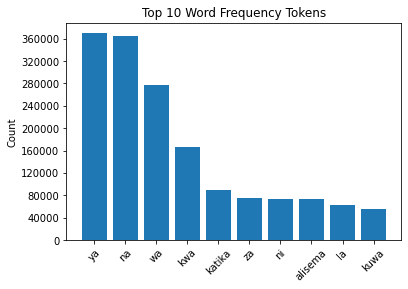

In [11]:
from matplotlib.ticker import MaxNLocator
def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=45)
    
visualize_top_10(freq_dist, "Top 10 Word Frequency Tokens")


In [14]:
df['label'].value_counts()

kitaifa      10155
michezo       5970
burudani      2185
kimataifa     1858
uchumi        1259
afya           779
Name: label, dtype: int64

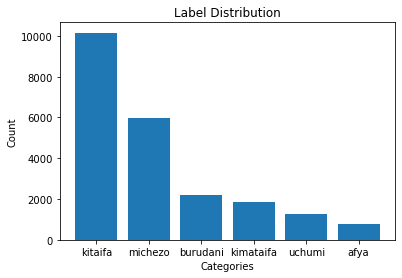